##### Copyright 2020 The TensorFlow Hub Authors.


In [1]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://www.tensorflow.org/text/tutorials/classify_text_with_bert"><img src="https://www.tensorflow.org/images/tf_logo_32px.png" />View on TensorFlow.org</a>
  </td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/tensorflow/text/blob/master/docs/tutorials/classify_text_with_bert.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/tensorflow/text/blob/master/docs/tutorials/classify_text_with_bert.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View on GitHub</a>
  </td>
  <td>
    <a href="https://storage.googleapis.com/tensorflow_docs/text/docs/tutorials/classify_text_with_bert.ipynb"><img src="https://www.tensorflow.org/images/download_logo_32px.png" />Download notebook</a>
  </td>
  <td>
    <a href="https://tfhub.dev/google/collections/bert/1"><img src="https://www.tensorflow.org/images/hub_logo_32px.png" />See TF Hub model</a>
  </td>
</table>

# Classify text with BERT

This tutorial contains complete code to fine-tune BERT to perform sentiment analysis on a dataset of plain-text IMDB movie reviews.
In addition to training a model, you will learn how to preprocess text into an appropriate format.

In this notebook, you will:

- Load the IMDB dataset
- Load a BERT model from TensorFlow Hub
- Build your own model by combining BERT with a classifier
- Train your own model, fine-tuning BERT as part of that
- Save your model and use it to classify sentences

If you're new to working with the IMDB dataset, please see [Basic text classification](https://www.tensorflow.org/tutorials/keras/text_classification) for more details.

## About BERT

[BERT](https://arxiv.org/abs/1810.04805) and other Transformer encoder architectures have been wildly successful on a variety of tasks in NLP (natural language processing). They compute vector-space representations of natural language that are suitable for use in deep learning models. The BERT family of models uses the Transformer encoder architecture to process each token of input text in the full context of all tokens before and after, hence the name: Bidirectional Encoder Representations from Transformers. 

BERT models are usually pre-trained on a large corpus of text, then fine-tuned for specific tasks.


## Setup


In [2]:
# A dependency of the preprocessing for BERT inputs
!pip install -U "tensorflow-text==2.13.*"

  Using cached gast-0.4.0-py3-none-any.whl.metadata (1.1 kB)


  Using cached google_auth-2.32.0-py2.py3-none-any.whl.metadata (4.7 kB)


INFO: pip is looking at multiple versions of tf-keras to determine which version is compatible with other requirements. This could take a while.
  Using cached tf_keras-2.16.0-py3-none-any.whl.metadata (1.6 kB)


  Using cached tf_keras-2.15.1-py3-none-any.whl.metadata (1.7 kB)
  Using cached tf_keras-2.15.0-py3-none-any.whl.metadata (1.6 kB)


  Using cached pyasn1_modules-0.4.0-py3-none-any.whl.metadata (3.4 kB)
  Using cached rsa-4.9-py3-none-any.whl.metadata (4.2 kB)


  Using cached requests_oauthlib-2.0.0-py2.py3-none-any.whl.metadata (11 kB)


  Using cached pyasn1-0.6.0-py2.py3-none-any.whl.metadata (8.3 kB)


  Using cached oauthlib-3.2.2-py3-none-any.whl.metadata (7.5 kB)


Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)


Using cached tf_keras-2.15.0-py3-none-any.whl (1.7 MB)


Using cached google_auth-2.32.0-py2.py3-none-any.whl (195 kB)


Using cached pyasn1_modules-0.4.0-py3-none-any.whl (181 kB)
Using cached requests_oauthlib-2.0.0-py2.py3-none-any.whl (24 kB)
Using cached rsa-4.9-py3-none-any.whl (34 kB)
Using cached oauthlib-3.2.2-py3-none-any.whl (151 kB)
Using cached pyasn1-0.6.0-py2.py3-none-any.whl (85 kB)


  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.12.2
    Uninstalling typing_extensions-4.12.2:


      Successfully uninstalled typing_extensions-4.12.2


  Attempting uninstall: tf-keras
    Found existing installation: tf_keras 2.17.0


    Uninstalling tf_keras-2.17.0:


      Successfully uninstalled tf_keras-2.17.0


  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4


    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4


  Attempting uninstall: keras
    Found existing installation: keras 3.4.1


    Uninstalling keras-3.4.1:


      Successfully uninstalled keras-3.4.1


  Attempting uninstall: gast
    Found existing installation: gast 0.6.0
    Uninstalling gast-0.6.0:
      Successfully uninstalled gast-0.6.0


  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.17.0
    Uninstalling tensorboard-2.17.0:


      Successfully uninstalled tensorboard-2.17.0


  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.17.0


    Uninstalling tensorflow-2.17.0:


      Successfully uninstalled tensorflow-2.17.0


You will use the AdamW optimizer from [tensorflow/models](https://github.com/tensorflow/models).

In [3]:
!pip install "tf-models-official==2.13.*"

  Using cached Cython-3.0.10-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (3.2 kB)


  Using cached gin_config-0.5.0-py3-none-any.whl.metadata (2.9 kB)


  Using cached google_api_python_client-2.137.0-py2.py3-none-any.whl.metadata (6.7 kB)
  Using cached immutabledict-4.2.0-py3-none-any.whl.metadata (3.4 kB)


  Using cached kaggle-1.6.14-py3-none-any.whl


  Using cached oauth2client-4.1.3-py2.py3-none-any.whl.metadata (1.2 kB)


  Using cached py_cpuinfo-9.0.0-py3-none-any.whl.metadata (794 bytes)


  Using cached pycocotools-2.0.8-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (1.1 kB)
  Using cached sacrebleu-2.4.2-py3-none-any.whl.metadata (58 kB)


  Using cached sentencepiece-0.2.0-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (7.7 kB)
  Using cached seqeval-1.2.2-py3-none-any.whl


  Using cached tensorflow_model_optimization-0.8.0-py2.py3-none-any.whl.metadata (904 bytes)
  Using cached tf_slim-1.1.0-py2.py3-none-any.whl.metadata (1.6 kB)


  Using cached httplib2-0.22.0-py3-none-any.whl.metadata (2.6 kB)
  Using cached google_auth_httplib2-0.2.0-py2.py3-none-any.whl.metadata (2.2 kB)


  Using cached google_api_core-2.19.1-py3-none-any.whl.metadata (2.7 kB)
  Using cached uritemplate-4.1.1-py2.py3-none-any.whl.metadata (2.9 kB)


  Using cached python_slugify-8.0.4-py2.py3-none-any.whl.metadata (8.5 kB)


  Using cached absl_py-1.4.0-py3-none-any.whl.metadata (2.3 kB)


  Using cached portalocker-2.10.1-py3-none-any.whl.metadata (8.5 kB)


  Using cached regex-2024.5.15-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (40 kB)


  Using cached tabulate-0.9.0-py3-none-any.whl.metadata (34 kB)


  Using cached colorama-0.4.6-py2.py3-none-any.whl.metadata (17 kB)


  Using cached lxml-5.2.2-cp39-cp39-manylinux_2_28_x86_64.whl.metadata (3.4 kB)


  Using cached googleapis_common_protos-1.63.2-py2.py3-none-any.whl.metadata (1.5 kB)


  Using cached proto_plus-1.24.0-py3-none-any.whl.metadata (2.2 kB)


  Using cached text_unidecode-1.3-py2.py3-none-any.whl.metadata (2.4 kB)


Using cached google_api_python_client-2.137.0-py2.py3-none-any.whl (12.0 MB)


Using cached py_cpuinfo-9.0.0-py3-none-any.whl (22 kB)
Using cached tensorflow_model_optimization-0.8.0-py2.py3-none-any.whl (242 kB)
Using cached tf_slim-1.1.0-py2.py3-none-any.whl (352 kB)
Using cached Cython-3.0.10-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (3.6 MB)
Using cached gin_config-0.5.0-py3-none-any.whl (61 kB)
Using cached immutabledict-4.2.0-py3-none-any.whl (4.7 kB)
Using cached oauth2client-4.1.3-py2.py3-none-any.whl (98 kB)


Using cached pycocotools-2.0.8-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (432 kB)
Using cached sacrebleu-2.4.2-py3-none-any.whl (106 kB)
Using cached sentencepiece-0.2.0-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (1.3 MB)
Using cached absl_py-1.4.0-py3-none-any.whl (126 kB)
Using cached google_api_core-2.19.1-py3-none-any.whl (139 kB)
Using cached google_auth_httplib2-0.2.0-py2.py3-none-any.whl (9.3 kB)
Using cached httplib2-0.22.0-py3-none-any.whl (96 kB)
Using cached tabulate-0.9.0-py3-none-any.whl (35 kB)


Using cached uritemplate-4.1.1-py2.py3-none-any.whl (10 kB)
Using cached colorama-0.4.6-py2.py3-none-any.whl (25 kB)
Using cached lxml-5.2.2-cp39-cp39-manylinux_2_28_x86_64.whl (5.0 MB)
Using cached portalocker-2.10.1-py3-none-any.whl (18 kB)
Using cached python_slugify-8.0.4-py2.py3-none-any.whl (10 kB)
Using cached regex-2024.5.15-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (774 kB)


Using cached proto_plus-1.24.0-py3-none-any.whl (50 kB)
Using cached text_unidecode-1.3-py2.py3-none-any.whl (78 kB)


  Attempting uninstall: absl-py
    Found existing installation: absl-py 2.1.0
    Uninstalling absl-py-2.1.0:
      Successfully uninstalled absl-py-2.1.0


In [4]:
import os
import shutil

import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text
from official.nlp import optimization  # to create AdamW optimizer

import matplotlib.pyplot as plt

tf.get_logger().setLevel('ERROR')

## Sentiment analysis

This notebook trains a sentiment analysis model to classify movie reviews as *positive* or *negative*, based on the text of the review.

You'll use the [Large Movie Review Dataset](https://ai.stanford.edu/~amaas/data/sentiment/) that contains the text of 50,000 movie reviews from the [Internet Movie Database](https://www.imdb.com/).

### Download the IMDB dataset

Let's download and extract the dataset, then explore the directory structure.


In [5]:
url = 'https://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz'

dataset = tf.keras.utils.get_file('aclImdb_v1.tar.gz', url,
                                  untar=True, cache_dir='.',
                                  cache_subdir='')

dataset_dir = os.path.join(os.path.dirname(dataset), 'aclImdb')

train_dir = os.path.join(dataset_dir, 'train')

# remove unused folders to make it easier to load the data
remove_dir = os.path.join(train_dir, 'unsup')
shutil.rmtree(remove_dir)

    8192/84125825 [..............................] - ETA: 0s

   24576/84125825 [..............................] - ETA: 3:10

   40960/84125825 [..............................] - ETA: 3:48

   73728/84125825 [..............................] - ETA: 3:11

   90112/84125825 [..............................] - ETA: 3:27

  122880/84125825 [..............................] - ETA: 3:10

  172032/84125825 [..............................] - ETA: 2:43

  204800/84125825 [..............................] - ETA: 2:39

  270336/84125825 [..............................] - ETA: 2:18

  319488/84125825 [..............................] - ETA: 2:11

  401408/84125825 [..............................] - ETA: 1:56

  483328/84125825 [..............................] - ETA: 1:46

  598016/84125825 [..............................] - ETA: 1:33

  712704/84125825 [..............................] - ETA: 1:24

  843776/84125825 [..............................] - ETA: 1:16

  974848/84125825 [..............................] - ETA: 1:11

 1138688/84125825 [..............................] - ETA: 1:04

 1318912/84125825 [..............................] - ETA: 59s 

 1515520/84125825 [..............................] - ETA: 54s

 1712128/84125825 [..............................] - ETA: 50s

 1941504/84125825 [..............................] - ETA: 47s

 2187264/84125825 [..............................] - ETA: 43s

 2433024/84125825 [..............................] - ETA: 41s

 2711552/84125825 [..............................] - ETA: 38s

 3022848/84125825 [>.............................] - ETA: 35s

 3334144/84125825 [>.............................] - ETA: 33s

 3678208/84125825 [>.............................] - ETA: 31s

 4038656/84125825 [>.............................] - ETA: 29s

 4415488/84125825 [>.............................] - ETA: 28s

 4825088/84125825 [>.............................] - ETA: 26s

 5251072/84125825 [>.............................] - ETA: 25s

 5726208/84125825 [=>............................] - ETA: 23s

 6217728/84125825 [=>............................] - ETA: 22s

 6725632/84125825 [=>............................] - ETA: 21s

 7266304/84125825 [=>............................] - ETA: 20s

 7839744/84125825 [=>............................] - ETA: 18s

 8413184/84125825 [==>...........................] - ETA: 18s

 9035776/84125825 [==>...........................] - ETA: 17s

 9658368/84125825 [==>...........................] - ETA: 16s

10313728/84125825 [==>...........................] - ETA: 15s

10985472/84125825 [==>...........................] - ETA: 14s

11689984/84125825 [===>..........................] - ETA: 14s

12410880/84125825 [===>..........................] - ETA: 13s

13148160/84125825 [===>..........................] - ETA: 12s

13934592/84125825 [===>..........................] - ETA: 12s

14753792/84125825 [====>.........................] - ETA: 11s

15638528/84125825 [====>.........................] - ETA: 11s

16523264/84125825 [====>.........................] - ETA: 10s

17424384/84125825 [=====>........................] - ETA: 10s

18391040/84125825 [=====>........................] - ETA: 9s 

19374080/84125825 [=====>........................] - ETA: 9s

20406272/84125825 [======>.......................] - ETA: 8s

21487616/84125825 [======>.......................] - ETA: 8s

22601728/84125825 [=======>......................] - ETA: 8s

23764992/84125825 [=======>......................] - ETA: 7s

24977408/84125825 [=======>......................] - ETA: 7s

26206208/84125825 [========>.....................] - ETA: 6s

27484160/84125825 [========>.....................] - ETA: 6s

28794880/84125825 [=========>....................] - ETA: 6s

30171136/84125825 [=========>....................] - ETA: 5s

31596544/84125825 [==========>...................] - ETA: 5s

33071104/84125825 [==========>...................] - ETA: 5s

34627584/84125825 [===========>..................] - ETA: 4s

36233216/84125825 [===========>..................] - ETA: 4s

37052416/84125825 [============>.................] - ETA: 4s

39084032/84125825 [============>.................] - ETA: 4s

40280064/84125825 [=============>................] - ETA: 4s

41492480/84125825 [=============>................] - ETA: 3s

42704896/84125825 [==============>...............] - ETA: 3s

43917312/84125825 [==============>...............] - ETA: 3s

45162496/84125825 [===============>..............] - ETA: 3s

46407680/84125825 [===============>..............] - ETA: 3s

47652864/84125825 [===============>..............] - ETA: 3s

48914432/84125825 [================>.............] - ETA: 2s

50176000/84125825 [================>.............] - ETA: 2s

51453952/84125825 [=================>............] - ETA: 2s

52731904/84125825 [=================>............] - ETA: 2s

54026240/84125825 [==================>...........] - ETA: 2s

55304192/84125825 [==================>...........] - ETA: 2s

56614912/84125825 [===================>..........] - ETA: 2s

57942016/84125825 [===================>..........] - ETA: 2s

59269120/84125825 [====================>.........] - ETA: 1s

60596224/84125825 [====================>.........] - ETA: 1s

61923328/84125825 [=====================>........] - ETA: 1s

63266816/84125825 [=====================>........] - ETA: 1s

64593920/84125825 [======================>.......] - ETA: 1s

65970176/84125825 [======================>.......] - ETA: 1s

67330048/84125825 [=======================>......] - ETA: 1s

68706304/84125825 [=======================>......] - ETA: 1s

70066176/84125825 [=======================>......] - ETA: 0s

71458816/84125825 [========================>.....] - ETA: 0s

72851456/84125825 [========================>.....] - ETA: 0s

74227712/84125825 [=========================>....] - ETA: 0s

75620352/84125825 [=========================>....] - ETA: 0s

77029376/84125825 [==========================>...] - ETA: 0s

78438400/84125825 [==========================>...] - ETA: 0s

79847424/84125825 [===========================>..] - ETA: 0s

81256448/84125825 [===========================>..] - ETA: 0s

82681856/84125825 [============================>.] - ETA: 0s

84125825/84125825 [==============================] - 6s 0us/step


Next, you will use the `text_dataset_from_directory` utility to create a labeled `tf.data.Dataset`.

The IMDB dataset has already been divided into train and test, but it lacks a validation set. Let's create a validation set using an 80:20 split of the training data by using the `validation_split` argument below.

Note:  When using the `validation_split` and `subset` arguments, make sure to either specify a random seed, or to pass `shuffle=False`, so that the validation and training splits have no overlap.

In [6]:
AUTOTUNE = tf.data.AUTOTUNE
batch_size = 32
seed = 42

raw_train_ds = tf.keras.utils.text_dataset_from_directory(
    'aclImdb/train',
    batch_size=batch_size,
    validation_split=0.2,
    subset='training',
    seed=seed)

class_names = raw_train_ds.class_names
train_ds = raw_train_ds.cache().prefetch(buffer_size=AUTOTUNE)

val_ds = tf.keras.utils.text_dataset_from_directory(
    'aclImdb/train',
    batch_size=batch_size,
    validation_split=0.2,
    subset='validation',
    seed=seed)

val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

test_ds = tf.keras.utils.text_dataset_from_directory(
    'aclImdb/test',
    batch_size=batch_size)

test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)

Found 25000 files belonging to 2 classes.


Using 20000 files for training.


2024-07-19 11:36:48.385099: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1960] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


Found 25000 files belonging to 2 classes.


Using 5000 files for validation.


Found 25000 files belonging to 2 classes.


Let's take a look at a few reviews.

In [7]:
for text_batch, label_batch in train_ds.take(1):
  for i in range(3):
    print(f'Review: {text_batch.numpy()[i]}')
    label = label_batch.numpy()[i]
    print(f'Label : {label} ({class_names[label]})')

Review: b'"Pandemonium" is a horror movie spoof that comes off more stupid than funny. Believe me when I tell you, I love comedies. Especially comedy spoofs. "Airplane", "The Naked Gun" trilogy, "Blazing Saddles", "High Anxiety", and "Spaceballs" are some of my favorite comedies that spoof a particular genre. "Pandemonium" is not up there with those films. Most of the scenes in this movie had me sitting there in stunned silence because the movie wasn\'t all that funny. There are a few laughs in the film, but when you watch a comedy, you expect to laugh a lot more than a few times and that\'s all this film has going for it. Geez, "Scream" had more laughs than this film and that was more of a horror film. How bizarre is that?<br /><br />*1/2 (out of four)'
Label : 0 (neg)
Review: b"David Mamet is a very interesting and a very un-equal director. His first movie 'House of Games' was the one I liked best, and it set a series of films with characters whose perspective of life changes as they

2024-07-19 11:36:50.738060: W tensorflow/core/kernels/data/cache_dataset_ops.cc:854] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


## Loading models from TensorFlow Hub

Here you can choose which BERT model you will load from TensorFlow Hub and fine-tune. There are multiple BERT models available.

  - [BERT-Base](https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/3), [Uncased](https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/3) and [seven more models](https://tfhub.dev/google/collections/bert/1) with trained weights released by the original BERT authors.
  - [Small BERTs](https://tfhub.dev/google/collections/bert/1) have the same general architecture but fewer and/or smaller Transformer blocks, which lets you explore tradeoffs between speed, size and quality.
  - [ALBERT](https://tfhub.dev/google/collections/albert/1): four different sizes of "A Lite BERT" that reduces model size (but not computation time) by sharing parameters between layers.
  - [BERT Experts](https://tfhub.dev/google/collections/experts/bert/1): eight models that all have the BERT-base architecture but offer a choice between different pre-training domains, to align more closely with the target task.
  - [Electra](https://tfhub.dev/google/collections/electra/1) has the same architecture as BERT (in three different sizes), but gets pre-trained as a discriminator in a set-up that resembles a Generative Adversarial Network (GAN).
  - BERT with Talking-Heads Attention and Gated GELU [[base](https://tfhub.dev/tensorflow/talkheads_ggelu_bert_en_base/1), [large](https://tfhub.dev/tensorflow/talkheads_ggelu_bert_en_large/1)] has two improvements to the core of the Transformer architecture.

The model documentation on TensorFlow Hub has more details and references to the
research literature. Follow the links above, or click on the [`tfhub.dev`](http://tfhub.dev) URL
printed after the next cell execution.

The suggestion is to start with a Small BERT (with fewer parameters) since they are faster to fine-tune. If you like a small model but with higher accuracy, ALBERT might be your next option. If you want even better accuracy, choose
one of the classic BERT sizes or their recent refinements like Electra, Talking Heads, or a BERT Expert.

Aside from the models available below, there are [multiple versions](https://tfhub.dev/google/collections/transformer_encoders_text/1) of the models that are larger and can yield even better accuracy, but they are too big to be fine-tuned on a single GPU. You will be able to do that on the [Solve GLUE tasks using BERT on a TPU colab](https://www.tensorflow.org/text/tutorials/bert_glue).

You'll see in the code below that switching the tfhub.dev URL is enough to try any of these models, because all the differences between them are encapsulated in the SavedModels from TF Hub.

In [8]:
#@title Choose a BERT model to fine-tune

bert_model_name = 'small_bert/bert_en_uncased_L-4_H-512_A-8'  #@param ["bert_en_uncased_L-12_H-768_A-12", "bert_en_cased_L-12_H-768_A-12", "bert_multi_cased_L-12_H-768_A-12", "small_bert/bert_en_uncased_L-2_H-128_A-2", "small_bert/bert_en_uncased_L-2_H-256_A-4", "small_bert/bert_en_uncased_L-2_H-512_A-8", "small_bert/bert_en_uncased_L-2_H-768_A-12", "small_bert/bert_en_uncased_L-4_H-128_A-2", "small_bert/bert_en_uncased_L-4_H-256_A-4", "small_bert/bert_en_uncased_L-4_H-512_A-8", "small_bert/bert_en_uncased_L-4_H-768_A-12", "small_bert/bert_en_uncased_L-6_H-128_A-2", "small_bert/bert_en_uncased_L-6_H-256_A-4", "small_bert/bert_en_uncased_L-6_H-512_A-8", "small_bert/bert_en_uncased_L-6_H-768_A-12", "small_bert/bert_en_uncased_L-8_H-128_A-2", "small_bert/bert_en_uncased_L-8_H-256_A-4", "small_bert/bert_en_uncased_L-8_H-512_A-8", "small_bert/bert_en_uncased_L-8_H-768_A-12", "small_bert/bert_en_uncased_L-10_H-128_A-2", "small_bert/bert_en_uncased_L-10_H-256_A-4", "small_bert/bert_en_uncased_L-10_H-512_A-8", "small_bert/bert_en_uncased_L-10_H-768_A-12", "small_bert/bert_en_uncased_L-12_H-128_A-2", "small_bert/bert_en_uncased_L-12_H-256_A-4", "small_bert/bert_en_uncased_L-12_H-512_A-8", "small_bert/bert_en_uncased_L-12_H-768_A-12", "albert_en_base", "electra_small", "electra_base", "experts_pubmed", "experts_wiki_books", "talking-heads_base"]

map_name_to_handle = {
    'bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/3',
    'bert_en_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_cased_L-12_H-768_A-12/3',
    'bert_multi_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_multi_cased_L-12_H-768_A-12/3',
    'small_bert/bert_en_uncased_L-2_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-2_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-2_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-2_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-4_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-4_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-4_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-4_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-6_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-6_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-6_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-6_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-8_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-8_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-8_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-8_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-10_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-10_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-10_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-10_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-12_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-12_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-12_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-768_A-12/1',
    'albert_en_base':
        'https://tfhub.dev/tensorflow/albert_en_base/2',
    'electra_small':
        'https://tfhub.dev/google/electra_small/2',
    'electra_base':
        'https://tfhub.dev/google/electra_base/2',
    'experts_pubmed':
        'https://tfhub.dev/google/experts/bert/pubmed/2',
    'experts_wiki_books':
        'https://tfhub.dev/google/experts/bert/wiki_books/2',
    'talking-heads_base':
        'https://tfhub.dev/tensorflow/talkheads_ggelu_bert_en_base/1',
}

map_model_to_preprocess = {
    'bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'bert_en_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_cased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'bert_multi_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_multi_cased_preprocess/3',
    'albert_en_base':
        'https://tfhub.dev/tensorflow/albert_en_preprocess/3',
    'electra_small':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'electra_base':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'experts_pubmed':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'experts_wiki_books':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'talking-heads_base':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
}

tfhub_handle_encoder = map_name_to_handle[bert_model_name]
tfhub_handle_preprocess = map_model_to_preprocess[bert_model_name]

print(f'BERT model selected           : {tfhub_handle_encoder}')
print(f'Preprocess model auto-selected: {tfhub_handle_preprocess}')

BERT model selected           : https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/1
Preprocess model auto-selected: https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3


## The preprocessing model

Text inputs need to be transformed to numeric token ids and arranged in several Tensors before being input to BERT. TensorFlow Hub provides a matching preprocessing model for each of the BERT models discussed above, which implements this transformation using TF ops from the TF.text library. It is not necessary to run pure Python code outside your TensorFlow model to preprocess text.

The preprocessing model must be the one referenced by the documentation of the BERT model, which you can read at the URL printed above. For BERT models from the drop-down above, the preprocessing model is selected automatically.

Note: You will load the preprocessing model into a [hub.KerasLayer](https://www.tensorflow.org/hub/api_docs/python/hub/KerasLayer) to compose your fine-tuned model. This is the preferred API to load a TF2-style SavedModel from TF Hub into a Keras model.

In [9]:
bert_preprocess_model = hub.KerasLayer(tfhub_handle_preprocess)

Let's try the preprocessing model on some text and see the output:

In [10]:
text_test = ['this is such an amazing movie!']
text_preprocessed = bert_preprocess_model(text_test)

print(f'Keys       : {list(text_preprocessed.keys())}')
print(f'Shape      : {text_preprocessed["input_word_ids"].shape}')
print(f'Word Ids   : {text_preprocessed["input_word_ids"][0, :12]}')
print(f'Input Mask : {text_preprocessed["input_mask"][0, :12]}')
print(f'Type Ids   : {text_preprocessed["input_type_ids"][0, :12]}')

Keys       : ['input_word_ids', 'input_type_ids', 'input_mask']
Shape      : (1, 128)
Word Ids   : [ 101 2023 2003 2107 2019 6429 3185  999  102    0    0    0]
Input Mask : [1 1 1 1 1 1 1 1 1 0 0 0]
Type Ids   : [0 0 0 0 0 0 0 0 0 0 0 0]


As you can see, now you have the 3 outputs from the preprocessing that a BERT model would use (`input_words_id`, `input_mask` and `input_type_ids`).

Some other important points:
- The input is truncated to 128 tokens. The number of tokens can be customized, and you can see more details on the [Solve GLUE tasks using BERT on a TPU colab](https://www.tensorflow.org/text/tutorials/bert_glue).
- The `input_type_ids` only have one value (0) because this is a single sentence input. For a multiple sentence input, it would have one number for each input.

Since this text preprocessor is a TensorFlow model, It can be included in your model directly.

## Using the BERT model

Before putting BERT into your own model, let's take a look at its outputs. You will load it from TF Hub and see the returned values.

In [11]:
bert_model = hub.KerasLayer(tfhub_handle_encoder)

In [12]:
bert_results = bert_model(text_preprocessed)

print(f'Loaded BERT: {tfhub_handle_encoder}')
print(f'Pooled Outputs Shape:{bert_results["pooled_output"].shape}')
print(f'Pooled Outputs Values:{bert_results["pooled_output"][0, :12]}')
print(f'Sequence Outputs Shape:{bert_results["sequence_output"].shape}')
print(f'Sequence Outputs Values:{bert_results["sequence_output"][0, :12]}')

Loaded BERT: https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/1
Pooled Outputs Shape:(1, 512)
Pooled Outputs Values:[ 0.762629    0.99280983 -0.18611868  0.36673862  0.15233733  0.6550447
  0.9681154  -0.9486271   0.00216128 -0.9877732   0.06842692 -0.97630584]
Sequence Outputs Shape:(1, 128, 512)
Sequence Outputs Values:[[-0.28946346  0.3432128   0.33231518 ...  0.21300825  0.7102068
  -0.05771117]
 [-0.28742072  0.31981036 -0.23018576 ...  0.58455    -0.21329743
   0.72692114]
 [-0.66157067  0.68876773 -0.8743301  ...  0.1087725  -0.26173177
   0.47855407]
 ...
 [-0.2256118  -0.2892561  -0.0706445  ...  0.47566038  0.83277136
   0.40025333]
 [-0.2982428  -0.27473134 -0.05450517 ...  0.48849747  1.0955354
   0.18163396]
 [-0.44378242  0.00930811  0.07223688 ...  0.1729009   1.1833243
   0.07898017]]


The BERT models return a map with 3 important keys: `pooled_output`, `sequence_output`, `encoder_outputs`:

- `pooled_output` represents each input sequence as a whole. The shape is `[batch_size, H]`. You can think of this as an embedding for the entire movie review.
- `sequence_output` represents each input token in the context. The shape is `[batch_size, seq_length, H]`. You can think of this as a contextual embedding for every token in the movie review.
- `encoder_outputs` are the intermediate activations of the `L` Transformer blocks. `outputs["encoder_outputs"][i]` is a Tensor of shape `[batch_size, seq_length, 1024]` with the outputs of the i-th Transformer block, for `0 <= i < L`. The last value of the list is equal to `sequence_output`.

For the fine-tuning you are going to use the `pooled_output` array.

## Define your model

You will create a very simple fine-tuned model, with the preprocessing model, the selected BERT model, one Dense and a Dropout layer.

Note: for more information about the base model's input and output you can follow the model's URL for documentation. Here specifically, you don't need to worry about it because the preprocessing model will take care of that for you.


In [13]:
def build_classifier_model():
  text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
  preprocessing_layer = hub.KerasLayer(tfhub_handle_preprocess, name='preprocessing')
  encoder_inputs = preprocessing_layer(text_input)
  encoder = hub.KerasLayer(tfhub_handle_encoder, trainable=True, name='BERT_encoder')
  outputs = encoder(encoder_inputs)
  net = outputs['pooled_output']
  net = tf.keras.layers.Dropout(0.1)(net)
  net = tf.keras.layers.Dense(1, activation=None, name='classifier')(net)
  return tf.keras.Model(text_input, net)

Let's check that the model runs with the output of the preprocessing model.

In [14]:
classifier_model = build_classifier_model()
bert_raw_result = classifier_model(tf.constant(text_test))
print(tf.sigmoid(bert_raw_result))

tf.Tensor([[0.20992665]], shape=(1, 1), dtype=float32)


The output is meaningless, of course, because the model has not been trained yet.

Let's take a look at the model's structure.

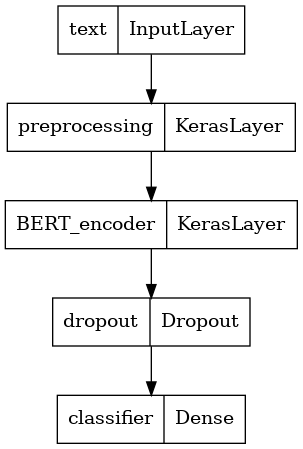

In [15]:
tf.keras.utils.plot_model(classifier_model)

## Model training

You now have all the pieces to train a model, including the preprocessing module, BERT encoder, data, and classifier.

### Loss function

Since this is a binary classification problem and the model outputs a probability (a single-unit layer), you'll use `losses.BinaryCrossentropy` loss function.


In [16]:
loss = tf.keras.losses.BinaryCrossentropy(from_logits=True)
metrics = tf.metrics.BinaryAccuracy()

### Optimizer

For fine-tuning, let's use the same optimizer that BERT was originally trained with: the "Adaptive Moments" (Adam). This optimizer minimizes the prediction loss and does regularization by weight decay (not using moments), which is also known as [AdamW](https://arxiv.org/abs/1711.05101).

For the learning rate (`init_lr`), you will use the same schedule as BERT pre-training: linear decay of a notional initial learning rate, prefixed with a linear warm-up phase over the first 10% of training steps (`num_warmup_steps`). In line with the BERT paper, the initial learning rate is smaller for fine-tuning (best of 5e-5, 3e-5, 2e-5).

In [17]:
epochs = 5
steps_per_epoch = tf.data.experimental.cardinality(train_ds).numpy()
num_train_steps = steps_per_epoch * epochs
num_warmup_steps = int(0.1*num_train_steps)

init_lr = 3e-5
optimizer = optimization.create_optimizer(init_lr=init_lr,
                                          num_train_steps=num_train_steps,
                                          num_warmup_steps=num_warmup_steps,
                                          optimizer_type='adamw')

### Loading the BERT model and training

Using the `classifier_model` you created earlier, you can compile the model with the loss, metric and optimizer.

In [18]:
classifier_model.compile(optimizer=optimizer,
                         loss=loss,
                         metrics=metrics)

Note: training time will vary depending on the complexity of the BERT model you have selected.

In [19]:
print(f'Training model with {tfhub_handle_encoder}')
history = classifier_model.fit(x=train_ds,
                               validation_data=val_ds,
                               epochs=epochs)

Training model with https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/1


Epoch 1/5


  1/625 [..............................] - ETA: 1:07:18 - loss: 0.6328 - binary_accuracy: 0.7188

  2/625 [..............................] - ETA: 11:43 - loss: 0.9165 - binary_accuracy: 0.5625  

  3/625 [..............................] - ETA: 11:44 - loss: 0.9735 - binary_accuracy: 0.5312

  4/625 [..............................] - ETA: 11:44 - loss: 0.9095 - binary_accuracy: 0.5547

  5/625 [..............................] - ETA: 11:39 - loss: 0.9090 - binary_accuracy: 0.5500

  6/625 [..............................] - ETA: 11:33 - loss: 0.9065 - binary_accuracy: 0.5573

  7/625 [..............................] - ETA: 11:26 - loss: 0.8858 - binary_accuracy: 0.5670

  8/625 [..............................] - ETA: 11:16 - loss: 0.8756 - binary_accuracy: 0.5742

  9/625 [..............................] - ETA: 11:13 - loss: 0.8806 - binary_accuracy: 0.5694

 10/625 [..............................] - ETA: 11:09 - loss: 0.9124 - binary_accuracy: 0.5469

 11/625 [..............................] - ETA: 11:06 - loss: 0.9261 - binary_accuracy: 0.5341

 12/625 [..............................] - ETA: 11:01 - loss: 0.9478 - binary_accuracy: 0.5182

 13/625 [..............................] - ETA: 11:00 - loss: 0.9492 - binary_accuracy: 0.5144

 14/625 [..............................] - ETA: 10:58 - loss: 0.9396 - binary_accuracy: 0.5179

 15/625 [..............................] - ETA: 10:55 - loss: 0.9354 - binary_accuracy: 0.5188

 16/625 [..............................] - ETA: 10:53 - loss: 0.9169 - binary_accuracy: 0.5312

 17/625 [..............................] - ETA: 10:51 - loss: 0.9182 - binary_accuracy: 0.5239

 18/625 [..............................] - ETA: 10:50 - loss: 0.9117 - binary_accuracy: 0.5260

 19/625 [..............................] - ETA: 10:49 - loss: 0.9153 - binary_accuracy: 0.5247

 20/625 [..............................] - ETA: 10:48 - loss: 0.9113 - binary_accuracy: 0.5234

 21/625 [>.............................] - ETA: 10:46 - loss: 0.9105 - binary_accuracy: 0.5208

 22/625 [>.............................] - ETA: 10:44 - loss: 0.9109 - binary_accuracy: 0.5185

 23/625 [>.............................] - ETA: 10:41 - loss: 0.9087 - binary_accuracy: 0.5163

 24/625 [>.............................] - ETA: 10:39 - loss: 0.8970 - binary_accuracy: 0.5247

 25/625 [>.............................] - ETA: 10:37 - loss: 0.8987 - binary_accuracy: 0.5188

 26/625 [>.............................] - ETA: 10:36 - loss: 0.8941 - binary_accuracy: 0.5168

 27/625 [>.............................] - ETA: 10:35 - loss: 0.8964 - binary_accuracy: 0.5104

 28/625 [>.............................] - ETA: 10:32 - loss: 0.8911 - binary_accuracy: 0.5123

 29/625 [>.............................] - ETA: 10:30 - loss: 0.8890 - binary_accuracy: 0.5086

 30/625 [>.............................] - ETA: 10:30 - loss: 0.8886 - binary_accuracy: 0.5063

 31/625 [>.............................] - ETA: 10:29 - loss: 0.8845 - binary_accuracy: 0.5091

 32/625 [>.............................] - ETA: 10:27 - loss: 0.8810 - binary_accuracy: 0.5098

 33/625 [>.............................] - ETA: 10:25 - loss: 0.8775 - binary_accuracy: 0.5104

 34/625 [>.............................] - ETA: 10:23 - loss: 0.8735 - binary_accuracy: 0.5074

 35/625 [>.............................] - ETA: 10:21 - loss: 0.8705 - binary_accuracy: 0.5098

 36/625 [>.............................] - ETA: 10:19 - loss: 0.8663 - binary_accuracy: 0.5087

 37/625 [>.............................] - ETA: 10:17 - loss: 0.8631 - binary_accuracy: 0.5076

 38/625 [>.............................] - ETA: 10:16 - loss: 0.8627 - binary_accuracy: 0.5041

 39/625 [>.............................] - ETA: 10:15 - loss: 0.8584 - binary_accuracy: 0.5056

 40/625 [>.............................] - ETA: 10:14 - loss: 0.8549 - binary_accuracy: 0.5047

 41/625 [>.............................] - ETA: 10:13 - loss: 0.8515 - binary_accuracy: 0.5091

 42/625 [=>............................] - ETA: 10:11 - loss: 0.8506 - binary_accuracy: 0.5060

 43/625 [=>............................] - ETA: 10:09 - loss: 0.8472 - binary_accuracy: 0.5094

 44/625 [=>............................] - ETA: 10:08 - loss: 0.8423 - binary_accuracy: 0.5099

 45/625 [=>............................] - ETA: 10:07 - loss: 0.8399 - binary_accuracy: 0.5083

 46/625 [=>............................] - ETA: 10:06 - loss: 0.8375 - binary_accuracy: 0.5109

 47/625 [=>............................] - ETA: 10:05 - loss: 0.8356 - binary_accuracy: 0.5093

 48/625 [=>............................] - ETA: 10:04 - loss: 0.8333 - binary_accuracy: 0.5111

 49/625 [=>............................] - ETA: 10:02 - loss: 0.8323 - binary_accuracy: 0.5096

 50/625 [=>............................] - ETA: 10:02 - loss: 0.8284 - binary_accuracy: 0.5138

 51/625 [=>............................] - ETA: 9:59 - loss: 0.8261 - binary_accuracy: 0.5153 

 52/625 [=>............................] - ETA: 9:58 - loss: 0.8247 - binary_accuracy: 0.5144

 53/625 [=>............................] - ETA: 9:56 - loss: 0.8215 - binary_accuracy: 0.5147

 54/625 [=>............................] - ETA: 9:55 - loss: 0.8197 - binary_accuracy: 0.5150

 55/625 [=>............................] - ETA: 9:54 - loss: 0.8170 - binary_accuracy: 0.5153

 56/625 [=>............................] - ETA: 9:52 - loss: 0.8144 - binary_accuracy: 0.5179

 57/625 [=>............................] - ETA: 9:52 - loss: 0.8129 - binary_accuracy: 0.5175

 58/625 [=>............................] - ETA: 9:51 - loss: 0.8108 - binary_accuracy: 0.5167

 59/625 [=>............................] - ETA: 9:50 - loss: 0.8098 - binary_accuracy: 0.5180

 60/625 [=>............................] - ETA: 9:48 - loss: 0.8074 - binary_accuracy: 0.5203

 61/625 [=>............................] - ETA: 9:47 - loss: 0.8064 - binary_accuracy: 0.5215

 62/625 [=>............................] - ETA: 9:46 - loss: 0.8027 - binary_accuracy: 0.5227

 63/625 [==>...........................] - ETA: 9:44 - loss: 0.8005 - binary_accuracy: 0.5233

 64/625 [==>...........................] - ETA: 9:44 - loss: 0.7998 - binary_accuracy: 0.5229

 65/625 [==>...........................] - ETA: 9:43 - loss: 0.7980 - binary_accuracy: 0.5236

 66/625 [==>...........................] - ETA: 9:42 - loss: 0.7950 - binary_accuracy: 0.5246

 67/625 [==>...........................] - ETA: 9:41 - loss: 0.7930 - binary_accuracy: 0.5261

 68/625 [==>...........................] - ETA: 9:39 - loss: 0.7911 - binary_accuracy: 0.5285

 69/625 [==>...........................] - ETA: 9:38 - loss: 0.7894 - binary_accuracy: 0.5290

 70/625 [==>...........................] - ETA: 9:37 - loss: 0.7875 - binary_accuracy: 0.5295

 71/625 [==>...........................] - ETA: 9:36 - loss: 0.7852 - binary_accuracy: 0.5312

 72/625 [==>...........................] - ETA: 9:35 - loss: 0.7845 - binary_accuracy: 0.5295

 73/625 [==>...........................] - ETA: 9:34 - loss: 0.7840 - binary_accuracy: 0.5300

 74/625 [==>...........................] - ETA: 9:33 - loss: 0.7823 - binary_accuracy: 0.5283

 75/625 [==>...........................] - ETA: 9:32 - loss: 0.7801 - binary_accuracy: 0.5283

 76/625 [==>...........................] - ETA: 9:31 - loss: 0.7786 - binary_accuracy: 0.5275

 77/625 [==>...........................] - ETA: 9:30 - loss: 0.7770 - binary_accuracy: 0.5276

 78/625 [==>...........................] - ETA: 9:28 - loss: 0.7761 - binary_accuracy: 0.5264

 79/625 [==>...........................] - ETA: 9:28 - loss: 0.7742 - binary_accuracy: 0.5277

 80/625 [==>...........................] - ETA: 9:26 - loss: 0.7723 - binary_accuracy: 0.5273

 81/625 [==>...........................] - ETA: 9:25 - loss: 0.7703 - binary_accuracy: 0.5285

 82/625 [==>...........................] - ETA: 9:24 - loss: 0.7690 - binary_accuracy: 0.5290

 83/625 [==>...........................] - ETA: 9:23 - loss: 0.7678 - binary_accuracy: 0.5301

 84/625 [===>..........................] - ETA: 9:22 - loss: 0.7649 - binary_accuracy: 0.5324

 85/625 [===>..........................] - ETA: 9:21 - loss: 0.7638 - binary_accuracy: 0.5342

 86/625 [===>..........................] - ETA: 9:20 - loss: 0.7624 - binary_accuracy: 0.5356

 87/625 [===>..........................] - ETA: 9:19 - loss: 0.7603 - binary_accuracy: 0.5374

 88/625 [===>..........................] - ETA: 9:17 - loss: 0.7581 - binary_accuracy: 0.5391

 89/625 [===>..........................] - ETA: 9:16 - loss: 0.7573 - binary_accuracy: 0.5393

 90/625 [===>..........................] - ETA: 9:15 - loss: 0.7560 - binary_accuracy: 0.5396

 91/625 [===>..........................] - ETA: 9:14 - loss: 0.7543 - binary_accuracy: 0.5412

 92/625 [===>..........................] - ETA: 9:13 - loss: 0.7520 - binary_accuracy: 0.5435

 93/625 [===>..........................] - ETA: 9:13 - loss: 0.7502 - binary_accuracy: 0.5447

 94/625 [===>..........................] - ETA: 9:12 - loss: 0.7489 - binary_accuracy: 0.5462

 95/625 [===>..........................] - ETA: 9:11 - loss: 0.7481 - binary_accuracy: 0.5464

 96/625 [===>..........................] - ETA: 9:10 - loss: 0.7456 - binary_accuracy: 0.5492

 97/625 [===>..........................] - ETA: 9:09 - loss: 0.7442 - binary_accuracy: 0.5503

 98/625 [===>..........................] - ETA: 9:07 - loss: 0.7425 - binary_accuracy: 0.5517

 99/625 [===>..........................] - ETA: 9:06 - loss: 0.7418 - binary_accuracy: 0.5527

100/625 [===>..........................] - ETA: 9:05 - loss: 0.7404 - binary_accuracy: 0.5541

101/625 [===>..........................] - ETA: 9:04 - loss: 0.7390 - binary_accuracy: 0.5551

102/625 [===>..........................] - ETA: 9:03 - loss: 0.7385 - binary_accuracy: 0.5545

103/625 [===>..........................] - ETA: 9:02 - loss: 0.7369 - binary_accuracy: 0.5543

104/625 [===>..........................] - ETA: 9:01 - loss: 0.7359 - binary_accuracy: 0.5553

105/625 [====>.........................] - ETA: 9:00 - loss: 0.7347 - binary_accuracy: 0.5565

106/625 [====>.........................] - ETA: 8:59 - loss: 0.7335 - binary_accuracy: 0.5578

107/625 [====>.........................] - ETA: 8:58 - loss: 0.7329 - binary_accuracy: 0.5578

108/625 [====>.........................] - ETA: 8:57 - loss: 0.7312 - binary_accuracy: 0.5590

109/625 [====>.........................] - ETA: 8:56 - loss: 0.7295 - binary_accuracy: 0.5593

110/625 [====>.........................] - ETA: 8:54 - loss: 0.7297 - binary_accuracy: 0.5582

111/625 [====>.........................] - ETA: 8:53 - loss: 0.7281 - binary_accuracy: 0.5588

112/625 [====>.........................] - ETA: 8:52 - loss: 0.7262 - binary_accuracy: 0.5603

113/625 [====>.........................] - ETA: 8:51 - loss: 0.7252 - binary_accuracy: 0.5606

114/625 [====>.........................] - ETA: 8:50 - loss: 0.7253 - binary_accuracy: 0.5600

115/625 [====>.........................] - ETA: 8:49 - loss: 0.7240 - binary_accuracy: 0.5606

116/625 [====>.........................] - ETA: 8:48 - loss: 0.7232 - binary_accuracy: 0.5598

117/625 [====>.........................] - ETA: 8:47 - loss: 0.7220 - binary_accuracy: 0.5601

118/625 [====>.........................] - ETA: 8:46 - loss: 0.7205 - binary_accuracy: 0.5599

119/625 [====>.........................] - ETA: 8:45 - loss: 0.7197 - binary_accuracy: 0.5609

120/625 [====>.........................] - ETA: 8:44 - loss: 0.7193 - binary_accuracy: 0.5625

121/625 [====>.........................] - ETA: 8:43 - loss: 0.7184 - binary_accuracy: 0.5625

122/625 [====>.........................] - ETA: 8:42 - loss: 0.7180 - binary_accuracy: 0.5628

123/625 [====>.........................] - ETA: 8:40 - loss: 0.7171 - binary_accuracy: 0.5638

124/625 [====>.........................] - ETA: 8:39 - loss: 0.7160 - binary_accuracy: 0.5643

125/625 [=====>........................] - ETA: 8:38 - loss: 0.7152 - binary_accuracy: 0.5655

126/625 [=====>........................] - ETA: 8:37 - loss: 0.7144 - binary_accuracy: 0.5662

127/625 [=====>........................] - ETA: 8:36 - loss: 0.7126 - binary_accuracy: 0.5687

128/625 [=====>........................] - ETA: 8:35 - loss: 0.7109 - binary_accuracy: 0.5706

129/625 [=====>........................] - ETA: 8:34 - loss: 0.7104 - binary_accuracy: 0.5719

130/625 [=====>........................] - ETA: 8:34 - loss: 0.7098 - binary_accuracy: 0.5721

131/625 [=====>........................] - ETA: 8:33 - loss: 0.7088 - binary_accuracy: 0.5732

132/625 [=====>........................] - ETA: 8:32 - loss: 0.7077 - binary_accuracy: 0.5743

133/625 [=====>........................] - ETA: 8:31 - loss: 0.7062 - binary_accuracy: 0.5761

134/625 [=====>........................] - ETA: 8:30 - loss: 0.7057 - binary_accuracy: 0.5765

135/625 [=====>........................] - ETA: 8:29 - loss: 0.7047 - binary_accuracy: 0.5778

136/625 [=====>........................] - ETA: 8:28 - loss: 0.7032 - binary_accuracy: 0.5788

137/625 [=====>........................] - ETA: 8:27 - loss: 0.7017 - binary_accuracy: 0.5801

138/625 [=====>........................] - ETA: 8:25 - loss: 0.7004 - binary_accuracy: 0.5804

139/625 [=====>........................] - ETA: 8:24 - loss: 0.6994 - binary_accuracy: 0.5805

140/625 [=====>........................] - ETA: 8:23 - loss: 0.6988 - binary_accuracy: 0.5810

141/625 [=====>........................] - ETA: 8:22 - loss: 0.6982 - binary_accuracy: 0.5807

142/625 [=====>........................] - ETA: 8:21 - loss: 0.6976 - binary_accuracy: 0.5808

143/625 [=====>........................] - ETA: 8:20 - loss: 0.6971 - binary_accuracy: 0.5811

144/625 [=====>........................] - ETA: 8:19 - loss: 0.6962 - binary_accuracy: 0.5829

145/625 [=====>........................] - ETA: 8:18 - loss: 0.6952 - binary_accuracy: 0.5832

146/625 [======>.......................] - ETA: 8:17 - loss: 0.6946 - binary_accuracy: 0.5830

147/625 [======>.......................] - ETA: 8:16 - loss: 0.6934 - binary_accuracy: 0.5838

148/625 [======>.......................] - ETA: 8:15 - loss: 0.6926 - binary_accuracy: 0.5849

149/625 [======>.......................] - ETA: 8:14 - loss: 0.6915 - binary_accuracy: 0.5866

150/625 [======>.......................] - ETA: 8:13 - loss: 0.6911 - binary_accuracy: 0.5869

151/625 [======>.......................] - ETA: 8:12 - loss: 0.6907 - binary_accuracy: 0.5875

152/625 [======>.......................] - ETA: 8:11 - loss: 0.6900 - binary_accuracy: 0.5886

153/625 [======>.......................] - ETA: 8:10 - loss: 0.6888 - binary_accuracy: 0.5895

154/625 [======>.......................] - ETA: 8:09 - loss: 0.6891 - binary_accuracy: 0.5897

155/625 [======>.......................] - ETA: 8:08 - loss: 0.6885 - binary_accuracy: 0.5901

156/625 [======>.......................] - ETA: 8:07 - loss: 0.6875 - binary_accuracy: 0.5909

157/625 [======>.......................] - ETA: 8:06 - loss: 0.6872 - binary_accuracy: 0.5910

158/625 [======>.......................] - ETA: 8:05 - loss: 0.6870 - binary_accuracy: 0.5910

159/625 [======>.......................] - ETA: 8:04 - loss: 0.6859 - binary_accuracy: 0.5924

160/625 [======>.......................] - ETA: 8:03 - loss: 0.6848 - binary_accuracy: 0.5930

161/625 [======>.......................] - ETA: 8:02 - loss: 0.6837 - binary_accuracy: 0.5943

162/625 [======>.......................] - ETA: 8:01 - loss: 0.6825 - binary_accuracy: 0.5953

163/625 [======>.......................] - ETA: 8:00 - loss: 0.6814 - binary_accuracy: 0.5962

164/625 [======>.......................] - ETA: 7:59 - loss: 0.6813 - binary_accuracy: 0.5964

165/625 [======>.......................] - ETA: 7:58 - loss: 0.6798 - binary_accuracy: 0.5979

166/625 [======>.......................] - ETA: 7:57 - loss: 0.6789 - binary_accuracy: 0.5981

167/625 [=======>......................] - ETA: 7:56 - loss: 0.6777 - binary_accuracy: 0.5988

168/625 [=======>......................] - ETA: 7:55 - loss: 0.6770 - binary_accuracy: 0.5991

169/625 [=======>......................] - ETA: 7:54 - loss: 0.6757 - binary_accuracy: 0.5997

170/625 [=======>......................] - ETA: 7:53 - loss: 0.6747 - binary_accuracy: 0.6007

171/625 [=======>......................] - ETA: 7:52 - loss: 0.6744 - binary_accuracy: 0.6007

172/625 [=======>......................] - ETA: 7:51 - loss: 0.6728 - binary_accuracy: 0.6017

173/625 [=======>......................] - ETA: 7:49 - loss: 0.6716 - binary_accuracy: 0.6024

174/625 [=======>......................] - ETA: 7:48 - loss: 0.6702 - binary_accuracy: 0.6034

175/625 [=======>......................] - ETA: 7:47 - loss: 0.6693 - binary_accuracy: 0.6048

176/625 [=======>......................] - ETA: 7:46 - loss: 0.6686 - binary_accuracy: 0.6049

177/625 [=======>......................] - ETA: 7:45 - loss: 0.6678 - binary_accuracy: 0.6058

178/625 [=======>......................] - ETA: 7:44 - loss: 0.6668 - binary_accuracy: 0.6069

179/625 [=======>......................] - ETA: 7:43 - loss: 0.6656 - binary_accuracy: 0.6074

180/625 [=======>......................] - ETA: 7:42 - loss: 0.6645 - binary_accuracy: 0.6080

181/625 [=======>......................] - ETA: 7:41 - loss: 0.6633 - binary_accuracy: 0.6086

182/625 [=======>......................] - ETA: 7:40 - loss: 0.6624 - binary_accuracy: 0.6092

183/625 [=======>......................] - ETA: 7:39 - loss: 0.6625 - binary_accuracy: 0.6095

184/625 [=======>......................] - ETA: 7:38 - loss: 0.6618 - binary_accuracy: 0.6101

185/625 [=======>......................] - ETA: 7:37 - loss: 0.6602 - binary_accuracy: 0.6108

186/625 [=======>......................] - ETA: 7:36 - loss: 0.6593 - binary_accuracy: 0.6117

187/625 [=======>......................] - ETA: 7:35 - loss: 0.6578 - binary_accuracy: 0.6125

188/625 [========>.....................] - ETA: 7:34 - loss: 0.6566 - binary_accuracy: 0.6135

189/625 [========>.....................] - ETA: 7:32 - loss: 0.6552 - binary_accuracy: 0.6146

190/625 [========>.....................] - ETA: 7:32 - loss: 0.6547 - binary_accuracy: 0.6153

191/625 [========>.....................] - ETA: 7:30 - loss: 0.6531 - binary_accuracy: 0.6163

192/625 [========>.....................] - ETA: 7:29 - loss: 0.6520 - binary_accuracy: 0.6174

193/625 [========>.....................] - ETA: 7:28 - loss: 0.6516 - binary_accuracy: 0.6176

194/625 [========>.....................] - ETA: 7:27 - loss: 0.6507 - binary_accuracy: 0.6182

195/625 [========>.....................] - ETA: 7:26 - loss: 0.6500 - binary_accuracy: 0.6189

196/625 [========>.....................] - ETA: 7:25 - loss: 0.6500 - binary_accuracy: 0.6193

197/625 [========>.....................] - ETA: 7:24 - loss: 0.6494 - binary_accuracy: 0.6198

198/625 [========>.....................] - ETA: 7:23 - loss: 0.6484 - binary_accuracy: 0.6204

199/625 [========>.....................] - ETA: 7:22 - loss: 0.6481 - binary_accuracy: 0.6204

200/625 [========>.....................] - ETA: 7:21 - loss: 0.6470 - binary_accuracy: 0.6211

201/625 [========>.....................] - ETA: 7:20 - loss: 0.6474 - binary_accuracy: 0.6211

202/625 [========>.....................] - ETA: 7:19 - loss: 0.6465 - binary_accuracy: 0.6219

203/625 [========>.....................] - ETA: 7:18 - loss: 0.6459 - binary_accuracy: 0.6221

204/625 [========>.....................] - ETA: 7:17 - loss: 0.6457 - binary_accuracy: 0.6227

205/625 [========>.....................] - ETA: 7:16 - loss: 0.6449 - binary_accuracy: 0.6233

206/625 [========>.....................] - ETA: 7:15 - loss: 0.6443 - binary_accuracy: 0.6241

207/625 [========>.....................] - ETA: 7:14 - loss: 0.6437 - binary_accuracy: 0.6248

208/625 [========>.....................] - ETA: 7:13 - loss: 0.6429 - binary_accuracy: 0.6253

209/625 [=========>....................] - ETA: 7:12 - loss: 0.6416 - binary_accuracy: 0.6260

210/625 [=========>....................] - ETA: 7:11 - loss: 0.6411 - binary_accuracy: 0.6263

211/625 [=========>....................] - ETA: 7:10 - loss: 0.6400 - binary_accuracy: 0.6268

212/625 [=========>....................] - ETA: 7:09 - loss: 0.6399 - binary_accuracy: 0.6272

213/625 [=========>....................] - ETA: 7:08 - loss: 0.6388 - binary_accuracy: 0.6279

214/625 [=========>....................] - ETA: 7:06 - loss: 0.6379 - binary_accuracy: 0.6282

215/625 [=========>....................] - ETA: 7:05 - loss: 0.6375 - binary_accuracy: 0.6285

216/625 [=========>....................] - ETA: 7:04 - loss: 0.6371 - binary_accuracy: 0.6283

217/625 [=========>....................] - ETA: 7:03 - loss: 0.6362 - binary_accuracy: 0.6293

218/625 [=========>....................] - ETA: 7:02 - loss: 0.6347 - binary_accuracy: 0.6302

219/625 [=========>....................] - ETA: 7:01 - loss: 0.6340 - binary_accuracy: 0.6310

220/625 [=========>....................] - ETA: 7:00 - loss: 0.6333 - binary_accuracy: 0.6317

221/625 [=========>....................] - ETA: 6:59 - loss: 0.6323 - binary_accuracy: 0.6321

222/625 [=========>....................] - ETA: 6:58 - loss: 0.6313 - binary_accuracy: 0.6327

223/625 [=========>....................] - ETA: 6:57 - loss: 0.6307 - binary_accuracy: 0.6333

224/625 [=========>....................] - ETA: 6:56 - loss: 0.6309 - binary_accuracy: 0.6331

225/625 [=========>....................] - ETA: 6:55 - loss: 0.6307 - binary_accuracy: 0.6338

226/625 [=========>....................] - ETA: 6:54 - loss: 0.6295 - binary_accuracy: 0.6348

227/625 [=========>....................] - ETA: 6:53 - loss: 0.6284 - binary_accuracy: 0.6357

228/625 [=========>....................] - ETA: 6:52 - loss: 0.6274 - binary_accuracy: 0.6368

229/625 [=========>....................] - ETA: 6:51 - loss: 0.6272 - binary_accuracy: 0.6370

230/625 [==========>...................] - ETA: 6:50 - loss: 0.6263 - binary_accuracy: 0.6374

231/625 [==========>...................] - ETA: 6:49 - loss: 0.6255 - binary_accuracy: 0.6380

232/625 [==========>...................] - ETA: 6:48 - loss: 0.6245 - binary_accuracy: 0.6387

233/625 [==========>...................] - ETA: 6:47 - loss: 0.6238 - binary_accuracy: 0.6396

234/625 [==========>...................] - ETA: 6:46 - loss: 0.6232 - binary_accuracy: 0.6400

235/625 [==========>...................] - ETA: 6:45 - loss: 0.6224 - binary_accuracy: 0.6402

236/625 [==========>...................] - ETA: 6:44 - loss: 0.6221 - binary_accuracy: 0.6400

237/625 [==========>...................] - ETA: 6:43 - loss: 0.6213 - binary_accuracy: 0.6403

238/625 [==========>...................] - ETA: 6:42 - loss: 0.6199 - binary_accuracy: 0.6414

239/625 [==========>...................] - ETA: 6:40 - loss: 0.6198 - binary_accuracy: 0.6416

240/625 [==========>...................] - ETA: 6:39 - loss: 0.6187 - binary_accuracy: 0.6426

241/625 [==========>...................] - ETA: 6:38 - loss: 0.6178 - binary_accuracy: 0.6434

242/625 [==========>...................] - ETA: 6:37 - loss: 0.6166 - binary_accuracy: 0.6442

243/625 [==========>...................] - ETA: 6:36 - loss: 0.6167 - binary_accuracy: 0.6444

244/625 [==========>...................] - ETA: 6:35 - loss: 0.6164 - binary_accuracy: 0.6445

245/625 [==========>...................] - ETA: 6:34 - loss: 0.6160 - binary_accuracy: 0.6453

246/625 [==========>...................] - ETA: 6:33 - loss: 0.6154 - binary_accuracy: 0.6457

247/625 [==========>...................] - ETA: 6:32 - loss: 0.6146 - binary_accuracy: 0.6461

248/625 [==========>...................] - ETA: 6:31 - loss: 0.6143 - binary_accuracy: 0.6465

249/625 [==========>...................] - ETA: 6:30 - loss: 0.6134 - binary_accuracy: 0.6468

250/625 [===========>..................] - ETA: 6:29 - loss: 0.6129 - binary_accuracy: 0.6470

251/625 [===========>..................] - ETA: 6:28 - loss: 0.6129 - binary_accuracy: 0.6473

252/625 [===========>..................] - ETA: 6:27 - loss: 0.6116 - binary_accuracy: 0.6482

253/625 [===========>..................] - ETA: 6:26 - loss: 0.6108 - binary_accuracy: 0.6487

254/625 [===========>..................] - ETA: 6:25 - loss: 0.6103 - binary_accuracy: 0.6492

255/625 [===========>..................] - ETA: 6:24 - loss: 0.6096 - binary_accuracy: 0.6500

256/625 [===========>..................] - ETA: 6:23 - loss: 0.6098 - binary_accuracy: 0.6501

257/625 [===========>..................] - ETA: 6:22 - loss: 0.6093 - binary_accuracy: 0.6509

258/625 [===========>..................] - ETA: 6:21 - loss: 0.6086 - binary_accuracy: 0.6513

259/625 [===========>..................] - ETA: 6:20 - loss: 0.6083 - binary_accuracy: 0.6515

260/625 [===========>..................] - ETA: 6:18 - loss: 0.6082 - binary_accuracy: 0.6517

261/625 [===========>..................] - ETA: 6:17 - loss: 0.6071 - binary_accuracy: 0.6525

262/625 [===========>..................] - ETA: 6:16 - loss: 0.6060 - binary_accuracy: 0.6530

263/625 [===========>..................] - ETA: 6:15 - loss: 0.6060 - binary_accuracy: 0.6530

264/625 [===========>..................] - ETA: 6:14 - loss: 0.6056 - binary_accuracy: 0.6538

265/625 [===========>..................] - ETA: 6:13 - loss: 0.6043 - binary_accuracy: 0.6545

266/625 [===========>..................] - ETA: 6:12 - loss: 0.6033 - binary_accuracy: 0.6554

267/625 [===========>..................] - ETA: 6:11 - loss: 0.6027 - binary_accuracy: 0.6560

268/625 [===========>..................] - ETA: 6:10 - loss: 0.6021 - binary_accuracy: 0.6567

269/625 [===========>..................] - ETA: 6:09 - loss: 0.6013 - binary_accuracy: 0.6576

270/625 [===========>..................] - ETA: 6:08 - loss: 0.6009 - binary_accuracy: 0.6580

271/625 [============>.................] - ETA: 6:07 - loss: 0.6005 - binary_accuracy: 0.6582

272/625 [============>.................] - ETA: 6:06 - loss: 0.6000 - binary_accuracy: 0.6588

273/625 [============>.................] - ETA: 6:05 - loss: 0.6007 - binary_accuracy: 0.6584

274/625 [============>.................] - ETA: 6:04 - loss: 0.6003 - binary_accuracy: 0.6589

275/625 [============>.................] - ETA: 6:03 - loss: 0.5997 - binary_accuracy: 0.6592

276/625 [============>.................] - ETA: 6:01 - loss: 0.5990 - binary_accuracy: 0.6599

277/625 [============>.................] - ETA: 6:00 - loss: 0.5980 - binary_accuracy: 0.6606

278/625 [============>.................] - ETA: 5:59 - loss: 0.5970 - binary_accuracy: 0.6613

279/625 [============>.................] - ETA: 5:58 - loss: 0.5965 - binary_accuracy: 0.6614

280/625 [============>.................] - ETA: 5:57 - loss: 0.5960 - binary_accuracy: 0.6624

281/625 [============>.................] - ETA: 5:56 - loss: 0.5956 - binary_accuracy: 0.6629

282/625 [============>.................] - ETA: 5:55 - loss: 0.5953 - binary_accuracy: 0.6631

283/625 [============>.................] - ETA: 5:54 - loss: 0.5947 - binary_accuracy: 0.6635

284/625 [============>.................] - ETA: 5:53 - loss: 0.5936 - binary_accuracy: 0.6644

285/625 [============>.................] - ETA: 5:52 - loss: 0.5934 - binary_accuracy: 0.6647

286/625 [============>.................] - ETA: 5:51 - loss: 0.5936 - binary_accuracy: 0.6649

287/625 [============>.................] - ETA: 5:50 - loss: 0.5933 - binary_accuracy: 0.6654

288/625 [============>.................] - ETA: 5:49 - loss: 0.5935 - binary_accuracy: 0.6655

289/625 [============>.................] - ETA: 5:48 - loss: 0.5929 - binary_accuracy: 0.6660

290/625 [============>.................] - ETA: 5:47 - loss: 0.5924 - binary_accuracy: 0.6666

291/625 [============>.................] - ETA: 5:46 - loss: 0.5923 - binary_accuracy: 0.6666

292/625 [=============>................] - ETA: 5:45 - loss: 0.5921 - binary_accuracy: 0.6666

293/625 [=============>................] - ETA: 5:44 - loss: 0.5916 - binary_accuracy: 0.6670

294/625 [=============>................] - ETA: 5:43 - loss: 0.5913 - binary_accuracy: 0.6674

295/625 [=============>................] - ETA: 5:42 - loss: 0.5911 - binary_accuracy: 0.6674

296/625 [=============>................] - ETA: 5:41 - loss: 0.5907 - binary_accuracy: 0.6680

297/625 [=============>................] - ETA: 5:39 - loss: 0.5899 - binary_accuracy: 0.6685

298/625 [=============>................] - ETA: 5:38 - loss: 0.5891 - binary_accuracy: 0.6689

299/625 [=============>................] - ETA: 5:37 - loss: 0.5887 - binary_accuracy: 0.6691

300/625 [=============>................] - ETA: 5:36 - loss: 0.5883 - binary_accuracy: 0.6695

301/625 [=============>................] - ETA: 5:35 - loss: 0.5877 - binary_accuracy: 0.6702

302/625 [=============>................] - ETA: 5:34 - loss: 0.5871 - binary_accuracy: 0.6707

303/625 [=============>................] - ETA: 5:33 - loss: 0.5868 - binary_accuracy: 0.6711

304/625 [=============>................] - ETA: 5:32 - loss: 0.5861 - binary_accuracy: 0.6715

305/625 [=============>................] - ETA: 5:31 - loss: 0.5857 - binary_accuracy: 0.6716

306/625 [=============>................] - ETA: 5:30 - loss: 0.5859 - binary_accuracy: 0.6714

307/625 [=============>................] - ETA: 5:29 - loss: 0.5854 - binary_accuracy: 0.6717

308/625 [=============>................] - ETA: 5:28 - loss: 0.5855 - binary_accuracy: 0.6716

309/625 [=============>................] - ETA: 5:27 - loss: 0.5850 - binary_accuracy: 0.6719

310/625 [=============>................] - ETA: 5:26 - loss: 0.5841 - binary_accuracy: 0.6724

311/625 [=============>................] - ETA: 5:25 - loss: 0.5839 - binary_accuracy: 0.6727

312/625 [=============>................] - ETA: 5:24 - loss: 0.5834 - binary_accuracy: 0.6732

313/625 [==============>...............] - ETA: 5:23 - loss: 0.5829 - binary_accuracy: 0.6739

314/625 [==============>...............] - ETA: 5:22 - loss: 0.5820 - binary_accuracy: 0.6746

315/625 [==============>...............] - ETA: 5:21 - loss: 0.5813 - binary_accuracy: 0.6751

316/625 [==============>...............] - ETA: 5:20 - loss: 0.5808 - binary_accuracy: 0.6756

317/625 [==============>...............] - ETA: 5:19 - loss: 0.5798 - binary_accuracy: 0.6763

318/625 [==============>...............] - ETA: 5:18 - loss: 0.5793 - binary_accuracy: 0.6765

319/625 [==============>...............] - ETA: 5:16 - loss: 0.5786 - binary_accuracy: 0.6770

320/625 [==============>...............] - ETA: 5:15 - loss: 0.5785 - binary_accuracy: 0.6771

321/625 [==============>...............] - ETA: 5:14 - loss: 0.5784 - binary_accuracy: 0.6773

322/625 [==============>...............] - ETA: 5:13 - loss: 0.5784 - binary_accuracy: 0.6778

323/625 [==============>...............] - ETA: 5:12 - loss: 0.5774 - binary_accuracy: 0.6785

324/625 [==============>...............] - ETA: 5:11 - loss: 0.5767 - binary_accuracy: 0.6790

325/625 [==============>...............] - ETA: 5:10 - loss: 0.5769 - binary_accuracy: 0.6790

326/625 [==============>...............] - ETA: 5:09 - loss: 0.5764 - binary_accuracy: 0.6795

327/625 [==============>...............] - ETA: 5:08 - loss: 0.5759 - binary_accuracy: 0.6798

328/625 [==============>...............] - ETA: 5:07 - loss: 0.5756 - binary_accuracy: 0.6800

329/625 [==============>...............] - ETA: 5:06 - loss: 0.5755 - binary_accuracy: 0.6803

330/625 [==============>...............] - ETA: 5:05 - loss: 0.5749 - binary_accuracy: 0.6807

331/625 [==============>...............] - ETA: 5:04 - loss: 0.5748 - binary_accuracy: 0.6808

332/625 [==============>...............] - ETA: 5:03 - loss: 0.5742 - binary_accuracy: 0.6809

333/625 [==============>...............] - ETA: 5:02 - loss: 0.5749 - binary_accuracy: 0.6806

334/625 [===============>..............] - ETA: 5:01 - loss: 0.5748 - binary_accuracy: 0.6806

335/625 [===============>..............] - ETA: 5:00 - loss: 0.5748 - binary_accuracy: 0.6807

336/625 [===============>..............] - ETA: 4:59 - loss: 0.5746 - binary_accuracy: 0.6806

337/625 [===============>..............] - ETA: 4:58 - loss: 0.5744 - binary_accuracy: 0.6807

338/625 [===============>..............] - ETA: 4:57 - loss: 0.5744 - binary_accuracy: 0.6808

339/625 [===============>..............] - ETA: 4:56 - loss: 0.5740 - binary_accuracy: 0.6812

340/625 [===============>..............] - ETA: 4:55 - loss: 0.5735 - binary_accuracy: 0.6818

341/625 [===============>..............] - ETA: 4:54 - loss: 0.5731 - binary_accuracy: 0.6823

342/625 [===============>..............] - ETA: 4:52 - loss: 0.5726 - binary_accuracy: 0.6827

343/625 [===============>..............] - ETA: 4:51 - loss: 0.5724 - binary_accuracy: 0.6829

344/625 [===============>..............] - ETA: 4:50 - loss: 0.5717 - binary_accuracy: 0.6836

345/625 [===============>..............] - ETA: 4:49 - loss: 0.5718 - binary_accuracy: 0.6836

346/625 [===============>..............] - ETA: 4:48 - loss: 0.5722 - binary_accuracy: 0.6833

347/625 [===============>..............] - ETA: 4:47 - loss: 0.5718 - binary_accuracy: 0.6836

348/625 [===============>..............] - ETA: 4:46 - loss: 0.5716 - binary_accuracy: 0.6837

349/625 [===============>..............] - ETA: 4:45 - loss: 0.5715 - binary_accuracy: 0.6840

350/625 [===============>..............] - ETA: 4:44 - loss: 0.5711 - binary_accuracy: 0.6842

351/625 [===============>..............] - ETA: 4:43 - loss: 0.5704 - binary_accuracy: 0.6844

352/625 [===============>..............] - ETA: 4:42 - loss: 0.5705 - binary_accuracy: 0.6846

353/625 [===============>..............] - ETA: 4:41 - loss: 0.5707 - binary_accuracy: 0.6846

354/625 [===============>..............] - ETA: 4:40 - loss: 0.5700 - binary_accuracy: 0.6851

355/625 [================>.............] - ETA: 4:39 - loss: 0.5695 - binary_accuracy: 0.6854

356/625 [================>.............] - ETA: 4:38 - loss: 0.5691 - binary_accuracy: 0.6860

357/625 [================>.............] - ETA: 4:37 - loss: 0.5682 - binary_accuracy: 0.6864

358/625 [================>.............] - ETA: 4:36 - loss: 0.5675 - binary_accuracy: 0.6870

359/625 [================>.............] - ETA: 4:35 - loss: 0.5669 - binary_accuracy: 0.6873

360/625 [================>.............] - ETA: 4:34 - loss: 0.5666 - binary_accuracy: 0.6877

361/625 [================>.............] - ETA: 4:32 - loss: 0.5663 - binary_accuracy: 0.6877

362/625 [================>.............] - ETA: 4:31 - loss: 0.5656 - binary_accuracy: 0.6880

363/625 [================>.............] - ETA: 4:30 - loss: 0.5652 - binary_accuracy: 0.6882

364/625 [================>.............] - ETA: 4:29 - loss: 0.5650 - binary_accuracy: 0.6884

365/625 [================>.............] - ETA: 4:28 - loss: 0.5643 - binary_accuracy: 0.6888

366/625 [================>.............] - ETA: 4:27 - loss: 0.5637 - binary_accuracy: 0.6892

367/625 [================>.............] - ETA: 4:26 - loss: 0.5628 - binary_accuracy: 0.6898

368/625 [================>.............] - ETA: 4:25 - loss: 0.5625 - binary_accuracy: 0.6900

369/625 [================>.............] - ETA: 4:24 - loss: 0.5620 - binary_accuracy: 0.6904

370/625 [================>.............] - ETA: 4:23 - loss: 0.5617 - binary_accuracy: 0.6905

371/625 [================>.............] - ETA: 4:22 - loss: 0.5612 - binary_accuracy: 0.6909

372/625 [================>.............] - ETA: 4:21 - loss: 0.5607 - binary_accuracy: 0.6914

373/625 [================>.............] - ETA: 4:20 - loss: 0.5600 - binary_accuracy: 0.6918

374/625 [================>.............] - ETA: 4:19 - loss: 0.5599 - binary_accuracy: 0.6920

375/625 [=================>............] - ETA: 4:18 - loss: 0.5592 - binary_accuracy: 0.6924

376/625 [=================>............] - ETA: 4:17 - loss: 0.5590 - binary_accuracy: 0.6928

377/625 [=================>............] - ETA: 4:16 - loss: 0.5589 - binary_accuracy: 0.6929

378/625 [=================>............] - ETA: 4:15 - loss: 0.5586 - binary_accuracy: 0.6931

379/625 [=================>............] - ETA: 4:14 - loss: 0.5581 - binary_accuracy: 0.6935

380/625 [=================>............] - ETA: 4:13 - loss: 0.5580 - binary_accuracy: 0.6936

381/625 [=================>............] - ETA: 4:12 - loss: 0.5573 - binary_accuracy: 0.6941

382/625 [=================>............] - ETA: 4:11 - loss: 0.5567 - binary_accuracy: 0.6945

383/625 [=================>............] - ETA: 4:10 - loss: 0.5560 - binary_accuracy: 0.6948

384/625 [=================>............] - ETA: 4:09 - loss: 0.5562 - binary_accuracy: 0.6950

385/625 [=================>............] - ETA: 4:08 - loss: 0.5562 - binary_accuracy: 0.6952

386/625 [=================>............] - ETA: 4:06 - loss: 0.5558 - binary_accuracy: 0.6956

387/625 [=================>............] - ETA: 4:05 - loss: 0.5556 - binary_accuracy: 0.6961

388/625 [=================>............] - ETA: 4:04 - loss: 0.5552 - binary_accuracy: 0.6965

389/625 [=================>............] - ETA: 4:03 - loss: 0.5544 - binary_accuracy: 0.6971

390/625 [=================>............] - ETA: 4:02 - loss: 0.5538 - binary_accuracy: 0.6974

391/625 [=================>............] - ETA: 4:01 - loss: 0.5531 - binary_accuracy: 0.6979

392/625 [=================>............] - ETA: 4:00 - loss: 0.5528 - binary_accuracy: 0.6981

393/625 [=================>............] - ETA: 3:59 - loss: 0.5527 - binary_accuracy: 0.6982

394/625 [=================>............] - ETA: 3:58 - loss: 0.5519 - binary_accuracy: 0.6987

395/625 [=================>............] - ETA: 3:57 - loss: 0.5514 - binary_accuracy: 0.6991

396/625 [==================>...........] - ETA: 3:56 - loss: 0.5515 - binary_accuracy: 0.6992

397/625 [==================>...........] - ETA: 3:55 - loss: 0.5510 - binary_accuracy: 0.6996

398/625 [==================>...........] - ETA: 3:54 - loss: 0.5506 - binary_accuracy: 0.6999

399/625 [==================>...........] - ETA: 3:53 - loss: 0.5501 - binary_accuracy: 0.7003

400/625 [==================>...........] - ETA: 3:52 - loss: 0.5500 - binary_accuracy: 0.7005

401/625 [==================>...........] - ETA: 3:51 - loss: 0.5493 - binary_accuracy: 0.7011

402/625 [==================>...........] - ETA: 3:50 - loss: 0.5492 - binary_accuracy: 0.7013

403/625 [==================>...........] - ETA: 3:49 - loss: 0.5488 - binary_accuracy: 0.7017

404/625 [==================>...........] - ETA: 3:48 - loss: 0.5489 - binary_accuracy: 0.7018

405/625 [==================>...........] - ETA: 3:47 - loss: 0.5483 - binary_accuracy: 0.7022

406/625 [==================>...........] - ETA: 3:46 - loss: 0.5483 - binary_accuracy: 0.7022

407/625 [==================>...........] - ETA: 3:45 - loss: 0.5481 - binary_accuracy: 0.7023

408/625 [==================>...........] - ETA: 3:43 - loss: 0.5478 - binary_accuracy: 0.7024

409/625 [==================>...........] - ETA: 3:42 - loss: 0.5473 - binary_accuracy: 0.7027

410/625 [==================>...........] - ETA: 3:41 - loss: 0.5470 - binary_accuracy: 0.7029

411/625 [==================>...........] - ETA: 3:40 - loss: 0.5469 - binary_accuracy: 0.7029

412/625 [==================>...........] - ETA: 3:39 - loss: 0.5465 - binary_accuracy: 0.7030

413/625 [==================>...........] - ETA: 3:38 - loss: 0.5462 - binary_accuracy: 0.7034

414/625 [==================>...........] - ETA: 3:37 - loss: 0.5468 - binary_accuracy: 0.7033

415/625 [==================>...........] - ETA: 3:36 - loss: 0.5465 - binary_accuracy: 0.7035

416/625 [==================>...........] - ETA: 3:35 - loss: 0.5460 - binary_accuracy: 0.7038

417/625 [===================>..........] - ETA: 3:34 - loss: 0.5456 - binary_accuracy: 0.7040

418/625 [===================>..........] - ETA: 3:33 - loss: 0.5455 - binary_accuracy: 0.7041

419/625 [===================>..........] - ETA: 3:32 - loss: 0.5455 - binary_accuracy: 0.7043

420/625 [===================>..........] - ETA: 3:31 - loss: 0.5451 - binary_accuracy: 0.7047

421/625 [===================>..........] - ETA: 3:30 - loss: 0.5449 - binary_accuracy: 0.7049

422/625 [===================>..........] - ETA: 3:29 - loss: 0.5446 - binary_accuracy: 0.7051

423/625 [===================>..........] - ETA: 3:28 - loss: 0.5444 - binary_accuracy: 0.7053

424/625 [===================>..........] - ETA: 3:27 - loss: 0.5438 - binary_accuracy: 0.7057

425/625 [===================>..........] - ETA: 3:26 - loss: 0.5434 - binary_accuracy: 0.7060

426/625 [===================>..........] - ETA: 3:25 - loss: 0.5439 - binary_accuracy: 0.7058

427/625 [===================>..........] - ETA: 3:24 - loss: 0.5438 - binary_accuracy: 0.7058

428/625 [===================>..........] - ETA: 3:23 - loss: 0.5432 - binary_accuracy: 0.7063

429/625 [===================>..........] - ETA: 3:22 - loss: 0.5427 - binary_accuracy: 0.7065

430/625 [===================>..........] - ETA: 3:21 - loss: 0.5419 - binary_accuracy: 0.7070

431/625 [===================>..........] - ETA: 3:20 - loss: 0.5415 - binary_accuracy: 0.7072

432/625 [===================>..........] - ETA: 3:19 - loss: 0.5414 - binary_accuracy: 0.7072

433/625 [===================>..........] - ETA: 3:18 - loss: 0.5413 - binary_accuracy: 0.7073

434/625 [===================>..........] - ETA: 3:17 - loss: 0.5412 - binary_accuracy: 0.7076

435/625 [===================>..........] - ETA: 3:16 - loss: 0.5406 - binary_accuracy: 0.7080

436/625 [===================>..........] - ETA: 3:14 - loss: 0.5401 - binary_accuracy: 0.7085

437/625 [===================>..........] - ETA: 3:13 - loss: 0.5398 - binary_accuracy: 0.7087

438/625 [====================>.........] - ETA: 3:12 - loss: 0.5395 - binary_accuracy: 0.7090

439/625 [====================>.........] - ETA: 3:11 - loss: 0.5392 - binary_accuracy: 0.7094

440/625 [====================>.........] - ETA: 3:10 - loss: 0.5390 - binary_accuracy: 0.7093

441/625 [====================>.........] - ETA: 3:09 - loss: 0.5383 - binary_accuracy: 0.7098

442/625 [====================>.........] - ETA: 3:08 - loss: 0.5384 - binary_accuracy: 0.7097

443/625 [====================>.........] - ETA: 3:07 - loss: 0.5381 - binary_accuracy: 0.7099

444/625 [====================>.........] - ETA: 3:06 - loss: 0.5377 - binary_accuracy: 0.7100

445/625 [====================>.........] - ETA: 3:05 - loss: 0.5370 - binary_accuracy: 0.7104

446/625 [====================>.........] - ETA: 3:04 - loss: 0.5366 - binary_accuracy: 0.7108

447/625 [====================>.........] - ETA: 3:03 - loss: 0.5362 - binary_accuracy: 0.7111

448/625 [====================>.........] - ETA: 3:02 - loss: 0.5356 - binary_accuracy: 0.7116

449/625 [====================>.........] - ETA: 3:01 - loss: 0.5353 - binary_accuracy: 0.7118

450/625 [====================>.........] - ETA: 3:00 - loss: 0.5354 - binary_accuracy: 0.7122

451/625 [====================>.........] - ETA: 2:59 - loss: 0.5350 - binary_accuracy: 0.7124

452/625 [====================>.........] - ETA: 2:58 - loss: 0.5346 - binary_accuracy: 0.7128

453/625 [====================>.........] - ETA: 2:57 - loss: 0.5342 - binary_accuracy: 0.7132

454/625 [====================>.........] - ETA: 2:56 - loss: 0.5337 - binary_accuracy: 0.7136

455/625 [====================>.........] - ETA: 2:55 - loss: 0.5335 - binary_accuracy: 0.7138

456/625 [====================>.........] - ETA: 2:54 - loss: 0.5335 - binary_accuracy: 0.7140

457/625 [====================>.........] - ETA: 2:53 - loss: 0.5335 - binary_accuracy: 0.7141

458/625 [====================>.........] - ETA: 2:52 - loss: 0.5330 - binary_accuracy: 0.7144

459/625 [=====================>........] - ETA: 2:51 - loss: 0.5332 - binary_accuracy: 0.7145

460/625 [=====================>........] - ETA: 2:50 - loss: 0.5326 - binary_accuracy: 0.7147

461/625 [=====================>........] - ETA: 2:49 - loss: 0.5326 - binary_accuracy: 0.7148

462/625 [=====================>........] - ETA: 2:48 - loss: 0.5323 - binary_accuracy: 0.7151

463/625 [=====================>........] - ETA: 2:47 - loss: 0.5320 - binary_accuracy: 0.7153

464/625 [=====================>........] - ETA: 2:46 - loss: 0.5320 - binary_accuracy: 0.7155

465/625 [=====================>........] - ETA: 2:45 - loss: 0.5320 - binary_accuracy: 0.7155

466/625 [=====================>........] - ETA: 2:44 - loss: 0.5317 - binary_accuracy: 0.7155

467/625 [=====================>........] - ETA: 2:42 - loss: 0.5315 - binary_accuracy: 0.7158

468/625 [=====================>........] - ETA: 2:41 - loss: 0.5312 - binary_accuracy: 0.7159

469/625 [=====================>........] - ETA: 2:40 - loss: 0.5307 - binary_accuracy: 0.7162

470/625 [=====================>........] - ETA: 2:39 - loss: 0.5304 - binary_accuracy: 0.7164

471/625 [=====================>........] - ETA: 2:38 - loss: 0.5299 - binary_accuracy: 0.7168

472/625 [=====================>........] - ETA: 2:37 - loss: 0.5299 - binary_accuracy: 0.7168

473/625 [=====================>........] - ETA: 2:36 - loss: 0.5296 - binary_accuracy: 0.7170

474/625 [=====================>........] - ETA: 2:35 - loss: 0.5293 - binary_accuracy: 0.7171

475/625 [=====================>........] - ETA: 2:34 - loss: 0.5292 - binary_accuracy: 0.7170

476/625 [=====================>........] - ETA: 2:33 - loss: 0.5286 - binary_accuracy: 0.7172

477/625 [=====================>........] - ETA: 2:32 - loss: 0.5285 - binary_accuracy: 0.7173

478/625 [=====================>........] - ETA: 2:31 - loss: 0.5282 - binary_accuracy: 0.7174

479/625 [=====================>........] - ETA: 2:30 - loss: 0.5281 - binary_accuracy: 0.7175

480/625 [======================>.......] - ETA: 2:29 - loss: 0.5277 - binary_accuracy: 0.7180

481/625 [======================>.......] - ETA: 2:28 - loss: 0.5279 - binary_accuracy: 0.7180

482/625 [======================>.......] - ETA: 2:27 - loss: 0.5277 - binary_accuracy: 0.7184

483/625 [======================>.......] - ETA: 2:26 - loss: 0.5274 - binary_accuracy: 0.7186

484/625 [======================>.......] - ETA: 2:25 - loss: 0.5269 - binary_accuracy: 0.7188

485/625 [======================>.......] - ETA: 2:24 - loss: 0.5267 - binary_accuracy: 0.7190

486/625 [======================>.......] - ETA: 2:23 - loss: 0.5262 - binary_accuracy: 0.7193

487/625 [======================>.......] - ETA: 2:22 - loss: 0.5258 - binary_accuracy: 0.7195

488/625 [======================>.......] - ETA: 2:21 - loss: 0.5253 - binary_accuracy: 0.7198

489/625 [======================>.......] - ETA: 2:20 - loss: 0.5247 - binary_accuracy: 0.7202

490/625 [======================>.......] - ETA: 2:19 - loss: 0.5243 - binary_accuracy: 0.7205

491/625 [======================>.......] - ETA: 2:18 - loss: 0.5237 - binary_accuracy: 0.7209

492/625 [======================>.......] - ETA: 2:17 - loss: 0.5232 - binary_accuracy: 0.7212

493/625 [======================>.......] - ETA: 2:16 - loss: 0.5228 - binary_accuracy: 0.7214

494/625 [======================>.......] - ETA: 2:15 - loss: 0.5225 - binary_accuracy: 0.7217

495/625 [======================>.......] - ETA: 2:14 - loss: 0.5220 - binary_accuracy: 0.7221

496/625 [======================>.......] - ETA: 2:13 - loss: 0.5215 - binary_accuracy: 0.7223

497/625 [======================>.......] - ETA: 2:12 - loss: 0.5215 - binary_accuracy: 0.7225

498/625 [======================>.......] - ETA: 2:11 - loss: 0.5215 - binary_accuracy: 0.7225

499/625 [======================>.......] - ETA: 2:09 - loss: 0.5211 - binary_accuracy: 0.7228

500/625 [=======================>......] - ETA: 2:08 - loss: 0.5207 - binary_accuracy: 0.7229

501/625 [=======================>......] - ETA: 2:07 - loss: 0.5204 - binary_accuracy: 0.7231

502/625 [=======================>......] - ETA: 2:06 - loss: 0.5200 - binary_accuracy: 0.7232

503/625 [=======================>......] - ETA: 2:05 - loss: 0.5199 - binary_accuracy: 0.7234

504/625 [=======================>......] - ETA: 2:04 - loss: 0.5193 - binary_accuracy: 0.7238

505/625 [=======================>......] - ETA: 2:03 - loss: 0.5189 - binary_accuracy: 0.7241

506/625 [=======================>......] - ETA: 2:02 - loss: 0.5190 - binary_accuracy: 0.7241

507/625 [=======================>......] - ETA: 2:01 - loss: 0.5187 - binary_accuracy: 0.7244

508/625 [=======================>......] - ETA: 2:00 - loss: 0.5184 - binary_accuracy: 0.7246

509/625 [=======================>......] - ETA: 1:59 - loss: 0.5181 - binary_accuracy: 0.7248

510/625 [=======================>......] - ETA: 1:58 - loss: 0.5176 - binary_accuracy: 0.7252

511/625 [=======================>......] - ETA: 1:57 - loss: 0.5172 - binary_accuracy: 0.7255

512/625 [=======================>......] - ETA: 1:56 - loss: 0.5169 - binary_accuracy: 0.7258

513/625 [=======================>......] - ETA: 1:55 - loss: 0.5166 - binary_accuracy: 0.7260

514/625 [=======================>......] - ETA: 1:54 - loss: 0.5168 - binary_accuracy: 0.7258

515/625 [=======================>......] - ETA: 1:53 - loss: 0.5165 - binary_accuracy: 0.7260

516/625 [=======================>......] - ETA: 1:52 - loss: 0.5161 - binary_accuracy: 0.7263

517/625 [=======================>......] - ETA: 1:51 - loss: 0.5160 - binary_accuracy: 0.7263

518/625 [=======================>......] - ETA: 1:50 - loss: 0.5162 - binary_accuracy: 0.7263

519/625 [=======================>......] - ETA: 1:49 - loss: 0.5158 - binary_accuracy: 0.7266

520/625 [=======================>......] - ETA: 1:48 - loss: 0.5157 - binary_accuracy: 0.7266

521/625 [========================>.....] - ETA: 1:47 - loss: 0.5154 - binary_accuracy: 0.7267

522/625 [========================>.....] - ETA: 1:46 - loss: 0.5150 - binary_accuracy: 0.7267

523/625 [========================>.....] - ETA: 1:45 - loss: 0.5149 - binary_accuracy: 0.7268

524/625 [========================>.....] - ETA: 1:44 - loss: 0.5146 - binary_accuracy: 0.7268

525/625 [========================>.....] - ETA: 1:43 - loss: 0.5146 - binary_accuracy: 0.7270

526/625 [========================>.....] - ETA: 1:42 - loss: 0.5142 - binary_accuracy: 0.7273

527/625 [========================>.....] - ETA: 1:41 - loss: 0.5140 - binary_accuracy: 0.7274

528/625 [========================>.....] - ETA: 1:40 - loss: 0.5143 - binary_accuracy: 0.7275

529/625 [========================>.....] - ETA: 1:39 - loss: 0.5140 - binary_accuracy: 0.7277

530/625 [========================>.....] - ETA: 1:37 - loss: 0.5137 - binary_accuracy: 0.7278

531/625 [========================>.....] - ETA: 1:36 - loss: 0.5136 - binary_accuracy: 0.7278

532/625 [========================>.....] - ETA: 1:35 - loss: 0.5137 - binary_accuracy: 0.7277

533/625 [========================>.....] - ETA: 1:34 - loss: 0.5137 - binary_accuracy: 0.7277

534/625 [========================>.....] - ETA: 1:33 - loss: 0.5135 - binary_accuracy: 0.7279

535/625 [========================>.....] - ETA: 1:32 - loss: 0.5131 - binary_accuracy: 0.7283

536/625 [========================>.....] - ETA: 1:31 - loss: 0.5130 - binary_accuracy: 0.7285

537/625 [========================>.....] - ETA: 1:30 - loss: 0.5128 - binary_accuracy: 0.7287

538/625 [========================>.....] - ETA: 1:29 - loss: 0.5128 - binary_accuracy: 0.7288

539/625 [========================>.....] - ETA: 1:28 - loss: 0.5125 - binary_accuracy: 0.7290

540/625 [========================>.....] - ETA: 1:27 - loss: 0.5123 - binary_accuracy: 0.7292

541/625 [========================>.....] - ETA: 1:26 - loss: 0.5122 - binary_accuracy: 0.7292

542/625 [=========================>....] - ETA: 1:25 - loss: 0.5119 - binary_accuracy: 0.7293

543/625 [=========================>....] - ETA: 1:24 - loss: 0.5118 - binary_accuracy: 0.7295

544/625 [=========================>....] - ETA: 1:23 - loss: 0.5119 - binary_accuracy: 0.7294

545/625 [=========================>....] - ETA: 1:22 - loss: 0.5115 - binary_accuracy: 0.7296

546/625 [=========================>....] - ETA: 1:21 - loss: 0.5112 - binary_accuracy: 0.7297

547/625 [=========================>....] - ETA: 1:20 - loss: 0.5109 - binary_accuracy: 0.7299

548/625 [=========================>....] - ETA: 1:19 - loss: 0.5109 - binary_accuracy: 0.7300

549/625 [=========================>....] - ETA: 1:18 - loss: 0.5106 - binary_accuracy: 0.7301

550/625 [=========================>....] - ETA: 1:17 - loss: 0.5105 - binary_accuracy: 0.7302

551/625 [=========================>....] - ETA: 1:16 - loss: 0.5103 - binary_accuracy: 0.7304

552/625 [=========================>....] - ETA: 1:15 - loss: 0.5104 - binary_accuracy: 0.7304

553/625 [=========================>....] - ETA: 1:14 - loss: 0.5102 - binary_accuracy: 0.7306

554/625 [=========================>....] - ETA: 1:13 - loss: 0.5098 - binary_accuracy: 0.7309

555/625 [=========================>....] - ETA: 1:12 - loss: 0.5094 - binary_accuracy: 0.7312

556/625 [=========================>....] - ETA: 1:11 - loss: 0.5093 - binary_accuracy: 0.7312

557/625 [=========================>....] - ETA: 1:10 - loss: 0.5091 - binary_accuracy: 0.7313

558/625 [=========================>....] - ETA: 1:09 - loss: 0.5090 - binary_accuracy: 0.7312

559/625 [=========================>....] - ETA: 1:08 - loss: 0.5089 - binary_accuracy: 0.7314

560/625 [=========================>....] - ETA: 1:06 - loss: 0.5085 - binary_accuracy: 0.7316

561/625 [=========================>....] - ETA: 1:05 - loss: 0.5084 - binary_accuracy: 0.7317

562/625 [=========================>....] - ETA: 1:04 - loss: 0.5082 - binary_accuracy: 0.7320

563/625 [==========================>...] - ETA: 1:03 - loss: 0.5080 - binary_accuracy: 0.7322

564/625 [==========================>...] - ETA: 1:02 - loss: 0.5079 - binary_accuracy: 0.7323

565/625 [==========================>...] - ETA: 1:01 - loss: 0.5079 - binary_accuracy: 0.7324

566/625 [==========================>...] - ETA: 1:00 - loss: 0.5077 - binary_accuracy: 0.7325

567/625 [==========================>...] - ETA: 59s - loss: 0.5077 - binary_accuracy: 0.7324 

568/625 [==========================>...] - ETA: 58s - loss: 0.5075 - binary_accuracy: 0.7326

569/625 [==========================>...] - ETA: 57s - loss: 0.5072 - binary_accuracy: 0.7328

570/625 [==========================>...] - ETA: 56s - loss: 0.5072 - binary_accuracy: 0.7328

571/625 [==========================>...] - ETA: 55s - loss: 0.5074 - binary_accuracy: 0.7327

572/625 [==========================>...] - ETA: 54s - loss: 0.5070 - binary_accuracy: 0.7329

573/625 [==========================>...] - ETA: 53s - loss: 0.5067 - binary_accuracy: 0.7330

574/625 [==========================>...] - ETA: 52s - loss: 0.5066 - binary_accuracy: 0.7331

575/625 [==========================>...] - ETA: 51s - loss: 0.5067 - binary_accuracy: 0.7331

576/625 [==========================>...] - ETA: 50s - loss: 0.5067 - binary_accuracy: 0.7331

577/625 [==========================>...] - ETA: 49s - loss: 0.5068 - binary_accuracy: 0.7329

578/625 [==========================>...] - ETA: 48s - loss: 0.5066 - binary_accuracy: 0.7330

579/625 [==========================>...] - ETA: 47s - loss: 0.5069 - binary_accuracy: 0.7329

580/625 [==========================>...] - ETA: 46s - loss: 0.5068 - binary_accuracy: 0.7330

581/625 [==========================>...] - ETA: 45s - loss: 0.5067 - binary_accuracy: 0.7331

582/625 [==========================>...] - ETA: 44s - loss: 0.5069 - binary_accuracy: 0.7331

583/625 [==========================>...] - ETA: 43s - loss: 0.5068 - binary_accuracy: 0.7331

584/625 [===========================>..] - ETA: 42s - loss: 0.5066 - binary_accuracy: 0.7331

585/625 [===========================>..] - ETA: 41s - loss: 0.5063 - binary_accuracy: 0.7334

586/625 [===========================>..] - ETA: 40s - loss: 0.5065 - binary_accuracy: 0.7331

587/625 [===========================>..] - ETA: 39s - loss: 0.5064 - binary_accuracy: 0.7332

588/625 [===========================>..] - ETA: 38s - loss: 0.5060 - binary_accuracy: 0.7334

589/625 [===========================>..] - ETA: 37s - loss: 0.5056 - binary_accuracy: 0.7338

590/625 [===========================>..] - ETA: 36s - loss: 0.5055 - binary_accuracy: 0.7338

591/625 [===========================>..] - ETA: 35s - loss: 0.5052 - binary_accuracy: 0.7340

592/625 [===========================>..] - ETA: 34s - loss: 0.5051 - binary_accuracy: 0.7342

593/625 [===========================>..] - ETA: 32s - loss: 0.5048 - binary_accuracy: 0.7344

594/625 [===========================>..] - ETA: 31s - loss: 0.5047 - binary_accuracy: 0.7345

595/625 [===========================>..] - ETA: 30s - loss: 0.5044 - binary_accuracy: 0.7348

596/625 [===========================>..] - ETA: 29s - loss: 0.5042 - binary_accuracy: 0.7350

597/625 [===========================>..] - ETA: 28s - loss: 0.5039 - binary_accuracy: 0.7351

598/625 [===========================>..] - ETA: 27s - loss: 0.5037 - binary_accuracy: 0.7352

599/625 [===========================>..] - ETA: 26s - loss: 0.5038 - binary_accuracy: 0.7352

600/625 [===========================>..] - ETA: 25s - loss: 0.5037 - binary_accuracy: 0.7353

601/625 [===========================>..] - ETA: 24s - loss: 0.5034 - binary_accuracy: 0.7355

602/625 [===========================>..] - ETA: 23s - loss: 0.5031 - binary_accuracy: 0.7356

603/625 [===========================>..] - ETA: 22s - loss: 0.5029 - binary_accuracy: 0.7359

604/625 [===========================>..] - ETA: 21s - loss: 0.5029 - binary_accuracy: 0.7358

605/625 [============================>.] - ETA: 20s - loss: 0.5029 - binary_accuracy: 0.7358

606/625 [============================>.] - ETA: 19s - loss: 0.5028 - binary_accuracy: 0.7359

607/625 [============================>.] - ETA: 18s - loss: 0.5023 - binary_accuracy: 0.7363

608/625 [============================>.] - ETA: 17s - loss: 0.5023 - binary_accuracy: 0.7364

609/625 [============================>.] - ETA: 16s - loss: 0.5019 - binary_accuracy: 0.7367

610/625 [============================>.] - ETA: 15s - loss: 0.5016 - binary_accuracy: 0.7368

611/625 [============================>.] - ETA: 14s - loss: 0.5013 - binary_accuracy: 0.7369

612/625 [============================>.] - ETA: 13s - loss: 0.5010 - binary_accuracy: 0.7371

613/625 [============================>.] - ETA: 12s - loss: 0.5013 - binary_accuracy: 0.7371

614/625 [============================>.] - ETA: 11s - loss: 0.5009 - binary_accuracy: 0.7373

615/625 [============================>.] - ETA: 10s - loss: 0.5008 - binary_accuracy: 0.7373

616/625 [============================>.] - ETA: 9s - loss: 0.5005 - binary_accuracy: 0.7377 

617/625 [============================>.] - ETA: 8s - loss: 0.5005 - binary_accuracy: 0.7377

618/625 [============================>.] - ETA: 7s - loss: 0.5002 - binary_accuracy: 0.7378

619/625 [============================>.] - ETA: 6s - loss: 0.4997 - binary_accuracy: 0.7380

620/625 [============================>.] - ETA: 5s - loss: 0.4996 - binary_accuracy: 0.7381

621/625 [============================>.] - ETA: 4s - loss: 0.4996 - binary_accuracy: 0.7382

622/625 [============================>.] - ETA: 3s - loss: 0.4995 - binary_accuracy: 0.7382

623/625 [============================>.] - ETA: 2s - loss: 0.4991 - binary_accuracy: 0.7385

624/625 [============================>.] - ETA: 1s - loss: 0.4989 - binary_accuracy: 0.7387

625/625 [==============================] - ETA: 0s - loss: 0.4986 - binary_accuracy: 0.7390

625/625 [==============================] - 695s 1s/step - loss: 0.4986 - binary_accuracy: 0.7390 - val_loss: 0.3835 - val_binary_accuracy: 0.8370


Epoch 2/5


  1/625 [..............................] - ETA: 10:33 - loss: 0.5991 - binary_accuracy: 0.7812

  2/625 [..............................] - ETA: 11:09 - loss: 0.5268 - binary_accuracy: 0.7812

  3/625 [..............................] - ETA: 10:42 - loss: 0.4679 - binary_accuracy: 0.7917

  4/625 [..............................] - ETA: 10:35 - loss: 0.4230 - binary_accuracy: 0.8203

  5/625 [..............................] - ETA: 10:33 - loss: 0.3969 - binary_accuracy: 0.8313

  6/625 [..............................] - ETA: 10:32 - loss: 0.4051 - binary_accuracy: 0.8333

  7/625 [..............................] - ETA: 10:31 - loss: 0.4143 - binary_accuracy: 0.8304

  8/625 [..............................] - ETA: 10:32 - loss: 0.4150 - binary_accuracy: 0.8242

  9/625 [..............................] - ETA: 10:31 - loss: 0.4336 - binary_accuracy: 0.8160

 10/625 [..............................] - ETA: 10:29 - loss: 0.4497 - binary_accuracy: 0.8000

 11/625 [..............................] - ETA: 10:26 - loss: 0.4518 - binary_accuracy: 0.7926

 12/625 [..............................] - ETA: 10:24 - loss: 0.4381 - binary_accuracy: 0.7995

 13/625 [..............................] - ETA: 10:24 - loss: 0.4365 - binary_accuracy: 0.8005

 14/625 [..............................] - ETA: 10:24 - loss: 0.4270 - binary_accuracy: 0.8036

 15/625 [..............................] - ETA: 10:24 - loss: 0.4214 - binary_accuracy: 0.8062

 16/625 [..............................] - ETA: 10:24 - loss: 0.4279 - binary_accuracy: 0.8027

 17/625 [..............................] - ETA: 10:22 - loss: 0.4198 - binary_accuracy: 0.8070

 18/625 [..............................] - ETA: 10:20 - loss: 0.4230 - binary_accuracy: 0.8073

 19/625 [..............................] - ETA: 10:19 - loss: 0.4310 - binary_accuracy: 0.8092

 20/625 [..............................] - ETA: 10:19 - loss: 0.4243 - binary_accuracy: 0.8125

 21/625 [>.............................] - ETA: 10:20 - loss: 0.4200 - binary_accuracy: 0.8125

 22/625 [>.............................] - ETA: 10:19 - loss: 0.4259 - binary_accuracy: 0.8068

 23/625 [>.............................] - ETA: 10:18 - loss: 0.4200 - binary_accuracy: 0.8098

 24/625 [>.............................] - ETA: 10:16 - loss: 0.4098 - binary_accuracy: 0.8151

 25/625 [>.............................] - ETA: 10:15 - loss: 0.4069 - binary_accuracy: 0.8150

 26/625 [>.............................] - ETA: 10:15 - loss: 0.4186 - binary_accuracy: 0.8101

 27/625 [>.............................] - ETA: 10:14 - loss: 0.4122 - binary_accuracy: 0.8125

 28/625 [>.............................] - ETA: 10:13 - loss: 0.4116 - binary_accuracy: 0.8114

 29/625 [>.............................] - ETA: 10:12 - loss: 0.4099 - binary_accuracy: 0.8114

 30/625 [>.............................] - ETA: 10:11 - loss: 0.4103 - binary_accuracy: 0.8135

 31/625 [>.............................] - ETA: 10:10 - loss: 0.4078 - binary_accuracy: 0.8145

 32/625 [>.............................] - ETA: 10:08 - loss: 0.4037 - binary_accuracy: 0.8164

 33/625 [>.............................] - ETA: 10:07 - loss: 0.4000 - binary_accuracy: 0.8182

 34/625 [>.............................] - ETA: 10:06 - loss: 0.3997 - binary_accuracy: 0.8171

 35/625 [>.............................] - ETA: 10:05 - loss: 0.4013 - binary_accuracy: 0.8170

 36/625 [>.............................] - ETA: 10:03 - loss: 0.3976 - binary_accuracy: 0.8186

 37/625 [>.............................] - ETA: 10:03 - loss: 0.3958 - binary_accuracy: 0.8176

 38/625 [>.............................] - ETA: 10:02 - loss: 0.3947 - binary_accuracy: 0.8166

 39/625 [>.............................] - ETA: 10:00 - loss: 0.3960 - binary_accuracy: 0.8149

 40/625 [>.............................] - ETA: 9:59 - loss: 0.3928 - binary_accuracy: 0.8180 

 41/625 [>.............................] - ETA: 9:57 - loss: 0.3911 - binary_accuracy: 0.8209

 42/625 [=>............................] - ETA: 9:56 - loss: 0.3909 - binary_accuracy: 0.8199

 43/625 [=>............................] - ETA: 9:55 - loss: 0.3932 - binary_accuracy: 0.8190

 44/625 [=>............................] - ETA: 9:54 - loss: 0.3942 - binary_accuracy: 0.8182

 45/625 [=>............................] - ETA: 9:53 - loss: 0.3920 - binary_accuracy: 0.8201

 46/625 [=>............................] - ETA: 9:52 - loss: 0.3931 - binary_accuracy: 0.8207

 47/625 [=>............................] - ETA: 9:51 - loss: 0.3921 - binary_accuracy: 0.8191

 48/625 [=>............................] - ETA: 9:50 - loss: 0.3916 - binary_accuracy: 0.8190

 49/625 [=>............................] - ETA: 9:49 - loss: 0.3919 - binary_accuracy: 0.8176

 50/625 [=>............................] - ETA: 9:48 - loss: 0.3900 - binary_accuracy: 0.8194

 51/625 [=>............................] - ETA: 9:47 - loss: 0.3912 - binary_accuracy: 0.8186

 52/625 [=>............................] - ETA: 9:46 - loss: 0.3906 - binary_accuracy: 0.8197

 53/625 [=>............................] - ETA: 9:45 - loss: 0.3927 - binary_accuracy: 0.8190

 54/625 [=>............................] - ETA: 9:44 - loss: 0.3917 - binary_accuracy: 0.8189

 55/625 [=>............................] - ETA: 9:43 - loss: 0.3910 - binary_accuracy: 0.8193

 56/625 [=>............................] - ETA: 9:41 - loss: 0.3929 - binary_accuracy: 0.8175

 57/625 [=>............................] - ETA: 9:39 - loss: 0.3926 - binary_accuracy: 0.8180

 58/625 [=>............................] - ETA: 9:38 - loss: 0.3908 - binary_accuracy: 0.8195

 59/625 [=>............................] - ETA: 9:37 - loss: 0.3916 - binary_accuracy: 0.8194

 60/625 [=>............................] - ETA: 9:35 - loss: 0.3944 - binary_accuracy: 0.8177

 61/625 [=>............................] - ETA: 9:35 - loss: 0.3924 - binary_accuracy: 0.8192

 62/625 [=>............................] - ETA: 9:34 - loss: 0.3919 - binary_accuracy: 0.8185

 63/625 [==>...........................] - ETA: 9:33 - loss: 0.3914 - binary_accuracy: 0.8189

 64/625 [==>...........................] - ETA: 9:32 - loss: 0.3927 - binary_accuracy: 0.8184

 65/625 [==>...........................] - ETA: 9:31 - loss: 0.3918 - binary_accuracy: 0.8192

 66/625 [==>...........................] - ETA: 9:29 - loss: 0.3935 - binary_accuracy: 0.8172

 67/625 [==>...........................] - ETA: 9:28 - loss: 0.3931 - binary_accuracy: 0.8167

 68/625 [==>...........................] - ETA: 9:27 - loss: 0.3922 - binary_accuracy: 0.8171

 69/625 [==>...........................] - ETA: 9:26 - loss: 0.3916 - binary_accuracy: 0.8170

 70/625 [==>...........................] - ETA: 9:25 - loss: 0.3901 - binary_accuracy: 0.8174

 71/625 [==>...........................] - ETA: 9:24 - loss: 0.3901 - binary_accuracy: 0.8165

 72/625 [==>...........................] - ETA: 9:23 - loss: 0.3886 - binary_accuracy: 0.8173

 73/625 [==>...........................] - ETA: 9:22 - loss: 0.3891 - binary_accuracy: 0.8168

 74/625 [==>...........................] - ETA: 9:21 - loss: 0.3888 - binary_accuracy: 0.8163

 75/625 [==>...........................] - ETA: 9:21 - loss: 0.3887 - binary_accuracy: 0.8163

 76/625 [==>...........................] - ETA: 9:20 - loss: 0.3874 - binary_accuracy: 0.8178

 77/625 [==>...........................] - ETA: 9:19 - loss: 0.3883 - binary_accuracy: 0.8182

 78/625 [==>...........................] - ETA: 9:18 - loss: 0.3890 - binary_accuracy: 0.8185

 79/625 [==>...........................] - ETA: 9:17 - loss: 0.3875 - binary_accuracy: 0.8192

 80/625 [==>...........................] - ETA: 9:16 - loss: 0.3858 - binary_accuracy: 0.8211

 81/625 [==>...........................] - ETA: 9:15 - loss: 0.3841 - binary_accuracy: 0.8218

 82/625 [==>...........................] - ETA: 9:14 - loss: 0.3838 - binary_accuracy: 0.8220

 83/625 [==>...........................] - ETA: 9:13 - loss: 0.3831 - binary_accuracy: 0.8227

 84/625 [===>..........................] - ETA: 9:12 - loss: 0.3837 - binary_accuracy: 0.8218

 85/625 [===>..........................] - ETA: 9:11 - loss: 0.3837 - binary_accuracy: 0.8217

 86/625 [===>..........................] - ETA: 9:11 - loss: 0.3825 - binary_accuracy: 0.8223

 87/625 [===>..........................] - ETA: 9:09 - loss: 0.3837 - binary_accuracy: 0.8211

 88/625 [===>..........................] - ETA: 9:08 - loss: 0.3861 - binary_accuracy: 0.8203

 89/625 [===>..........................] - ETA: 9:07 - loss: 0.3862 - binary_accuracy: 0.8195

 90/625 [===>..........................] - ETA: 9:07 - loss: 0.3884 - binary_accuracy: 0.8181

 91/625 [===>..........................] - ETA: 9:06 - loss: 0.3892 - binary_accuracy: 0.8170

 92/625 [===>..........................] - ETA: 9:05 - loss: 0.3872 - binary_accuracy: 0.8186

 93/625 [===>..........................] - ETA: 9:04 - loss: 0.3861 - binary_accuracy: 0.8182

 94/625 [===>..........................] - ETA: 9:03 - loss: 0.3865 - binary_accuracy: 0.8182

 95/625 [===>..........................] - ETA: 9:02 - loss: 0.3878 - binary_accuracy: 0.8174

 96/625 [===>..........................] - ETA: 9:01 - loss: 0.3891 - binary_accuracy: 0.8177

 97/625 [===>..........................] - ETA: 9:00 - loss: 0.3897 - binary_accuracy: 0.8180

 98/625 [===>..........................] - ETA: 9:00 - loss: 0.3885 - binary_accuracy: 0.8192

 99/625 [===>..........................] - ETA: 8:59 - loss: 0.3873 - binary_accuracy: 0.8198

100/625 [===>..........................] - ETA: 8:58 - loss: 0.3869 - binary_accuracy: 0.8194

101/625 [===>..........................] - ETA: 8:57 - loss: 0.3883 - binary_accuracy: 0.8187

102/625 [===>..........................] - ETA: 8:56 - loss: 0.3889 - binary_accuracy: 0.8189

103/625 [===>..........................] - ETA: 8:55 - loss: 0.3881 - binary_accuracy: 0.8189

104/625 [===>..........................] - ETA: 8:54 - loss: 0.3878 - binary_accuracy: 0.8188

105/625 [====>.........................] - ETA: 8:53 - loss: 0.3880 - binary_accuracy: 0.8176

106/625 [====>.........................] - ETA: 8:52 - loss: 0.3879 - binary_accuracy: 0.8181

107/625 [====>.........................] - ETA: 8:51 - loss: 0.3872 - binary_accuracy: 0.8180

108/625 [====>.........................] - ETA: 8:50 - loss: 0.3859 - binary_accuracy: 0.8180

109/625 [====>.........................] - ETA: 8:49 - loss: 0.3873 - binary_accuracy: 0.8168

110/625 [====>.........................] - ETA: 8:48 - loss: 0.3879 - binary_accuracy: 0.8165

111/625 [====>.........................] - ETA: 8:47 - loss: 0.3861 - binary_accuracy: 0.8178

112/625 [====>.........................] - ETA: 8:46 - loss: 0.3860 - binary_accuracy: 0.8178

113/625 [====>.........................] - ETA: 8:45 - loss: 0.3867 - binary_accuracy: 0.8180

114/625 [====>.........................] - ETA: 8:44 - loss: 0.3855 - binary_accuracy: 0.8185

115/625 [====>.........................] - ETA: 8:43 - loss: 0.3855 - binary_accuracy: 0.8190

116/625 [====>.........................] - ETA: 8:42 - loss: 0.3862 - binary_accuracy: 0.8187

117/625 [====>.........................] - ETA: 8:41 - loss: 0.3857 - binary_accuracy: 0.8184

118/625 [====>.........................] - ETA: 8:40 - loss: 0.3851 - binary_accuracy: 0.8186

119/625 [====>.........................] - ETA: 8:39 - loss: 0.3846 - binary_accuracy: 0.8191

120/625 [====>.........................] - ETA: 8:37 - loss: 0.3848 - binary_accuracy: 0.8190

121/625 [====>.........................] - ETA: 8:36 - loss: 0.3852 - binary_accuracy: 0.8190

122/625 [====>.........................] - ETA: 8:35 - loss: 0.3872 - binary_accuracy: 0.8184

123/625 [====>.........................] - ETA: 8:34 - loss: 0.3876 - binary_accuracy: 0.8183

124/625 [====>.........................] - ETA: 8:33 - loss: 0.3870 - binary_accuracy: 0.8188

125/625 [=====>........................] - ETA: 8:32 - loss: 0.3862 - binary_accuracy: 0.8192

126/625 [=====>........................] - ETA: 8:31 - loss: 0.3864 - binary_accuracy: 0.8192

127/625 [=====>........................] - ETA: 8:30 - loss: 0.3849 - binary_accuracy: 0.8201

128/625 [=====>........................] - ETA: 8:29 - loss: 0.3844 - binary_accuracy: 0.8206

129/625 [=====>........................] - ETA: 8:27 - loss: 0.3836 - binary_accuracy: 0.8207

130/625 [=====>........................] - ETA: 8:26 - loss: 0.3843 - binary_accuracy: 0.8207

131/625 [=====>........................] - ETA: 8:25 - loss: 0.3834 - binary_accuracy: 0.8216

132/625 [=====>........................] - ETA: 8:24 - loss: 0.3835 - binary_accuracy: 0.8213

133/625 [=====>........................] - ETA: 8:23 - loss: 0.3826 - binary_accuracy: 0.8214

134/625 [=====>........................] - ETA: 8:21 - loss: 0.3836 - binary_accuracy: 0.8211

135/625 [=====>........................] - ETA: 8:20 - loss: 0.3824 - binary_accuracy: 0.8220

136/625 [=====>........................] - ETA: 8:19 - loss: 0.3809 - binary_accuracy: 0.8231

137/625 [=====>........................] - ETA: 8:18 - loss: 0.3795 - binary_accuracy: 0.8241

138/625 [=====>........................] - ETA: 8:17 - loss: 0.3795 - binary_accuracy: 0.8238

139/625 [=====>........................] - ETA: 8:16 - loss: 0.3784 - binary_accuracy: 0.8242

140/625 [=====>........................] - ETA: 8:15 - loss: 0.3781 - binary_accuracy: 0.8241

141/625 [=====>........................] - ETA: 8:14 - loss: 0.3771 - binary_accuracy: 0.8245

142/625 [=====>........................] - ETA: 8:13 - loss: 0.3764 - binary_accuracy: 0.8244

143/625 [=====>........................] - ETA: 8:12 - loss: 0.3777 - binary_accuracy: 0.8245

144/625 [=====>........................] - ETA: 8:11 - loss: 0.3794 - binary_accuracy: 0.8238

145/625 [=====>........................] - ETA: 8:10 - loss: 0.3794 - binary_accuracy: 0.8237

146/625 [======>.......................] - ETA: 8:09 - loss: 0.3789 - binary_accuracy: 0.8238

147/625 [======>.......................] - ETA: 8:08 - loss: 0.3791 - binary_accuracy: 0.8236

148/625 [======>.......................] - ETA: 8:07 - loss: 0.3791 - binary_accuracy: 0.8237

149/625 [======>.......................] - ETA: 8:06 - loss: 0.3785 - binary_accuracy: 0.8242

150/625 [======>.......................] - ETA: 8:05 - loss: 0.3790 - binary_accuracy: 0.8240

151/625 [======>.......................] - ETA: 8:04 - loss: 0.3783 - binary_accuracy: 0.8245

152/625 [======>.......................] - ETA: 8:02 - loss: 0.3794 - binary_accuracy: 0.8240

153/625 [======>.......................] - ETA: 8:01 - loss: 0.3789 - binary_accuracy: 0.8241

154/625 [======>.......................] - ETA: 8:00 - loss: 0.3782 - binary_accuracy: 0.8245

155/625 [======>.......................] - ETA: 7:59 - loss: 0.3785 - binary_accuracy: 0.8244

156/625 [======>.......................] - ETA: 7:58 - loss: 0.3773 - binary_accuracy: 0.8253

157/625 [======>.......................] - ETA: 7:57 - loss: 0.3786 - binary_accuracy: 0.8246

158/625 [======>.......................] - ETA: 7:56 - loss: 0.3784 - binary_accuracy: 0.8252

159/625 [======>.......................] - ETA: 7:55 - loss: 0.3776 - binary_accuracy: 0.8259

160/625 [======>.......................] - ETA: 7:54 - loss: 0.3770 - binary_accuracy: 0.8260

161/625 [======>.......................] - ETA: 7:53 - loss: 0.3760 - binary_accuracy: 0.8269

162/625 [======>.......................] - ETA: 7:52 - loss: 0.3754 - binary_accuracy: 0.8274

163/625 [======>.......................] - ETA: 7:51 - loss: 0.3745 - binary_accuracy: 0.8276

164/625 [======>.......................] - ETA: 7:50 - loss: 0.3744 - binary_accuracy: 0.8279

165/625 [======>.......................] - ETA: 7:49 - loss: 0.3743 - binary_accuracy: 0.8282

166/625 [======>.......................] - ETA: 7:48 - loss: 0.3737 - binary_accuracy: 0.8285

167/625 [=======>......................] - ETA: 7:47 - loss: 0.3733 - binary_accuracy: 0.8282

168/625 [=======>......................] - ETA: 7:46 - loss: 0.3730 - binary_accuracy: 0.8283

169/625 [=======>......................] - ETA: 7:45 - loss: 0.3721 - binary_accuracy: 0.8286

170/625 [=======>......................] - ETA: 7:44 - loss: 0.3722 - binary_accuracy: 0.8287

171/625 [=======>......................] - ETA: 7:43 - loss: 0.3721 - binary_accuracy: 0.8289

172/625 [=======>......................] - ETA: 7:42 - loss: 0.3709 - binary_accuracy: 0.8294

173/625 [=======>......................] - ETA: 7:41 - loss: 0.3705 - binary_accuracy: 0.8298

174/625 [=======>......................] - ETA: 7:40 - loss: 0.3704 - binary_accuracy: 0.8297

175/625 [=======>......................] - ETA: 7:39 - loss: 0.3708 - binary_accuracy: 0.8298

176/625 [=======>......................] - ETA: 7:38 - loss: 0.3714 - binary_accuracy: 0.8301

177/625 [=======>......................] - ETA: 7:37 - loss: 0.3715 - binary_accuracy: 0.8300

178/625 [=======>......................] - ETA: 7:36 - loss: 0.3718 - binary_accuracy: 0.8295

179/625 [=======>......................] - ETA: 7:35 - loss: 0.3716 - binary_accuracy: 0.8294

180/625 [=======>......................] - ETA: 7:34 - loss: 0.3715 - binary_accuracy: 0.8292

181/625 [=======>......................] - ETA: 7:33 - loss: 0.3712 - binary_accuracy: 0.8289

182/625 [=======>......................] - ETA: 7:32 - loss: 0.3708 - binary_accuracy: 0.8290

183/625 [=======>......................] - ETA: 7:31 - loss: 0.3713 - binary_accuracy: 0.8289

184/625 [=======>......................] - ETA: 7:30 - loss: 0.3719 - binary_accuracy: 0.8283

185/625 [=======>......................] - ETA: 7:29 - loss: 0.3713 - binary_accuracy: 0.8289

186/625 [=======>......................] - ETA: 7:28 - loss: 0.3714 - binary_accuracy: 0.8288

187/625 [=======>......................] - ETA: 7:27 - loss: 0.3708 - binary_accuracy: 0.8292

188/625 [========>.....................] - ETA: 7:26 - loss: 0.3701 - binary_accuracy: 0.8296

189/625 [========>.....................] - ETA: 7:24 - loss: 0.3699 - binary_accuracy: 0.8299

190/625 [========>.....................] - ETA: 7:23 - loss: 0.3709 - binary_accuracy: 0.8299

191/625 [========>.....................] - ETA: 7:22 - loss: 0.3702 - binary_accuracy: 0.8305

192/625 [========>.....................] - ETA: 7:21 - loss: 0.3699 - binary_accuracy: 0.8307

193/625 [========>.....................] - ETA: 7:20 - loss: 0.3704 - binary_accuracy: 0.8306

194/625 [========>.....................] - ETA: 7:19 - loss: 0.3706 - binary_accuracy: 0.8301

195/625 [========>.....................] - ETA: 7:18 - loss: 0.3709 - binary_accuracy: 0.8300

196/625 [========>.....................] - ETA: 7:17 - loss: 0.3725 - binary_accuracy: 0.8292

197/625 [========>.....................] - ETA: 7:16 - loss: 0.3727 - binary_accuracy: 0.8290

198/625 [========>.....................] - ETA: 7:15 - loss: 0.3726 - binary_accuracy: 0.8291

199/625 [========>.....................] - ETA: 7:14 - loss: 0.3735 - binary_accuracy: 0.8287

200/625 [========>.....................] - ETA: 7:13 - loss: 0.3729 - binary_accuracy: 0.8289

201/625 [========>.....................] - ETA: 7:12 - loss: 0.3739 - binary_accuracy: 0.8285

202/625 [========>.....................] - ETA: 7:11 - loss: 0.3734 - binary_accuracy: 0.8289

203/625 [========>.....................] - ETA: 7:10 - loss: 0.3732 - binary_accuracy: 0.8287

204/625 [========>.....................] - ETA: 7:09 - loss: 0.3731 - binary_accuracy: 0.8287

205/625 [========>.....................] - ETA: 7:08 - loss: 0.3733 - binary_accuracy: 0.8287

206/625 [========>.....................] - ETA: 7:07 - loss: 0.3735 - binary_accuracy: 0.8290

207/625 [========>.....................] - ETA: 7:06 - loss: 0.3744 - binary_accuracy: 0.8288

208/625 [========>.....................] - ETA: 7:05 - loss: 0.3749 - binary_accuracy: 0.8284

209/625 [=========>....................] - ETA: 7:04 - loss: 0.3746 - binary_accuracy: 0.8291

210/625 [=========>....................] - ETA: 7:02 - loss: 0.3751 - binary_accuracy: 0.8289

211/625 [=========>....................] - ETA: 7:01 - loss: 0.3748 - binary_accuracy: 0.8289

212/625 [=========>....................] - ETA: 7:00 - loss: 0.3756 - binary_accuracy: 0.8286

213/625 [=========>....................] - ETA: 6:59 - loss: 0.3752 - binary_accuracy: 0.8289

214/625 [=========>....................] - ETA: 6:59 - loss: 0.3746 - binary_accuracy: 0.8290

215/625 [=========>....................] - ETA: 6:58 - loss: 0.3749 - binary_accuracy: 0.8286

216/625 [=========>....................] - ETA: 6:57 - loss: 0.3746 - binary_accuracy: 0.8288

217/625 [=========>....................] - ETA: 6:56 - loss: 0.3743 - binary_accuracy: 0.8289

218/625 [=========>....................] - ETA: 6:55 - loss: 0.3738 - binary_accuracy: 0.8291

219/625 [=========>....................] - ETA: 6:54 - loss: 0.3738 - binary_accuracy: 0.8292

220/625 [=========>....................] - ETA: 6:52 - loss: 0.3736 - binary_accuracy: 0.8293

221/625 [=========>....................] - ETA: 6:51 - loss: 0.3731 - binary_accuracy: 0.8295

222/625 [=========>....................] - ETA: 6:50 - loss: 0.3726 - binary_accuracy: 0.8297

223/625 [=========>....................] - ETA: 6:49 - loss: 0.3727 - binary_accuracy: 0.8297

224/625 [=========>....................] - ETA: 6:48 - loss: 0.3742 - binary_accuracy: 0.8290

225/625 [=========>....................] - ETA: 6:47 - loss: 0.3746 - binary_accuracy: 0.8288

226/625 [=========>....................] - ETA: 6:46 - loss: 0.3740 - binary_accuracy: 0.8290

227/625 [=========>....................] - ETA: 6:45 - loss: 0.3733 - binary_accuracy: 0.8292

228/625 [=========>....................] - ETA: 6:44 - loss: 0.3725 - binary_accuracy: 0.8296

229/625 [=========>....................] - ETA: 6:43 - loss: 0.3725 - binary_accuracy: 0.8298

230/625 [==========>...................] - ETA: 6:42 - loss: 0.3720 - binary_accuracy: 0.8300

231/625 [==========>...................] - ETA: 6:41 - loss: 0.3716 - binary_accuracy: 0.8302

232/625 [==========>...................] - ETA: 6:40 - loss: 0.3714 - binary_accuracy: 0.8305

233/625 [==========>...................] - ETA: 6:39 - loss: 0.3711 - binary_accuracy: 0.8309

234/625 [==========>...................] - ETA: 6:38 - loss: 0.3708 - binary_accuracy: 0.8309

235/625 [==========>...................] - ETA: 6:37 - loss: 0.3706 - binary_accuracy: 0.8310

236/625 [==========>...................] - ETA: 6:36 - loss: 0.3708 - binary_accuracy: 0.8309

237/625 [==========>...................] - ETA: 6:35 - loss: 0.3702 - binary_accuracy: 0.8311

238/625 [==========>...................] - ETA: 6:34 - loss: 0.3689 - binary_accuracy: 0.8318

239/625 [==========>...................] - ETA: 6:33 - loss: 0.3696 - binary_accuracy: 0.8317

240/625 [==========>...................] - ETA: 6:32 - loss: 0.3688 - binary_accuracy: 0.8323

241/625 [==========>...................] - ETA: 6:31 - loss: 0.3685 - binary_accuracy: 0.8323

242/625 [==========>...................] - ETA: 6:30 - loss: 0.3679 - binary_accuracy: 0.8326

243/625 [==========>...................] - ETA: 6:29 - loss: 0.3680 - binary_accuracy: 0.8327

244/625 [==========>...................] - ETA: 6:28 - loss: 0.3681 - binary_accuracy: 0.8329

245/625 [==========>...................] - ETA: 6:27 - loss: 0.3679 - binary_accuracy: 0.8328

246/625 [==========>...................] - ETA: 6:26 - loss: 0.3674 - binary_accuracy: 0.8331

247/625 [==========>...................] - ETA: 6:24 - loss: 0.3671 - binary_accuracy: 0.8334

248/625 [==========>...................] - ETA: 6:23 - loss: 0.3670 - binary_accuracy: 0.8333

249/625 [==========>...................] - ETA: 6:22 - loss: 0.3664 - binary_accuracy: 0.8335

250/625 [===========>..................] - ETA: 6:21 - loss: 0.3662 - binary_accuracy: 0.8338

251/625 [===========>..................] - ETA: 6:20 - loss: 0.3668 - binary_accuracy: 0.8335

252/625 [===========>..................] - ETA: 6:19 - loss: 0.3657 - binary_accuracy: 0.8342

253/625 [===========>..................] - ETA: 6:18 - loss: 0.3656 - binary_accuracy: 0.8340

254/625 [===========>..................] - ETA: 6:17 - loss: 0.3653 - binary_accuracy: 0.8343

255/625 [===========>..................] - ETA: 6:16 - loss: 0.3651 - binary_accuracy: 0.8343

256/625 [===========>..................] - ETA: 6:15 - loss: 0.3664 - binary_accuracy: 0.8337

257/625 [===========>..................] - ETA: 6:14 - loss: 0.3663 - binary_accuracy: 0.8339

258/625 [===========>..................] - ETA: 6:13 - loss: 0.3663 - binary_accuracy: 0.8338

259/625 [===========>..................] - ETA: 6:12 - loss: 0.3658 - binary_accuracy: 0.8342

260/625 [===========>..................] - ETA: 6:11 - loss: 0.3661 - binary_accuracy: 0.8341

261/625 [===========>..................] - ETA: 6:10 - loss: 0.3656 - binary_accuracy: 0.8347

262/625 [===========>..................] - ETA: 6:09 - loss: 0.3653 - binary_accuracy: 0.8343

263/625 [===========>..................] - ETA: 6:08 - loss: 0.3654 - binary_accuracy: 0.8340

264/625 [===========>..................] - ETA: 6:07 - loss: 0.3656 - binary_accuracy: 0.8340

265/625 [===========>..................] - ETA: 6:06 - loss: 0.3650 - binary_accuracy: 0.8342

266/625 [===========>..................] - ETA: 6:05 - loss: 0.3642 - binary_accuracy: 0.8347

267/625 [===========>..................] - ETA: 6:04 - loss: 0.3635 - binary_accuracy: 0.8350

268/625 [===========>..................] - ETA: 6:03 - loss: 0.3630 - binary_accuracy: 0.8351

269/625 [===========>..................] - ETA: 6:02 - loss: 0.3628 - binary_accuracy: 0.8353

270/625 [===========>..................] - ETA: 6:01 - loss: 0.3628 - binary_accuracy: 0.8352

271/625 [============>.................] - ETA: 6:00 - loss: 0.3631 - binary_accuracy: 0.8351

272/625 [============>.................] - ETA: 5:59 - loss: 0.3626 - binary_accuracy: 0.8354

273/625 [============>.................] - ETA: 5:58 - loss: 0.3630 - binary_accuracy: 0.8352

274/625 [============>.................] - ETA: 5:57 - loss: 0.3635 - binary_accuracy: 0.8350

275/625 [============>.................] - ETA: 5:56 - loss: 0.3635 - binary_accuracy: 0.8350

276/625 [============>.................] - ETA: 5:55 - loss: 0.3631 - binary_accuracy: 0.8353

277/625 [============>.................] - ETA: 5:54 - loss: 0.3624 - binary_accuracy: 0.8356

278/625 [============>.................] - ETA: 5:53 - loss: 0.3619 - binary_accuracy: 0.8359

279/625 [============>.................] - ETA: 5:52 - loss: 0.3613 - binary_accuracy: 0.8362

280/625 [============>.................] - ETA: 5:51 - loss: 0.3612 - binary_accuracy: 0.8365

281/625 [============>.................] - ETA: 5:49 - loss: 0.3613 - binary_accuracy: 0.8364

282/625 [============>.................] - ETA: 5:48 - loss: 0.3618 - binary_accuracy: 0.8363

283/625 [============>.................] - ETA: 5:47 - loss: 0.3615 - binary_accuracy: 0.8364

284/625 [============>.................] - ETA: 5:46 - loss: 0.3607 - binary_accuracy: 0.8367

285/625 [============>.................] - ETA: 5:45 - loss: 0.3607 - binary_accuracy: 0.8367

286/625 [============>.................] - ETA: 5:44 - loss: 0.3611 - binary_accuracy: 0.8365

287/625 [============>.................] - ETA: 5:43 - loss: 0.3612 - binary_accuracy: 0.8366

288/625 [============>.................] - ETA: 5:42 - loss: 0.3615 - binary_accuracy: 0.8363

289/625 [============>.................] - ETA: 5:41 - loss: 0.3612 - binary_accuracy: 0.8365

290/625 [============>.................] - ETA: 5:40 - loss: 0.3610 - binary_accuracy: 0.8367

291/625 [============>.................] - ETA: 5:39 - loss: 0.3608 - binary_accuracy: 0.8367

292/625 [=============>................] - ETA: 5:38 - loss: 0.3605 - binary_accuracy: 0.8368

293/625 [=============>................] - ETA: 5:37 - loss: 0.3603 - binary_accuracy: 0.8370

294/625 [=============>................] - ETA: 5:36 - loss: 0.3603 - binary_accuracy: 0.8369

295/625 [=============>................] - ETA: 5:35 - loss: 0.3600 - binary_accuracy: 0.8372

296/625 [=============>................] - ETA: 5:34 - loss: 0.3603 - binary_accuracy: 0.8372

297/625 [=============>................] - ETA: 5:33 - loss: 0.3597 - binary_accuracy: 0.8374

298/625 [=============>................] - ETA: 5:32 - loss: 0.3590 - binary_accuracy: 0.8378

299/625 [=============>................] - ETA: 5:31 - loss: 0.3591 - binary_accuracy: 0.8377

300/625 [=============>................] - ETA: 5:30 - loss: 0.3587 - binary_accuracy: 0.8379

301/625 [=============>................] - ETA: 5:29 - loss: 0.3581 - binary_accuracy: 0.8381

302/625 [=============>................] - ETA: 5:28 - loss: 0.3582 - binary_accuracy: 0.8383

303/625 [=============>................] - ETA: 5:27 - loss: 0.3590 - binary_accuracy: 0.8382

304/625 [=============>................] - ETA: 5:26 - loss: 0.3583 - binary_accuracy: 0.8385

305/625 [=============>................] - ETA: 5:25 - loss: 0.3581 - binary_accuracy: 0.8382

306/625 [=============>................] - ETA: 5:24 - loss: 0.3585 - binary_accuracy: 0.8381

307/625 [=============>................] - ETA: 5:23 - loss: 0.3584 - binary_accuracy: 0.8382

308/625 [=============>................] - ETA: 5:22 - loss: 0.3588 - binary_accuracy: 0.8380

309/625 [=============>................] - ETA: 5:21 - loss: 0.3587 - binary_accuracy: 0.8381

310/625 [=============>................] - ETA: 5:20 - loss: 0.3582 - binary_accuracy: 0.8382

311/625 [=============>................] - ETA: 5:19 - loss: 0.3581 - binary_accuracy: 0.8383

312/625 [=============>................] - ETA: 5:18 - loss: 0.3579 - binary_accuracy: 0.8384

313/625 [==============>...............] - ETA: 5:17 - loss: 0.3577 - binary_accuracy: 0.8386

314/625 [==============>...............] - ETA: 5:16 - loss: 0.3579 - binary_accuracy: 0.8387

315/625 [==============>...............] - ETA: 5:15 - loss: 0.3576 - binary_accuracy: 0.8388

316/625 [==============>...............] - ETA: 5:14 - loss: 0.3572 - binary_accuracy: 0.8390

317/625 [==============>...............] - ETA: 5:13 - loss: 0.3565 - binary_accuracy: 0.8393

318/625 [==============>...............] - ETA: 5:12 - loss: 0.3562 - binary_accuracy: 0.8395

319/625 [==============>...............] - ETA: 5:11 - loss: 0.3561 - binary_accuracy: 0.8396

320/625 [==============>...............] - ETA: 5:10 - loss: 0.3562 - binary_accuracy: 0.8394

321/625 [==============>...............] - ETA: 5:09 - loss: 0.3565 - binary_accuracy: 0.8395

322/625 [==============>...............] - ETA: 5:08 - loss: 0.3567 - binary_accuracy: 0.8394

323/625 [==============>...............] - ETA: 5:07 - loss: 0.3560 - binary_accuracy: 0.8397

324/625 [==============>...............] - ETA: 5:06 - loss: 0.3555 - binary_accuracy: 0.8400

325/625 [==============>...............] - ETA: 5:05 - loss: 0.3556 - binary_accuracy: 0.8399

326/625 [==============>...............] - ETA: 5:04 - loss: 0.3555 - binary_accuracy: 0.8399

327/625 [==============>...............] - ETA: 5:02 - loss: 0.3551 - binary_accuracy: 0.8399

328/625 [==============>...............] - ETA: 5:01 - loss: 0.3555 - binary_accuracy: 0.8398

329/625 [==============>...............] - ETA: 5:00 - loss: 0.3561 - binary_accuracy: 0.8396

330/625 [==============>...............] - ETA: 4:59 - loss: 0.3561 - binary_accuracy: 0.8394

331/625 [==============>...............] - ETA: 4:58 - loss: 0.3566 - binary_accuracy: 0.8390

332/625 [==============>...............] - ETA: 4:57 - loss: 0.3564 - binary_accuracy: 0.8392

333/625 [==============>...............] - ETA: 4:56 - loss: 0.3576 - binary_accuracy: 0.8388

334/625 [===============>..............] - ETA: 4:55 - loss: 0.3579 - binary_accuracy: 0.8385

335/625 [===============>..............] - ETA: 4:54 - loss: 0.3580 - binary_accuracy: 0.8382

336/625 [===============>..............] - ETA: 4:53 - loss: 0.3579 - binary_accuracy: 0.8382

337/625 [===============>..............] - ETA: 4:52 - loss: 0.3579 - binary_accuracy: 0.8381

338/625 [===============>..............] - ETA: 4:51 - loss: 0.3583 - binary_accuracy: 0.8380

339/625 [===============>..............] - ETA: 4:50 - loss: 0.3581 - binary_accuracy: 0.8381

340/625 [===============>..............] - ETA: 4:49 - loss: 0.3580 - binary_accuracy: 0.8381

341/625 [===============>..............] - ETA: 4:48 - loss: 0.3578 - binary_accuracy: 0.8382

342/625 [===============>..............] - ETA: 4:47 - loss: 0.3578 - binary_accuracy: 0.8381

343/625 [===============>..............] - ETA: 4:46 - loss: 0.3576 - binary_accuracy: 0.8383

344/625 [===============>..............] - ETA: 4:45 - loss: 0.3571 - binary_accuracy: 0.8386

345/625 [===============>..............] - ETA: 4:44 - loss: 0.3575 - binary_accuracy: 0.8384

346/625 [===============>..............] - ETA: 4:43 - loss: 0.3579 - binary_accuracy: 0.8383

347/625 [===============>..............] - ETA: 4:42 - loss: 0.3573 - binary_accuracy: 0.8387

348/625 [===============>..............] - ETA: 4:41 - loss: 0.3575 - binary_accuracy: 0.8386

349/625 [===============>..............] - ETA: 4:40 - loss: 0.3574 - binary_accuracy: 0.8388

350/625 [===============>..............] - ETA: 4:39 - loss: 0.3569 - binary_accuracy: 0.8392

351/625 [===============>..............] - ETA: 4:38 - loss: 0.3566 - binary_accuracy: 0.8392

352/625 [===============>..............] - ETA: 4:37 - loss: 0.3567 - binary_accuracy: 0.8390

353/625 [===============>..............] - ETA: 4:36 - loss: 0.3571 - binary_accuracy: 0.8386

354/625 [===============>..............] - ETA: 4:35 - loss: 0.3567 - binary_accuracy: 0.8389

355/625 [================>.............] - ETA: 4:34 - loss: 0.3567 - binary_accuracy: 0.8389

356/625 [================>.............] - ETA: 4:33 - loss: 0.3567 - binary_accuracy: 0.8391

357/625 [================>.............] - ETA: 4:32 - loss: 0.3561 - binary_accuracy: 0.8393

358/625 [================>.............] - ETA: 4:31 - loss: 0.3557 - binary_accuracy: 0.8396

359/625 [================>.............] - ETA: 4:30 - loss: 0.3555 - binary_accuracy: 0.8398

360/625 [================>.............] - ETA: 4:29 - loss: 0.3555 - binary_accuracy: 0.8400

361/625 [================>.............] - ETA: 4:28 - loss: 0.3556 - binary_accuracy: 0.8398

362/625 [================>.............] - ETA: 4:27 - loss: 0.3553 - binary_accuracy: 0.8399

363/625 [================>.............] - ETA: 4:26 - loss: 0.3550 - binary_accuracy: 0.8400

364/625 [================>.............] - ETA: 4:25 - loss: 0.3549 - binary_accuracy: 0.8401

365/625 [================>.............] - ETA: 4:24 - loss: 0.3546 - binary_accuracy: 0.8402

366/625 [================>.............] - ETA: 4:23 - loss: 0.3541 - binary_accuracy: 0.8405

367/625 [================>.............] - ETA: 4:22 - loss: 0.3535 - binary_accuracy: 0.8408

368/625 [================>.............] - ETA: 4:21 - loss: 0.3535 - binary_accuracy: 0.8407

369/625 [================>.............] - ETA: 4:20 - loss: 0.3531 - binary_accuracy: 0.8408

370/625 [================>.............] - ETA: 4:19 - loss: 0.3530 - binary_accuracy: 0.8409

371/625 [================>.............] - ETA: 4:18 - loss: 0.3527 - binary_accuracy: 0.8409

372/625 [================>.............] - ETA: 4:17 - loss: 0.3529 - binary_accuracy: 0.8408

373/625 [================>.............] - ETA: 4:16 - loss: 0.3525 - binary_accuracy: 0.8411

374/625 [================>.............] - ETA: 4:15 - loss: 0.3525 - binary_accuracy: 0.8411

375/625 [=================>............] - ETA: 4:14 - loss: 0.3521 - binary_accuracy: 0.8413

376/625 [=================>............] - ETA: 4:13 - loss: 0.3520 - binary_accuracy: 0.8414

377/625 [=================>............] - ETA: 4:12 - loss: 0.3520 - binary_accuracy: 0.8413

378/625 [=================>............] - ETA: 4:11 - loss: 0.3519 - binary_accuracy: 0.8412

379/625 [=================>............] - ETA: 4:10 - loss: 0.3515 - binary_accuracy: 0.8414

380/625 [=================>............] - ETA: 4:09 - loss: 0.3515 - binary_accuracy: 0.8414

381/625 [=================>............] - ETA: 4:08 - loss: 0.3511 - binary_accuracy: 0.8417

382/625 [=================>............] - ETA: 4:07 - loss: 0.3507 - binary_accuracy: 0.8419

383/625 [=================>............] - ETA: 4:06 - loss: 0.3504 - binary_accuracy: 0.8419

384/625 [=================>............] - ETA: 4:05 - loss: 0.3505 - binary_accuracy: 0.8418

385/625 [=================>............] - ETA: 4:04 - loss: 0.3506 - binary_accuracy: 0.8418

386/625 [=================>............] - ETA: 4:03 - loss: 0.3504 - binary_accuracy: 0.8418

387/625 [=================>............] - ETA: 4:01 - loss: 0.3502 - binary_accuracy: 0.8420

388/625 [=================>............] - ETA: 4:00 - loss: 0.3497 - binary_accuracy: 0.8422

389/625 [=================>............] - ETA: 3:59 - loss: 0.3491 - binary_accuracy: 0.8425

390/625 [=================>............] - ETA: 3:58 - loss: 0.3488 - binary_accuracy: 0.8425

391/625 [=================>............] - ETA: 3:57 - loss: 0.3483 - binary_accuracy: 0.8430

392/625 [=================>............] - ETA: 3:56 - loss: 0.3484 - binary_accuracy: 0.8429

393/625 [=================>............] - ETA: 3:55 - loss: 0.3490 - binary_accuracy: 0.8426

394/625 [=================>............] - ETA: 3:54 - loss: 0.3484 - binary_accuracy: 0.8429

395/625 [=================>............] - ETA: 3:53 - loss: 0.3483 - binary_accuracy: 0.8430

396/625 [==================>...........] - ETA: 3:52 - loss: 0.3485 - binary_accuracy: 0.8429

397/625 [==================>...........] - ETA: 3:51 - loss: 0.3487 - binary_accuracy: 0.8428

398/625 [==================>...........] - ETA: 3:50 - loss: 0.3487 - binary_accuracy: 0.8429

399/625 [==================>...........] - ETA: 3:49 - loss: 0.3484 - binary_accuracy: 0.8430

400/625 [==================>...........] - ETA: 3:48 - loss: 0.3481 - binary_accuracy: 0.8430

401/625 [==================>...........] - ETA: 3:47 - loss: 0.3477 - binary_accuracy: 0.8430

402/625 [==================>...........] - ETA: 3:46 - loss: 0.3480 - binary_accuracy: 0.8429

403/625 [==================>...........] - ETA: 3:45 - loss: 0.3479 - binary_accuracy: 0.8431

404/625 [==================>...........] - ETA: 3:44 - loss: 0.3478 - binary_accuracy: 0.8431

405/625 [==================>...........] - ETA: 3:43 - loss: 0.3476 - binary_accuracy: 0.8431

406/625 [==================>...........] - ETA: 3:42 - loss: 0.3480 - binary_accuracy: 0.8431

407/625 [==================>...........] - ETA: 3:41 - loss: 0.3484 - binary_accuracy: 0.8430

408/625 [==================>...........] - ETA: 3:40 - loss: 0.3481 - binary_accuracy: 0.8431

409/625 [==================>...........] - ETA: 3:39 - loss: 0.3479 - binary_accuracy: 0.8432

410/625 [==================>...........] - ETA: 3:38 - loss: 0.3480 - binary_accuracy: 0.8433

411/625 [==================>...........] - ETA: 3:37 - loss: 0.3478 - binary_accuracy: 0.8434

412/625 [==================>...........] - ETA: 3:36 - loss: 0.3476 - binary_accuracy: 0.8434

413/625 [==================>...........] - ETA: 3:35 - loss: 0.3475 - binary_accuracy: 0.8436

414/625 [==================>...........] - ETA: 3:34 - loss: 0.3484 - binary_accuracy: 0.8431

415/625 [==================>...........] - ETA: 3:33 - loss: 0.3481 - binary_accuracy: 0.8432

416/625 [==================>...........] - ETA: 3:32 - loss: 0.3478 - binary_accuracy: 0.8433

417/625 [===================>..........] - ETA: 3:31 - loss: 0.3477 - binary_accuracy: 0.8432

418/625 [===================>..........] - ETA: 3:30 - loss: 0.3475 - binary_accuracy: 0.8432

419/625 [===================>..........] - ETA: 3:29 - loss: 0.3476 - binary_accuracy: 0.8432

420/625 [===================>..........] - ETA: 3:28 - loss: 0.3475 - binary_accuracy: 0.8432

421/625 [===================>..........] - ETA: 3:27 - loss: 0.3474 - binary_accuracy: 0.8433

422/625 [===================>..........] - ETA: 3:26 - loss: 0.3472 - binary_accuracy: 0.8434

423/625 [===================>..........] - ETA: 3:25 - loss: 0.3471 - binary_accuracy: 0.8435

424/625 [===================>..........] - ETA: 3:24 - loss: 0.3471 - binary_accuracy: 0.8435

425/625 [===================>..........] - ETA: 3:23 - loss: 0.3468 - binary_accuracy: 0.8436

426/625 [===================>..........] - ETA: 3:22 - loss: 0.3471 - binary_accuracy: 0.8434

427/625 [===================>..........] - ETA: 3:21 - loss: 0.3470 - binary_accuracy: 0.8434

428/625 [===================>..........] - ETA: 3:20 - loss: 0.3469 - binary_accuracy: 0.8435

429/625 [===================>..........] - ETA: 3:19 - loss: 0.3466 - binary_accuracy: 0.8438

430/625 [===================>..........] - ETA: 3:18 - loss: 0.3460 - binary_accuracy: 0.8440

431/625 [===================>..........] - ETA: 3:17 - loss: 0.3457 - binary_accuracy: 0.8442

432/625 [===================>..........] - ETA: 3:16 - loss: 0.3457 - binary_accuracy: 0.8442

433/625 [===================>..........] - ETA: 3:15 - loss: 0.3454 - binary_accuracy: 0.8443

434/625 [===================>..........] - ETA: 3:14 - loss: 0.3454 - binary_accuracy: 0.8443

435/625 [===================>..........] - ETA: 3:13 - loss: 0.3452 - binary_accuracy: 0.8445

436/625 [===================>..........] - ETA: 3:12 - loss: 0.3449 - binary_accuracy: 0.8445

437/625 [===================>..........] - ETA: 3:10 - loss: 0.3448 - binary_accuracy: 0.8446

438/625 [====================>.........] - ETA: 3:09 - loss: 0.3445 - binary_accuracy: 0.8447

439/625 [====================>.........] - ETA: 3:08 - loss: 0.3442 - binary_accuracy: 0.8447

440/625 [====================>.........] - ETA: 3:07 - loss: 0.3444 - binary_accuracy: 0.8447

441/625 [====================>.........] - ETA: 3:06 - loss: 0.3442 - binary_accuracy: 0.8448

442/625 [====================>.........] - ETA: 3:05 - loss: 0.3445 - binary_accuracy: 0.8445

443/625 [====================>.........] - ETA: 3:04 - loss: 0.3444 - binary_accuracy: 0.8445

444/625 [====================>.........] - ETA: 3:03 - loss: 0.3442 - binary_accuracy: 0.8445

445/625 [====================>.........] - ETA: 3:02 - loss: 0.3437 - binary_accuracy: 0.8448

446/625 [====================>.........] - ETA: 3:01 - loss: 0.3437 - binary_accuracy: 0.8448

447/625 [====================>.........] - ETA: 3:00 - loss: 0.3432 - binary_accuracy: 0.8451

448/625 [====================>.........] - ETA: 2:59 - loss: 0.3428 - binary_accuracy: 0.8454

449/625 [====================>.........] - ETA: 2:58 - loss: 0.3426 - binary_accuracy: 0.8454

450/625 [====================>.........] - ETA: 2:57 - loss: 0.3428 - binary_accuracy: 0.8453

451/625 [====================>.........] - ETA: 2:56 - loss: 0.3428 - binary_accuracy: 0.8453

452/625 [====================>.........] - ETA: 2:55 - loss: 0.3426 - binary_accuracy: 0.8455

453/625 [====================>.........] - ETA: 2:54 - loss: 0.3422 - binary_accuracy: 0.8457

454/625 [====================>.........] - ETA: 2:53 - loss: 0.3422 - binary_accuracy: 0.8457

455/625 [====================>.........] - ETA: 2:52 - loss: 0.3419 - binary_accuracy: 0.8459

456/625 [====================>.........] - ETA: 2:51 - loss: 0.3418 - binary_accuracy: 0.8461

457/625 [====================>.........] - ETA: 2:50 - loss: 0.3419 - binary_accuracy: 0.8461

458/625 [====================>.........] - ETA: 2:49 - loss: 0.3415 - binary_accuracy: 0.8463

459/625 [=====================>........] - ETA: 2:48 - loss: 0.3416 - binary_accuracy: 0.8462

460/625 [=====================>........] - ETA: 2:47 - loss: 0.3413 - binary_accuracy: 0.8464

461/625 [=====================>........] - ETA: 2:46 - loss: 0.3415 - binary_accuracy: 0.8463

462/625 [=====================>........] - ETA: 2:45 - loss: 0.3413 - binary_accuracy: 0.8463

463/625 [=====================>........] - ETA: 2:44 - loss: 0.3415 - binary_accuracy: 0.8462

464/625 [=====================>........] - ETA: 2:43 - loss: 0.3415 - binary_accuracy: 0.8462

465/625 [=====================>........] - ETA: 2:42 - loss: 0.3412 - binary_accuracy: 0.8463

466/625 [=====================>........] - ETA: 2:41 - loss: 0.3410 - binary_accuracy: 0.8462

467/625 [=====================>........] - ETA: 2:40 - loss: 0.3411 - binary_accuracy: 0.8462

468/625 [=====================>........] - ETA: 2:39 - loss: 0.3409 - binary_accuracy: 0.8464

469/625 [=====================>........] - ETA: 2:38 - loss: 0.3407 - binary_accuracy: 0.8464

470/625 [=====================>........] - ETA: 2:37 - loss: 0.3406 - binary_accuracy: 0.8465

471/625 [=====================>........] - ETA: 2:36 - loss: 0.3404 - binary_accuracy: 0.8464

472/625 [=====================>........] - ETA: 2:35 - loss: 0.3406 - binary_accuracy: 0.8464

473/625 [=====================>........] - ETA: 2:34 - loss: 0.3404 - binary_accuracy: 0.8465

474/625 [=====================>........] - ETA: 2:33 - loss: 0.3402 - binary_accuracy: 0.8467

475/625 [=====================>........] - ETA: 2:32 - loss: 0.3402 - binary_accuracy: 0.8464

476/625 [=====================>........] - ETA: 2:31 - loss: 0.3397 - binary_accuracy: 0.8467

477/625 [=====================>........] - ETA: 2:30 - loss: 0.3396 - binary_accuracy: 0.8467

478/625 [=====================>........] - ETA: 2:29 - loss: 0.3395 - binary_accuracy: 0.8466

479/625 [=====================>........] - ETA: 2:28 - loss: 0.3396 - binary_accuracy: 0.8466

480/625 [======================>.......] - ETA: 2:27 - loss: 0.3394 - binary_accuracy: 0.8467

481/625 [======================>.......] - ETA: 2:26 - loss: 0.3396 - binary_accuracy: 0.8467

482/625 [======================>.......] - ETA: 2:25 - loss: 0.3398 - binary_accuracy: 0.8467

483/625 [======================>.......] - ETA: 2:24 - loss: 0.3400 - binary_accuracy: 0.8465

484/625 [======================>.......] - ETA: 2:23 - loss: 0.3396 - binary_accuracy: 0.8467

485/625 [======================>.......] - ETA: 2:22 - loss: 0.3393 - binary_accuracy: 0.8468

486/625 [======================>.......] - ETA: 2:21 - loss: 0.3389 - binary_accuracy: 0.8471

487/625 [======================>.......] - ETA: 2:20 - loss: 0.3388 - binary_accuracy: 0.8471

488/625 [======================>.......] - ETA: 2:19 - loss: 0.3383 - binary_accuracy: 0.8474

489/625 [======================>.......] - ETA: 2:18 - loss: 0.3381 - binary_accuracy: 0.8475

490/625 [======================>.......] - ETA: 2:17 - loss: 0.3378 - binary_accuracy: 0.8476

491/625 [======================>.......] - ETA: 2:16 - loss: 0.3374 - binary_accuracy: 0.8478

492/625 [======================>.......] - ETA: 2:14 - loss: 0.3369 - binary_accuracy: 0.8481

493/625 [======================>.......] - ETA: 2:13 - loss: 0.3366 - binary_accuracy: 0.8481

494/625 [======================>.......] - ETA: 2:12 - loss: 0.3368 - binary_accuracy: 0.8481

495/625 [======================>.......] - ETA: 2:11 - loss: 0.3364 - binary_accuracy: 0.8483

496/625 [======================>.......] - ETA: 2:10 - loss: 0.3361 - binary_accuracy: 0.8484

497/625 [======================>.......] - ETA: 2:09 - loss: 0.3360 - binary_accuracy: 0.8484

498/625 [======================>.......] - ETA: 2:08 - loss: 0.3362 - binary_accuracy: 0.8483

499/625 [======================>.......] - ETA: 2:07 - loss: 0.3358 - binary_accuracy: 0.8484

500/625 [=======================>......] - ETA: 2:06 - loss: 0.3356 - binary_accuracy: 0.8485

501/625 [=======================>......] - ETA: 2:05 - loss: 0.3358 - binary_accuracy: 0.8484

502/625 [=======================>......] - ETA: 2:04 - loss: 0.3359 - binary_accuracy: 0.8483

503/625 [=======================>......] - ETA: 2:03 - loss: 0.3356 - binary_accuracy: 0.8483

504/625 [=======================>......] - ETA: 2:02 - loss: 0.3351 - binary_accuracy: 0.8486

505/625 [=======================>......] - ETA: 2:01 - loss: 0.3350 - binary_accuracy: 0.8487

506/625 [=======================>......] - ETA: 2:00 - loss: 0.3351 - binary_accuracy: 0.8488

507/625 [=======================>......] - ETA: 1:59 - loss: 0.3350 - binary_accuracy: 0.8488

508/625 [=======================>......] - ETA: 1:58 - loss: 0.3349 - binary_accuracy: 0.8489

509/625 [=======================>......] - ETA: 1:57 - loss: 0.3347 - binary_accuracy: 0.8490

510/625 [=======================>......] - ETA: 1:56 - loss: 0.3344 - binary_accuracy: 0.8491

511/625 [=======================>......] - ETA: 1:55 - loss: 0.3341 - binary_accuracy: 0.8493

512/625 [=======================>......] - ETA: 1:54 - loss: 0.3339 - binary_accuracy: 0.8495

513/625 [=======================>......] - ETA: 1:53 - loss: 0.3336 - binary_accuracy: 0.8496

514/625 [=======================>......] - ETA: 1:52 - loss: 0.3341 - binary_accuracy: 0.8493

515/625 [=======================>......] - ETA: 1:51 - loss: 0.3340 - binary_accuracy: 0.8493

516/625 [=======================>......] - ETA: 1:50 - loss: 0.3338 - binary_accuracy: 0.8493

517/625 [=======================>......] - ETA: 1:49 - loss: 0.3336 - binary_accuracy: 0.8494

518/625 [=======================>......] - ETA: 1:48 - loss: 0.3340 - binary_accuracy: 0.8492

519/625 [=======================>......] - ETA: 1:47 - loss: 0.3337 - binary_accuracy: 0.8494

520/625 [=======================>......] - ETA: 1:46 - loss: 0.3336 - binary_accuracy: 0.8493

521/625 [========================>.....] - ETA: 1:45 - loss: 0.3335 - binary_accuracy: 0.8494

522/625 [========================>.....] - ETA: 1:44 - loss: 0.3333 - binary_accuracy: 0.8494

523/625 [========================>.....] - ETA: 1:43 - loss: 0.3333 - binary_accuracy: 0.8494

524/625 [========================>.....] - ETA: 1:42 - loss: 0.3332 - binary_accuracy: 0.8494

525/625 [========================>.....] - ETA: 1:41 - loss: 0.3335 - binary_accuracy: 0.8493

526/625 [========================>.....] - ETA: 1:40 - loss: 0.3334 - binary_accuracy: 0.8493

527/625 [========================>.....] - ETA: 1:39 - loss: 0.3337 - binary_accuracy: 0.8493

528/625 [========================>.....] - ETA: 1:38 - loss: 0.3345 - binary_accuracy: 0.8491

529/625 [========================>.....] - ETA: 1:37 - loss: 0.3343 - binary_accuracy: 0.8491

530/625 [========================>.....] - ETA: 1:36 - loss: 0.3342 - binary_accuracy: 0.8491

531/625 [========================>.....] - ETA: 1:35 - loss: 0.3344 - binary_accuracy: 0.8490

532/625 [========================>.....] - ETA: 1:34 - loss: 0.3345 - binary_accuracy: 0.8490

533/625 [========================>.....] - ETA: 1:33 - loss: 0.3344 - binary_accuracy: 0.8490

534/625 [========================>.....] - ETA: 1:32 - loss: 0.3342 - binary_accuracy: 0.8490

535/625 [========================>.....] - ETA: 1:31 - loss: 0.3342 - binary_accuracy: 0.8490

536/625 [========================>.....] - ETA: 1:30 - loss: 0.3345 - binary_accuracy: 0.8491

537/625 [========================>.....] - ETA: 1:29 - loss: 0.3344 - binary_accuracy: 0.8492

538/625 [========================>.....] - ETA: 1:28 - loss: 0.3344 - binary_accuracy: 0.8492

539/625 [========================>.....] - ETA: 1:27 - loss: 0.3343 - binary_accuracy: 0.8493

540/625 [========================>.....] - ETA: 1:26 - loss: 0.3343 - binary_accuracy: 0.8494

541/625 [========================>.....] - ETA: 1:25 - loss: 0.3341 - binary_accuracy: 0.8495

542/625 [=========================>....] - ETA: 1:24 - loss: 0.3339 - binary_accuracy: 0.8496

543/625 [=========================>....] - ETA: 1:23 - loss: 0.3340 - binary_accuracy: 0.8497

544/625 [=========================>....] - ETA: 1:22 - loss: 0.3342 - binary_accuracy: 0.8496

545/625 [=========================>....] - ETA: 1:21 - loss: 0.3338 - binary_accuracy: 0.8497

546/625 [=========================>....] - ETA: 1:20 - loss: 0.3338 - binary_accuracy: 0.8496

547/625 [=========================>....] - ETA: 1:19 - loss: 0.3338 - binary_accuracy: 0.8496

548/625 [=========================>....] - ETA: 1:18 - loss: 0.3339 - binary_accuracy: 0.8495

549/625 [=========================>....] - ETA: 1:17 - loss: 0.3338 - binary_accuracy: 0.8496

550/625 [=========================>....] - ETA: 1:16 - loss: 0.3339 - binary_accuracy: 0.8494

551/625 [=========================>....] - ETA: 1:15 - loss: 0.3336 - binary_accuracy: 0.8494

552/625 [=========================>....] - ETA: 1:14 - loss: 0.3338 - binary_accuracy: 0.8494

553/625 [=========================>....] - ETA: 1:13 - loss: 0.3337 - binary_accuracy: 0.8495

554/625 [=========================>....] - ETA: 1:12 - loss: 0.3336 - binary_accuracy: 0.8496

555/625 [=========================>....] - ETA: 1:11 - loss: 0.3334 - binary_accuracy: 0.8497

556/625 [=========================>....] - ETA: 1:10 - loss: 0.3335 - binary_accuracy: 0.8497

557/625 [=========================>....] - ETA: 1:08 - loss: 0.3335 - binary_accuracy: 0.8495

558/625 [=========================>....] - ETA: 1:07 - loss: 0.3336 - binary_accuracy: 0.8494

559/625 [=========================>....] - ETA: 1:06 - loss: 0.3335 - binary_accuracy: 0.8495

560/625 [=========================>....] - ETA: 1:05 - loss: 0.3332 - binary_accuracy: 0.8497

561/625 [=========================>....] - ETA: 1:04 - loss: 0.3333 - binary_accuracy: 0.8496

562/625 [=========================>....] - ETA: 1:03 - loss: 0.3335 - binary_accuracy: 0.8496

563/625 [==========================>...] - ETA: 1:02 - loss: 0.3334 - binary_accuracy: 0.8497

564/625 [==========================>...] - ETA: 1:01 - loss: 0.3334 - binary_accuracy: 0.8497

565/625 [==========================>...] - ETA: 1:00 - loss: 0.3334 - binary_accuracy: 0.8497

566/625 [==========================>...] - ETA: 59s - loss: 0.3331 - binary_accuracy: 0.8499 

567/625 [==========================>...] - ETA: 58s - loss: 0.3333 - binary_accuracy: 0.8500

568/625 [==========================>...] - ETA: 57s - loss: 0.3333 - binary_accuracy: 0.8500

569/625 [==========================>...] - ETA: 56s - loss: 0.3330 - binary_accuracy: 0.8502

570/625 [==========================>...] - ETA: 55s - loss: 0.3329 - binary_accuracy: 0.8502

571/625 [==========================>...] - ETA: 54s - loss: 0.3329 - binary_accuracy: 0.8501

572/625 [==========================>...] - ETA: 53s - loss: 0.3327 - binary_accuracy: 0.8503

573/625 [==========================>...] - ETA: 52s - loss: 0.3326 - binary_accuracy: 0.8502

574/625 [==========================>...] - ETA: 51s - loss: 0.3325 - binary_accuracy: 0.8502

575/625 [==========================>...] - ETA: 50s - loss: 0.3328 - binary_accuracy: 0.8501

576/625 [==========================>...] - ETA: 49s - loss: 0.3336 - binary_accuracy: 0.8498

577/625 [==========================>...] - ETA: 48s - loss: 0.3338 - binary_accuracy: 0.8496

578/625 [==========================>...] - ETA: 47s - loss: 0.3338 - binary_accuracy: 0.8496

579/625 [==========================>...] - ETA: 46s - loss: 0.3342 - binary_accuracy: 0.8495

580/625 [==========================>...] - ETA: 45s - loss: 0.3341 - binary_accuracy: 0.8496

581/625 [==========================>...] - ETA: 44s - loss: 0.3342 - binary_accuracy: 0.8495

582/625 [==========================>...] - ETA: 43s - loss: 0.3343 - binary_accuracy: 0.8495

583/625 [==========================>...] - ETA: 42s - loss: 0.3343 - binary_accuracy: 0.8495

584/625 [===========================>..] - ETA: 41s - loss: 0.3341 - binary_accuracy: 0.8496

585/625 [===========================>..] - ETA: 40s - loss: 0.3341 - binary_accuracy: 0.8496

586/625 [===========================>..] - ETA: 39s - loss: 0.3346 - binary_accuracy: 0.8493

587/625 [===========================>..] - ETA: 38s - loss: 0.3346 - binary_accuracy: 0.8493

588/625 [===========================>..] - ETA: 37s - loss: 0.3343 - binary_accuracy: 0.8494

589/625 [===========================>..] - ETA: 36s - loss: 0.3343 - binary_accuracy: 0.8495

590/625 [===========================>..] - ETA: 35s - loss: 0.3341 - binary_accuracy: 0.8496

591/625 [===========================>..] - ETA: 34s - loss: 0.3339 - binary_accuracy: 0.8496

592/625 [===========================>..] - ETA: 33s - loss: 0.3339 - binary_accuracy: 0.8498

593/625 [===========================>..] - ETA: 32s - loss: 0.3337 - binary_accuracy: 0.8499

594/625 [===========================>..] - ETA: 31s - loss: 0.3337 - binary_accuracy: 0.8500

595/625 [===========================>..] - ETA: 30s - loss: 0.3335 - binary_accuracy: 0.8501

596/625 [===========================>..] - ETA: 29s - loss: 0.3334 - binary_accuracy: 0.8502

597/625 [===========================>..] - ETA: 28s - loss: 0.3332 - binary_accuracy: 0.8502

598/625 [===========================>..] - ETA: 27s - loss: 0.3331 - binary_accuracy: 0.8503

599/625 [===========================>..] - ETA: 26s - loss: 0.3336 - binary_accuracy: 0.8501

600/625 [===========================>..] - ETA: 25s - loss: 0.3337 - binary_accuracy: 0.8500

601/625 [===========================>..] - ETA: 24s - loss: 0.3334 - binary_accuracy: 0.8501

602/625 [===========================>..] - ETA: 23s - loss: 0.3334 - binary_accuracy: 0.8501

603/625 [===========================>..] - ETA: 22s - loss: 0.3333 - binary_accuracy: 0.8503

604/625 [===========================>..] - ETA: 21s - loss: 0.3333 - binary_accuracy: 0.8502

605/625 [============================>.] - ETA: 20s - loss: 0.3333 - binary_accuracy: 0.8502

606/625 [============================>.] - ETA: 19s - loss: 0.3333 - binary_accuracy: 0.8502

607/625 [============================>.] - ETA: 18s - loss: 0.3331 - binary_accuracy: 0.8503

608/625 [============================>.] - ETA: 17s - loss: 0.3333 - binary_accuracy: 0.8503

609/625 [============================>.] - ETA: 16s - loss: 0.3331 - binary_accuracy: 0.8505

610/625 [============================>.] - ETA: 15s - loss: 0.3330 - binary_accuracy: 0.8505

611/625 [============================>.] - ETA: 14s - loss: 0.3329 - binary_accuracy: 0.8505

612/625 [============================>.] - ETA: 13s - loss: 0.3325 - binary_accuracy: 0.8507

613/625 [============================>.] - ETA: 12s - loss: 0.3329 - binary_accuracy: 0.8505

614/625 [============================>.] - ETA: 11s - loss: 0.3327 - binary_accuracy: 0.8507

615/625 [============================>.] - ETA: 10s - loss: 0.3327 - binary_accuracy: 0.8508

616/625 [============================>.] - ETA: 9s - loss: 0.3325 - binary_accuracy: 0.8510 

617/625 [============================>.] - ETA: 8s - loss: 0.3327 - binary_accuracy: 0.8509

618/625 [============================>.] - ETA: 7s - loss: 0.3326 - binary_accuracy: 0.8509

619/625 [============================>.] - ETA: 6s - loss: 0.3323 - binary_accuracy: 0.8510

620/625 [============================>.] - ETA: 5s - loss: 0.3322 - binary_accuracy: 0.8509

621/625 [============================>.] - ETA: 4s - loss: 0.3324 - binary_accuracy: 0.8506

622/625 [============================>.] - ETA: 3s - loss: 0.3323 - binary_accuracy: 0.8506

623/625 [============================>.] - ETA: 2s - loss: 0.3322 - binary_accuracy: 0.8506

624/625 [============================>.] - ETA: 1s - loss: 0.3320 - binary_accuracy: 0.8507

625/625 [==============================] - ETA: 0s - loss: 0.3318 - binary_accuracy: 0.8508

625/625 [==============================] - 677s 1s/step - loss: 0.3318 - binary_accuracy: 0.8508 - val_loss: 0.3758 - val_binary_accuracy: 0.8456


Epoch 3/5


  1/625 [..............................] - ETA: 10:04 - loss: 0.4934 - binary_accuracy: 0.8125

  2/625 [..............................] - ETA: 10:26 - loss: 0.4455 - binary_accuracy: 0.8281

  3/625 [..............................] - ETA: 10:37 - loss: 0.4265 - binary_accuracy: 0.8438

  4/625 [..............................] - ETA: 10:28 - loss: 0.3624 - binary_accuracy: 0.8672

  5/625 [..............................] - ETA: 10:25 - loss: 0.3260 - binary_accuracy: 0.8813

  6/625 [..............................] - ETA: 10:28 - loss: 0.3257 - binary_accuracy: 0.8802

  7/625 [..............................] - ETA: 10:25 - loss: 0.3059 - binary_accuracy: 0.8884

  8/625 [..............................] - ETA: 10:23 - loss: 0.3072 - binary_accuracy: 0.8789

  9/625 [..............................] - ETA: 10:21 - loss: 0.3138 - binary_accuracy: 0.8750

 10/625 [..............................] - ETA: 10:17 - loss: 0.3227 - binary_accuracy: 0.8687

 11/625 [..............................] - ETA: 10:16 - loss: 0.3261 - binary_accuracy: 0.8636

 12/625 [..............................] - ETA: 10:13 - loss: 0.3171 - binary_accuracy: 0.8672

 13/625 [..............................] - ETA: 10:12 - loss: 0.3142 - binary_accuracy: 0.8702

 14/625 [..............................] - ETA: 10:11 - loss: 0.3160 - binary_accuracy: 0.8683

 15/625 [..............................] - ETA: 10:11 - loss: 0.3106 - binary_accuracy: 0.8687

 16/625 [..............................] - ETA: 10:10 - loss: 0.3113 - binary_accuracy: 0.8691

 17/625 [..............................] - ETA: 10:09 - loss: 0.3015 - binary_accuracy: 0.8750

 18/625 [..............................] - ETA: 10:09 - loss: 0.3058 - binary_accuracy: 0.8733

 19/625 [..............................] - ETA: 10:09 - loss: 0.3235 - binary_accuracy: 0.8668

 20/625 [..............................] - ETA: 10:09 - loss: 0.3193 - binary_accuracy: 0.8672

 21/625 [>.............................] - ETA: 10:08 - loss: 0.3205 - binary_accuracy: 0.8661

 22/625 [>.............................] - ETA: 10:07 - loss: 0.3257 - binary_accuracy: 0.8622

 23/625 [>.............................] - ETA: 10:06 - loss: 0.3208 - binary_accuracy: 0.8655

 24/625 [>.............................] - ETA: 10:06 - loss: 0.3111 - binary_accuracy: 0.8698

 25/625 [>.............................] - ETA: 10:05 - loss: 0.3100 - binary_accuracy: 0.8700

 26/625 [>.............................] - ETA: 10:04 - loss: 0.3202 - binary_accuracy: 0.8654

 27/625 [>.............................] - ETA: 10:04 - loss: 0.3139 - binary_accuracy: 0.8669

 28/625 [>.............................] - ETA: 10:03 - loss: 0.3138 - binary_accuracy: 0.8683

 29/625 [>.............................] - ETA: 10:02 - loss: 0.3121 - binary_accuracy: 0.8675

 30/625 [>.............................] - ETA: 10:01 - loss: 0.3128 - binary_accuracy: 0.8667

 31/625 [>.............................] - ETA: 10:00 - loss: 0.3141 - binary_accuracy: 0.8679

 32/625 [>.............................] - ETA: 9:59 - loss: 0.3145 - binary_accuracy: 0.8701 

 33/625 [>.............................] - ETA: 9:58 - loss: 0.3106 - binary_accuracy: 0.8712

 34/625 [>.............................] - ETA: 9:58 - loss: 0.3061 - binary_accuracy: 0.8741

 35/625 [>.............................] - ETA: 9:56 - loss: 0.3093 - binary_accuracy: 0.8732

 36/625 [>.............................] - ETA: 9:56 - loss: 0.3075 - binary_accuracy: 0.8733

 37/625 [>.............................] - ETA: 9:55 - loss: 0.3055 - binary_accuracy: 0.8750

 38/625 [>.............................] - ETA: 9:55 - loss: 0.3058 - binary_accuracy: 0.8758

 39/625 [>.............................] - ETA: 9:54 - loss: 0.3086 - binary_accuracy: 0.8742

 40/625 [>.............................] - ETA: 9:52 - loss: 0.3041 - binary_accuracy: 0.8766

 41/625 [>.............................] - ETA: 9:51 - loss: 0.3045 - binary_accuracy: 0.8758

 42/625 [=>............................] - ETA: 9:50 - loss: 0.3020 - binary_accuracy: 0.8772

 43/625 [=>............................] - ETA: 9:49 - loss: 0.3035 - binary_accuracy: 0.8765

 44/625 [=>............................] - ETA: 9:48 - loss: 0.3061 - binary_accuracy: 0.8736

 45/625 [=>............................] - ETA: 9:47 - loss: 0.3038 - binary_accuracy: 0.8757

 46/625 [=>............................] - ETA: 9:45 - loss: 0.3031 - binary_accuracy: 0.8757

 47/625 [=>............................] - ETA: 9:44 - loss: 0.3026 - binary_accuracy: 0.8743

 48/625 [=>............................] - ETA: 9:43 - loss: 0.3030 - binary_accuracy: 0.8737

 49/625 [=>............................] - ETA: 9:43 - loss: 0.3018 - binary_accuracy: 0.8744

 50/625 [=>............................] - ETA: 9:42 - loss: 0.3004 - binary_accuracy: 0.8756

 51/625 [=>............................] - ETA: 9:41 - loss: 0.3030 - binary_accuracy: 0.8750

 52/625 [=>............................] - ETA: 9:40 - loss: 0.3010 - binary_accuracy: 0.8756

 53/625 [=>............................] - ETA: 9:40 - loss: 0.3026 - binary_accuracy: 0.8750

 54/625 [=>............................] - ETA: 9:38 - loss: 0.3008 - binary_accuracy: 0.8750

 55/625 [=>............................] - ETA: 9:37 - loss: 0.2990 - binary_accuracy: 0.8761

 56/625 [=>............................] - ETA: 9:37 - loss: 0.3008 - binary_accuracy: 0.8750

 57/625 [=>............................] - ETA: 9:35 - loss: 0.3002 - binary_accuracy: 0.8750

 58/625 [=>............................] - ETA: 9:34 - loss: 0.2976 - binary_accuracy: 0.8766

 59/625 [=>............................] - ETA: 9:34 - loss: 0.3001 - binary_accuracy: 0.8755

 60/625 [=>............................] - ETA: 9:33 - loss: 0.3014 - binary_accuracy: 0.8755

 61/625 [=>............................] - ETA: 9:32 - loss: 0.3002 - binary_accuracy: 0.8760

 62/625 [=>............................] - ETA: 9:31 - loss: 0.2996 - binary_accuracy: 0.8765

 63/625 [==>...........................] - ETA: 9:30 - loss: 0.3000 - binary_accuracy: 0.8770

 64/625 [==>...........................] - ETA: 9:29 - loss: 0.3008 - binary_accuracy: 0.8760

 65/625 [==>...........................] - ETA: 9:28 - loss: 0.2996 - binary_accuracy: 0.8774

 66/625 [==>...........................] - ETA: 9:27 - loss: 0.3016 - binary_accuracy: 0.8764

 67/625 [==>...........................] - ETA: 9:26 - loss: 0.3015 - binary_accuracy: 0.8750

 68/625 [==>...........................] - ETA: 9:25 - loss: 0.3000 - binary_accuracy: 0.8755

 69/625 [==>...........................] - ETA: 9:24 - loss: 0.3009 - binary_accuracy: 0.8745

 70/625 [==>...........................] - ETA: 9:23 - loss: 0.2988 - binary_accuracy: 0.8750

 71/625 [==>...........................] - ETA: 9:22 - loss: 0.2976 - binary_accuracy: 0.8746

 72/625 [==>...........................] - ETA: 9:21 - loss: 0.2966 - binary_accuracy: 0.8746

 73/625 [==>...........................] - ETA: 9:20 - loss: 0.2976 - binary_accuracy: 0.8737

 74/625 [==>...........................] - ETA: 9:19 - loss: 0.2974 - binary_accuracy: 0.8733

 75/625 [==>...........................] - ETA: 9:18 - loss: 0.2978 - binary_accuracy: 0.8733

 76/625 [==>...........................] - ETA: 9:16 - loss: 0.2971 - binary_accuracy: 0.8738

 77/625 [==>...........................] - ETA: 9:16 - loss: 0.2972 - binary_accuracy: 0.8742

 78/625 [==>...........................] - ETA: 9:14 - loss: 0.2982 - binary_accuracy: 0.8738

 79/625 [==>...........................] - ETA: 9:14 - loss: 0.2974 - binary_accuracy: 0.8738

 80/625 [==>...........................] - ETA: 9:13 - loss: 0.2957 - binary_accuracy: 0.8750

 81/625 [==>...........................] - ETA: 9:12 - loss: 0.2938 - binary_accuracy: 0.8758

 82/625 [==>...........................] - ETA: 9:11 - loss: 0.2928 - binary_accuracy: 0.8765

 83/625 [==>...........................] - ETA: 9:10 - loss: 0.2926 - binary_accuracy: 0.8769

 84/625 [===>..........................] - ETA: 9:09 - loss: 0.2925 - binary_accuracy: 0.8761

 85/625 [===>..........................] - ETA: 9:08 - loss: 0.2911 - binary_accuracy: 0.8768

 86/625 [===>..........................] - ETA: 9:07 - loss: 0.2901 - binary_accuracy: 0.8775

 87/625 [===>..........................] - ETA: 9:06 - loss: 0.2897 - binary_accuracy: 0.8768

 88/625 [===>..........................] - ETA: 9:05 - loss: 0.2912 - binary_accuracy: 0.8754

 89/625 [===>..........................] - ETA: 9:04 - loss: 0.2911 - binary_accuracy: 0.8746

 90/625 [===>..........................] - ETA: 9:03 - loss: 0.2929 - binary_accuracy: 0.8736

 91/625 [===>..........................] - ETA: 9:01 - loss: 0.2934 - binary_accuracy: 0.8736

 92/625 [===>..........................] - ETA: 9:00 - loss: 0.2916 - binary_accuracy: 0.8747

 93/625 [===>..........................] - ETA: 8:59 - loss: 0.2913 - binary_accuracy: 0.8743

 94/625 [===>..........................] - ETA: 8:58 - loss: 0.2910 - binary_accuracy: 0.8747

 95/625 [===>..........................] - ETA: 8:57 - loss: 0.2918 - binary_accuracy: 0.8740

 96/625 [===>..........................] - ETA: 8:56 - loss: 0.2912 - binary_accuracy: 0.8747

 97/625 [===>..........................] - ETA: 8:55 - loss: 0.2928 - binary_accuracy: 0.8740

 98/625 [===>..........................] - ETA: 8:54 - loss: 0.2918 - binary_accuracy: 0.8744

 99/625 [===>..........................] - ETA: 8:53 - loss: 0.2919 - binary_accuracy: 0.8737

100/625 [===>..........................] - ETA: 8:52 - loss: 0.2918 - binary_accuracy: 0.8737

101/625 [===>..........................] - ETA: 8:51 - loss: 0.2923 - binary_accuracy: 0.8728

102/625 [===>..........................] - ETA: 8:50 - loss: 0.2940 - binary_accuracy: 0.8722

103/625 [===>..........................] - ETA: 8:49 - loss: 0.2932 - binary_accuracy: 0.8732

104/625 [===>..........................] - ETA: 8:48 - loss: 0.2944 - binary_accuracy: 0.8729

105/625 [====>.........................] - ETA: 8:47 - loss: 0.2948 - binary_accuracy: 0.8729

106/625 [====>.........................] - ETA: 8:46 - loss: 0.2944 - binary_accuracy: 0.8732

107/625 [====>.........................] - ETA: 8:45 - loss: 0.2947 - binary_accuracy: 0.8730

108/625 [====>.........................] - ETA: 8:44 - loss: 0.2935 - binary_accuracy: 0.8736

109/625 [====>.........................] - ETA: 8:43 - loss: 0.2937 - binary_accuracy: 0.8730

110/625 [====>.........................] - ETA: 8:42 - loss: 0.2944 - binary_accuracy: 0.8730

111/625 [====>.........................] - ETA: 8:41 - loss: 0.2929 - binary_accuracy: 0.8739

112/625 [====>.........................] - ETA: 8:40 - loss: 0.2935 - binary_accuracy: 0.8739

113/625 [====>.........................] - ETA: 8:39 - loss: 0.2930 - binary_accuracy: 0.8736

114/625 [====>.........................] - ETA: 8:38 - loss: 0.2923 - binary_accuracy: 0.8742

115/625 [====>.........................] - ETA: 8:36 - loss: 0.2911 - binary_accuracy: 0.8750

116/625 [====>.........................] - ETA: 8:35 - loss: 0.2915 - binary_accuracy: 0.8745

117/625 [====>.........................] - ETA: 8:34 - loss: 0.2919 - binary_accuracy: 0.8739

118/625 [====>.........................] - ETA: 8:33 - loss: 0.2918 - binary_accuracy: 0.8734

119/625 [====>.........................] - ETA: 8:32 - loss: 0.2908 - binary_accuracy: 0.8739

120/625 [====>.........................] - ETA: 8:31 - loss: 0.2900 - binary_accuracy: 0.8745

121/625 [====>.........................] - ETA: 8:30 - loss: 0.2905 - binary_accuracy: 0.8737

122/625 [====>.........................] - ETA: 8:29 - loss: 0.2935 - binary_accuracy: 0.8730

123/625 [====>.........................] - ETA: 8:28 - loss: 0.2936 - binary_accuracy: 0.8730

124/625 [====>.........................] - ETA: 8:27 - loss: 0.2922 - binary_accuracy: 0.8735

125/625 [=====>........................] - ETA: 8:26 - loss: 0.2915 - binary_accuracy: 0.8742

126/625 [=====>........................] - ETA: 8:25 - loss: 0.2916 - binary_accuracy: 0.8740

127/625 [=====>........................] - ETA: 8:24 - loss: 0.2901 - binary_accuracy: 0.8750

128/625 [=====>........................] - ETA: 8:23 - loss: 0.2897 - binary_accuracy: 0.8752

129/625 [=====>........................] - ETA: 8:22 - loss: 0.2889 - binary_accuracy: 0.8757

130/625 [=====>........................] - ETA: 8:21 - loss: 0.2893 - binary_accuracy: 0.8752

131/625 [=====>........................] - ETA: 8:20 - loss: 0.2890 - binary_accuracy: 0.8750

132/625 [=====>........................] - ETA: 8:19 - loss: 0.2888 - binary_accuracy: 0.8748

133/625 [=====>........................] - ETA: 8:18 - loss: 0.2878 - binary_accuracy: 0.8752

134/625 [=====>........................] - ETA: 8:17 - loss: 0.2895 - binary_accuracy: 0.8748

135/625 [=====>........................] - ETA: 8:16 - loss: 0.2882 - binary_accuracy: 0.8755

136/625 [=====>........................] - ETA: 8:15 - loss: 0.2870 - binary_accuracy: 0.8764

137/625 [=====>........................] - ETA: 8:14 - loss: 0.2857 - binary_accuracy: 0.8771

138/625 [=====>........................] - ETA: 8:13 - loss: 0.2864 - binary_accuracy: 0.8761

139/625 [=====>........................] - ETA: 8:12 - loss: 0.2857 - binary_accuracy: 0.8763

140/625 [=====>........................] - ETA: 8:11 - loss: 0.2850 - binary_accuracy: 0.8768

141/625 [=====>........................] - ETA: 8:10 - loss: 0.2844 - binary_accuracy: 0.8772

142/625 [=====>........................] - ETA: 8:09 - loss: 0.2847 - binary_accuracy: 0.8770

143/625 [=====>........................] - ETA: 8:08 - loss: 0.2862 - binary_accuracy: 0.8765

144/625 [=====>........................] - ETA: 8:07 - loss: 0.2881 - binary_accuracy: 0.8757

145/625 [=====>........................] - ETA: 8:06 - loss: 0.2891 - binary_accuracy: 0.8748

146/625 [======>.......................] - ETA: 8:05 - loss: 0.2888 - binary_accuracy: 0.8748

147/625 [======>.......................] - ETA: 8:04 - loss: 0.2894 - binary_accuracy: 0.8744

148/625 [======>.......................] - ETA: 8:03 - loss: 0.2887 - binary_accuracy: 0.8742

149/625 [======>.......................] - ETA: 8:02 - loss: 0.2878 - binary_accuracy: 0.8748

150/625 [======>.......................] - ETA: 8:01 - loss: 0.2882 - binary_accuracy: 0.8742

151/625 [======>.......................] - ETA: 8:00 - loss: 0.2873 - binary_accuracy: 0.8746

152/625 [======>.......................] - ETA: 7:59 - loss: 0.2887 - binary_accuracy: 0.8744

153/625 [======>.......................] - ETA: 7:58 - loss: 0.2876 - binary_accuracy: 0.8750

154/625 [======>.......................] - ETA: 7:57 - loss: 0.2872 - binary_accuracy: 0.8750

155/625 [======>.......................] - ETA: 7:56 - loss: 0.2870 - binary_accuracy: 0.8752

156/625 [======>.......................] - ETA: 7:54 - loss: 0.2860 - binary_accuracy: 0.8756

157/625 [======>.......................] - ETA: 7:54 - loss: 0.2872 - binary_accuracy: 0.8746

158/625 [======>.......................] - ETA: 7:52 - loss: 0.2869 - binary_accuracy: 0.8750

159/625 [======>.......................] - ETA: 7:51 - loss: 0.2866 - binary_accuracy: 0.8754

160/625 [======>.......................] - ETA: 7:50 - loss: 0.2862 - binary_accuracy: 0.8752

161/625 [======>.......................] - ETA: 7:49 - loss: 0.2857 - binary_accuracy: 0.8756

162/625 [======>.......................] - ETA: 7:48 - loss: 0.2851 - binary_accuracy: 0.8760

163/625 [======>.......................] - ETA: 7:47 - loss: 0.2844 - binary_accuracy: 0.8762

164/625 [======>.......................] - ETA: 7:46 - loss: 0.2847 - binary_accuracy: 0.8758

165/625 [======>.......................] - ETA: 7:45 - loss: 0.2843 - binary_accuracy: 0.8761

166/625 [======>.......................] - ETA: 7:44 - loss: 0.2838 - binary_accuracy: 0.8763

167/625 [=======>......................] - ETA: 7:43 - loss: 0.2840 - binary_accuracy: 0.8761

168/625 [=======>......................] - ETA: 7:42 - loss: 0.2836 - binary_accuracy: 0.8763

169/625 [=======>......................] - ETA: 7:41 - loss: 0.2827 - binary_accuracy: 0.8767

170/625 [=======>......................] - ETA: 7:40 - loss: 0.2833 - binary_accuracy: 0.8765

171/625 [=======>......................] - ETA: 7:39 - loss: 0.2829 - binary_accuracy: 0.8765

172/625 [=======>......................] - ETA: 7:38 - loss: 0.2818 - binary_accuracy: 0.8772

173/625 [=======>......................] - ETA: 7:37 - loss: 0.2819 - binary_accuracy: 0.8775

174/625 [=======>......................] - ETA: 7:36 - loss: 0.2816 - binary_accuracy: 0.8777

175/625 [=======>......................] - ETA: 7:35 - loss: 0.2819 - binary_accuracy: 0.8780

176/625 [=======>......................] - ETA: 7:34 - loss: 0.2819 - binary_accuracy: 0.8780

177/625 [=======>......................] - ETA: 7:33 - loss: 0.2820 - binary_accuracy: 0.8784

178/625 [=======>......................] - ETA: 7:32 - loss: 0.2819 - binary_accuracy: 0.8783

179/625 [=======>......................] - ETA: 7:30 - loss: 0.2814 - binary_accuracy: 0.8787

180/625 [=======>......................] - ETA: 7:29 - loss: 0.2812 - binary_accuracy: 0.8790

181/625 [=======>......................] - ETA: 7:28 - loss: 0.2804 - binary_accuracy: 0.8795

182/625 [=======>......................] - ETA: 7:27 - loss: 0.2799 - binary_accuracy: 0.8798

183/625 [=======>......................] - ETA: 7:26 - loss: 0.2799 - binary_accuracy: 0.8798

184/625 [=======>......................] - ETA: 7:25 - loss: 0.2805 - binary_accuracy: 0.8798

185/625 [=======>......................] - ETA: 7:24 - loss: 0.2798 - binary_accuracy: 0.8799

186/625 [=======>......................] - ETA: 7:23 - loss: 0.2804 - binary_accuracy: 0.8795

187/625 [=======>......................] - ETA: 7:22 - loss: 0.2798 - binary_accuracy: 0.8797

188/625 [========>.....................] - ETA: 7:21 - loss: 0.2792 - binary_accuracy: 0.8800

189/625 [========>.....................] - ETA: 7:20 - loss: 0.2788 - binary_accuracy: 0.8801

190/625 [========>.....................] - ETA: 7:19 - loss: 0.2797 - binary_accuracy: 0.8798

191/625 [========>.....................] - ETA: 7:18 - loss: 0.2794 - binary_accuracy: 0.8799

192/625 [========>.....................] - ETA: 7:17 - loss: 0.2791 - binary_accuracy: 0.8799

193/625 [========>.....................] - ETA: 7:16 - loss: 0.2799 - binary_accuracy: 0.8799

194/625 [========>.....................] - ETA: 7:15 - loss: 0.2799 - binary_accuracy: 0.8798

195/625 [========>.....................] - ETA: 7:14 - loss: 0.2802 - binary_accuracy: 0.8798

196/625 [========>.....................] - ETA: 7:13 - loss: 0.2821 - binary_accuracy: 0.8795

197/625 [========>.....................] - ETA: 7:12 - loss: 0.2818 - binary_accuracy: 0.8794

198/625 [========>.....................] - ETA: 7:11 - loss: 0.2821 - binary_accuracy: 0.8791

199/625 [========>.....................] - ETA: 7:10 - loss: 0.2823 - binary_accuracy: 0.8789

200/625 [========>.....................] - ETA: 7:09 - loss: 0.2817 - binary_accuracy: 0.8794

201/625 [========>.....................] - ETA: 7:08 - loss: 0.2829 - binary_accuracy: 0.8789

202/625 [========>.....................] - ETA: 7:07 - loss: 0.2824 - binary_accuracy: 0.8792

203/625 [========>.....................] - ETA: 7:06 - loss: 0.2823 - binary_accuracy: 0.8790

204/625 [========>.....................] - ETA: 7:05 - loss: 0.2824 - binary_accuracy: 0.8788

205/625 [========>.....................] - ETA: 7:04 - loss: 0.2825 - binary_accuracy: 0.8788

206/625 [========>.....................] - ETA: 7:03 - loss: 0.2832 - binary_accuracy: 0.8788

207/625 [========>.....................] - ETA: 7:02 - loss: 0.2846 - binary_accuracy: 0.8783

208/625 [========>.....................] - ETA: 7:01 - loss: 0.2854 - binary_accuracy: 0.8779

209/625 [=========>....................] - ETA: 7:00 - loss: 0.2847 - binary_accuracy: 0.8781

210/625 [=========>....................] - ETA: 6:59 - loss: 0.2852 - binary_accuracy: 0.8781

211/625 [=========>....................] - ETA: 6:58 - loss: 0.2843 - binary_accuracy: 0.8787

212/625 [=========>....................] - ETA: 6:57 - loss: 0.2846 - binary_accuracy: 0.8785

213/625 [=========>....................] - ETA: 6:56 - loss: 0.2841 - binary_accuracy: 0.8785

214/625 [=========>....................] - ETA: 6:55 - loss: 0.2836 - binary_accuracy: 0.8789

215/625 [=========>....................] - ETA: 6:54 - loss: 0.2837 - binary_accuracy: 0.8791

216/625 [=========>....................] - ETA: 6:53 - loss: 0.2837 - binary_accuracy: 0.8792

217/625 [=========>....................] - ETA: 6:52 - loss: 0.2833 - binary_accuracy: 0.8795

218/625 [=========>....................] - ETA: 6:51 - loss: 0.2828 - binary_accuracy: 0.8797

219/625 [=========>....................] - ETA: 6:50 - loss: 0.2827 - binary_accuracy: 0.8800

220/625 [=========>....................] - ETA: 6:49 - loss: 0.2831 - binary_accuracy: 0.8800

221/625 [=========>....................] - ETA: 6:48 - loss: 0.2828 - binary_accuracy: 0.8799

222/625 [=========>....................] - ETA: 6:47 - loss: 0.2822 - binary_accuracy: 0.8802

223/625 [=========>....................] - ETA: 6:46 - loss: 0.2825 - binary_accuracy: 0.8803

224/625 [=========>....................] - ETA: 6:45 - loss: 0.2839 - binary_accuracy: 0.8796

225/625 [=========>....................] - ETA: 6:44 - loss: 0.2843 - binary_accuracy: 0.8792

226/625 [=========>....................] - ETA: 6:43 - loss: 0.2839 - binary_accuracy: 0.8793

227/625 [=========>....................] - ETA: 6:42 - loss: 0.2833 - binary_accuracy: 0.8795

228/625 [=========>....................] - ETA: 6:41 - loss: 0.2829 - binary_accuracy: 0.8795

229/625 [=========>....................] - ETA: 6:40 - loss: 0.2828 - binary_accuracy: 0.8796

230/625 [==========>...................] - ETA: 6:39 - loss: 0.2826 - binary_accuracy: 0.8798

231/625 [==========>...................] - ETA: 6:38 - loss: 0.2821 - binary_accuracy: 0.8801

232/625 [==========>...................] - ETA: 6:36 - loss: 0.2818 - binary_accuracy: 0.8804

233/625 [==========>...................] - ETA: 6:35 - loss: 0.2814 - binary_accuracy: 0.8805

234/625 [==========>...................] - ETA: 6:34 - loss: 0.2811 - binary_accuracy: 0.8806

235/625 [==========>...................] - ETA: 6:33 - loss: 0.2805 - binary_accuracy: 0.8807

236/625 [==========>...................] - ETA: 6:32 - loss: 0.2812 - binary_accuracy: 0.8803

237/625 [==========>...................] - ETA: 6:31 - loss: 0.2808 - binary_accuracy: 0.8804

238/625 [==========>...................] - ETA: 6:30 - loss: 0.2799 - binary_accuracy: 0.8809

239/625 [==========>...................] - ETA: 6:29 - loss: 0.2806 - binary_accuracy: 0.8802

240/625 [==========>...................] - ETA: 6:28 - loss: 0.2797 - binary_accuracy: 0.8807

241/625 [==========>...................] - ETA: 6:27 - loss: 0.2795 - binary_accuracy: 0.8807

242/625 [==========>...................] - ETA: 6:26 - loss: 0.2792 - binary_accuracy: 0.8809

243/625 [==========>...................] - ETA: 6:25 - loss: 0.2793 - binary_accuracy: 0.8808

244/625 [==========>...................] - ETA: 6:24 - loss: 0.2794 - binary_accuracy: 0.8806

245/625 [==========>...................] - ETA: 6:23 - loss: 0.2791 - binary_accuracy: 0.8806

246/625 [==========>...................] - ETA: 6:22 - loss: 0.2783 - binary_accuracy: 0.8811

247/625 [==========>...................] - ETA: 6:21 - loss: 0.2780 - binary_accuracy: 0.8811

248/625 [==========>...................] - ETA: 6:20 - loss: 0.2780 - binary_accuracy: 0.8810

249/625 [==========>...................] - ETA: 6:19 - loss: 0.2779 - binary_accuracy: 0.8809

250/625 [===========>..................] - ETA: 6:18 - loss: 0.2779 - binary_accuracy: 0.8811

251/625 [===========>..................] - ETA: 6:17 - loss: 0.2789 - binary_accuracy: 0.8807

252/625 [===========>..................] - ETA: 6:16 - loss: 0.2780 - binary_accuracy: 0.8812

253/625 [===========>..................] - ETA: 6:15 - loss: 0.2779 - binary_accuracy: 0.8813

254/625 [===========>..................] - ETA: 6:14 - loss: 0.2782 - binary_accuracy: 0.8812

255/625 [===========>..................] - ETA: 6:13 - loss: 0.2781 - binary_accuracy: 0.8813

256/625 [===========>..................] - ETA: 6:12 - loss: 0.2795 - binary_accuracy: 0.8810

257/625 [===========>..................] - ETA: 6:11 - loss: 0.2796 - binary_accuracy: 0.8811

258/625 [===========>..................] - ETA: 6:10 - loss: 0.2794 - binary_accuracy: 0.8812

259/625 [===========>..................] - ETA: 6:09 - loss: 0.2790 - binary_accuracy: 0.8815

260/625 [===========>..................] - ETA: 6:08 - loss: 0.2797 - binary_accuracy: 0.8810

261/625 [===========>..................] - ETA: 6:07 - loss: 0.2790 - binary_accuracy: 0.8813

262/625 [===========>..................] - ETA: 6:06 - loss: 0.2787 - binary_accuracy: 0.8813

263/625 [===========>..................] - ETA: 6:05 - loss: 0.2785 - binary_accuracy: 0.8814

264/625 [===========>..................] - ETA: 6:04 - loss: 0.2788 - binary_accuracy: 0.8812

265/625 [===========>..................] - ETA: 6:03 - loss: 0.2786 - binary_accuracy: 0.8811

266/625 [===========>..................] - ETA: 6:02 - loss: 0.2778 - binary_accuracy: 0.8815

267/625 [===========>..................] - ETA: 6:01 - loss: 0.2771 - binary_accuracy: 0.8819

268/625 [===========>..................] - ETA: 6:00 - loss: 0.2764 - binary_accuracy: 0.8822

269/625 [===========>..................] - ETA: 5:59 - loss: 0.2762 - binary_accuracy: 0.8824

270/625 [===========>..................] - ETA: 5:58 - loss: 0.2759 - binary_accuracy: 0.8824

271/625 [============>.................] - ETA: 5:57 - loss: 0.2759 - binary_accuracy: 0.8824

272/625 [============>.................] - ETA: 5:56 - loss: 0.2754 - binary_accuracy: 0.8825

273/625 [============>.................] - ETA: 5:55 - loss: 0.2762 - binary_accuracy: 0.8821

274/625 [============>.................] - ETA: 5:54 - loss: 0.2774 - binary_accuracy: 0.8817

275/625 [============>.................] - ETA: 5:53 - loss: 0.2775 - binary_accuracy: 0.8817

276/625 [============>.................] - ETA: 5:52 - loss: 0.2772 - binary_accuracy: 0.8819

277/625 [============>.................] - ETA: 5:51 - loss: 0.2766 - binary_accuracy: 0.8822

278/625 [============>.................] - ETA: 5:50 - loss: 0.2760 - binary_accuracy: 0.8825

279/625 [============>.................] - ETA: 5:49 - loss: 0.2754 - binary_accuracy: 0.8828

280/625 [============>.................] - ETA: 5:48 - loss: 0.2753 - binary_accuracy: 0.8830

281/625 [============>.................] - ETA: 5:47 - loss: 0.2761 - binary_accuracy: 0.8827

282/625 [============>.................] - ETA: 5:46 - loss: 0.2765 - binary_accuracy: 0.8826

283/625 [============>.................] - ETA: 5:45 - loss: 0.2759 - binary_accuracy: 0.8830

284/625 [============>.................] - ETA: 5:44 - loss: 0.2752 - binary_accuracy: 0.8831

285/625 [============>.................] - ETA: 5:43 - loss: 0.2755 - binary_accuracy: 0.8830

286/625 [============>.................] - ETA: 5:42 - loss: 0.2753 - binary_accuracy: 0.8832

287/625 [============>.................] - ETA: 5:41 - loss: 0.2755 - binary_accuracy: 0.8829

288/625 [============>.................] - ETA: 5:40 - loss: 0.2761 - binary_accuracy: 0.8827

289/625 [============>.................] - ETA: 5:39 - loss: 0.2758 - binary_accuracy: 0.8829

290/625 [============>.................] - ETA: 5:38 - loss: 0.2758 - binary_accuracy: 0.8829

291/625 [============>.................] - ETA: 5:37 - loss: 0.2756 - binary_accuracy: 0.8831

292/625 [=============>................] - ETA: 5:36 - loss: 0.2751 - binary_accuracy: 0.8832

293/625 [=============>................] - ETA: 5:35 - loss: 0.2750 - binary_accuracy: 0.8835

294/625 [=============>................] - ETA: 5:34 - loss: 0.2751 - binary_accuracy: 0.8835

295/625 [=============>................] - ETA: 5:33 - loss: 0.2749 - binary_accuracy: 0.8837

296/625 [=============>................] - ETA: 5:32 - loss: 0.2750 - binary_accuracy: 0.8839

297/625 [=============>................] - ETA: 5:31 - loss: 0.2743 - binary_accuracy: 0.8842

298/625 [=============>................] - ETA: 5:30 - loss: 0.2738 - binary_accuracy: 0.8844

299/625 [=============>................] - ETA: 5:29 - loss: 0.2737 - binary_accuracy: 0.8844

300/625 [=============>................] - ETA: 5:28 - loss: 0.2734 - binary_accuracy: 0.8845

301/625 [=============>................] - ETA: 5:27 - loss: 0.2729 - binary_accuracy: 0.8848

302/625 [=============>................] - ETA: 5:26 - loss: 0.2731 - binary_accuracy: 0.8848

303/625 [=============>................] - ETA: 5:25 - loss: 0.2736 - binary_accuracy: 0.8847

304/625 [=============>................] - ETA: 5:24 - loss: 0.2730 - binary_accuracy: 0.8851

305/625 [=============>................] - ETA: 5:23 - loss: 0.2726 - binary_accuracy: 0.8851

306/625 [=============>................] - ETA: 5:22 - loss: 0.2730 - binary_accuracy: 0.8849

307/625 [=============>................] - ETA: 5:21 - loss: 0.2727 - binary_accuracy: 0.8849

308/625 [=============>................] - ETA: 5:20 - loss: 0.2727 - binary_accuracy: 0.8848

309/625 [=============>................] - ETA: 5:19 - loss: 0.2727 - binary_accuracy: 0.8849

310/625 [=============>................] - ETA: 5:18 - loss: 0.2722 - binary_accuracy: 0.8852

311/625 [=============>................] - ETA: 5:17 - loss: 0.2721 - binary_accuracy: 0.8851

312/625 [=============>................] - ETA: 5:16 - loss: 0.2722 - binary_accuracy: 0.8851

313/625 [==============>...............] - ETA: 5:15 - loss: 0.2721 - binary_accuracy: 0.8852

314/625 [==============>...............] - ETA: 5:14 - loss: 0.2724 - binary_accuracy: 0.8852

315/625 [==============>...............] - ETA: 5:13 - loss: 0.2723 - binary_accuracy: 0.8853

316/625 [==============>...............] - ETA: 5:12 - loss: 0.2719 - binary_accuracy: 0.8856

317/625 [==============>...............] - ETA: 5:11 - loss: 0.2713 - binary_accuracy: 0.8858

318/625 [==============>...............] - ETA: 5:10 - loss: 0.2710 - binary_accuracy: 0.8858

319/625 [==============>...............] - ETA: 5:09 - loss: 0.2707 - binary_accuracy: 0.8860

320/625 [==============>...............] - ETA: 5:08 - loss: 0.2707 - binary_accuracy: 0.8860

321/625 [==============>...............] - ETA: 5:07 - loss: 0.2710 - binary_accuracy: 0.8860

322/625 [==============>...............] - ETA: 5:06 - loss: 0.2713 - binary_accuracy: 0.8859

323/625 [==============>...............] - ETA: 5:04 - loss: 0.2707 - binary_accuracy: 0.8861

324/625 [==============>...............] - ETA: 5:03 - loss: 0.2704 - binary_accuracy: 0.8863

325/625 [==============>...............] - ETA: 5:02 - loss: 0.2707 - binary_accuracy: 0.8861

326/625 [==============>...............] - ETA: 5:01 - loss: 0.2705 - binary_accuracy: 0.8862

327/625 [==============>...............] - ETA: 5:00 - loss: 0.2699 - binary_accuracy: 0.8865

328/625 [==============>...............] - ETA: 4:59 - loss: 0.2701 - binary_accuracy: 0.8863

329/625 [==============>...............] - ETA: 4:58 - loss: 0.2707 - binary_accuracy: 0.8862

330/625 [==============>...............] - ETA: 4:57 - loss: 0.2702 - binary_accuracy: 0.8865

331/625 [==============>...............] - ETA: 4:56 - loss: 0.2709 - binary_accuracy: 0.8863

332/625 [==============>...............] - ETA: 4:55 - loss: 0.2707 - binary_accuracy: 0.8865

333/625 [==============>...............] - ETA: 4:54 - loss: 0.2716 - binary_accuracy: 0.8862

334/625 [===============>..............] - ETA: 4:53 - loss: 0.2715 - binary_accuracy: 0.8860

335/625 [===============>..............] - ETA: 4:52 - loss: 0.2716 - binary_accuracy: 0.8855

336/625 [===============>..............] - ETA: 4:51 - loss: 0.2716 - binary_accuracy: 0.8857

337/625 [===============>..............] - ETA: 4:50 - loss: 0.2721 - binary_accuracy: 0.8856

338/625 [===============>..............] - ETA: 4:49 - loss: 0.2723 - binary_accuracy: 0.8854

339/625 [===============>..............] - ETA: 4:48 - loss: 0.2722 - binary_accuracy: 0.8853

340/625 [===============>..............] - ETA: 4:47 - loss: 0.2720 - binary_accuracy: 0.8853

341/625 [===============>..............] - ETA: 4:46 - loss: 0.2718 - binary_accuracy: 0.8854

342/625 [===============>..............] - ETA: 4:45 - loss: 0.2716 - binary_accuracy: 0.8855

343/625 [===============>..............] - ETA: 4:44 - loss: 0.2714 - binary_accuracy: 0.8856

344/625 [===============>..............] - ETA: 4:43 - loss: 0.2710 - binary_accuracy: 0.8857

345/625 [===============>..............] - ETA: 4:42 - loss: 0.2713 - binary_accuracy: 0.8856

346/625 [===============>..............] - ETA: 4:41 - loss: 0.2716 - binary_accuracy: 0.8855

347/625 [===============>..............] - ETA: 4:40 - loss: 0.2711 - binary_accuracy: 0.8858

348/625 [===============>..............] - ETA: 4:39 - loss: 0.2713 - binary_accuracy: 0.8858

349/625 [===============>..............] - ETA: 4:38 - loss: 0.2710 - binary_accuracy: 0.8860

350/625 [===============>..............] - ETA: 4:37 - loss: 0.2709 - binary_accuracy: 0.8860

351/625 [===============>..............] - ETA: 4:36 - loss: 0.2705 - binary_accuracy: 0.8862

352/625 [===============>..............] - ETA: 4:35 - loss: 0.2706 - binary_accuracy: 0.8861

353/625 [===============>..............] - ETA: 4:34 - loss: 0.2716 - binary_accuracy: 0.8855

354/625 [===============>..............] - ETA: 4:33 - loss: 0.2712 - binary_accuracy: 0.8857

355/625 [================>.............] - ETA: 4:32 - loss: 0.2714 - binary_accuracy: 0.8857

356/625 [================>.............] - ETA: 4:31 - loss: 0.2712 - binary_accuracy: 0.8857

357/625 [================>.............] - ETA: 4:30 - loss: 0.2708 - binary_accuracy: 0.8858

358/625 [================>.............] - ETA: 4:29 - loss: 0.2704 - binary_accuracy: 0.8859

359/625 [================>.............] - ETA: 4:28 - loss: 0.2701 - binary_accuracy: 0.8860

360/625 [================>.............] - ETA: 4:27 - loss: 0.2702 - binary_accuracy: 0.8859

361/625 [================>.............] - ETA: 4:26 - loss: 0.2703 - binary_accuracy: 0.8859

362/625 [================>.............] - ETA: 4:25 - loss: 0.2701 - binary_accuracy: 0.8860

363/625 [================>.............] - ETA: 4:24 - loss: 0.2701 - binary_accuracy: 0.8858

364/625 [================>.............] - ETA: 4:23 - loss: 0.2701 - binary_accuracy: 0.8857

365/625 [================>.............] - ETA: 4:22 - loss: 0.2699 - binary_accuracy: 0.8860

366/625 [================>.............] - ETA: 4:21 - loss: 0.2694 - binary_accuracy: 0.8863

367/625 [================>.............] - ETA: 4:20 - loss: 0.2691 - binary_accuracy: 0.8865

368/625 [================>.............] - ETA: 4:19 - loss: 0.2688 - binary_accuracy: 0.8865

369/625 [================>.............] - ETA: 4:18 - loss: 0.2685 - binary_accuracy: 0.8866

370/625 [================>.............] - ETA: 4:17 - loss: 0.2681 - binary_accuracy: 0.8868

371/625 [================>.............] - ETA: 4:16 - loss: 0.2678 - binary_accuracy: 0.8870

372/625 [================>.............] - ETA: 4:15 - loss: 0.2679 - binary_accuracy: 0.8871

373/625 [================>.............] - ETA: 4:14 - loss: 0.2674 - binary_accuracy: 0.8874

374/625 [================>.............] - ETA: 4:13 - loss: 0.2675 - binary_accuracy: 0.8874

375/625 [=================>............] - ETA: 4:12 - loss: 0.2672 - binary_accuracy: 0.8876

376/625 [=================>............] - ETA: 4:11 - loss: 0.2672 - binary_accuracy: 0.8876

377/625 [=================>............] - ETA: 4:10 - loss: 0.2673 - binary_accuracy: 0.8875

378/625 [=================>............] - ETA: 4:09 - loss: 0.2671 - binary_accuracy: 0.8875

379/625 [=================>............] - ETA: 4:08 - loss: 0.2668 - binary_accuracy: 0.8876

380/625 [=================>............] - ETA: 4:07 - loss: 0.2668 - binary_accuracy: 0.8877

381/625 [=================>............] - ETA: 4:06 - loss: 0.2663 - binary_accuracy: 0.8880

382/625 [=================>............] - ETA: 4:05 - loss: 0.2659 - binary_accuracy: 0.8881

383/625 [=================>............] - ETA: 4:04 - loss: 0.2657 - binary_accuracy: 0.8881

384/625 [=================>............] - ETA: 4:03 - loss: 0.2660 - binary_accuracy: 0.8880

385/625 [=================>............] - ETA: 4:02 - loss: 0.2657 - binary_accuracy: 0.8882

386/625 [=================>............] - ETA: 4:01 - loss: 0.2654 - binary_accuracy: 0.8884

387/625 [=================>............] - ETA: 4:00 - loss: 0.2652 - binary_accuracy: 0.8884

388/625 [=================>............] - ETA: 3:59 - loss: 0.2648 - binary_accuracy: 0.8886

389/625 [=================>............] - ETA: 3:58 - loss: 0.2643 - binary_accuracy: 0.8888

390/625 [=================>............] - ETA: 3:57 - loss: 0.2642 - binary_accuracy: 0.8889

391/625 [=================>............] - ETA: 3:56 - loss: 0.2639 - binary_accuracy: 0.8891

392/625 [=================>............] - ETA: 3:55 - loss: 0.2641 - binary_accuracy: 0.8890

393/625 [=================>............] - ETA: 3:54 - loss: 0.2650 - binary_accuracy: 0.8888

394/625 [=================>............] - ETA: 3:53 - loss: 0.2645 - binary_accuracy: 0.8890

395/625 [=================>............] - ETA: 3:52 - loss: 0.2643 - binary_accuracy: 0.8892

396/625 [==================>...........] - ETA: 3:51 - loss: 0.2646 - binary_accuracy: 0.8889

397/625 [==================>...........] - ETA: 3:50 - loss: 0.2648 - binary_accuracy: 0.8889

398/625 [==================>...........] - ETA: 3:49 - loss: 0.2649 - binary_accuracy: 0.8888

399/625 [==================>...........] - ETA: 3:48 - loss: 0.2646 - binary_accuracy: 0.8888

400/625 [==================>...........] - ETA: 3:47 - loss: 0.2644 - binary_accuracy: 0.8889

401/625 [==================>...........] - ETA: 3:46 - loss: 0.2644 - binary_accuracy: 0.8889

402/625 [==================>...........] - ETA: 3:45 - loss: 0.2643 - binary_accuracy: 0.8889

403/625 [==================>...........] - ETA: 3:44 - loss: 0.2643 - binary_accuracy: 0.8889

404/625 [==================>...........] - ETA: 3:43 - loss: 0.2642 - binary_accuracy: 0.8889

405/625 [==================>...........] - ETA: 3:42 - loss: 0.2639 - binary_accuracy: 0.8890

406/625 [==================>...........] - ETA: 3:41 - loss: 0.2644 - binary_accuracy: 0.8889

407/625 [==================>...........] - ETA: 3:40 - loss: 0.2645 - binary_accuracy: 0.8890

408/625 [==================>...........] - ETA: 3:39 - loss: 0.2641 - binary_accuracy: 0.8892

409/625 [==================>...........] - ETA: 3:38 - loss: 0.2637 - binary_accuracy: 0.8893

410/625 [==================>...........] - ETA: 3:37 - loss: 0.2638 - binary_accuracy: 0.8893

411/625 [==================>...........] - ETA: 3:36 - loss: 0.2636 - binary_accuracy: 0.8894

412/625 [==================>...........] - ETA: 3:35 - loss: 0.2633 - binary_accuracy: 0.8895

413/625 [==================>...........] - ETA: 3:34 - loss: 0.2630 - binary_accuracy: 0.8897

414/625 [==================>...........] - ETA: 3:33 - loss: 0.2642 - binary_accuracy: 0.8893

415/625 [==================>...........] - ETA: 3:32 - loss: 0.2640 - binary_accuracy: 0.8895

416/625 [==================>...........] - ETA: 3:31 - loss: 0.2636 - binary_accuracy: 0.8897

417/625 [===================>..........] - ETA: 3:30 - loss: 0.2637 - binary_accuracy: 0.8897

418/625 [===================>..........] - ETA: 3:29 - loss: 0.2635 - binary_accuracy: 0.8899

419/625 [===================>..........] - ETA: 3:28 - loss: 0.2636 - binary_accuracy: 0.8898

420/625 [===================>..........] - ETA: 3:27 - loss: 0.2635 - binary_accuracy: 0.8898

421/625 [===================>..........] - ETA: 3:26 - loss: 0.2634 - binary_accuracy: 0.8898

422/625 [===================>..........] - ETA: 3:25 - loss: 0.2632 - binary_accuracy: 0.8899

423/625 [===================>..........] - ETA: 3:24 - loss: 0.2629 - binary_accuracy: 0.8901

424/625 [===================>..........] - ETA: 3:23 - loss: 0.2627 - binary_accuracy: 0.8903

425/625 [===================>..........] - ETA: 3:22 - loss: 0.2625 - binary_accuracy: 0.8904

426/625 [===================>..........] - ETA: 3:21 - loss: 0.2631 - binary_accuracy: 0.8901

427/625 [===================>..........] - ETA: 3:20 - loss: 0.2632 - binary_accuracy: 0.8901

428/625 [===================>..........] - ETA: 3:19 - loss: 0.2632 - binary_accuracy: 0.8900

429/625 [===================>..........] - ETA: 3:18 - loss: 0.2628 - binary_accuracy: 0.8903

430/625 [===================>..........] - ETA: 3:17 - loss: 0.2623 - binary_accuracy: 0.8905

431/625 [===================>..........] - ETA: 3:15 - loss: 0.2620 - binary_accuracy: 0.8906

432/625 [===================>..........] - ETA: 3:14 - loss: 0.2623 - binary_accuracy: 0.8903

433/625 [===================>..........] - ETA: 3:13 - loss: 0.2619 - binary_accuracy: 0.8905

434/625 [===================>..........] - ETA: 3:12 - loss: 0.2620 - binary_accuracy: 0.8906

435/625 [===================>..........] - ETA: 3:11 - loss: 0.2617 - binary_accuracy: 0.8907

436/625 [===================>..........] - ETA: 3:10 - loss: 0.2614 - binary_accuracy: 0.8909

437/625 [===================>..........] - ETA: 3:09 - loss: 0.2612 - binary_accuracy: 0.8909

438/625 [====================>.........] - ETA: 3:08 - loss: 0.2611 - binary_accuracy: 0.8908

439/625 [====================>.........] - ETA: 3:07 - loss: 0.2607 - binary_accuracy: 0.8911

440/625 [====================>.........] - ETA: 3:06 - loss: 0.2606 - binary_accuracy: 0.8911

441/625 [====================>.........] - ETA: 3:05 - loss: 0.2602 - binary_accuracy: 0.8914

442/625 [====================>.........] - ETA: 3:04 - loss: 0.2607 - binary_accuracy: 0.8910

443/625 [====================>.........] - ETA: 3:03 - loss: 0.2606 - binary_accuracy: 0.8909

444/625 [====================>.........] - ETA: 3:02 - loss: 0.2603 - binary_accuracy: 0.8910

445/625 [====================>.........] - ETA: 3:01 - loss: 0.2599 - binary_accuracy: 0.8912

446/625 [====================>.........] - ETA: 3:00 - loss: 0.2597 - binary_accuracy: 0.8913

447/625 [====================>.........] - ETA: 2:59 - loss: 0.2593 - binary_accuracy: 0.8915

448/625 [====================>.........] - ETA: 2:58 - loss: 0.2590 - binary_accuracy: 0.8916

449/625 [====================>.........] - ETA: 2:57 - loss: 0.2589 - binary_accuracy: 0.8916

450/625 [====================>.........] - ETA: 2:56 - loss: 0.2593 - binary_accuracy: 0.8915

451/625 [====================>.........] - ETA: 2:55 - loss: 0.2592 - binary_accuracy: 0.8916

452/625 [====================>.........] - ETA: 2:54 - loss: 0.2593 - binary_accuracy: 0.8917

453/625 [====================>.........] - ETA: 2:53 - loss: 0.2593 - binary_accuracy: 0.8917

454/625 [====================>.........] - ETA: 2:52 - loss: 0.2596 - binary_accuracy: 0.8916

455/625 [====================>.........] - ETA: 2:51 - loss: 0.2597 - binary_accuracy: 0.8916

456/625 [====================>.........] - ETA: 2:50 - loss: 0.2597 - binary_accuracy: 0.8916

457/625 [====================>.........] - ETA: 2:49 - loss: 0.2596 - binary_accuracy: 0.8915

458/625 [====================>.........] - ETA: 2:48 - loss: 0.2595 - binary_accuracy: 0.8916

459/625 [=====================>........] - ETA: 2:47 - loss: 0.2596 - binary_accuracy: 0.8915

460/625 [=====================>........] - ETA: 2:46 - loss: 0.2594 - binary_accuracy: 0.8916

461/625 [=====================>........] - ETA: 2:45 - loss: 0.2601 - binary_accuracy: 0.8915

462/625 [=====================>........] - ETA: 2:44 - loss: 0.2598 - binary_accuracy: 0.8916

463/625 [=====================>........] - ETA: 2:43 - loss: 0.2601 - binary_accuracy: 0.8915

464/625 [=====================>........] - ETA: 2:42 - loss: 0.2600 - binary_accuracy: 0.8916

465/625 [=====================>........] - ETA: 2:41 - loss: 0.2601 - binary_accuracy: 0.8916

466/625 [=====================>........] - ETA: 2:40 - loss: 0.2603 - binary_accuracy: 0.8914

467/625 [=====================>........] - ETA: 2:39 - loss: 0.2604 - binary_accuracy: 0.8913

468/625 [=====================>........] - ETA: 2:38 - loss: 0.2604 - binary_accuracy: 0.8911

469/625 [=====================>........] - ETA: 2:37 - loss: 0.2601 - binary_accuracy: 0.8911

470/625 [=====================>........] - ETA: 2:36 - loss: 0.2599 - binary_accuracy: 0.8911

471/625 [=====================>........] - ETA: 2:35 - loss: 0.2597 - binary_accuracy: 0.8911

472/625 [=====================>........] - ETA: 2:34 - loss: 0.2601 - binary_accuracy: 0.8910

473/625 [=====================>........] - ETA: 2:33 - loss: 0.2597 - binary_accuracy: 0.8912

474/625 [=====================>........] - ETA: 2:32 - loss: 0.2594 - binary_accuracy: 0.8913

475/625 [=====================>........] - ETA: 2:31 - loss: 0.2596 - binary_accuracy: 0.8913

476/625 [=====================>........] - ETA: 2:30 - loss: 0.2593 - binary_accuracy: 0.8914

477/625 [=====================>........] - ETA: 2:29 - loss: 0.2590 - binary_accuracy: 0.8916

478/625 [=====================>........] - ETA: 2:28 - loss: 0.2587 - binary_accuracy: 0.8916

479/625 [=====================>........] - ETA: 2:27 - loss: 0.2592 - binary_accuracy: 0.8915

480/625 [======================>.......] - ETA: 2:26 - loss: 0.2594 - binary_accuracy: 0.8915

481/625 [======================>.......] - ETA: 2:25 - loss: 0.2602 - binary_accuracy: 0.8912

482/625 [======================>.......] - ETA: 2:24 - loss: 0.2604 - binary_accuracy: 0.8913

483/625 [======================>.......] - ETA: 2:23 - loss: 0.2604 - binary_accuracy: 0.8914

484/625 [======================>.......] - ETA: 2:22 - loss: 0.2602 - binary_accuracy: 0.8915

485/625 [======================>.......] - ETA: 2:21 - loss: 0.2601 - binary_accuracy: 0.8914

486/625 [======================>.......] - ETA: 2:20 - loss: 0.2599 - binary_accuracy: 0.8915

487/625 [======================>.......] - ETA: 2:19 - loss: 0.2598 - binary_accuracy: 0.8916

488/625 [======================>.......] - ETA: 2:18 - loss: 0.2595 - binary_accuracy: 0.8918

489/625 [======================>.......] - ETA: 2:17 - loss: 0.2595 - binary_accuracy: 0.8917

490/625 [======================>.......] - ETA: 2:16 - loss: 0.2593 - binary_accuracy: 0.8918

491/625 [======================>.......] - ETA: 2:15 - loss: 0.2590 - binary_accuracy: 0.8918

492/625 [======================>.......] - ETA: 2:14 - loss: 0.2587 - binary_accuracy: 0.8920

493/625 [======================>.......] - ETA: 2:13 - loss: 0.2585 - binary_accuracy: 0.8919

494/625 [======================>.......] - ETA: 2:12 - loss: 0.2585 - binary_accuracy: 0.8918

495/625 [======================>.......] - ETA: 2:11 - loss: 0.2583 - binary_accuracy: 0.8919

496/625 [======================>.......] - ETA: 2:10 - loss: 0.2580 - binary_accuracy: 0.8919

497/625 [======================>.......] - ETA: 2:09 - loss: 0.2579 - binary_accuracy: 0.8920

498/625 [======================>.......] - ETA: 2:08 - loss: 0.2579 - binary_accuracy: 0.8919

499/625 [======================>.......] - ETA: 2:07 - loss: 0.2576 - binary_accuracy: 0.8920

500/625 [=======================>......] - ETA: 2:06 - loss: 0.2575 - binary_accuracy: 0.8921

501/625 [=======================>......] - ETA: 2:05 - loss: 0.2576 - binary_accuracy: 0.8920

502/625 [=======================>......] - ETA: 2:04 - loss: 0.2575 - binary_accuracy: 0.8921

503/625 [=======================>......] - ETA: 2:03 - loss: 0.2573 - binary_accuracy: 0.8922

504/625 [=======================>......] - ETA: 2:02 - loss: 0.2570 - binary_accuracy: 0.8923

505/625 [=======================>......] - ETA: 2:01 - loss: 0.2568 - binary_accuracy: 0.8924

506/625 [=======================>......] - ETA: 2:00 - loss: 0.2569 - binary_accuracy: 0.8924

507/625 [=======================>......] - ETA: 1:59 - loss: 0.2569 - binary_accuracy: 0.8924

508/625 [=======================>......] - ETA: 1:58 - loss: 0.2570 - binary_accuracy: 0.8923

509/625 [=======================>......] - ETA: 1:57 - loss: 0.2570 - binary_accuracy: 0.8924

510/625 [=======================>......] - ETA: 1:56 - loss: 0.2568 - binary_accuracy: 0.8925

511/625 [=======================>......] - ETA: 1:55 - loss: 0.2564 - binary_accuracy: 0.8927

512/625 [=======================>......] - ETA: 1:54 - loss: 0.2564 - binary_accuracy: 0.8928

513/625 [=======================>......] - ETA: 1:53 - loss: 0.2561 - binary_accuracy: 0.8929

514/625 [=======================>......] - ETA: 1:52 - loss: 0.2563 - binary_accuracy: 0.8928

515/625 [=======================>......] - ETA: 1:51 - loss: 0.2562 - binary_accuracy: 0.8928

516/625 [=======================>......] - ETA: 1:50 - loss: 0.2558 - binary_accuracy: 0.8930

517/625 [=======================>......] - ETA: 1:49 - loss: 0.2559 - binary_accuracy: 0.8929

518/625 [=======================>......] - ETA: 1:48 - loss: 0.2561 - binary_accuracy: 0.8927

519/625 [=======================>......] - ETA: 1:47 - loss: 0.2559 - binary_accuracy: 0.8928

520/625 [=======================>......] - ETA: 1:46 - loss: 0.2560 - binary_accuracy: 0.8925

521/625 [========================>.....] - ETA: 1:45 - loss: 0.2560 - binary_accuracy: 0.8925

522/625 [========================>.....] - ETA: 1:44 - loss: 0.2561 - binary_accuracy: 0.8924

523/625 [========================>.....] - ETA: 1:43 - loss: 0.2562 - binary_accuracy: 0.8923

524/625 [========================>.....] - ETA: 1:41 - loss: 0.2561 - binary_accuracy: 0.8923

525/625 [========================>.....] - ETA: 1:40 - loss: 0.2563 - binary_accuracy: 0.8923

526/625 [========================>.....] - ETA: 1:39 - loss: 0.2561 - binary_accuracy: 0.8925

527/625 [========================>.....] - ETA: 1:38 - loss: 0.2560 - binary_accuracy: 0.8924

528/625 [========================>.....] - ETA: 1:37 - loss: 0.2568 - binary_accuracy: 0.8923

529/625 [========================>.....] - ETA: 1:36 - loss: 0.2569 - binary_accuracy: 0.8922

530/625 [========================>.....] - ETA: 1:35 - loss: 0.2568 - binary_accuracy: 0.8923

531/625 [========================>.....] - ETA: 1:34 - loss: 0.2570 - binary_accuracy: 0.8921

532/625 [========================>.....] - ETA: 1:33 - loss: 0.2572 - binary_accuracy: 0.8920

533/625 [========================>.....] - ETA: 1:32 - loss: 0.2571 - binary_accuracy: 0.8921

534/625 [========================>.....] - ETA: 1:31 - loss: 0.2572 - binary_accuracy: 0.8919

535/625 [========================>.....] - ETA: 1:30 - loss: 0.2571 - binary_accuracy: 0.8919

536/625 [========================>.....] - ETA: 1:29 - loss: 0.2577 - binary_accuracy: 0.8919

537/625 [========================>.....] - ETA: 1:28 - loss: 0.2579 - binary_accuracy: 0.8919

538/625 [========================>.....] - ETA: 1:27 - loss: 0.2579 - binary_accuracy: 0.8918

539/625 [========================>.....] - ETA: 1:26 - loss: 0.2578 - binary_accuracy: 0.8919

540/625 [========================>.....] - ETA: 1:25 - loss: 0.2577 - binary_accuracy: 0.8920

541/625 [========================>.....] - ETA: 1:24 - loss: 0.2575 - binary_accuracy: 0.8920

542/625 [=========================>....] - ETA: 1:23 - loss: 0.2573 - binary_accuracy: 0.8921

543/625 [=========================>....] - ETA: 1:22 - loss: 0.2573 - binary_accuracy: 0.8922

544/625 [=========================>....] - ETA: 1:21 - loss: 0.2576 - binary_accuracy: 0.8921

545/625 [=========================>....] - ETA: 1:20 - loss: 0.2573 - binary_accuracy: 0.8923

546/625 [=========================>....] - ETA: 1:19 - loss: 0.2573 - binary_accuracy: 0.8921

547/625 [=========================>....] - ETA: 1:18 - loss: 0.2574 - binary_accuracy: 0.8920

548/625 [=========================>....] - ETA: 1:17 - loss: 0.2576 - binary_accuracy: 0.8918

549/625 [=========================>....] - ETA: 1:16 - loss: 0.2574 - binary_accuracy: 0.8918

550/625 [=========================>....] - ETA: 1:15 - loss: 0.2574 - binary_accuracy: 0.8918

551/625 [=========================>....] - ETA: 1:14 - loss: 0.2572 - binary_accuracy: 0.8918

552/625 [=========================>....] - ETA: 1:13 - loss: 0.2574 - binary_accuracy: 0.8918

553/625 [=========================>....] - ETA: 1:12 - loss: 0.2576 - binary_accuracy: 0.8918

554/625 [=========================>....] - ETA: 1:11 - loss: 0.2574 - binary_accuracy: 0.8920

555/625 [=========================>....] - ETA: 1:10 - loss: 0.2571 - binary_accuracy: 0.8922

556/625 [=========================>....] - ETA: 1:09 - loss: 0.2573 - binary_accuracy: 0.8920

557/625 [=========================>....] - ETA: 1:08 - loss: 0.2574 - binary_accuracy: 0.8918

558/625 [=========================>....] - ETA: 1:07 - loss: 0.2573 - binary_accuracy: 0.8920

559/625 [=========================>....] - ETA: 1:06 - loss: 0.2571 - binary_accuracy: 0.8921

560/625 [=========================>....] - ETA: 1:05 - loss: 0.2568 - binary_accuracy: 0.8921

561/625 [=========================>....] - ETA: 1:04 - loss: 0.2570 - binary_accuracy: 0.8922

562/625 [=========================>....] - ETA: 1:03 - loss: 0.2572 - binary_accuracy: 0.8921

563/625 [==========================>...] - ETA: 1:02 - loss: 0.2569 - binary_accuracy: 0.8923

564/625 [==========================>...] - ETA: 1:01 - loss: 0.2570 - binary_accuracy: 0.8923

565/625 [==========================>...] - ETA: 1:00 - loss: 0.2572 - binary_accuracy: 0.8923

566/625 [==========================>...] - ETA: 59s - loss: 0.2570 - binary_accuracy: 0.8924 

567/625 [==========================>...] - ETA: 58s - loss: 0.2570 - binary_accuracy: 0.8924

568/625 [==========================>...] - ETA: 57s - loss: 0.2570 - binary_accuracy: 0.8923

569/625 [==========================>...] - ETA: 56s - loss: 0.2567 - binary_accuracy: 0.8925

570/625 [==========================>...] - ETA: 55s - loss: 0.2566 - binary_accuracy: 0.8925

571/625 [==========================>...] - ETA: 54s - loss: 0.2568 - binary_accuracy: 0.8923

572/625 [==========================>...] - ETA: 53s - loss: 0.2565 - binary_accuracy: 0.8925

573/625 [==========================>...] - ETA: 52s - loss: 0.2563 - binary_accuracy: 0.8926

574/625 [==========================>...] - ETA: 51s - loss: 0.2562 - binary_accuracy: 0.8927

575/625 [==========================>...] - ETA: 50s - loss: 0.2565 - binary_accuracy: 0.8927

576/625 [==========================>...] - ETA: 49s - loss: 0.2574 - binary_accuracy: 0.8923

577/625 [==========================>...] - ETA: 48s - loss: 0.2577 - binary_accuracy: 0.8922

578/625 [==========================>...] - ETA: 47s - loss: 0.2575 - binary_accuracy: 0.8922

579/625 [==========================>...] - ETA: 46s - loss: 0.2579 - binary_accuracy: 0.8922

580/625 [==========================>...] - ETA: 45s - loss: 0.2581 - binary_accuracy: 0.8921

581/625 [==========================>...] - ETA: 44s - loss: 0.2580 - binary_accuracy: 0.8921

582/625 [==========================>...] - ETA: 43s - loss: 0.2583 - binary_accuracy: 0.8920

583/625 [==========================>...] - ETA: 42s - loss: 0.2585 - binary_accuracy: 0.8919

584/625 [===========================>..] - ETA: 41s - loss: 0.2582 - binary_accuracy: 0.8920

585/625 [===========================>..] - ETA: 40s - loss: 0.2581 - binary_accuracy: 0.8921

586/625 [===========================>..] - ETA: 39s - loss: 0.2585 - binary_accuracy: 0.8920

587/625 [===========================>..] - ETA: 38s - loss: 0.2586 - binary_accuracy: 0.8920

588/625 [===========================>..] - ETA: 37s - loss: 0.2584 - binary_accuracy: 0.8921

589/625 [===========================>..] - ETA: 36s - loss: 0.2584 - binary_accuracy: 0.8921

590/625 [===========================>..] - ETA: 35s - loss: 0.2585 - binary_accuracy: 0.8921

591/625 [===========================>..] - ETA: 34s - loss: 0.2584 - binary_accuracy: 0.8921

592/625 [===========================>..] - ETA: 33s - loss: 0.2583 - binary_accuracy: 0.8923

593/625 [===========================>..] - ETA: 32s - loss: 0.2585 - binary_accuracy: 0.8922

594/625 [===========================>..] - ETA: 31s - loss: 0.2585 - binary_accuracy: 0.8922

595/625 [===========================>..] - ETA: 30s - loss: 0.2585 - binary_accuracy: 0.8923

596/625 [===========================>..] - ETA: 29s - loss: 0.2584 - binary_accuracy: 0.8924

597/625 [===========================>..] - ETA: 28s - loss: 0.2582 - binary_accuracy: 0.8923

598/625 [===========================>..] - ETA: 27s - loss: 0.2581 - binary_accuracy: 0.8923

599/625 [===========================>..] - ETA: 26s - loss: 0.2585 - binary_accuracy: 0.8923

600/625 [===========================>..] - ETA: 25s - loss: 0.2585 - binary_accuracy: 0.8921

601/625 [===========================>..] - ETA: 24s - loss: 0.2582 - binary_accuracy: 0.8923

602/625 [===========================>..] - ETA: 23s - loss: 0.2583 - binary_accuracy: 0.8922

603/625 [===========================>..] - ETA: 22s - loss: 0.2581 - binary_accuracy: 0.8923

604/625 [===========================>..] - ETA: 21s - loss: 0.2581 - binary_accuracy: 0.8923

605/625 [============================>.] - ETA: 20s - loss: 0.2581 - binary_accuracy: 0.8922

606/625 [============================>.] - ETA: 19s - loss: 0.2580 - binary_accuracy: 0.8922

607/625 [============================>.] - ETA: 18s - loss: 0.2577 - binary_accuracy: 0.8923

608/625 [============================>.] - ETA: 17s - loss: 0.2579 - binary_accuracy: 0.8923

609/625 [============================>.] - ETA: 16s - loss: 0.2576 - binary_accuracy: 0.8924

610/625 [============================>.] - ETA: 15s - loss: 0.2574 - binary_accuracy: 0.8926

611/625 [============================>.] - ETA: 14s - loss: 0.2573 - binary_accuracy: 0.8926

612/625 [============================>.] - ETA: 13s - loss: 0.2572 - binary_accuracy: 0.8926

613/625 [============================>.] - ETA: 12s - loss: 0.2577 - binary_accuracy: 0.8925

614/625 [============================>.] - ETA: 11s - loss: 0.2574 - binary_accuracy: 0.8926

615/625 [============================>.] - ETA: 10s - loss: 0.2574 - binary_accuracy: 0.8927

616/625 [============================>.] - ETA: 9s - loss: 0.2573 - binary_accuracy: 0.8928 

617/625 [============================>.] - ETA: 8s - loss: 0.2575 - binary_accuracy: 0.8928

618/625 [============================>.] - ETA: 7s - loss: 0.2575 - binary_accuracy: 0.8927

619/625 [============================>.] - ETA: 6s - loss: 0.2572 - binary_accuracy: 0.8929

620/625 [============================>.] - ETA: 5s - loss: 0.2571 - binary_accuracy: 0.8928

621/625 [============================>.] - ETA: 4s - loss: 0.2572 - binary_accuracy: 0.8928

622/625 [============================>.] - ETA: 3s - loss: 0.2571 - binary_accuracy: 0.8928

623/625 [============================>.] - ETA: 2s - loss: 0.2570 - binary_accuracy: 0.8928

624/625 [============================>.] - ETA: 1s - loss: 0.2569 - binary_accuracy: 0.8929

625/625 [==============================] - ETA: 0s - loss: 0.2568 - binary_accuracy: 0.8929

625/625 [==============================] - 674s 1s/step - loss: 0.2568 - binary_accuracy: 0.8929 - val_loss: 0.3913 - val_binary_accuracy: 0.8440


Epoch 4/5


  1/625 [..............................] - ETA: 11:05 - loss: 0.3639 - binary_accuracy: 0.9062

  2/625 [..............................] - ETA: 10:24 - loss: 0.3598 - binary_accuracy: 0.8906

  3/625 [..............................] - ETA: 10:21 - loss: 0.3203 - binary_accuracy: 0.8958

  4/625 [..............................] - ETA: 10:26 - loss: 0.2700 - binary_accuracy: 0.9062

  5/625 [..............................] - ETA: 10:22 - loss: 0.2410 - binary_accuracy: 0.9187

  6/625 [..............................] - ETA: 10:30 - loss: 0.2359 - binary_accuracy: 0.9167

  7/625 [..............................] - ETA: 10:29 - loss: 0.2187 - binary_accuracy: 0.9241

  8/625 [..............................] - ETA: 10:24 - loss: 0.2364 - binary_accuracy: 0.9062

  9/625 [..............................] - ETA: 10:25 - loss: 0.2417 - binary_accuracy: 0.8924

 10/625 [..............................] - ETA: 10:25 - loss: 0.2495 - binary_accuracy: 0.8844

 11/625 [..............................] - ETA: 10:25 - loss: 0.2504 - binary_accuracy: 0.8778

 12/625 [..............................] - ETA: 10:24 - loss: 0.2471 - binary_accuracy: 0.8854

 13/625 [..............................] - ETA: 10:25 - loss: 0.2440 - binary_accuracy: 0.8918

 14/625 [..............................] - ETA: 10:23 - loss: 0.2385 - binary_accuracy: 0.8906

 15/625 [..............................] - ETA: 10:23 - loss: 0.2385 - binary_accuracy: 0.8875

 16/625 [..............................] - ETA: 10:22 - loss: 0.2420 - binary_accuracy: 0.8867

 17/625 [..............................] - ETA: 10:21 - loss: 0.2343 - binary_accuracy: 0.8915

 18/625 [..............................] - ETA: 10:20 - loss: 0.2423 - binary_accuracy: 0.8872

 19/625 [..............................] - ETA: 10:18 - loss: 0.2588 - binary_accuracy: 0.8849

 20/625 [..............................] - ETA: 10:17 - loss: 0.2534 - binary_accuracy: 0.8875

 21/625 [>.............................] - ETA: 10:16 - loss: 0.2460 - binary_accuracy: 0.8929

 22/625 [>.............................] - ETA: 10:15 - loss: 0.2479 - binary_accuracy: 0.8935

 23/625 [>.............................] - ETA: 10:14 - loss: 0.2411 - binary_accuracy: 0.8967

 24/625 [>.............................] - ETA: 10:14 - loss: 0.2320 - binary_accuracy: 0.9010

 25/625 [>.............................] - ETA: 10:12 - loss: 0.2295 - binary_accuracy: 0.9013

 26/625 [>.............................] - ETA: 10:11 - loss: 0.2412 - binary_accuracy: 0.8978

 27/625 [>.............................] - ETA: 10:10 - loss: 0.2381 - binary_accuracy: 0.8981

 28/625 [>.............................] - ETA: 10:09 - loss: 0.2390 - binary_accuracy: 0.8984

 29/625 [>.............................] - ETA: 10:08 - loss: 0.2378 - binary_accuracy: 0.8966

 30/625 [>.............................] - ETA: 10:07 - loss: 0.2395 - binary_accuracy: 0.8938

 31/625 [>.............................] - ETA: 10:06 - loss: 0.2449 - binary_accuracy: 0.8931

 32/625 [>.............................] - ETA: 10:05 - loss: 0.2423 - binary_accuracy: 0.8955

 33/625 [>.............................] - ETA: 10:04 - loss: 0.2407 - binary_accuracy: 0.8949

 34/625 [>.............................] - ETA: 10:03 - loss: 0.2380 - binary_accuracy: 0.8961

 35/625 [>.............................] - ETA: 10:02 - loss: 0.2402 - binary_accuracy: 0.8982

 36/625 [>.............................] - ETA: 10:01 - loss: 0.2356 - binary_accuracy: 0.9002

 37/625 [>.............................] - ETA: 10:00 - loss: 0.2313 - binary_accuracy: 0.9029

 38/625 [>.............................] - ETA: 9:59 - loss: 0.2320 - binary_accuracy: 0.9021 

 39/625 [>.............................] - ETA: 9:58 - loss: 0.2309 - binary_accuracy: 0.9022

 40/625 [>.............................] - ETA: 9:56 - loss: 0.2267 - binary_accuracy: 0.9047

 41/625 [>.............................] - ETA: 9:55 - loss: 0.2244 - binary_accuracy: 0.9062

 42/625 [=>............................] - ETA: 9:54 - loss: 0.2222 - binary_accuracy: 0.9077

 43/625 [=>............................] - ETA: 9:53 - loss: 0.2213 - binary_accuracy: 0.9077

 44/625 [=>............................] - ETA: 9:53 - loss: 0.2260 - binary_accuracy: 0.9062

 45/625 [=>............................] - ETA: 9:51 - loss: 0.2227 - binary_accuracy: 0.9076

 46/625 [=>............................] - ETA: 9:50 - loss: 0.2197 - binary_accuracy: 0.9090

 47/625 [=>............................] - ETA: 9:49 - loss: 0.2192 - binary_accuracy: 0.9082

 48/625 [=>............................] - ETA: 9:47 - loss: 0.2194 - binary_accuracy: 0.9082

 49/625 [=>............................] - ETA: 9:46 - loss: 0.2200 - binary_accuracy: 0.9075

 50/625 [=>............................] - ETA: 9:45 - loss: 0.2187 - binary_accuracy: 0.9075

 51/625 [=>............................] - ETA: 9:44 - loss: 0.2214 - binary_accuracy: 0.9062

 52/625 [=>............................] - ETA: 9:43 - loss: 0.2198 - binary_accuracy: 0.9075

 53/625 [=>............................] - ETA: 9:42 - loss: 0.2207 - binary_accuracy: 0.9068

 54/625 [=>............................] - ETA: 9:41 - loss: 0.2189 - binary_accuracy: 0.9068

 55/625 [=>............................] - ETA: 9:40 - loss: 0.2191 - binary_accuracy: 0.9068

 56/625 [=>............................] - ETA: 9:39 - loss: 0.2191 - binary_accuracy: 0.9068

 57/625 [=>............................] - ETA: 9:38 - loss: 0.2178 - binary_accuracy: 0.9068

 58/625 [=>............................] - ETA: 9:37 - loss: 0.2148 - binary_accuracy: 0.9084

 59/625 [=>............................] - ETA: 9:36 - loss: 0.2152 - binary_accuracy: 0.9078

 60/625 [=>............................] - ETA: 9:35 - loss: 0.2160 - binary_accuracy: 0.9083

 61/625 [=>............................] - ETA: 9:34 - loss: 0.2172 - binary_accuracy: 0.9078

 62/625 [=>............................] - ETA: 9:33 - loss: 0.2156 - binary_accuracy: 0.9088

 63/625 [==>...........................] - ETA: 9:31 - loss: 0.2160 - binary_accuracy: 0.9082

 64/625 [==>...........................] - ETA: 9:30 - loss: 0.2187 - binary_accuracy: 0.9072

 65/625 [==>...........................] - ETA: 9:29 - loss: 0.2201 - binary_accuracy: 0.9067

 66/625 [==>...........................] - ETA: 9:28 - loss: 0.2208 - binary_accuracy: 0.9072

 67/625 [==>...........................] - ETA: 9:27 - loss: 0.2234 - binary_accuracy: 0.9058

 68/625 [==>...........................] - ETA: 9:26 - loss: 0.2231 - binary_accuracy: 0.9062

 69/625 [==>...........................] - ETA: 9:25 - loss: 0.2226 - binary_accuracy: 0.9072

 70/625 [==>...........................] - ETA: 9:24 - loss: 0.2225 - binary_accuracy: 0.9071

 71/625 [==>...........................] - ETA: 9:23 - loss: 0.2216 - binary_accuracy: 0.9071

 72/625 [==>...........................] - ETA: 9:22 - loss: 0.2200 - binary_accuracy: 0.9080

 73/625 [==>...........................] - ETA: 9:21 - loss: 0.2213 - binary_accuracy: 0.9071

 74/625 [==>...........................] - ETA: 9:20 - loss: 0.2223 - binary_accuracy: 0.9062

 75/625 [==>...........................] - ETA: 9:19 - loss: 0.2255 - binary_accuracy: 0.9058

 76/625 [==>...........................] - ETA: 9:18 - loss: 0.2259 - binary_accuracy: 0.9058

 77/625 [==>...........................] - ETA: 9:17 - loss: 0.2270 - binary_accuracy: 0.9054

 78/625 [==>...........................] - ETA: 9:16 - loss: 0.2276 - binary_accuracy: 0.9054

 79/625 [==>...........................] - ETA: 9:15 - loss: 0.2273 - binary_accuracy: 0.9051

 80/625 [==>...........................] - ETA: 9:14 - loss: 0.2258 - binary_accuracy: 0.9055

 81/625 [==>...........................] - ETA: 9:13 - loss: 0.2254 - binary_accuracy: 0.9055

 82/625 [==>...........................] - ETA: 9:12 - loss: 0.2249 - binary_accuracy: 0.9055

 83/625 [==>...........................] - ETA: 9:11 - loss: 0.2249 - binary_accuracy: 0.9051

 84/625 [===>..........................] - ETA: 9:10 - loss: 0.2252 - binary_accuracy: 0.9051

 85/625 [===>..........................] - ETA: 9:10 - loss: 0.2239 - binary_accuracy: 0.9062

 86/625 [===>..........................] - ETA: 9:09 - loss: 0.2234 - binary_accuracy: 0.9066

 87/625 [===>..........................] - ETA: 9:08 - loss: 0.2226 - binary_accuracy: 0.9070

 88/625 [===>..........................] - ETA: 9:07 - loss: 0.2231 - binary_accuracy: 0.9062

 89/625 [===>..........................] - ETA: 9:06 - loss: 0.2244 - binary_accuracy: 0.9062

 90/625 [===>..........................] - ETA: 9:05 - loss: 0.2258 - binary_accuracy: 0.9052

 91/625 [===>..........................] - ETA: 9:04 - loss: 0.2265 - binary_accuracy: 0.9049

 92/625 [===>..........................] - ETA: 9:03 - loss: 0.2262 - binary_accuracy: 0.9052

 93/625 [===>..........................] - ETA: 9:02 - loss: 0.2253 - binary_accuracy: 0.9056

 94/625 [===>..........................] - ETA: 9:01 - loss: 0.2260 - binary_accuracy: 0.9056

 95/625 [===>..........................] - ETA: 9:00 - loss: 0.2271 - binary_accuracy: 0.9056

 96/625 [===>..........................] - ETA: 8:59 - loss: 0.2270 - binary_accuracy: 0.9056

 97/625 [===>..........................] - ETA: 8:58 - loss: 0.2276 - binary_accuracy: 0.9056

 98/625 [===>..........................] - ETA: 8:57 - loss: 0.2261 - binary_accuracy: 0.9062

 99/625 [===>..........................] - ETA: 8:56 - loss: 0.2256 - binary_accuracy: 0.9059

100/625 [===>..........................] - ETA: 8:55 - loss: 0.2262 - binary_accuracy: 0.9056

101/625 [===>..........................] - ETA: 8:54 - loss: 0.2272 - binary_accuracy: 0.9053

102/625 [===>..........................] - ETA: 8:52 - loss: 0.2286 - binary_accuracy: 0.9050

103/625 [===>..........................] - ETA: 8:51 - loss: 0.2274 - binary_accuracy: 0.9056

104/625 [===>..........................] - ETA: 8:50 - loss: 0.2285 - binary_accuracy: 0.9053

105/625 [====>.........................] - ETA: 8:49 - loss: 0.2296 - binary_accuracy: 0.9051

106/625 [====>.........................] - ETA: 8:48 - loss: 0.2283 - binary_accuracy: 0.9054

107/625 [====>.........................] - ETA: 8:47 - loss: 0.2286 - binary_accuracy: 0.9051

108/625 [====>.........................] - ETA: 8:46 - loss: 0.2274 - binary_accuracy: 0.9054

109/625 [====>.........................] - ETA: 8:45 - loss: 0.2279 - binary_accuracy: 0.9048

110/625 [====>.........................] - ETA: 8:44 - loss: 0.2294 - binary_accuracy: 0.9043

111/625 [====>.........................] - ETA: 8:43 - loss: 0.2279 - binary_accuracy: 0.9051

112/625 [====>.........................] - ETA: 8:42 - loss: 0.2290 - binary_accuracy: 0.9051

113/625 [====>.........................] - ETA: 8:41 - loss: 0.2283 - binary_accuracy: 0.9051

114/625 [====>.........................] - ETA: 8:40 - loss: 0.2280 - binary_accuracy: 0.9054

115/625 [====>.........................] - ETA: 8:39 - loss: 0.2268 - binary_accuracy: 0.9060

116/625 [====>.........................] - ETA: 8:38 - loss: 0.2272 - binary_accuracy: 0.9062

117/625 [====>.........................] - ETA: 8:37 - loss: 0.2269 - binary_accuracy: 0.9062

118/625 [====>.........................] - ETA: 8:36 - loss: 0.2260 - binary_accuracy: 0.9065

119/625 [====>.........................] - ETA: 8:35 - loss: 0.2248 - binary_accuracy: 0.9073

120/625 [====>.........................] - ETA: 8:34 - loss: 0.2245 - binary_accuracy: 0.9076

121/625 [====>.........................] - ETA: 8:33 - loss: 0.2247 - binary_accuracy: 0.9075

122/625 [====>.........................] - ETA: 8:32 - loss: 0.2272 - binary_accuracy: 0.9062

123/625 [====>.........................] - ETA: 8:31 - loss: 0.2268 - binary_accuracy: 0.9065

124/625 [====>.........................] - ETA: 8:30 - loss: 0.2260 - binary_accuracy: 0.9068

125/625 [=====>........................] - ETA: 8:29 - loss: 0.2250 - binary_accuracy: 0.9072

126/625 [=====>........................] - ETA: 8:28 - loss: 0.2250 - binary_accuracy: 0.9072

127/625 [=====>........................] - ETA: 8:27 - loss: 0.2239 - binary_accuracy: 0.9075

128/625 [=====>........................] - ETA: 8:26 - loss: 0.2234 - binary_accuracy: 0.9080

129/625 [=====>........................] - ETA: 8:25 - loss: 0.2227 - binary_accuracy: 0.9084

130/625 [=====>........................] - ETA: 8:24 - loss: 0.2231 - binary_accuracy: 0.9079

131/625 [=====>........................] - ETA: 8:23 - loss: 0.2224 - binary_accuracy: 0.9082

132/625 [=====>........................] - ETA: 8:22 - loss: 0.2221 - binary_accuracy: 0.9081

133/625 [=====>........................] - ETA: 8:21 - loss: 0.2212 - binary_accuracy: 0.9088

134/625 [=====>........................] - ETA: 8:20 - loss: 0.2230 - binary_accuracy: 0.9083

135/625 [=====>........................] - ETA: 8:19 - loss: 0.2216 - binary_accuracy: 0.9090

136/625 [=====>........................] - ETA: 8:18 - loss: 0.2205 - binary_accuracy: 0.9095

137/625 [=====>........................] - ETA: 8:17 - loss: 0.2193 - binary_accuracy: 0.9099

138/625 [=====>........................] - ETA: 8:15 - loss: 0.2199 - binary_accuracy: 0.9094

139/625 [=====>........................] - ETA: 8:14 - loss: 0.2190 - binary_accuracy: 0.9098

140/625 [=====>........................] - ETA: 8:14 - loss: 0.2183 - binary_accuracy: 0.9100

141/625 [=====>........................] - ETA: 8:12 - loss: 0.2174 - binary_accuracy: 0.9105

142/625 [=====>........................] - ETA: 8:11 - loss: 0.2177 - binary_accuracy: 0.9102

143/625 [=====>........................] - ETA: 8:10 - loss: 0.2190 - binary_accuracy: 0.9102

144/625 [=====>........................] - ETA: 8:09 - loss: 0.2214 - binary_accuracy: 0.9093

145/625 [=====>........................] - ETA: 8:08 - loss: 0.2226 - binary_accuracy: 0.9086

146/625 [======>.......................] - ETA: 8:07 - loss: 0.2220 - binary_accuracy: 0.9090

147/625 [======>.......................] - ETA: 8:06 - loss: 0.2228 - binary_accuracy: 0.9088

148/625 [======>.......................] - ETA: 8:05 - loss: 0.2225 - binary_accuracy: 0.9088

149/625 [======>.......................] - ETA: 8:04 - loss: 0.2217 - binary_accuracy: 0.9092

150/625 [======>.......................] - ETA: 8:03 - loss: 0.2222 - binary_accuracy: 0.9087

151/625 [======>.......................] - ETA: 8:02 - loss: 0.2214 - binary_accuracy: 0.9087

152/625 [======>.......................] - ETA: 8:01 - loss: 0.2232 - binary_accuracy: 0.9077

153/625 [======>.......................] - ETA: 8:00 - loss: 0.2223 - binary_accuracy: 0.9083

154/625 [======>.......................] - ETA: 7:59 - loss: 0.2216 - binary_accuracy: 0.9087

155/625 [======>.......................] - ETA: 7:58 - loss: 0.2222 - binary_accuracy: 0.9087

156/625 [======>.......................] - ETA: 7:57 - loss: 0.2210 - binary_accuracy: 0.9093

157/625 [======>.......................] - ETA: 7:56 - loss: 0.2222 - binary_accuracy: 0.9086

158/625 [======>.......................] - ETA: 7:55 - loss: 0.2227 - binary_accuracy: 0.9086

159/625 [======>.......................] - ETA: 7:54 - loss: 0.2226 - binary_accuracy: 0.9088

160/625 [======>.......................] - ETA: 7:53 - loss: 0.2221 - binary_accuracy: 0.9092

161/625 [======>.......................] - ETA: 7:52 - loss: 0.2214 - binary_accuracy: 0.9095

162/625 [======>.......................] - ETA: 7:51 - loss: 0.2216 - binary_accuracy: 0.9097

163/625 [======>.......................] - ETA: 7:50 - loss: 0.2208 - binary_accuracy: 0.9101

164/625 [======>.......................] - ETA: 7:49 - loss: 0.2213 - binary_accuracy: 0.9097

165/625 [======>.......................] - ETA: 7:48 - loss: 0.2205 - binary_accuracy: 0.9100

166/625 [======>.......................] - ETA: 7:47 - loss: 0.2199 - binary_accuracy: 0.9102

167/625 [=======>......................] - ETA: 7:46 - loss: 0.2207 - binary_accuracy: 0.9098

168/625 [=======>......................] - ETA: 7:45 - loss: 0.2201 - binary_accuracy: 0.9100

169/625 [=======>......................] - ETA: 7:44 - loss: 0.2193 - binary_accuracy: 0.9105

170/625 [=======>......................] - ETA: 7:43 - loss: 0.2194 - binary_accuracy: 0.9103

171/625 [=======>......................] - ETA: 7:42 - loss: 0.2193 - binary_accuracy: 0.9103

172/625 [=======>......................] - ETA: 7:41 - loss: 0.2182 - binary_accuracy: 0.9108

173/625 [=======>......................] - ETA: 7:40 - loss: 0.2180 - binary_accuracy: 0.9108

174/625 [=======>......................] - ETA: 7:39 - loss: 0.2181 - binary_accuracy: 0.9109

175/625 [=======>......................] - ETA: 7:38 - loss: 0.2183 - binary_accuracy: 0.9111

176/625 [=======>......................] - ETA: 7:37 - loss: 0.2186 - binary_accuracy: 0.9110

177/625 [=======>......................] - ETA: 7:36 - loss: 0.2183 - binary_accuracy: 0.9112

178/625 [=======>......................] - ETA: 7:35 - loss: 0.2177 - binary_accuracy: 0.9112

179/625 [=======>......................] - ETA: 7:34 - loss: 0.2172 - binary_accuracy: 0.9111

180/625 [=======>......................] - ETA: 7:33 - loss: 0.2167 - binary_accuracy: 0.9113

181/625 [=======>......................] - ETA: 7:31 - loss: 0.2157 - binary_accuracy: 0.9118

182/625 [=======>......................] - ETA: 7:30 - loss: 0.2151 - binary_accuracy: 0.9117

183/625 [=======>......................] - ETA: 7:29 - loss: 0.2150 - binary_accuracy: 0.9119

184/625 [=======>......................] - ETA: 7:28 - loss: 0.2153 - binary_accuracy: 0.9120

185/625 [=======>......................] - ETA: 7:27 - loss: 0.2149 - binary_accuracy: 0.9122

186/625 [=======>......................] - ETA: 7:26 - loss: 0.2144 - binary_accuracy: 0.9125

187/625 [=======>......................] - ETA: 7:25 - loss: 0.2141 - binary_accuracy: 0.9128

188/625 [========>.....................] - ETA: 7:24 - loss: 0.2135 - binary_accuracy: 0.9131

189/625 [========>.....................] - ETA: 7:23 - loss: 0.2133 - binary_accuracy: 0.9132

190/625 [========>.....................] - ETA: 7:22 - loss: 0.2143 - binary_accuracy: 0.9128

191/625 [========>.....................] - ETA: 7:21 - loss: 0.2138 - binary_accuracy: 0.9131

192/625 [========>.....................] - ETA: 7:20 - loss: 0.2134 - binary_accuracy: 0.9134

193/625 [========>.....................] - ETA: 7:19 - loss: 0.2148 - binary_accuracy: 0.9132

194/625 [========>.....................] - ETA: 7:18 - loss: 0.2158 - binary_accuracy: 0.9129

195/625 [========>.....................] - ETA: 7:17 - loss: 0.2159 - binary_accuracy: 0.9128

196/625 [========>.....................] - ETA: 7:16 - loss: 0.2185 - binary_accuracy: 0.9121

197/625 [========>.....................] - ETA: 7:15 - loss: 0.2178 - binary_accuracy: 0.9124

198/625 [========>.....................] - ETA: 7:14 - loss: 0.2176 - binary_accuracy: 0.9124

199/625 [========>.....................] - ETA: 7:13 - loss: 0.2178 - binary_accuracy: 0.9121

200/625 [========>.....................] - ETA: 7:12 - loss: 0.2170 - binary_accuracy: 0.9125

201/625 [========>.....................] - ETA: 7:11 - loss: 0.2181 - binary_accuracy: 0.9120

202/625 [========>.....................] - ETA: 7:10 - loss: 0.2178 - binary_accuracy: 0.9120

203/625 [========>.....................] - ETA: 7:09 - loss: 0.2173 - binary_accuracy: 0.9121

204/625 [========>.....................] - ETA: 7:08 - loss: 0.2171 - binary_accuracy: 0.9119

205/625 [========>.....................] - ETA: 7:07 - loss: 0.2177 - binary_accuracy: 0.9119

206/625 [========>.....................] - ETA: 7:06 - loss: 0.2186 - binary_accuracy: 0.9116

207/625 [========>.....................] - ETA: 7:05 - loss: 0.2200 - binary_accuracy: 0.9114

208/625 [========>.....................] - ETA: 7:04 - loss: 0.2207 - binary_accuracy: 0.9114

209/625 [=========>....................] - ETA: 7:03 - loss: 0.2205 - binary_accuracy: 0.9115

210/625 [=========>....................] - ETA: 7:02 - loss: 0.2211 - binary_accuracy: 0.9110

211/625 [=========>....................] - ETA: 7:01 - loss: 0.2205 - binary_accuracy: 0.9111

212/625 [=========>....................] - ETA: 7:00 - loss: 0.2201 - binary_accuracy: 0.9114

213/625 [=========>....................] - ETA: 6:59 - loss: 0.2198 - binary_accuracy: 0.9112

214/625 [=========>....................] - ETA: 6:58 - loss: 0.2192 - binary_accuracy: 0.9114

215/625 [=========>....................] - ETA: 6:57 - loss: 0.2190 - binary_accuracy: 0.9116

216/625 [=========>....................] - ETA: 6:56 - loss: 0.2189 - binary_accuracy: 0.9116

217/625 [=========>....................] - ETA: 6:55 - loss: 0.2182 - binary_accuracy: 0.9119

218/625 [=========>....................] - ETA: 6:54 - loss: 0.2177 - binary_accuracy: 0.9121

219/625 [=========>....................] - ETA: 6:53 - loss: 0.2179 - binary_accuracy: 0.9122

220/625 [=========>....................] - ETA: 6:52 - loss: 0.2190 - binary_accuracy: 0.9122

221/625 [=========>....................] - ETA: 6:51 - loss: 0.2191 - binary_accuracy: 0.9123

222/625 [=========>....................] - ETA: 6:50 - loss: 0.2188 - binary_accuracy: 0.9126

223/625 [=========>....................] - ETA: 6:49 - loss: 0.2192 - binary_accuracy: 0.9126

224/625 [=========>....................] - ETA: 6:48 - loss: 0.2203 - binary_accuracy: 0.9121

225/625 [=========>....................] - ETA: 6:47 - loss: 0.2204 - binary_accuracy: 0.9121

226/625 [=========>....................] - ETA: 6:46 - loss: 0.2198 - binary_accuracy: 0.9122

227/625 [=========>....................] - ETA: 6:45 - loss: 0.2194 - binary_accuracy: 0.9123

228/625 [=========>....................] - ETA: 6:44 - loss: 0.2186 - binary_accuracy: 0.9127

229/625 [=========>....................] - ETA: 6:43 - loss: 0.2189 - binary_accuracy: 0.9125

230/625 [==========>...................] - ETA: 6:42 - loss: 0.2185 - binary_accuracy: 0.9126

231/625 [==========>...................] - ETA: 6:41 - loss: 0.2183 - binary_accuracy: 0.9126

232/625 [==========>...................] - ETA: 6:40 - loss: 0.2180 - binary_accuracy: 0.9129

233/625 [==========>...................] - ETA: 6:39 - loss: 0.2178 - binary_accuracy: 0.9130

234/625 [==========>...................] - ETA: 6:38 - loss: 0.2175 - binary_accuracy: 0.9131

235/625 [==========>...................] - ETA: 6:37 - loss: 0.2171 - binary_accuracy: 0.9132

236/625 [==========>...................] - ETA: 6:36 - loss: 0.2172 - binary_accuracy: 0.9130

237/625 [==========>...................] - ETA: 6:35 - loss: 0.2167 - binary_accuracy: 0.9132

238/625 [==========>...................] - ETA: 6:34 - loss: 0.2159 - binary_accuracy: 0.9136

239/625 [==========>...................] - ETA: 6:33 - loss: 0.2168 - binary_accuracy: 0.9132

240/625 [==========>...................] - ETA: 6:32 - loss: 0.2161 - binary_accuracy: 0.9135

241/625 [==========>...................] - ETA: 6:31 - loss: 0.2158 - binary_accuracy: 0.9136

242/625 [==========>...................] - ETA: 6:30 - loss: 0.2154 - binary_accuracy: 0.9139

243/625 [==========>...................] - ETA: 6:29 - loss: 0.2152 - binary_accuracy: 0.9138

244/625 [==========>...................] - ETA: 6:27 - loss: 0.2153 - binary_accuracy: 0.9139

245/625 [==========>...................] - ETA: 6:26 - loss: 0.2151 - binary_accuracy: 0.9139

246/625 [==========>...................] - ETA: 6:25 - loss: 0.2144 - binary_accuracy: 0.9143

247/625 [==========>...................] - ETA: 6:24 - loss: 0.2146 - binary_accuracy: 0.9141

248/625 [==========>...................] - ETA: 6:23 - loss: 0.2145 - binary_accuracy: 0.9141

249/625 [==========>...................] - ETA: 6:22 - loss: 0.2143 - binary_accuracy: 0.9139

250/625 [===========>..................] - ETA: 6:21 - loss: 0.2141 - binary_accuracy: 0.9140

251/625 [===========>..................] - ETA: 6:20 - loss: 0.2148 - binary_accuracy: 0.9135

252/625 [===========>..................] - ETA: 6:19 - loss: 0.2141 - binary_accuracy: 0.9138

253/625 [===========>..................] - ETA: 6:18 - loss: 0.2138 - binary_accuracy: 0.9139

254/625 [===========>..................] - ETA: 6:17 - loss: 0.2137 - binary_accuracy: 0.9141

255/625 [===========>..................] - ETA: 6:16 - loss: 0.2135 - binary_accuracy: 0.9143

256/625 [===========>..................] - ETA: 6:15 - loss: 0.2149 - binary_accuracy: 0.9138

257/625 [===========>..................] - ETA: 6:14 - loss: 0.2152 - binary_accuracy: 0.9138

258/625 [===========>..................] - ETA: 6:13 - loss: 0.2150 - binary_accuracy: 0.9139

259/625 [===========>..................] - ETA: 6:12 - loss: 0.2145 - binary_accuracy: 0.9142

260/625 [===========>..................] - ETA: 6:11 - loss: 0.2151 - binary_accuracy: 0.9138

261/625 [===========>..................] - ETA: 6:10 - loss: 0.2146 - binary_accuracy: 0.9140

262/625 [===========>..................] - ETA: 6:09 - loss: 0.2143 - binary_accuracy: 0.9140

263/625 [===========>..................] - ETA: 6:08 - loss: 0.2143 - binary_accuracy: 0.9139

264/625 [===========>..................] - ETA: 6:07 - loss: 0.2145 - binary_accuracy: 0.9137

265/625 [===========>..................] - ETA: 6:06 - loss: 0.2145 - binary_accuracy: 0.9136

266/625 [===========>..................] - ETA: 6:05 - loss: 0.2139 - binary_accuracy: 0.9138

267/625 [===========>..................] - ETA: 6:04 - loss: 0.2132 - binary_accuracy: 0.9141

268/625 [===========>..................] - ETA: 6:03 - loss: 0.2126 - binary_accuracy: 0.9144

269/625 [===========>..................] - ETA: 6:02 - loss: 0.2124 - binary_accuracy: 0.9145

270/625 [===========>..................] - ETA: 6:01 - loss: 0.2122 - binary_accuracy: 0.9145

271/625 [============>.................] - ETA: 6:00 - loss: 0.2123 - binary_accuracy: 0.9144

272/625 [============>.................] - ETA: 5:59 - loss: 0.2117 - binary_accuracy: 0.9148

273/625 [============>.................] - ETA: 5:58 - loss: 0.2126 - binary_accuracy: 0.9144

274/625 [============>.................] - ETA: 5:57 - loss: 0.2132 - binary_accuracy: 0.9139

275/625 [============>.................] - ETA: 5:56 - loss: 0.2133 - binary_accuracy: 0.9139

276/625 [============>.................] - ETA: 5:55 - loss: 0.2133 - binary_accuracy: 0.9139

277/625 [============>.................] - ETA: 5:54 - loss: 0.2128 - binary_accuracy: 0.9141

278/625 [============>.................] - ETA: 5:53 - loss: 0.2121 - binary_accuracy: 0.9145

279/625 [============>.................] - ETA: 5:52 - loss: 0.2116 - binary_accuracy: 0.9148

280/625 [============>.................] - ETA: 5:51 - loss: 0.2114 - binary_accuracy: 0.9148

281/625 [============>.................] - ETA: 5:50 - loss: 0.2123 - binary_accuracy: 0.9144

282/625 [============>.................] - ETA: 5:49 - loss: 0.2124 - binary_accuracy: 0.9143

283/625 [============>.................] - ETA: 5:48 - loss: 0.2120 - binary_accuracy: 0.9145

284/625 [============>.................] - ETA: 5:47 - loss: 0.2113 - binary_accuracy: 0.9148

285/625 [============>.................] - ETA: 5:46 - loss: 0.2117 - binary_accuracy: 0.9147

286/625 [============>.................] - ETA: 5:45 - loss: 0.2116 - binary_accuracy: 0.9146

287/625 [============>.................] - ETA: 5:44 - loss: 0.2117 - binary_accuracy: 0.9145

288/625 [============>.................] - ETA: 5:43 - loss: 0.2119 - binary_accuracy: 0.9145

289/625 [============>.................] - ETA: 5:42 - loss: 0.2114 - binary_accuracy: 0.9147

290/625 [============>.................] - ETA: 5:41 - loss: 0.2111 - binary_accuracy: 0.9148

291/625 [============>.................] - ETA: 5:40 - loss: 0.2109 - binary_accuracy: 0.9147

292/625 [=============>................] - ETA: 5:39 - loss: 0.2105 - binary_accuracy: 0.9148

293/625 [=============>................] - ETA: 5:38 - loss: 0.2103 - binary_accuracy: 0.9150

294/625 [=============>................] - ETA: 5:37 - loss: 0.2102 - binary_accuracy: 0.9149

295/625 [=============>................] - ETA: 5:36 - loss: 0.2099 - binary_accuracy: 0.9149

296/625 [=============>................] - ETA: 5:35 - loss: 0.2101 - binary_accuracy: 0.9150

297/625 [=============>................] - ETA: 5:34 - loss: 0.2096 - binary_accuracy: 0.9152

298/625 [=============>................] - ETA: 5:33 - loss: 0.2094 - binary_accuracy: 0.9153

299/625 [=============>................] - ETA: 5:32 - loss: 0.2097 - binary_accuracy: 0.9153

300/625 [=============>................] - ETA: 5:31 - loss: 0.2097 - binary_accuracy: 0.9154

301/625 [=============>................] - ETA: 5:30 - loss: 0.2092 - binary_accuracy: 0.9157

302/625 [=============>................] - ETA: 5:28 - loss: 0.2099 - binary_accuracy: 0.9154

303/625 [=============>................] - ETA: 5:27 - loss: 0.2103 - binary_accuracy: 0.9152

304/625 [=============>................] - ETA: 5:26 - loss: 0.2097 - binary_accuracy: 0.9155

305/625 [=============>................] - ETA: 5:25 - loss: 0.2097 - binary_accuracy: 0.9155

306/625 [=============>................] - ETA: 5:24 - loss: 0.2104 - binary_accuracy: 0.9151

307/625 [=============>................] - ETA: 5:23 - loss: 0.2102 - binary_accuracy: 0.9152

308/625 [=============>................] - ETA: 5:22 - loss: 0.2103 - binary_accuracy: 0.9152

309/625 [=============>................] - ETA: 5:21 - loss: 0.2104 - binary_accuracy: 0.9153

310/625 [=============>................] - ETA: 5:20 - loss: 0.2100 - binary_accuracy: 0.9153

311/625 [=============>................] - ETA: 5:19 - loss: 0.2100 - binary_accuracy: 0.9153

312/625 [=============>................] - ETA: 5:18 - loss: 0.2099 - binary_accuracy: 0.9152

313/625 [==============>...............] - ETA: 5:17 - loss: 0.2100 - binary_accuracy: 0.9153

314/625 [==============>...............] - ETA: 5:16 - loss: 0.2102 - binary_accuracy: 0.9153

315/625 [==============>...............] - ETA: 5:15 - loss: 0.2101 - binary_accuracy: 0.9155

316/625 [==============>...............] - ETA: 5:14 - loss: 0.2096 - binary_accuracy: 0.9156

317/625 [==============>...............] - ETA: 5:13 - loss: 0.2091 - binary_accuracy: 0.9159

318/625 [==============>...............] - ETA: 5:12 - loss: 0.2087 - binary_accuracy: 0.9161

319/625 [==============>...............] - ETA: 5:11 - loss: 0.2087 - binary_accuracy: 0.9162

320/625 [==============>...............] - ETA: 5:10 - loss: 0.2084 - binary_accuracy: 0.9162

321/625 [==============>...............] - ETA: 5:09 - loss: 0.2091 - binary_accuracy: 0.9162

322/625 [==============>...............] - ETA: 5:08 - loss: 0.2093 - binary_accuracy: 0.9162

323/625 [==============>...............] - ETA: 5:07 - loss: 0.2088 - binary_accuracy: 0.9164

324/625 [==============>...............] - ETA: 5:06 - loss: 0.2084 - binary_accuracy: 0.9166

325/625 [==============>...............] - ETA: 5:05 - loss: 0.2093 - binary_accuracy: 0.9163

326/625 [==============>...............] - ETA: 5:04 - loss: 0.2090 - binary_accuracy: 0.9164

327/625 [==============>...............] - ETA: 5:03 - loss: 0.2086 - binary_accuracy: 0.9165

328/625 [==============>...............] - ETA: 5:02 - loss: 0.2087 - binary_accuracy: 0.9165

329/625 [==============>...............] - ETA: 5:01 - loss: 0.2096 - binary_accuracy: 0.9163

330/625 [==============>...............] - ETA: 5:00 - loss: 0.2094 - binary_accuracy: 0.9164

331/625 [==============>...............] - ETA: 4:59 - loss: 0.2097 - binary_accuracy: 0.9163

332/625 [==============>...............] - ETA: 4:58 - loss: 0.2093 - binary_accuracy: 0.9164

333/625 [==============>...............] - ETA: 4:57 - loss: 0.2107 - binary_accuracy: 0.9161

334/625 [===============>..............] - ETA: 4:56 - loss: 0.2108 - binary_accuracy: 0.9160

335/625 [===============>..............] - ETA: 4:55 - loss: 0.2108 - binary_accuracy: 0.9159

336/625 [===============>..............] - ETA: 4:54 - loss: 0.2108 - binary_accuracy: 0.9157

337/625 [===============>..............] - ETA: 4:53 - loss: 0.2109 - binary_accuracy: 0.9157

338/625 [===============>..............] - ETA: 4:52 - loss: 0.2113 - binary_accuracy: 0.9157

339/625 [===============>..............] - ETA: 4:51 - loss: 0.2111 - binary_accuracy: 0.9157

340/625 [===============>..............] - ETA: 4:50 - loss: 0.2112 - binary_accuracy: 0.9155

341/625 [===============>..............] - ETA: 4:48 - loss: 0.2109 - binary_accuracy: 0.9156

342/625 [===============>..............] - ETA: 4:47 - loss: 0.2109 - binary_accuracy: 0.9156

343/625 [===============>..............] - ETA: 4:46 - loss: 0.2108 - binary_accuracy: 0.9155

344/625 [===============>..............] - ETA: 4:45 - loss: 0.2103 - binary_accuracy: 0.9158

345/625 [===============>..............] - ETA: 4:44 - loss: 0.2111 - binary_accuracy: 0.9155

346/625 [===============>..............] - ETA: 4:43 - loss: 0.2119 - binary_accuracy: 0.9153

347/625 [===============>..............] - ETA: 4:42 - loss: 0.2115 - binary_accuracy: 0.9154

348/625 [===============>..............] - ETA: 4:41 - loss: 0.2114 - binary_accuracy: 0.9154

349/625 [===============>..............] - ETA: 4:40 - loss: 0.2111 - binary_accuracy: 0.9156

350/625 [===============>..............] - ETA: 4:39 - loss: 0.2109 - binary_accuracy: 0.9157

351/625 [===============>..............] - ETA: 4:38 - loss: 0.2105 - binary_accuracy: 0.9158

352/625 [===============>..............] - ETA: 4:37 - loss: 0.2105 - binary_accuracy: 0.9157

353/625 [===============>..............] - ETA: 4:36 - loss: 0.2119 - binary_accuracy: 0.9151

354/625 [===============>..............] - ETA: 4:35 - loss: 0.2116 - binary_accuracy: 0.9153

355/625 [================>.............] - ETA: 4:34 - loss: 0.2118 - binary_accuracy: 0.9151

356/625 [================>.............] - ETA: 4:33 - loss: 0.2118 - binary_accuracy: 0.9153

357/625 [================>.............] - ETA: 4:32 - loss: 0.2114 - binary_accuracy: 0.9155

358/625 [================>.............] - ETA: 4:31 - loss: 0.2111 - binary_accuracy: 0.9157

359/625 [================>.............] - ETA: 4:30 - loss: 0.2108 - binary_accuracy: 0.9158

360/625 [================>.............] - ETA: 4:29 - loss: 0.2109 - binary_accuracy: 0.9159

361/625 [================>.............] - ETA: 4:28 - loss: 0.2107 - binary_accuracy: 0.9159

362/625 [================>.............] - ETA: 4:27 - loss: 0.2105 - binary_accuracy: 0.9160

363/625 [================>.............] - ETA: 4:26 - loss: 0.2105 - binary_accuracy: 0.9159

364/625 [================>.............] - ETA: 4:25 - loss: 0.2105 - binary_accuracy: 0.9160

365/625 [================>.............] - ETA: 4:24 - loss: 0.2103 - binary_accuracy: 0.9160

366/625 [================>.............] - ETA: 4:23 - loss: 0.2100 - binary_accuracy: 0.9161

367/625 [================>.............] - ETA: 4:22 - loss: 0.2098 - binary_accuracy: 0.9161

368/625 [================>.............] - ETA: 4:21 - loss: 0.2098 - binary_accuracy: 0.9161

369/625 [================>.............] - ETA: 4:20 - loss: 0.2095 - binary_accuracy: 0.9162

370/625 [================>.............] - ETA: 4:19 - loss: 0.2092 - binary_accuracy: 0.9163

371/625 [================>.............] - ETA: 4:18 - loss: 0.2088 - binary_accuracy: 0.9164

372/625 [================>.............] - ETA: 4:17 - loss: 0.2088 - binary_accuracy: 0.9165

373/625 [================>.............] - ETA: 4:16 - loss: 0.2084 - binary_accuracy: 0.9167

374/625 [================>.............] - ETA: 4:15 - loss: 0.2083 - binary_accuracy: 0.9169

375/625 [=================>............] - ETA: 4:14 - loss: 0.2080 - binary_accuracy: 0.9169

376/625 [=================>............] - ETA: 4:13 - loss: 0.2080 - binary_accuracy: 0.9169

377/625 [=================>............] - ETA: 4:12 - loss: 0.2081 - binary_accuracy: 0.9169

378/625 [=================>............] - ETA: 4:11 - loss: 0.2078 - binary_accuracy: 0.9168

379/625 [=================>............] - ETA: 4:10 - loss: 0.2075 - binary_accuracy: 0.9170

380/625 [=================>............] - ETA: 4:09 - loss: 0.2080 - binary_accuracy: 0.9169

381/625 [=================>............] - ETA: 4:08 - loss: 0.2075 - binary_accuracy: 0.9171

382/625 [=================>............] - ETA: 4:07 - loss: 0.2071 - binary_accuracy: 0.9172

383/625 [=================>............] - ETA: 4:06 - loss: 0.2069 - binary_accuracy: 0.9172

384/625 [=================>............] - ETA: 4:05 - loss: 0.2068 - binary_accuracy: 0.9171

385/625 [=================>............] - ETA: 4:04 - loss: 0.2065 - binary_accuracy: 0.9173

386/625 [=================>............] - ETA: 4:03 - loss: 0.2062 - binary_accuracy: 0.9175

387/625 [=================>............] - ETA: 4:02 - loss: 0.2060 - binary_accuracy: 0.9176

388/625 [=================>............] - ETA: 4:01 - loss: 0.2056 - binary_accuracy: 0.9178

389/625 [=================>............] - ETA: 4:00 - loss: 0.2052 - binary_accuracy: 0.9180

390/625 [=================>............] - ETA: 3:59 - loss: 0.2051 - binary_accuracy: 0.9179

391/625 [=================>............] - ETA: 3:58 - loss: 0.2049 - binary_accuracy: 0.9180

392/625 [=================>............] - ETA: 3:57 - loss: 0.2047 - binary_accuracy: 0.9180

393/625 [=================>............] - ETA: 3:56 - loss: 0.2053 - binary_accuracy: 0.9179

394/625 [=================>............] - ETA: 3:54 - loss: 0.2048 - binary_accuracy: 0.9181

395/625 [=================>............] - ETA: 3:53 - loss: 0.2047 - binary_accuracy: 0.9183

396/625 [==================>...........] - ETA: 3:52 - loss: 0.2047 - binary_accuracy: 0.9181

397/625 [==================>...........] - ETA: 3:51 - loss: 0.2050 - binary_accuracy: 0.9181

398/625 [==================>...........] - ETA: 3:50 - loss: 0.2053 - binary_accuracy: 0.9180

399/625 [==================>...........] - ETA: 3:49 - loss: 0.2051 - binary_accuracy: 0.9181

400/625 [==================>...........] - ETA: 3:48 - loss: 0.2048 - binary_accuracy: 0.9182

401/625 [==================>...........] - ETA: 3:47 - loss: 0.2046 - binary_accuracy: 0.9181

402/625 [==================>...........] - ETA: 3:46 - loss: 0.2047 - binary_accuracy: 0.9179

403/625 [==================>...........] - ETA: 3:45 - loss: 0.2046 - binary_accuracy: 0.9179

404/625 [==================>...........] - ETA: 3:44 - loss: 0.2046 - binary_accuracy: 0.9179

405/625 [==================>...........] - ETA: 3:43 - loss: 0.2047 - binary_accuracy: 0.9178

406/625 [==================>...........] - ETA: 3:42 - loss: 0.2051 - binary_accuracy: 0.9177

407/625 [==================>...........] - ETA: 3:41 - loss: 0.2051 - binary_accuracy: 0.9178

408/625 [==================>...........] - ETA: 3:40 - loss: 0.2047 - binary_accuracy: 0.9180

409/625 [==================>...........] - ETA: 3:39 - loss: 0.2044 - binary_accuracy: 0.9180

410/625 [==================>...........] - ETA: 3:38 - loss: 0.2043 - binary_accuracy: 0.9181

411/625 [==================>...........] - ETA: 3:37 - loss: 0.2041 - binary_accuracy: 0.9180

412/625 [==================>...........] - ETA: 3:36 - loss: 0.2039 - binary_accuracy: 0.9181

413/625 [==================>...........] - ETA: 3:35 - loss: 0.2036 - binary_accuracy: 0.9182

414/625 [==================>...........] - ETA: 3:34 - loss: 0.2046 - binary_accuracy: 0.9179

415/625 [==================>...........] - ETA: 3:33 - loss: 0.2044 - binary_accuracy: 0.9179

416/625 [==================>...........] - ETA: 3:32 - loss: 0.2040 - binary_accuracy: 0.9181

417/625 [===================>..........] - ETA: 3:31 - loss: 0.2039 - binary_accuracy: 0.9181

418/625 [===================>..........] - ETA: 3:30 - loss: 0.2039 - binary_accuracy: 0.9181

419/625 [===================>..........] - ETA: 3:29 - loss: 0.2041 - binary_accuracy: 0.9180

420/625 [===================>..........] - ETA: 3:28 - loss: 0.2038 - binary_accuracy: 0.9181

421/625 [===================>..........] - ETA: 3:27 - loss: 0.2038 - binary_accuracy: 0.9181

422/625 [===================>..........] - ETA: 3:26 - loss: 0.2035 - binary_accuracy: 0.9182

423/625 [===================>..........] - ETA: 3:25 - loss: 0.2032 - binary_accuracy: 0.9184

424/625 [===================>..........] - ETA: 3:24 - loss: 0.2032 - binary_accuracy: 0.9183

425/625 [===================>..........] - ETA: 3:23 - loss: 0.2029 - binary_accuracy: 0.9182

426/625 [===================>..........] - ETA: 3:22 - loss: 0.2032 - binary_accuracy: 0.9178

427/625 [===================>..........] - ETA: 3:21 - loss: 0.2033 - binary_accuracy: 0.9179

428/625 [===================>..........] - ETA: 3:20 - loss: 0.2030 - binary_accuracy: 0.9180

429/625 [===================>..........] - ETA: 3:19 - loss: 0.2026 - binary_accuracy: 0.9182

430/625 [===================>..........] - ETA: 3:18 - loss: 0.2022 - binary_accuracy: 0.9184

431/625 [===================>..........] - ETA: 3:17 - loss: 0.2021 - binary_accuracy: 0.9184

432/625 [===================>..........] - ETA: 3:16 - loss: 0.2024 - binary_accuracy: 0.9183

433/625 [===================>..........] - ETA: 3:15 - loss: 0.2022 - binary_accuracy: 0.9183

434/625 [===================>..........] - ETA: 3:14 - loss: 0.2023 - binary_accuracy: 0.9183

435/625 [===================>..........] - ETA: 3:13 - loss: 0.2020 - binary_accuracy: 0.9184

436/625 [===================>..........] - ETA: 3:12 - loss: 0.2017 - binary_accuracy: 0.9184

437/625 [===================>..........] - ETA: 3:11 - loss: 0.2016 - binary_accuracy: 0.9184

438/625 [====================>.........] - ETA: 3:10 - loss: 0.2014 - binary_accuracy: 0.9185

439/625 [====================>.........] - ETA: 3:09 - loss: 0.2010 - binary_accuracy: 0.9186

440/625 [====================>.........] - ETA: 3:08 - loss: 0.2011 - binary_accuracy: 0.9185

441/625 [====================>.........] - ETA: 3:07 - loss: 0.2008 - binary_accuracy: 0.9187

442/625 [====================>.........] - ETA: 3:06 - loss: 0.2012 - binary_accuracy: 0.9183

443/625 [====================>.........] - ETA: 3:04 - loss: 0.2010 - binary_accuracy: 0.9184

444/625 [====================>.........] - ETA: 3:03 - loss: 0.2007 - binary_accuracy: 0.9185

445/625 [====================>.........] - ETA: 3:02 - loss: 0.2003 - binary_accuracy: 0.9187

446/625 [====================>.........] - ETA: 3:01 - loss: 0.2000 - binary_accuracy: 0.9188

447/625 [====================>.........] - ETA: 3:00 - loss: 0.1996 - binary_accuracy: 0.9190

448/625 [====================>.........] - ETA: 2:59 - loss: 0.1992 - binary_accuracy: 0.9192

449/625 [====================>.........] - ETA: 2:58 - loss: 0.1991 - binary_accuracy: 0.9192

450/625 [====================>.........] - ETA: 2:57 - loss: 0.1996 - binary_accuracy: 0.9191

451/625 [====================>.........] - ETA: 2:56 - loss: 0.1997 - binary_accuracy: 0.9192

452/625 [====================>.........] - ETA: 2:55 - loss: 0.1998 - binary_accuracy: 0.9193

453/625 [====================>.........] - ETA: 2:54 - loss: 0.1995 - binary_accuracy: 0.9195

454/625 [====================>.........] - ETA: 2:53 - loss: 0.1995 - binary_accuracy: 0.9195

455/625 [====================>.........] - ETA: 2:52 - loss: 0.1996 - binary_accuracy: 0.9194

456/625 [====================>.........] - ETA: 2:51 - loss: 0.1998 - binary_accuracy: 0.9193

457/625 [====================>.........] - ETA: 2:50 - loss: 0.1996 - binary_accuracy: 0.9194

458/625 [====================>.........] - ETA: 2:49 - loss: 0.1993 - binary_accuracy: 0.9196

459/625 [=====================>........] - ETA: 2:48 - loss: 0.1993 - binary_accuracy: 0.9195

460/625 [=====================>........] - ETA: 2:47 - loss: 0.1991 - binary_accuracy: 0.9196

461/625 [=====================>........] - ETA: 2:46 - loss: 0.1991 - binary_accuracy: 0.9195

462/625 [=====================>........] - ETA: 2:45 - loss: 0.1989 - binary_accuracy: 0.9196

463/625 [=====================>........] - ETA: 2:44 - loss: 0.1990 - binary_accuracy: 0.9195

464/625 [=====================>........] - ETA: 2:43 - loss: 0.1991 - binary_accuracy: 0.9195

465/625 [=====================>........] - ETA: 2:42 - loss: 0.1990 - binary_accuracy: 0.9196

466/625 [=====================>........] - ETA: 2:41 - loss: 0.1992 - binary_accuracy: 0.9194

467/625 [=====================>........] - ETA: 2:40 - loss: 0.1994 - binary_accuracy: 0.9194

468/625 [=====================>........] - ETA: 2:39 - loss: 0.1996 - binary_accuracy: 0.9194

469/625 [=====================>........] - ETA: 2:38 - loss: 0.1993 - binary_accuracy: 0.9196

470/625 [=====================>........] - ETA: 2:37 - loss: 0.1991 - binary_accuracy: 0.9195

471/625 [=====================>........] - ETA: 2:36 - loss: 0.1989 - binary_accuracy: 0.9196

472/625 [=====================>........] - ETA: 2:35 - loss: 0.1993 - binary_accuracy: 0.9194

473/625 [=====================>........] - ETA: 2:34 - loss: 0.1991 - binary_accuracy: 0.9195

474/625 [=====================>........] - ETA: 2:33 - loss: 0.1988 - binary_accuracy: 0.9196

475/625 [=====================>........] - ETA: 2:32 - loss: 0.1991 - binary_accuracy: 0.9193

476/625 [=====================>........] - ETA: 2:31 - loss: 0.1988 - binary_accuracy: 0.9194

477/625 [=====================>........] - ETA: 2:30 - loss: 0.1988 - binary_accuracy: 0.9192

478/625 [=====================>........] - ETA: 2:29 - loss: 0.1987 - binary_accuracy: 0.9193

479/625 [=====================>........] - ETA: 2:28 - loss: 0.1990 - binary_accuracy: 0.9192

480/625 [======================>.......] - ETA: 2:27 - loss: 0.1990 - binary_accuracy: 0.9192

481/625 [======================>.......] - ETA: 2:26 - loss: 0.1997 - binary_accuracy: 0.9190

482/625 [======================>.......] - ETA: 2:25 - loss: 0.2002 - binary_accuracy: 0.9189

483/625 [======================>.......] - ETA: 2:24 - loss: 0.2001 - binary_accuracy: 0.9190

484/625 [======================>.......] - ETA: 2:23 - loss: 0.2000 - binary_accuracy: 0.9190

485/625 [======================>.......] - ETA: 2:22 - loss: 0.2000 - binary_accuracy: 0.9190

486/625 [======================>.......] - ETA: 2:21 - loss: 0.1998 - binary_accuracy: 0.9191

487/625 [======================>.......] - ETA: 2:20 - loss: 0.1995 - binary_accuracy: 0.9192

488/625 [======================>.......] - ETA: 2:19 - loss: 0.1993 - binary_accuracy: 0.9194

489/625 [======================>.......] - ETA: 2:18 - loss: 0.1992 - binary_accuracy: 0.9194

490/625 [======================>.......] - ETA: 2:17 - loss: 0.1989 - binary_accuracy: 0.9196

491/625 [======================>.......] - ETA: 2:16 - loss: 0.1986 - binary_accuracy: 0.9197

492/625 [======================>.......] - ETA: 2:14 - loss: 0.1983 - binary_accuracy: 0.9198

493/625 [======================>.......] - ETA: 2:13 - loss: 0.1982 - binary_accuracy: 0.9198

494/625 [======================>.......] - ETA: 2:12 - loss: 0.1984 - binary_accuracy: 0.9198

495/625 [======================>.......] - ETA: 2:11 - loss: 0.1981 - binary_accuracy: 0.9199

496/625 [======================>.......] - ETA: 2:10 - loss: 0.1981 - binary_accuracy: 0.9200

497/625 [======================>.......] - ETA: 2:09 - loss: 0.1980 - binary_accuracy: 0.9200

498/625 [======================>.......] - ETA: 2:08 - loss: 0.1978 - binary_accuracy: 0.9201

499/625 [======================>.......] - ETA: 2:07 - loss: 0.1975 - binary_accuracy: 0.9202

500/625 [=======================>......] - ETA: 2:06 - loss: 0.1975 - binary_accuracy: 0.9203

501/625 [=======================>......] - ETA: 2:05 - loss: 0.1978 - binary_accuracy: 0.9202

502/625 [=======================>......] - ETA: 2:04 - loss: 0.1979 - binary_accuracy: 0.9202

503/625 [=======================>......] - ETA: 2:03 - loss: 0.1976 - binary_accuracy: 0.9204

504/625 [=======================>......] - ETA: 2:02 - loss: 0.1973 - binary_accuracy: 0.9205

505/625 [=======================>......] - ETA: 2:01 - loss: 0.1973 - binary_accuracy: 0.9205

506/625 [=======================>......] - ETA: 2:00 - loss: 0.1975 - binary_accuracy: 0.9205

507/625 [=======================>......] - ETA: 1:59 - loss: 0.1974 - binary_accuracy: 0.9205

508/625 [=======================>......] - ETA: 1:58 - loss: 0.1973 - binary_accuracy: 0.9206

509/625 [=======================>......] - ETA: 1:57 - loss: 0.1972 - binary_accuracy: 0.9207

510/625 [=======================>......] - ETA: 1:56 - loss: 0.1968 - binary_accuracy: 0.9208

511/625 [=======================>......] - ETA: 1:55 - loss: 0.1965 - binary_accuracy: 0.9210

512/625 [=======================>......] - ETA: 1:54 - loss: 0.1966 - binary_accuracy: 0.9210

513/625 [=======================>......] - ETA: 1:53 - loss: 0.1963 - binary_accuracy: 0.9211

514/625 [=======================>......] - ETA: 1:52 - loss: 0.1966 - binary_accuracy: 0.9210

515/625 [=======================>......] - ETA: 1:51 - loss: 0.1963 - binary_accuracy: 0.9211

516/625 [=======================>......] - ETA: 1:50 - loss: 0.1959 - binary_accuracy: 0.9212

517/625 [=======================>......] - ETA: 1:49 - loss: 0.1960 - binary_accuracy: 0.9213

518/625 [=======================>......] - ETA: 1:48 - loss: 0.1963 - binary_accuracy: 0.9212

519/625 [=======================>......] - ETA: 1:47 - loss: 0.1961 - binary_accuracy: 0.9213

520/625 [=======================>......] - ETA: 1:46 - loss: 0.1960 - binary_accuracy: 0.9214

521/625 [========================>.....] - ETA: 1:45 - loss: 0.1958 - binary_accuracy: 0.9214

522/625 [========================>.....] - ETA: 1:44 - loss: 0.1958 - binary_accuracy: 0.9213

523/625 [========================>.....] - ETA: 1:43 - loss: 0.1959 - binary_accuracy: 0.9212

524/625 [========================>.....] - ETA: 1:42 - loss: 0.1956 - binary_accuracy: 0.9213

525/625 [========================>.....] - ETA: 1:41 - loss: 0.1959 - binary_accuracy: 0.9213

526/625 [========================>.....] - ETA: 1:40 - loss: 0.1956 - binary_accuracy: 0.9215

527/625 [========================>.....] - ETA: 1:39 - loss: 0.1955 - binary_accuracy: 0.9214

528/625 [========================>.....] - ETA: 1:38 - loss: 0.1962 - binary_accuracy: 0.9213

529/625 [========================>.....] - ETA: 1:37 - loss: 0.1963 - binary_accuracy: 0.9213

530/625 [========================>.....] - ETA: 1:36 - loss: 0.1963 - binary_accuracy: 0.9212

531/625 [========================>.....] - ETA: 1:35 - loss: 0.1965 - binary_accuracy: 0.9211

532/625 [========================>.....] - ETA: 1:34 - loss: 0.1969 - binary_accuracy: 0.9209

533/625 [========================>.....] - ETA: 1:33 - loss: 0.1969 - binary_accuracy: 0.9208

534/625 [========================>.....] - ETA: 1:32 - loss: 0.1971 - binary_accuracy: 0.9208

535/625 [========================>.....] - ETA: 1:31 - loss: 0.1970 - binary_accuracy: 0.9208

536/625 [========================>.....] - ETA: 1:30 - loss: 0.1973 - binary_accuracy: 0.9207

537/625 [========================>.....] - ETA: 1:29 - loss: 0.1974 - binary_accuracy: 0.9207

538/625 [========================>.....] - ETA: 1:28 - loss: 0.1974 - binary_accuracy: 0.9207

539/625 [========================>.....] - ETA: 1:27 - loss: 0.1972 - binary_accuracy: 0.9208

540/625 [========================>.....] - ETA: 1:26 - loss: 0.1970 - binary_accuracy: 0.9209

541/625 [========================>.....] - ETA: 1:25 - loss: 0.1969 - binary_accuracy: 0.9209

542/625 [=========================>....] - ETA: 1:24 - loss: 0.1967 - binary_accuracy: 0.9210

543/625 [=========================>....] - ETA: 1:23 - loss: 0.1970 - binary_accuracy: 0.9209

544/625 [=========================>....] - ETA: 1:22 - loss: 0.1973 - binary_accuracy: 0.9208

545/625 [=========================>....] - ETA: 1:21 - loss: 0.1970 - binary_accuracy: 0.9210

546/625 [=========================>....] - ETA: 1:20 - loss: 0.1969 - binary_accuracy: 0.9209

547/625 [=========================>....] - ETA: 1:19 - loss: 0.1971 - binary_accuracy: 0.9209

548/625 [=========================>....] - ETA: 1:18 - loss: 0.1970 - binary_accuracy: 0.9208

549/625 [=========================>....] - ETA: 1:17 - loss: 0.1970 - binary_accuracy: 0.9208

550/625 [=========================>....] - ETA: 1:16 - loss: 0.1972 - binary_accuracy: 0.9207

551/625 [=========================>....] - ETA: 1:15 - loss: 0.1970 - binary_accuracy: 0.9208

552/625 [=========================>....] - ETA: 1:14 - loss: 0.1972 - binary_accuracy: 0.9208

553/625 [=========================>....] - ETA: 1:13 - loss: 0.1973 - binary_accuracy: 0.9208

554/625 [=========================>....] - ETA: 1:12 - loss: 0.1970 - binary_accuracy: 0.9209

555/625 [=========================>....] - ETA: 1:11 - loss: 0.1967 - binary_accuracy: 0.9211

556/625 [=========================>....] - ETA: 1:10 - loss: 0.1971 - binary_accuracy: 0.9209

557/625 [=========================>....] - ETA: 1:09 - loss: 0.1971 - binary_accuracy: 0.9208

558/625 [=========================>....] - ETA: 1:07 - loss: 0.1970 - binary_accuracy: 0.9208

559/625 [=========================>....] - ETA: 1:06 - loss: 0.1969 - binary_accuracy: 0.9208

560/625 [=========================>....] - ETA: 1:05 - loss: 0.1969 - binary_accuracy: 0.9208

561/625 [=========================>....] - ETA: 1:04 - loss: 0.1970 - binary_accuracy: 0.9206

562/625 [=========================>....] - ETA: 1:03 - loss: 0.1971 - binary_accuracy: 0.9207

563/625 [==========================>...] - ETA: 1:02 - loss: 0.1968 - binary_accuracy: 0.9208

564/625 [==========================>...] - ETA: 1:01 - loss: 0.1968 - binary_accuracy: 0.9208

565/625 [==========================>...] - ETA: 1:00 - loss: 0.1969 - binary_accuracy: 0.9209

566/625 [==========================>...] - ETA: 59s - loss: 0.1969 - binary_accuracy: 0.9209 

567/625 [==========================>...] - ETA: 58s - loss: 0.1970 - binary_accuracy: 0.9209

568/625 [==========================>...] - ETA: 57s - loss: 0.1970 - binary_accuracy: 0.9209

569/625 [==========================>...] - ETA: 56s - loss: 0.1967 - binary_accuracy: 0.9211

570/625 [==========================>...] - ETA: 55s - loss: 0.1966 - binary_accuracy: 0.9212

571/625 [==========================>...] - ETA: 54s - loss: 0.1968 - binary_accuracy: 0.9211

572/625 [==========================>...] - ETA: 53s - loss: 0.1967 - binary_accuracy: 0.9212

573/625 [==========================>...] - ETA: 52s - loss: 0.1965 - binary_accuracy: 0.9213

574/625 [==========================>...] - ETA: 51s - loss: 0.1964 - binary_accuracy: 0.9214

575/625 [==========================>...] - ETA: 50s - loss: 0.1968 - binary_accuracy: 0.9213

576/625 [==========================>...] - ETA: 49s - loss: 0.1978 - binary_accuracy: 0.9210

577/625 [==========================>...] - ETA: 48s - loss: 0.1978 - binary_accuracy: 0.9209

578/625 [==========================>...] - ETA: 47s - loss: 0.1979 - binary_accuracy: 0.9208

579/625 [==========================>...] - ETA: 46s - loss: 0.1984 - binary_accuracy: 0.9208

580/625 [==========================>...] - ETA: 45s - loss: 0.1983 - binary_accuracy: 0.9208

581/625 [==========================>...] - ETA: 44s - loss: 0.1983 - binary_accuracy: 0.9208

582/625 [==========================>...] - ETA: 43s - loss: 0.1986 - binary_accuracy: 0.9207

583/625 [==========================>...] - ETA: 42s - loss: 0.1988 - binary_accuracy: 0.9205

584/625 [===========================>..] - ETA: 41s - loss: 0.1986 - binary_accuracy: 0.9206

585/625 [===========================>..] - ETA: 40s - loss: 0.1984 - binary_accuracy: 0.9207

586/625 [===========================>..] - ETA: 39s - loss: 0.1988 - binary_accuracy: 0.9204

587/625 [===========================>..] - ETA: 38s - loss: 0.1988 - binary_accuracy: 0.9203

588/625 [===========================>..] - ETA: 37s - loss: 0.1987 - binary_accuracy: 0.9204

589/625 [===========================>..] - ETA: 36s - loss: 0.1985 - binary_accuracy: 0.9205

590/625 [===========================>..] - ETA: 35s - loss: 0.1983 - binary_accuracy: 0.9206

591/625 [===========================>..] - ETA: 34s - loss: 0.1981 - binary_accuracy: 0.9207

592/625 [===========================>..] - ETA: 33s - loss: 0.1980 - binary_accuracy: 0.9207

593/625 [===========================>..] - ETA: 32s - loss: 0.1980 - binary_accuracy: 0.9206

594/625 [===========================>..] - ETA: 31s - loss: 0.1981 - binary_accuracy: 0.9206

595/625 [===========================>..] - ETA: 30s - loss: 0.1980 - binary_accuracy: 0.9206

596/625 [===========================>..] - ETA: 29s - loss: 0.1981 - binary_accuracy: 0.9206

597/625 [===========================>..] - ETA: 28s - loss: 0.1979 - binary_accuracy: 0.9206

598/625 [===========================>..] - ETA: 27s - loss: 0.1978 - binary_accuracy: 0.9206

599/625 [===========================>..] - ETA: 26s - loss: 0.1981 - binary_accuracy: 0.9205

600/625 [===========================>..] - ETA: 25s - loss: 0.1981 - binary_accuracy: 0.9206

601/625 [===========================>..] - ETA: 24s - loss: 0.1978 - binary_accuracy: 0.9207

602/625 [===========================>..] - ETA: 23s - loss: 0.1979 - binary_accuracy: 0.9206

603/625 [===========================>..] - ETA: 22s - loss: 0.1977 - binary_accuracy: 0.9207

604/625 [===========================>..] - ETA: 21s - loss: 0.1977 - binary_accuracy: 0.9207

605/625 [============================>.] - ETA: 20s - loss: 0.1977 - binary_accuracy: 0.9206

606/625 [============================>.] - ETA: 19s - loss: 0.1976 - binary_accuracy: 0.9206

607/625 [============================>.] - ETA: 18s - loss: 0.1974 - binary_accuracy: 0.9208

608/625 [============================>.] - ETA: 17s - loss: 0.1975 - binary_accuracy: 0.9207

609/625 [============================>.] - ETA: 16s - loss: 0.1973 - binary_accuracy: 0.9208

610/625 [============================>.] - ETA: 15s - loss: 0.1972 - binary_accuracy: 0.9208

611/625 [============================>.] - ETA: 14s - loss: 0.1970 - binary_accuracy: 0.9207

612/625 [============================>.] - ETA: 13s - loss: 0.1968 - binary_accuracy: 0.9208

613/625 [============================>.] - ETA: 12s - loss: 0.1970 - binary_accuracy: 0.9208

614/625 [============================>.] - ETA: 11s - loss: 0.1968 - binary_accuracy: 0.9209

615/625 [============================>.] - ETA: 10s - loss: 0.1966 - binary_accuracy: 0.9210

616/625 [============================>.] - ETA: 9s - loss: 0.1966 - binary_accuracy: 0.9211 

617/625 [============================>.] - ETA: 8s - loss: 0.1966 - binary_accuracy: 0.9211

618/625 [============================>.] - ETA: 7s - loss: 0.1966 - binary_accuracy: 0.9210

619/625 [============================>.] - ETA: 6s - loss: 0.1963 - binary_accuracy: 0.9211

620/625 [============================>.] - ETA: 5s - loss: 0.1962 - binary_accuracy: 0.9211

621/625 [============================>.] - ETA: 4s - loss: 0.1964 - binary_accuracy: 0.9210

622/625 [============================>.] - ETA: 3s - loss: 0.1965 - binary_accuracy: 0.9208

623/625 [============================>.] - ETA: 2s - loss: 0.1963 - binary_accuracy: 0.9209

624/625 [============================>.] - ETA: 1s - loss: 0.1964 - binary_accuracy: 0.9209

625/625 [==============================] - ETA: 0s - loss: 0.1964 - binary_accuracy: 0.9209

625/625 [==============================] - 676s 1s/step - loss: 0.1964 - binary_accuracy: 0.9209 - val_loss: 0.4450 - val_binary_accuracy: 0.8528


Epoch 5/5


  1/625 [..............................] - ETA: 10:31 - loss: 0.3438 - binary_accuracy: 0.9062

  2/625 [..............................] - ETA: 10:19 - loss: 0.2986 - binary_accuracy: 0.9219

  3/625 [..............................] - ETA: 10:32 - loss: 0.2923 - binary_accuracy: 0.9167

  4/625 [..............................] - ETA: 10:32 - loss: 0.2340 - binary_accuracy: 0.9375

  5/625 [..............................] - ETA: 10:32 - loss: 0.1992 - binary_accuracy: 0.9438

  6/625 [..............................] - ETA: 10:29 - loss: 0.1914 - binary_accuracy: 0.9479

  7/625 [..............................] - ETA: 10:29 - loss: 0.1750 - binary_accuracy: 0.9554

  8/625 [..............................] - ETA: 10:26 - loss: 0.1689 - binary_accuracy: 0.9570

  9/625 [..............................] - ETA: 10:21 - loss: 0.1844 - binary_accuracy: 0.9514

 10/625 [..............................] - ETA: 10:23 - loss: 0.1862 - binary_accuracy: 0.9469

 11/625 [..............................] - ETA: 10:20 - loss: 0.1827 - binary_accuracy: 0.9460

 12/625 [..............................] - ETA: 10:22 - loss: 0.1708 - binary_accuracy: 0.9505

 13/625 [..............................] - ETA: 10:19 - loss: 0.1675 - binary_accuracy: 0.9519

 14/625 [..............................] - ETA: 10:18 - loss: 0.1655 - binary_accuracy: 0.9531

 15/625 [..............................] - ETA: 10:17 - loss: 0.1648 - binary_accuracy: 0.9521

 16/625 [..............................] - ETA: 10:16 - loss: 0.1597 - binary_accuracy: 0.9551

 17/625 [..............................] - ETA: 10:15 - loss: 0.1553 - binary_accuracy: 0.9540

 18/625 [..............................] - ETA: 10:14 - loss: 0.1574 - binary_accuracy: 0.9531

 19/625 [..............................] - ETA: 10:13 - loss: 0.1748 - binary_accuracy: 0.9457

 20/625 [..............................] - ETA: 10:12 - loss: 0.1698 - binary_accuracy: 0.9484

 21/625 [>.............................] - ETA: 10:10 - loss: 0.1645 - binary_accuracy: 0.9494

 22/625 [>.............................] - ETA: 10:09 - loss: 0.1659 - binary_accuracy: 0.9474

 23/625 [>.............................] - ETA: 10:08 - loss: 0.1627 - binary_accuracy: 0.9470

 24/625 [>.............................] - ETA: 10:07 - loss: 0.1563 - binary_accuracy: 0.9492

 25/625 [>.............................] - ETA: 10:07 - loss: 0.1528 - binary_accuracy: 0.9500

 26/625 [>.............................] - ETA: 10:05 - loss: 0.1719 - binary_accuracy: 0.9447

 27/625 [>.............................] - ETA: 10:04 - loss: 0.1693 - binary_accuracy: 0.9456

 28/625 [>.............................] - ETA: 10:03 - loss: 0.1710 - binary_accuracy: 0.9453

 29/625 [>.............................] - ETA: 10:02 - loss: 0.1683 - binary_accuracy: 0.9450

 30/625 [>.............................] - ETA: 10:02 - loss: 0.1699 - binary_accuracy: 0.9438

 31/625 [>.............................] - ETA: 10:01 - loss: 0.1698 - binary_accuracy: 0.9435

 32/625 [>.............................] - ETA: 9:59 - loss: 0.1663 - binary_accuracy: 0.9453 

 33/625 [>.............................] - ETA: 9:58 - loss: 0.1646 - binary_accuracy: 0.9460

 34/625 [>.............................] - ETA: 9:57 - loss: 0.1613 - binary_accuracy: 0.9476

 35/625 [>.............................] - ETA: 9:56 - loss: 0.1673 - binary_accuracy: 0.9464

 36/625 [>.............................] - ETA: 9:55 - loss: 0.1641 - binary_accuracy: 0.9479

 37/625 [>.............................] - ETA: 9:54 - loss: 0.1616 - binary_accuracy: 0.9485

 38/625 [>.............................] - ETA: 9:53 - loss: 0.1599 - binary_accuracy: 0.9482

 39/625 [>.............................] - ETA: 9:51 - loss: 0.1602 - binary_accuracy: 0.9479

 40/625 [>.............................] - ETA: 9:50 - loss: 0.1569 - binary_accuracy: 0.9492

 41/625 [>.............................] - ETA: 9:48 - loss: 0.1565 - binary_accuracy: 0.9489

 42/625 [=>............................] - ETA: 9:47 - loss: 0.1563 - binary_accuracy: 0.9494

 43/625 [=>............................] - ETA: 9:46 - loss: 0.1602 - binary_accuracy: 0.9484

 44/625 [=>............................] - ETA: 9:45 - loss: 0.1631 - binary_accuracy: 0.9474

 45/625 [=>............................] - ETA: 9:44 - loss: 0.1611 - binary_accuracy: 0.9486

 46/625 [=>............................] - ETA: 9:43 - loss: 0.1583 - binary_accuracy: 0.9497

 47/625 [=>............................] - ETA: 9:42 - loss: 0.1577 - binary_accuracy: 0.9495

 48/625 [=>............................] - ETA: 9:40 - loss: 0.1585 - binary_accuracy: 0.9479

 49/625 [=>............................] - ETA: 9:39 - loss: 0.1572 - binary_accuracy: 0.9483

 50/625 [=>............................] - ETA: 9:38 - loss: 0.1577 - binary_accuracy: 0.9481

 51/625 [=>............................] - ETA: 9:38 - loss: 0.1576 - binary_accuracy: 0.9473

 52/625 [=>............................] - ETA: 9:36 - loss: 0.1560 - binary_accuracy: 0.9471

 53/625 [=>............................] - ETA: 9:35 - loss: 0.1569 - binary_accuracy: 0.9463

 54/625 [=>............................] - ETA: 9:34 - loss: 0.1574 - binary_accuracy: 0.9456

 55/625 [=>............................] - ETA: 9:33 - loss: 0.1571 - binary_accuracy: 0.9455

 56/625 [=>............................] - ETA: 9:32 - loss: 0.1624 - binary_accuracy: 0.9420

 57/625 [=>............................] - ETA: 9:31 - loss: 0.1623 - binary_accuracy: 0.9413

 58/625 [=>............................] - ETA: 9:31 - loss: 0.1612 - binary_accuracy: 0.9418

 59/625 [=>............................] - ETA: 9:30 - loss: 0.1615 - binary_accuracy: 0.9407

 60/625 [=>............................] - ETA: 9:29 - loss: 0.1611 - binary_accuracy: 0.9401

 61/625 [=>............................] - ETA: 9:28 - loss: 0.1596 - binary_accuracy: 0.9406

 62/625 [=>............................] - ETA: 9:27 - loss: 0.1586 - binary_accuracy: 0.9405

 63/625 [==>...........................] - ETA: 9:26 - loss: 0.1571 - binary_accuracy: 0.9415

 64/625 [==>...........................] - ETA: 9:25 - loss: 0.1581 - binary_accuracy: 0.9414

 65/625 [==>...........................] - ETA: 9:24 - loss: 0.1597 - binary_accuracy: 0.9404

 66/625 [==>...........................] - ETA: 9:23 - loss: 0.1634 - binary_accuracy: 0.9394

 67/625 [==>...........................] - ETA: 9:22 - loss: 0.1651 - binary_accuracy: 0.9394

 68/625 [==>...........................] - ETA: 9:21 - loss: 0.1663 - binary_accuracy: 0.9393

 69/625 [==>...........................] - ETA: 9:20 - loss: 0.1684 - binary_accuracy: 0.9380

 70/625 [==>...........................] - ETA: 9:19 - loss: 0.1672 - binary_accuracy: 0.9384

 71/625 [==>...........................] - ETA: 9:19 - loss: 0.1659 - binary_accuracy: 0.9388

 72/625 [==>...........................] - ETA: 9:17 - loss: 0.1662 - binary_accuracy: 0.9388

 73/625 [==>...........................] - ETA: 9:16 - loss: 0.1671 - binary_accuracy: 0.9379

 74/625 [==>...........................] - ETA: 9:15 - loss: 0.1675 - binary_accuracy: 0.9375

 75/625 [==>...........................] - ETA: 9:15 - loss: 0.1676 - binary_accuracy: 0.9367

 76/625 [==>...........................] - ETA: 9:14 - loss: 0.1690 - binary_accuracy: 0.9367

 77/625 [==>...........................] - ETA: 9:13 - loss: 0.1695 - binary_accuracy: 0.9363

 78/625 [==>...........................] - ETA: 9:12 - loss: 0.1696 - binary_accuracy: 0.9359

 79/625 [==>...........................] - ETA: 9:11 - loss: 0.1695 - binary_accuracy: 0.9355

 80/625 [==>...........................] - ETA: 9:10 - loss: 0.1683 - binary_accuracy: 0.9359

 81/625 [==>...........................] - ETA: 9:08 - loss: 0.1675 - binary_accuracy: 0.9356

 82/625 [==>...........................] - ETA: 9:07 - loss: 0.1687 - binary_accuracy: 0.9348

 83/625 [==>...........................] - ETA: 9:06 - loss: 0.1689 - binary_accuracy: 0.9345

 84/625 [===>..........................] - ETA: 9:05 - loss: 0.1704 - binary_accuracy: 0.9342

 85/625 [===>..........................] - ETA: 9:04 - loss: 0.1695 - binary_accuracy: 0.9346

 86/625 [===>..........................] - ETA: 9:03 - loss: 0.1681 - binary_accuracy: 0.9353

 87/625 [===>..........................] - ETA: 9:02 - loss: 0.1676 - binary_accuracy: 0.9357

 88/625 [===>..........................] - ETA: 9:01 - loss: 0.1685 - binary_accuracy: 0.9343

 89/625 [===>..........................] - ETA: 8:59 - loss: 0.1692 - binary_accuracy: 0.9347

 90/625 [===>..........................] - ETA: 8:59 - loss: 0.1710 - binary_accuracy: 0.9340

 91/625 [===>..........................] - ETA: 8:57 - loss: 0.1707 - binary_accuracy: 0.9337

 92/625 [===>..........................] - ETA: 8:56 - loss: 0.1696 - binary_accuracy: 0.9341

 93/625 [===>..........................] - ETA: 8:55 - loss: 0.1693 - binary_accuracy: 0.9341

 94/625 [===>..........................] - ETA: 8:54 - loss: 0.1682 - binary_accuracy: 0.9345

 95/625 [===>..........................] - ETA: 8:53 - loss: 0.1709 - binary_accuracy: 0.9336

 96/625 [===>..........................] - ETA: 8:52 - loss: 0.1714 - binary_accuracy: 0.9336

 97/625 [===>..........................] - ETA: 8:51 - loss: 0.1741 - binary_accuracy: 0.9327

 98/625 [===>..........................] - ETA: 8:50 - loss: 0.1729 - binary_accuracy: 0.9334

 99/625 [===>..........................] - ETA: 8:49 - loss: 0.1722 - binary_accuracy: 0.9337

100/625 [===>..........................] - ETA: 8:48 - loss: 0.1721 - binary_accuracy: 0.9331

101/625 [===>..........................] - ETA: 8:47 - loss: 0.1721 - binary_accuracy: 0.9329

102/625 [===>..........................] - ETA: 8:46 - loss: 0.1744 - binary_accuracy: 0.9326

103/625 [===>..........................] - ETA: 8:45 - loss: 0.1733 - binary_accuracy: 0.9329

104/625 [===>..........................] - ETA: 8:44 - loss: 0.1742 - binary_accuracy: 0.9321

105/625 [====>.........................] - ETA: 8:43 - loss: 0.1750 - binary_accuracy: 0.9315

106/625 [====>.........................] - ETA: 8:43 - loss: 0.1738 - binary_accuracy: 0.9319

107/625 [====>.........................] - ETA: 8:42 - loss: 0.1743 - binary_accuracy: 0.9320

108/625 [====>.........................] - ETA: 8:41 - loss: 0.1734 - binary_accuracy: 0.9323

109/625 [====>.........................] - ETA: 8:40 - loss: 0.1735 - binary_accuracy: 0.9323

110/625 [====>.........................] - ETA: 8:39 - loss: 0.1748 - binary_accuracy: 0.9321

111/625 [====>.........................] - ETA: 8:38 - loss: 0.1738 - binary_accuracy: 0.9324

112/625 [====>.........................] - ETA: 8:37 - loss: 0.1748 - binary_accuracy: 0.9322

113/625 [====>.........................] - ETA: 8:36 - loss: 0.1748 - binary_accuracy: 0.9320

114/625 [====>.........................] - ETA: 8:35 - loss: 0.1750 - binary_accuracy: 0.9320

115/625 [====>.........................] - ETA: 8:34 - loss: 0.1761 - binary_accuracy: 0.9315

116/625 [====>.........................] - ETA: 8:33 - loss: 0.1772 - binary_accuracy: 0.9310

117/625 [====>.........................] - ETA: 8:32 - loss: 0.1773 - binary_accuracy: 0.9306

118/625 [====>.........................] - ETA: 8:31 - loss: 0.1764 - binary_accuracy: 0.9306

119/625 [====>.........................] - ETA: 8:30 - loss: 0.1754 - binary_accuracy: 0.9312

120/625 [====>.........................] - ETA: 8:29 - loss: 0.1754 - binary_accuracy: 0.9312

121/625 [====>.........................] - ETA: 8:28 - loss: 0.1757 - binary_accuracy: 0.9310

122/625 [====>.........................] - ETA: 8:27 - loss: 0.1774 - binary_accuracy: 0.9308

123/625 [====>.........................] - ETA: 8:26 - loss: 0.1769 - binary_accuracy: 0.9311

124/625 [====>.........................] - ETA: 8:26 - loss: 0.1760 - binary_accuracy: 0.9317

125/625 [=====>........................] - ETA: 8:25 - loss: 0.1758 - binary_accuracy: 0.9317

126/625 [=====>........................] - ETA: 8:23 - loss: 0.1757 - binary_accuracy: 0.9313

127/625 [=====>........................] - ETA: 8:22 - loss: 0.1746 - binary_accuracy: 0.9318

128/625 [=====>........................] - ETA: 8:21 - loss: 0.1738 - binary_accuracy: 0.9324

129/625 [=====>........................] - ETA: 8:20 - loss: 0.1729 - binary_accuracy: 0.9329

130/625 [=====>........................] - ETA: 8:19 - loss: 0.1731 - binary_accuracy: 0.9325

131/625 [=====>........................] - ETA: 8:18 - loss: 0.1724 - binary_accuracy: 0.9327

132/625 [=====>........................] - ETA: 8:17 - loss: 0.1725 - binary_accuracy: 0.9325

133/625 [=====>........................] - ETA: 8:16 - loss: 0.1716 - binary_accuracy: 0.9330

134/625 [=====>........................] - ETA: 8:15 - loss: 0.1731 - binary_accuracy: 0.9326

135/625 [=====>........................] - ETA: 8:14 - loss: 0.1723 - binary_accuracy: 0.9329

136/625 [=====>........................] - ETA: 8:13 - loss: 0.1714 - binary_accuracy: 0.9331

137/625 [=====>........................] - ETA: 8:12 - loss: 0.1703 - binary_accuracy: 0.9336

138/625 [=====>........................] - ETA: 8:11 - loss: 0.1704 - binary_accuracy: 0.9334

139/625 [=====>........................] - ETA: 8:10 - loss: 0.1701 - binary_accuracy: 0.9332

140/625 [=====>........................] - ETA: 8:09 - loss: 0.1694 - binary_accuracy: 0.9337

141/625 [=====>........................] - ETA: 8:08 - loss: 0.1689 - binary_accuracy: 0.9337

142/625 [=====>........................] - ETA: 8:07 - loss: 0.1683 - binary_accuracy: 0.9340

143/625 [=====>........................] - ETA: 8:06 - loss: 0.1702 - binary_accuracy: 0.9336

144/625 [=====>........................] - ETA: 8:05 - loss: 0.1721 - binary_accuracy: 0.9334

145/625 [=====>........................] - ETA: 8:04 - loss: 0.1725 - binary_accuracy: 0.9332

146/625 [======>.......................] - ETA: 8:03 - loss: 0.1719 - binary_accuracy: 0.9330

147/625 [======>.......................] - ETA: 8:02 - loss: 0.1733 - binary_accuracy: 0.9326

148/625 [======>.......................] - ETA: 8:01 - loss: 0.1728 - binary_accuracy: 0.9326

149/625 [======>.......................] - ETA: 8:00 - loss: 0.1723 - binary_accuracy: 0.9327

150/625 [======>.......................] - ETA: 7:58 - loss: 0.1729 - binary_accuracy: 0.9325

151/625 [======>.......................] - ETA: 7:58 - loss: 0.1725 - binary_accuracy: 0.9327

152/625 [======>.......................] - ETA: 7:57 - loss: 0.1730 - binary_accuracy: 0.9326

153/625 [======>.......................] - ETA: 7:56 - loss: 0.1725 - binary_accuracy: 0.9328

154/625 [======>.......................] - ETA: 7:55 - loss: 0.1722 - binary_accuracy: 0.9328

155/625 [======>.......................] - ETA: 7:54 - loss: 0.1724 - binary_accuracy: 0.9325

156/625 [======>.......................] - ETA: 7:53 - loss: 0.1715 - binary_accuracy: 0.9329

157/625 [======>.......................] - ETA: 7:52 - loss: 0.1731 - binary_accuracy: 0.9321

158/625 [======>.......................] - ETA: 7:51 - loss: 0.1735 - binary_accuracy: 0.9322

159/625 [======>.......................] - ETA: 7:50 - loss: 0.1727 - binary_accuracy: 0.9326

160/625 [======>.......................] - ETA: 7:49 - loss: 0.1722 - binary_accuracy: 0.9330

161/625 [======>.......................] - ETA: 7:48 - loss: 0.1719 - binary_accuracy: 0.9330

162/625 [======>.......................] - ETA: 7:47 - loss: 0.1714 - binary_accuracy: 0.9334

163/625 [======>.......................] - ETA: 7:46 - loss: 0.1707 - binary_accuracy: 0.9339

164/625 [======>.......................] - ETA: 7:45 - loss: 0.1708 - binary_accuracy: 0.9339

165/625 [======>.......................] - ETA: 7:44 - loss: 0.1708 - binary_accuracy: 0.9341

166/625 [======>.......................] - ETA: 7:42 - loss: 0.1710 - binary_accuracy: 0.9339

167/625 [=======>......................] - ETA: 7:41 - loss: 0.1718 - binary_accuracy: 0.9336

168/625 [=======>......................] - ETA: 7:41 - loss: 0.1713 - binary_accuracy: 0.9340

169/625 [=======>......................] - ETA: 7:39 - loss: 0.1705 - binary_accuracy: 0.9344

170/625 [=======>......................] - ETA: 7:38 - loss: 0.1705 - binary_accuracy: 0.9346

171/625 [=======>......................] - ETA: 7:37 - loss: 0.1704 - binary_accuracy: 0.9348

172/625 [=======>......................] - ETA: 7:36 - loss: 0.1696 - binary_accuracy: 0.9351

173/625 [=======>......................] - ETA: 7:35 - loss: 0.1700 - binary_accuracy: 0.9350

174/625 [=======>......................] - ETA: 7:34 - loss: 0.1696 - binary_accuracy: 0.9352

175/625 [=======>......................] - ETA: 7:33 - loss: 0.1695 - binary_accuracy: 0.9354

176/625 [=======>......................] - ETA: 7:32 - loss: 0.1699 - binary_accuracy: 0.9354

177/625 [=======>......................] - ETA: 7:31 - loss: 0.1702 - binary_accuracy: 0.9352

178/625 [=======>......................] - ETA: 7:31 - loss: 0.1703 - binary_accuracy: 0.9349

179/625 [=======>......................] - ETA: 7:30 - loss: 0.1700 - binary_accuracy: 0.9349

180/625 [=======>......................] - ETA: 7:29 - loss: 0.1698 - binary_accuracy: 0.9351

181/625 [=======>......................] - ETA: 7:27 - loss: 0.1692 - binary_accuracy: 0.9354

182/625 [=======>......................] - ETA: 7:26 - loss: 0.1685 - binary_accuracy: 0.9356

183/625 [=======>......................] - ETA: 7:25 - loss: 0.1689 - binary_accuracy: 0.9355

184/625 [=======>......................] - ETA: 7:24 - loss: 0.1693 - binary_accuracy: 0.9353

185/625 [=======>......................] - ETA: 7:23 - loss: 0.1689 - binary_accuracy: 0.9353

186/625 [=======>......................] - ETA: 7:22 - loss: 0.1685 - binary_accuracy: 0.9355

187/625 [=======>......................] - ETA: 7:22 - loss: 0.1682 - binary_accuracy: 0.9355

188/625 [========>.....................] - ETA: 7:21 - loss: 0.1677 - binary_accuracy: 0.9358

189/625 [========>.....................] - ETA: 7:20 - loss: 0.1676 - binary_accuracy: 0.9360

190/625 [========>.....................] - ETA: 7:18 - loss: 0.1673 - binary_accuracy: 0.9362

191/625 [========>.....................] - ETA: 7:17 - loss: 0.1667 - binary_accuracy: 0.9364

192/625 [========>.....................] - ETA: 7:16 - loss: 0.1668 - binary_accuracy: 0.9364

193/625 [========>.....................] - ETA: 7:15 - loss: 0.1680 - binary_accuracy: 0.9360

194/625 [========>.....................] - ETA: 7:14 - loss: 0.1684 - binary_accuracy: 0.9359

195/625 [========>.....................] - ETA: 7:13 - loss: 0.1681 - binary_accuracy: 0.9361

196/625 [========>.....................] - ETA: 7:12 - loss: 0.1707 - binary_accuracy: 0.9356

197/625 [========>.....................] - ETA: 7:11 - loss: 0.1700 - binary_accuracy: 0.9359

198/625 [========>.....................] - ETA: 7:10 - loss: 0.1695 - binary_accuracy: 0.9361

199/625 [========>.....................] - ETA: 7:09 - loss: 0.1696 - binary_accuracy: 0.9359

200/625 [========>.....................] - ETA: 7:08 - loss: 0.1693 - binary_accuracy: 0.9361

201/625 [========>.....................] - ETA: 7:07 - loss: 0.1697 - binary_accuracy: 0.9356

202/625 [========>.....................] - ETA: 7:06 - loss: 0.1691 - binary_accuracy: 0.9358

203/625 [========>.....................] - ETA: 7:05 - loss: 0.1687 - binary_accuracy: 0.9360

204/625 [========>.....................] - ETA: 7:04 - loss: 0.1688 - binary_accuracy: 0.9360

205/625 [========>.....................] - ETA: 7:03 - loss: 0.1691 - binary_accuracy: 0.9360

206/625 [========>.....................] - ETA: 7:02 - loss: 0.1700 - binary_accuracy: 0.9358

207/625 [========>.....................] - ETA: 7:01 - loss: 0.1713 - binary_accuracy: 0.9355

208/625 [========>.....................] - ETA: 7:00 - loss: 0.1724 - binary_accuracy: 0.9352

209/625 [=========>....................] - ETA: 6:59 - loss: 0.1724 - binary_accuracy: 0.9351

210/625 [=========>....................] - ETA: 6:58 - loss: 0.1730 - binary_accuracy: 0.9348

211/625 [=========>....................] - ETA: 6:57 - loss: 0.1725 - binary_accuracy: 0.9350

212/625 [=========>....................] - ETA: 6:56 - loss: 0.1728 - binary_accuracy: 0.9348

213/625 [=========>....................] - ETA: 6:55 - loss: 0.1730 - binary_accuracy: 0.9346

214/625 [=========>....................] - ETA: 6:54 - loss: 0.1727 - binary_accuracy: 0.9346

215/625 [=========>....................] - ETA: 6:53 - loss: 0.1727 - binary_accuracy: 0.9343

216/625 [=========>....................] - ETA: 6:52 - loss: 0.1726 - binary_accuracy: 0.9343

217/625 [=========>....................] - ETA: 6:51 - loss: 0.1723 - binary_accuracy: 0.9342

218/625 [=========>....................] - ETA: 6:50 - loss: 0.1718 - binary_accuracy: 0.9345

219/625 [=========>....................] - ETA: 6:49 - loss: 0.1716 - binary_accuracy: 0.9345

220/625 [=========>....................] - ETA: 6:48 - loss: 0.1727 - binary_accuracy: 0.9341

221/625 [=========>....................] - ETA: 6:47 - loss: 0.1730 - binary_accuracy: 0.9340

222/625 [=========>....................] - ETA: 6:46 - loss: 0.1725 - binary_accuracy: 0.9341

223/625 [=========>....................] - ETA: 6:46 - loss: 0.1730 - binary_accuracy: 0.9341

224/625 [=========>....................] - ETA: 6:44 - loss: 0.1740 - binary_accuracy: 0.9336

225/625 [=========>....................] - ETA: 6:43 - loss: 0.1742 - binary_accuracy: 0.9335

226/625 [=========>....................] - ETA: 6:42 - loss: 0.1740 - binary_accuracy: 0.9335

227/625 [=========>....................] - ETA: 6:41 - loss: 0.1734 - binary_accuracy: 0.9336

228/625 [=========>....................] - ETA: 6:40 - loss: 0.1731 - binary_accuracy: 0.9339

229/625 [=========>....................] - ETA: 6:39 - loss: 0.1734 - binary_accuracy: 0.9340

230/625 [==========>...................] - ETA: 6:38 - loss: 0.1729 - binary_accuracy: 0.9340

231/625 [==========>...................] - ETA: 6:38 - loss: 0.1725 - binary_accuracy: 0.9341

232/625 [==========>...................] - ETA: 6:37 - loss: 0.1724 - binary_accuracy: 0.9343

233/625 [==========>...................] - ETA: 6:36 - loss: 0.1720 - binary_accuracy: 0.9344

234/625 [==========>...................] - ETA: 6:35 - loss: 0.1717 - binary_accuracy: 0.9347

235/625 [==========>...................] - ETA: 6:34 - loss: 0.1712 - binary_accuracy: 0.9350

236/625 [==========>...................] - ETA: 6:33 - loss: 0.1712 - binary_accuracy: 0.9347

237/625 [==========>...................] - ETA: 6:32 - loss: 0.1708 - binary_accuracy: 0.9350

238/625 [==========>...................] - ETA: 6:31 - loss: 0.1701 - binary_accuracy: 0.9353

239/625 [==========>...................] - ETA: 6:30 - loss: 0.1710 - binary_accuracy: 0.9349

240/625 [==========>...................] - ETA: 6:29 - loss: 0.1705 - binary_accuracy: 0.9352

241/625 [==========>...................] - ETA: 6:28 - loss: 0.1701 - binary_accuracy: 0.9353

242/625 [==========>...................] - ETA: 6:27 - loss: 0.1699 - binary_accuracy: 0.9352

243/625 [==========>...................] - ETA: 6:26 - loss: 0.1700 - binary_accuracy: 0.9351

244/625 [==========>...................] - ETA: 6:25 - loss: 0.1699 - binary_accuracy: 0.9352

245/625 [==========>...................] - ETA: 6:23 - loss: 0.1696 - binary_accuracy: 0.9353

246/625 [==========>...................] - ETA: 6:22 - loss: 0.1691 - binary_accuracy: 0.9356

247/625 [==========>...................] - ETA: 6:21 - loss: 0.1691 - binary_accuracy: 0.9355

248/625 [==========>...................] - ETA: 6:20 - loss: 0.1691 - binary_accuracy: 0.9352

249/625 [==========>...................] - ETA: 6:19 - loss: 0.1693 - binary_accuracy: 0.9351

250/625 [===========>..................] - ETA: 6:18 - loss: 0.1690 - binary_accuracy: 0.9352

251/625 [===========>..................] - ETA: 6:17 - loss: 0.1698 - binary_accuracy: 0.9349

252/625 [===========>..................] - ETA: 6:16 - loss: 0.1691 - binary_accuracy: 0.9351

253/625 [===========>..................] - ETA: 6:15 - loss: 0.1688 - binary_accuracy: 0.9350

254/625 [===========>..................] - ETA: 6:14 - loss: 0.1687 - binary_accuracy: 0.9350

255/625 [===========>..................] - ETA: 6:13 - loss: 0.1686 - binary_accuracy: 0.9352

256/625 [===========>..................] - ETA: 6:12 - loss: 0.1703 - binary_accuracy: 0.9346

257/625 [===========>..................] - ETA: 6:11 - loss: 0.1700 - binary_accuracy: 0.9347

258/625 [===========>..................] - ETA: 6:10 - loss: 0.1700 - binary_accuracy: 0.9347

259/625 [===========>..................] - ETA: 6:09 - loss: 0.1695 - binary_accuracy: 0.9350

260/625 [===========>..................] - ETA: 6:08 - loss: 0.1704 - binary_accuracy: 0.9346

261/625 [===========>..................] - ETA: 6:07 - loss: 0.1699 - binary_accuracy: 0.9347

262/625 [===========>..................] - ETA: 6:06 - loss: 0.1698 - binary_accuracy: 0.9349

263/625 [===========>..................] - ETA: 6:05 - loss: 0.1698 - binary_accuracy: 0.9349

264/625 [===========>..................] - ETA: 6:04 - loss: 0.1697 - binary_accuracy: 0.9349

265/625 [===========>..................] - ETA: 6:03 - loss: 0.1694 - binary_accuracy: 0.9350

266/625 [===========>..................] - ETA: 6:02 - loss: 0.1689 - binary_accuracy: 0.9353

267/625 [===========>..................] - ETA: 6:01 - loss: 0.1684 - binary_accuracy: 0.9355

268/625 [===========>..................] - ETA: 6:00 - loss: 0.1679 - binary_accuracy: 0.9358

269/625 [===========>..................] - ETA: 5:59 - loss: 0.1676 - binary_accuracy: 0.9360

270/625 [===========>..................] - ETA: 5:58 - loss: 0.1673 - binary_accuracy: 0.9361

271/625 [============>.................] - ETA: 5:57 - loss: 0.1673 - binary_accuracy: 0.9361

272/625 [============>.................] - ETA: 5:56 - loss: 0.1668 - binary_accuracy: 0.9364

273/625 [============>.................] - ETA: 5:55 - loss: 0.1678 - binary_accuracy: 0.9360

274/625 [============>.................] - ETA: 5:54 - loss: 0.1683 - binary_accuracy: 0.9357

275/625 [============>.................] - ETA: 5:53 - loss: 0.1686 - binary_accuracy: 0.9357

276/625 [============>.................] - ETA: 5:52 - loss: 0.1682 - binary_accuracy: 0.9359

277/625 [============>.................] - ETA: 5:51 - loss: 0.1678 - binary_accuracy: 0.9359

278/625 [============>.................] - ETA: 5:50 - loss: 0.1673 - binary_accuracy: 0.9362

279/625 [============>.................] - ETA: 5:49 - loss: 0.1672 - binary_accuracy: 0.9362

280/625 [============>.................] - ETA: 5:48 - loss: 0.1667 - binary_accuracy: 0.9364

281/625 [============>.................] - ETA: 5:47 - loss: 0.1677 - binary_accuracy: 0.9359

282/625 [============>.................] - ETA: 5:46 - loss: 0.1676 - binary_accuracy: 0.9357

283/625 [============>.................] - ETA: 5:45 - loss: 0.1672 - binary_accuracy: 0.9360

284/625 [============>.................] - ETA: 5:44 - loss: 0.1667 - binary_accuracy: 0.9362

285/625 [============>.................] - ETA: 5:43 - loss: 0.1674 - binary_accuracy: 0.9360

286/625 [============>.................] - ETA: 5:42 - loss: 0.1673 - binary_accuracy: 0.9359

287/625 [============>.................] - ETA: 5:41 - loss: 0.1676 - binary_accuracy: 0.9356

288/625 [============>.................] - ETA: 5:40 - loss: 0.1679 - binary_accuracy: 0.9353

289/625 [============>.................] - ETA: 5:39 - loss: 0.1674 - binary_accuracy: 0.9356

290/625 [============>.................] - ETA: 5:38 - loss: 0.1670 - binary_accuracy: 0.9358

291/625 [============>.................] - ETA: 5:38 - loss: 0.1668 - binary_accuracy: 0.9359

292/625 [=============>................] - ETA: 5:36 - loss: 0.1664 - binary_accuracy: 0.9360

293/625 [=============>................] - ETA: 5:35 - loss: 0.1661 - binary_accuracy: 0.9362

294/625 [=============>................] - ETA: 5:34 - loss: 0.1664 - binary_accuracy: 0.9362

295/625 [=============>................] - ETA: 5:33 - loss: 0.1661 - binary_accuracy: 0.9363

296/625 [=============>................] - ETA: 5:32 - loss: 0.1664 - binary_accuracy: 0.9364

297/625 [=============>................] - ETA: 5:31 - loss: 0.1659 - binary_accuracy: 0.9367

298/625 [=============>................] - ETA: 5:30 - loss: 0.1656 - binary_accuracy: 0.9368

299/625 [=============>................] - ETA: 5:29 - loss: 0.1655 - binary_accuracy: 0.9369

300/625 [=============>................] - ETA: 5:28 - loss: 0.1654 - binary_accuracy: 0.9370

301/625 [=============>................] - ETA: 5:27 - loss: 0.1650 - binary_accuracy: 0.9372

302/625 [=============>................] - ETA: 5:26 - loss: 0.1656 - binary_accuracy: 0.9371

303/625 [=============>................] - ETA: 5:25 - loss: 0.1661 - binary_accuracy: 0.9368

304/625 [=============>................] - ETA: 5:24 - loss: 0.1657 - binary_accuracy: 0.9370

305/625 [=============>................] - ETA: 5:23 - loss: 0.1654 - binary_accuracy: 0.9370

306/625 [=============>................] - ETA: 5:22 - loss: 0.1656 - binary_accuracy: 0.9368

307/625 [=============>................] - ETA: 5:21 - loss: 0.1655 - binary_accuracy: 0.9368

308/625 [=============>................] - ETA: 5:20 - loss: 0.1656 - binary_accuracy: 0.9368

309/625 [=============>................] - ETA: 5:19 - loss: 0.1655 - binary_accuracy: 0.9368

310/625 [=============>................] - ETA: 5:18 - loss: 0.1651 - binary_accuracy: 0.9369

311/625 [=============>................] - ETA: 5:17 - loss: 0.1650 - binary_accuracy: 0.9369

312/625 [=============>................] - ETA: 5:16 - loss: 0.1652 - binary_accuracy: 0.9368

313/625 [==============>...............] - ETA: 5:15 - loss: 0.1653 - binary_accuracy: 0.9368

314/625 [==============>...............] - ETA: 5:14 - loss: 0.1655 - binary_accuracy: 0.9367

315/625 [==============>...............] - ETA: 5:13 - loss: 0.1653 - binary_accuracy: 0.9368

316/625 [==============>...............] - ETA: 5:12 - loss: 0.1652 - binary_accuracy: 0.9369

317/625 [==============>...............] - ETA: 5:11 - loss: 0.1650 - binary_accuracy: 0.9369

318/625 [==============>...............] - ETA: 5:10 - loss: 0.1647 - binary_accuracy: 0.9369

319/625 [==============>...............] - ETA: 5:09 - loss: 0.1647 - binary_accuracy: 0.9370

320/625 [==============>...............] - ETA: 5:08 - loss: 0.1646 - binary_accuracy: 0.9370

321/625 [==============>...............] - ETA: 5:07 - loss: 0.1653 - binary_accuracy: 0.9369

322/625 [==============>...............] - ETA: 5:06 - loss: 0.1655 - binary_accuracy: 0.9368

323/625 [==============>...............] - ETA: 5:05 - loss: 0.1651 - binary_accuracy: 0.9370

324/625 [==============>...............] - ETA: 5:04 - loss: 0.1647 - binary_accuracy: 0.9371

325/625 [==============>...............] - ETA: 5:03 - loss: 0.1657 - binary_accuracy: 0.9367

326/625 [==============>...............] - ETA: 5:02 - loss: 0.1658 - binary_accuracy: 0.9367

327/625 [==============>...............] - ETA: 5:01 - loss: 0.1654 - binary_accuracy: 0.9368

328/625 [==============>...............] - ETA: 5:00 - loss: 0.1656 - binary_accuracy: 0.9368

329/625 [==============>...............] - ETA: 4:59 - loss: 0.1662 - binary_accuracy: 0.9366

330/625 [==============>...............] - ETA: 4:58 - loss: 0.1660 - binary_accuracy: 0.9368

331/625 [==============>...............] - ETA: 4:57 - loss: 0.1662 - binary_accuracy: 0.9367

332/625 [==============>...............] - ETA: 4:56 - loss: 0.1658 - binary_accuracy: 0.9367

333/625 [==============>...............] - ETA: 4:55 - loss: 0.1670 - binary_accuracy: 0.9366

334/625 [===============>..............] - ETA: 4:54 - loss: 0.1672 - binary_accuracy: 0.9365

335/625 [===============>..............] - ETA: 4:53 - loss: 0.1672 - binary_accuracy: 0.9366

336/625 [===============>..............] - ETA: 4:52 - loss: 0.1677 - binary_accuracy: 0.9363

337/625 [===============>..............] - ETA: 4:51 - loss: 0.1677 - binary_accuracy: 0.9363

338/625 [===============>..............] - ETA: 4:50 - loss: 0.1678 - binary_accuracy: 0.9363

339/625 [===============>..............] - ETA: 4:49 - loss: 0.1681 - binary_accuracy: 0.9362

340/625 [===============>..............] - ETA: 4:48 - loss: 0.1679 - binary_accuracy: 0.9362

341/625 [===============>..............] - ETA: 4:47 - loss: 0.1676 - binary_accuracy: 0.9364

342/625 [===============>..............] - ETA: 4:46 - loss: 0.1673 - binary_accuracy: 0.9365

343/625 [===============>..............] - ETA: 4:45 - loss: 0.1670 - binary_accuracy: 0.9367

344/625 [===============>..............] - ETA: 4:44 - loss: 0.1666 - binary_accuracy: 0.9369

345/625 [===============>..............] - ETA: 4:43 - loss: 0.1671 - binary_accuracy: 0.9367

346/625 [===============>..............] - ETA: 4:42 - loss: 0.1675 - binary_accuracy: 0.9365

347/625 [===============>..............] - ETA: 4:41 - loss: 0.1672 - binary_accuracy: 0.9366

348/625 [===============>..............] - ETA: 4:40 - loss: 0.1671 - binary_accuracy: 0.9364

349/625 [===============>..............] - ETA: 4:39 - loss: 0.1669 - binary_accuracy: 0.9365

350/625 [===============>..............] - ETA: 4:38 - loss: 0.1665 - binary_accuracy: 0.9367

351/625 [===============>..............] - ETA: 4:37 - loss: 0.1661 - binary_accuracy: 0.9368

352/625 [===============>..............] - ETA: 4:36 - loss: 0.1662 - binary_accuracy: 0.9367

353/625 [===============>..............] - ETA: 4:35 - loss: 0.1670 - binary_accuracy: 0.9364

354/625 [===============>..............] - ETA: 4:34 - loss: 0.1667 - binary_accuracy: 0.9365

355/625 [================>.............] - ETA: 4:33 - loss: 0.1669 - binary_accuracy: 0.9364

356/625 [================>.............] - ETA: 4:32 - loss: 0.1669 - binary_accuracy: 0.9365

357/625 [================>.............] - ETA: 4:31 - loss: 0.1666 - binary_accuracy: 0.9366

358/625 [================>.............] - ETA: 4:30 - loss: 0.1662 - binary_accuracy: 0.9367

359/625 [================>.............] - ETA: 4:29 - loss: 0.1659 - binary_accuracy: 0.9369

360/625 [================>.............] - ETA: 4:28 - loss: 0.1657 - binary_accuracy: 0.9370

361/625 [================>.............] - ETA: 4:27 - loss: 0.1656 - binary_accuracy: 0.9371

362/625 [================>.............] - ETA: 4:26 - loss: 0.1652 - binary_accuracy: 0.9372

363/625 [================>.............] - ETA: 4:25 - loss: 0.1651 - binary_accuracy: 0.9372

364/625 [================>.............] - ETA: 4:24 - loss: 0.1650 - binary_accuracy: 0.9373

365/625 [================>.............] - ETA: 4:23 - loss: 0.1652 - binary_accuracy: 0.9373

366/625 [================>.............] - ETA: 4:22 - loss: 0.1649 - binary_accuracy: 0.9375

367/625 [================>.............] - ETA: 4:21 - loss: 0.1646 - binary_accuracy: 0.9377

368/625 [================>.............] - ETA: 4:20 - loss: 0.1645 - binary_accuracy: 0.9377

369/625 [================>.............] - ETA: 4:19 - loss: 0.1641 - binary_accuracy: 0.9378

370/625 [================>.............] - ETA: 4:18 - loss: 0.1638 - binary_accuracy: 0.9380

371/625 [================>.............] - ETA: 4:17 - loss: 0.1635 - binary_accuracy: 0.9381

372/625 [================>.............] - ETA: 4:16 - loss: 0.1636 - binary_accuracy: 0.9381

373/625 [================>.............] - ETA: 4:15 - loss: 0.1632 - binary_accuracy: 0.9383

374/625 [================>.............] - ETA: 4:14 - loss: 0.1633 - binary_accuracy: 0.9383

375/625 [=================>............] - ETA: 4:13 - loss: 0.1631 - binary_accuracy: 0.9383

376/625 [=================>............] - ETA: 4:12 - loss: 0.1632 - binary_accuracy: 0.9384

377/625 [=================>............] - ETA: 4:11 - loss: 0.1635 - binary_accuracy: 0.9383

378/625 [=================>............] - ETA: 4:10 - loss: 0.1633 - binary_accuracy: 0.9383

379/625 [=================>............] - ETA: 4:09 - loss: 0.1629 - binary_accuracy: 0.9385

380/625 [=================>............] - ETA: 4:08 - loss: 0.1633 - binary_accuracy: 0.9384

381/625 [=================>............] - ETA: 4:07 - loss: 0.1630 - binary_accuracy: 0.9386

382/625 [=================>............] - ETA: 4:05 - loss: 0.1627 - binary_accuracy: 0.9386

383/625 [=================>............] - ETA: 4:04 - loss: 0.1627 - binary_accuracy: 0.9384

384/625 [=================>............] - ETA: 4:03 - loss: 0.1627 - binary_accuracy: 0.9384

385/625 [=================>............] - ETA: 4:02 - loss: 0.1625 - binary_accuracy: 0.9385

386/625 [=================>............] - ETA: 4:01 - loss: 0.1622 - binary_accuracy: 0.9386

387/625 [=================>............] - ETA: 4:00 - loss: 0.1620 - binary_accuracy: 0.9386

388/625 [=================>............] - ETA: 3:59 - loss: 0.1617 - binary_accuracy: 0.9388

389/625 [=================>............] - ETA: 3:58 - loss: 0.1613 - binary_accuracy: 0.9389

390/625 [=================>............] - ETA: 3:57 - loss: 0.1611 - binary_accuracy: 0.9391

391/625 [=================>............] - ETA: 3:56 - loss: 0.1610 - binary_accuracy: 0.9391

392/625 [=================>............] - ETA: 3:55 - loss: 0.1612 - binary_accuracy: 0.9390

393/625 [=================>............] - ETA: 3:54 - loss: 0.1617 - binary_accuracy: 0.9389

394/625 [=================>............] - ETA: 3:53 - loss: 0.1613 - binary_accuracy: 0.9391

395/625 [=================>............] - ETA: 3:52 - loss: 0.1611 - binary_accuracy: 0.9392

396/625 [==================>...........] - ETA: 3:51 - loss: 0.1613 - binary_accuracy: 0.9390

397/625 [==================>...........] - ETA: 3:50 - loss: 0.1616 - binary_accuracy: 0.9389

398/625 [==================>...........] - ETA: 3:49 - loss: 0.1619 - binary_accuracy: 0.9388

399/625 [==================>...........] - ETA: 3:48 - loss: 0.1618 - binary_accuracy: 0.9389

400/625 [==================>...........] - ETA: 3:47 - loss: 0.1616 - binary_accuracy: 0.9390

401/625 [==================>...........] - ETA: 3:46 - loss: 0.1618 - binary_accuracy: 0.9387

402/625 [==================>...........] - ETA: 3:45 - loss: 0.1618 - binary_accuracy: 0.9387

403/625 [==================>...........] - ETA: 3:44 - loss: 0.1616 - binary_accuracy: 0.9387

404/625 [==================>...........] - ETA: 3:43 - loss: 0.1618 - binary_accuracy: 0.9387

405/625 [==================>...........] - ETA: 3:42 - loss: 0.1616 - binary_accuracy: 0.9387

406/625 [==================>...........] - ETA: 3:41 - loss: 0.1621 - binary_accuracy: 0.9387

407/625 [==================>...........] - ETA: 3:40 - loss: 0.1621 - binary_accuracy: 0.9386

408/625 [==================>...........] - ETA: 3:39 - loss: 0.1619 - binary_accuracy: 0.9387

409/625 [==================>...........] - ETA: 3:38 - loss: 0.1616 - binary_accuracy: 0.9387

410/625 [==================>...........] - ETA: 3:37 - loss: 0.1614 - binary_accuracy: 0.9388

411/625 [==================>...........] - ETA: 3:36 - loss: 0.1612 - binary_accuracy: 0.9389

412/625 [==================>...........] - ETA: 3:35 - loss: 0.1610 - binary_accuracy: 0.9389

413/625 [==================>...........] - ETA: 3:34 - loss: 0.1607 - binary_accuracy: 0.9391

414/625 [==================>...........] - ETA: 3:33 - loss: 0.1617 - binary_accuracy: 0.9387

415/625 [==================>...........] - ETA: 3:32 - loss: 0.1614 - binary_accuracy: 0.9389

416/625 [==================>...........] - ETA: 3:31 - loss: 0.1611 - binary_accuracy: 0.9390

417/625 [===================>..........] - ETA: 3:30 - loss: 0.1612 - binary_accuracy: 0.9390

418/625 [===================>..........] - ETA: 3:29 - loss: 0.1611 - binary_accuracy: 0.9391

419/625 [===================>..........] - ETA: 3:28 - loss: 0.1615 - binary_accuracy: 0.9389

420/625 [===================>..........] - ETA: 3:27 - loss: 0.1615 - binary_accuracy: 0.9389

421/625 [===================>..........] - ETA: 3:26 - loss: 0.1615 - binary_accuracy: 0.9389

422/625 [===================>..........] - ETA: 3:25 - loss: 0.1613 - binary_accuracy: 0.9390

423/625 [===================>..........] - ETA: 3:24 - loss: 0.1610 - binary_accuracy: 0.9391

424/625 [===================>..........] - ETA: 3:23 - loss: 0.1610 - binary_accuracy: 0.9392

425/625 [===================>..........] - ETA: 3:22 - loss: 0.1607 - binary_accuracy: 0.9393

426/625 [===================>..........] - ETA: 3:21 - loss: 0.1613 - binary_accuracy: 0.9390

427/625 [===================>..........] - ETA: 3:20 - loss: 0.1612 - binary_accuracy: 0.9390

428/625 [===================>..........] - ETA: 3:19 - loss: 0.1610 - binary_accuracy: 0.9390

429/625 [===================>..........] - ETA: 3:18 - loss: 0.1610 - binary_accuracy: 0.9390

430/625 [===================>..........] - ETA: 3:17 - loss: 0.1606 - binary_accuracy: 0.9392

431/625 [===================>..........] - ETA: 3:16 - loss: 0.1603 - binary_accuracy: 0.9393

432/625 [===================>..........] - ETA: 3:15 - loss: 0.1605 - binary_accuracy: 0.9392

433/625 [===================>..........] - ETA: 3:14 - loss: 0.1603 - binary_accuracy: 0.9393

434/625 [===================>..........] - ETA: 3:13 - loss: 0.1605 - binary_accuracy: 0.9392

435/625 [===================>..........] - ETA: 3:12 - loss: 0.1602 - binary_accuracy: 0.9394

436/625 [===================>..........] - ETA: 3:11 - loss: 0.1599 - binary_accuracy: 0.9395

437/625 [===================>..........] - ETA: 3:10 - loss: 0.1599 - binary_accuracy: 0.9396

438/625 [====================>.........] - ETA: 3:09 - loss: 0.1597 - binary_accuracy: 0.9396

439/625 [====================>.........] - ETA: 3:08 - loss: 0.1595 - binary_accuracy: 0.9396

440/625 [====================>.........] - ETA: 3:07 - loss: 0.1597 - binary_accuracy: 0.9394

441/625 [====================>.........] - ETA: 3:06 - loss: 0.1596 - binary_accuracy: 0.9394

442/625 [====================>.........] - ETA: 3:05 - loss: 0.1603 - binary_accuracy: 0.9392

443/625 [====================>.........] - ETA: 3:04 - loss: 0.1603 - binary_accuracy: 0.9391

444/625 [====================>.........] - ETA: 3:03 - loss: 0.1601 - binary_accuracy: 0.9392

445/625 [====================>.........] - ETA: 3:02 - loss: 0.1598 - binary_accuracy: 0.9393

446/625 [====================>.........] - ETA: 3:01 - loss: 0.1596 - binary_accuracy: 0.9394

447/625 [====================>.........] - ETA: 3:00 - loss: 0.1593 - binary_accuracy: 0.9395

448/625 [====================>.........] - ETA: 2:59 - loss: 0.1591 - binary_accuracy: 0.9395

449/625 [====================>.........] - ETA: 2:58 - loss: 0.1589 - binary_accuracy: 0.9395

450/625 [====================>.........] - ETA: 2:57 - loss: 0.1591 - binary_accuracy: 0.9394

451/625 [====================>.........] - ETA: 2:56 - loss: 0.1593 - binary_accuracy: 0.9394

452/625 [====================>.........] - ETA: 2:55 - loss: 0.1594 - binary_accuracy: 0.9395

453/625 [====================>.........] - ETA: 2:54 - loss: 0.1591 - binary_accuracy: 0.9396

454/625 [====================>.........] - ETA: 2:53 - loss: 0.1589 - binary_accuracy: 0.9398

455/625 [====================>.........] - ETA: 2:52 - loss: 0.1588 - binary_accuracy: 0.9398

456/625 [====================>.........] - ETA: 2:51 - loss: 0.1587 - binary_accuracy: 0.9398

457/625 [====================>.........] - ETA: 2:50 - loss: 0.1588 - binary_accuracy: 0.9398

458/625 [====================>.........] - ETA: 2:49 - loss: 0.1585 - binary_accuracy: 0.9400

459/625 [=====================>........] - ETA: 2:48 - loss: 0.1587 - binary_accuracy: 0.9400

460/625 [=====================>........] - ETA: 2:47 - loss: 0.1585 - binary_accuracy: 0.9401

461/625 [=====================>........] - ETA: 2:46 - loss: 0.1587 - binary_accuracy: 0.9401

462/625 [=====================>........] - ETA: 2:45 - loss: 0.1588 - binary_accuracy: 0.9401

463/625 [=====================>........] - ETA: 2:44 - loss: 0.1588 - binary_accuracy: 0.9401

464/625 [=====================>........] - ETA: 2:43 - loss: 0.1588 - binary_accuracy: 0.9401

465/625 [=====================>........] - ETA: 2:42 - loss: 0.1588 - binary_accuracy: 0.9401

466/625 [=====================>........] - ETA: 2:41 - loss: 0.1587 - binary_accuracy: 0.9401

467/625 [=====================>........] - ETA: 2:40 - loss: 0.1587 - binary_accuracy: 0.9401

468/625 [=====================>........] - ETA: 2:38 - loss: 0.1586 - binary_accuracy: 0.9402

469/625 [=====================>........] - ETA: 2:37 - loss: 0.1583 - binary_accuracy: 0.9403

470/625 [=====================>........] - ETA: 2:36 - loss: 0.1582 - binary_accuracy: 0.9404

471/625 [=====================>........] - ETA: 2:35 - loss: 0.1581 - binary_accuracy: 0.9404

472/625 [=====================>........] - ETA: 2:34 - loss: 0.1584 - binary_accuracy: 0.9403

473/625 [=====================>........] - ETA: 2:33 - loss: 0.1582 - binary_accuracy: 0.9405

474/625 [=====================>........] - ETA: 2:32 - loss: 0.1580 - binary_accuracy: 0.9405

475/625 [=====================>........] - ETA: 2:31 - loss: 0.1582 - binary_accuracy: 0.9405

476/625 [=====================>........] - ETA: 2:30 - loss: 0.1579 - binary_accuracy: 0.9405

477/625 [=====================>........] - ETA: 2:29 - loss: 0.1579 - binary_accuracy: 0.9405

478/625 [=====================>........] - ETA: 2:28 - loss: 0.1580 - binary_accuracy: 0.9405

479/625 [=====================>........] - ETA: 2:27 - loss: 0.1582 - binary_accuracy: 0.9404

480/625 [======================>.......] - ETA: 2:26 - loss: 0.1581 - binary_accuracy: 0.9404

481/625 [======================>.......] - ETA: 2:25 - loss: 0.1586 - binary_accuracy: 0.9402

482/625 [======================>.......] - ETA: 2:24 - loss: 0.1585 - binary_accuracy: 0.9402

483/625 [======================>.......] - ETA: 2:23 - loss: 0.1589 - binary_accuracy: 0.9400

484/625 [======================>.......] - ETA: 2:22 - loss: 0.1588 - binary_accuracy: 0.9400

485/625 [======================>.......] - ETA: 2:21 - loss: 0.1586 - binary_accuracy: 0.9401

486/625 [======================>.......] - ETA: 2:20 - loss: 0.1584 - binary_accuracy: 0.9401

487/625 [======================>.......] - ETA: 2:19 - loss: 0.1583 - binary_accuracy: 0.9401

488/625 [======================>.......] - ETA: 2:18 - loss: 0.1580 - binary_accuracy: 0.9402

489/625 [======================>.......] - ETA: 2:17 - loss: 0.1580 - binary_accuracy: 0.9401

490/625 [======================>.......] - ETA: 2:16 - loss: 0.1578 - binary_accuracy: 0.9402

491/625 [======================>.......] - ETA: 2:15 - loss: 0.1575 - binary_accuracy: 0.9403

492/625 [======================>.......] - ETA: 2:14 - loss: 0.1573 - binary_accuracy: 0.9404

493/625 [======================>.......] - ETA: 2:13 - loss: 0.1572 - binary_accuracy: 0.9404

494/625 [======================>.......] - ETA: 2:12 - loss: 0.1572 - binary_accuracy: 0.9404

495/625 [======================>.......] - ETA: 2:11 - loss: 0.1569 - binary_accuracy: 0.9405

496/625 [======================>.......] - ETA: 2:10 - loss: 0.1570 - binary_accuracy: 0.9405

497/625 [======================>.......] - ETA: 2:09 - loss: 0.1568 - binary_accuracy: 0.9406

498/625 [======================>.......] - ETA: 2:08 - loss: 0.1568 - binary_accuracy: 0.9406

499/625 [======================>.......] - ETA: 2:07 - loss: 0.1566 - binary_accuracy: 0.9406

500/625 [=======================>......] - ETA: 2:06 - loss: 0.1567 - binary_accuracy: 0.9406

501/625 [=======================>......] - ETA: 2:05 - loss: 0.1571 - binary_accuracy: 0.9405

502/625 [=======================>......] - ETA: 2:04 - loss: 0.1572 - binary_accuracy: 0.9404

503/625 [=======================>......] - ETA: 2:03 - loss: 0.1570 - binary_accuracy: 0.9405

504/625 [=======================>......] - ETA: 2:02 - loss: 0.1568 - binary_accuracy: 0.9405

505/625 [=======================>......] - ETA: 2:01 - loss: 0.1567 - binary_accuracy: 0.9404

506/625 [=======================>......] - ETA: 2:00 - loss: 0.1571 - binary_accuracy: 0.9403

507/625 [=======================>......] - ETA: 1:59 - loss: 0.1571 - binary_accuracy: 0.9403

508/625 [=======================>......] - ETA: 1:58 - loss: 0.1570 - binary_accuracy: 0.9403

509/625 [=======================>......] - ETA: 1:57 - loss: 0.1570 - binary_accuracy: 0.9403

510/625 [=======================>......] - ETA: 1:56 - loss: 0.1567 - binary_accuracy: 0.9404

511/625 [=======================>......] - ETA: 1:55 - loss: 0.1565 - binary_accuracy: 0.9405

512/625 [=======================>......] - ETA: 1:54 - loss: 0.1563 - binary_accuracy: 0.9406

513/625 [=======================>......] - ETA: 1:53 - loss: 0.1560 - binary_accuracy: 0.9407

514/625 [=======================>......] - ETA: 1:52 - loss: 0.1568 - binary_accuracy: 0.9403

515/625 [=======================>......] - ETA: 1:51 - loss: 0.1566 - binary_accuracy: 0.9404

516/625 [=======================>......] - ETA: 1:50 - loss: 0.1564 - binary_accuracy: 0.9405

517/625 [=======================>......] - ETA: 1:49 - loss: 0.1565 - binary_accuracy: 0.9405

518/625 [=======================>......] - ETA: 1:48 - loss: 0.1569 - binary_accuracy: 0.9404

519/625 [=======================>......] - ETA: 1:47 - loss: 0.1567 - binary_accuracy: 0.9405

520/625 [=======================>......] - ETA: 1:46 - loss: 0.1567 - binary_accuracy: 0.9406

521/625 [========================>.....] - ETA: 1:45 - loss: 0.1564 - binary_accuracy: 0.9407

522/625 [========================>.....] - ETA: 1:44 - loss: 0.1563 - binary_accuracy: 0.9407

523/625 [========================>.....] - ETA: 1:43 - loss: 0.1563 - binary_accuracy: 0.9407

524/625 [========================>.....] - ETA: 1:42 - loss: 0.1561 - binary_accuracy: 0.9407

525/625 [========================>.....] - ETA: 1:41 - loss: 0.1563 - binary_accuracy: 0.9407

526/625 [========================>.....] - ETA: 1:40 - loss: 0.1561 - binary_accuracy: 0.9408

527/625 [========================>.....] - ETA: 1:39 - loss: 0.1560 - binary_accuracy: 0.9408

528/625 [========================>.....] - ETA: 1:38 - loss: 0.1565 - binary_accuracy: 0.9408

529/625 [========================>.....] - ETA: 1:37 - loss: 0.1569 - binary_accuracy: 0.9406

530/625 [========================>.....] - ETA: 1:36 - loss: 0.1568 - binary_accuracy: 0.9406

531/625 [========================>.....] - ETA: 1:35 - loss: 0.1570 - binary_accuracy: 0.9404

532/625 [========================>.....] - ETA: 1:34 - loss: 0.1570 - binary_accuracy: 0.9404

533/625 [========================>.....] - ETA: 1:33 - loss: 0.1569 - binary_accuracy: 0.9404

534/625 [========================>.....] - ETA: 1:32 - loss: 0.1567 - binary_accuracy: 0.9404

535/625 [========================>.....] - ETA: 1:31 - loss: 0.1566 - binary_accuracy: 0.9405

536/625 [========================>.....] - ETA: 1:30 - loss: 0.1573 - binary_accuracy: 0.9403

537/625 [========================>.....] - ETA: 1:29 - loss: 0.1575 - binary_accuracy: 0.9402

538/625 [========================>.....] - ETA: 1:28 - loss: 0.1576 - binary_accuracy: 0.9400

539/625 [========================>.....] - ETA: 1:27 - loss: 0.1574 - binary_accuracy: 0.9401

540/625 [========================>.....] - ETA: 1:26 - loss: 0.1574 - binary_accuracy: 0.9401

541/625 [========================>.....] - ETA: 1:25 - loss: 0.1572 - binary_accuracy: 0.9402

542/625 [=========================>....] - ETA: 1:24 - loss: 0.1571 - binary_accuracy: 0.9402

543/625 [=========================>....] - ETA: 1:23 - loss: 0.1572 - binary_accuracy: 0.9402

544/625 [=========================>....] - ETA: 1:22 - loss: 0.1574 - binary_accuracy: 0.9402

545/625 [=========================>....] - ETA: 1:20 - loss: 0.1572 - binary_accuracy: 0.9403

546/625 [=========================>....] - ETA: 1:19 - loss: 0.1571 - binary_accuracy: 0.9404

547/625 [=========================>....] - ETA: 1:18 - loss: 0.1573 - binary_accuracy: 0.9403

548/625 [=========================>....] - ETA: 1:17 - loss: 0.1573 - binary_accuracy: 0.9401

549/625 [=========================>....] - ETA: 1:16 - loss: 0.1571 - binary_accuracy: 0.9402

550/625 [=========================>....] - ETA: 1:15 - loss: 0.1572 - binary_accuracy: 0.9402

551/625 [=========================>....] - ETA: 1:14 - loss: 0.1571 - binary_accuracy: 0.9402

552/625 [=========================>....] - ETA: 1:13 - loss: 0.1575 - binary_accuracy: 0.9401

553/625 [=========================>....] - ETA: 1:12 - loss: 0.1577 - binary_accuracy: 0.9400

554/625 [=========================>....] - ETA: 1:11 - loss: 0.1578 - binary_accuracy: 0.9400

555/625 [=========================>....] - ETA: 1:10 - loss: 0.1576 - binary_accuracy: 0.9401

556/625 [=========================>....] - ETA: 1:09 - loss: 0.1578 - binary_accuracy: 0.9400

557/625 [=========================>....] - ETA: 1:08 - loss: 0.1578 - binary_accuracy: 0.9400

558/625 [=========================>....] - ETA: 1:07 - loss: 0.1578 - binary_accuracy: 0.9400

559/625 [=========================>....] - ETA: 1:06 - loss: 0.1576 - binary_accuracy: 0.9401

560/625 [=========================>....] - ETA: 1:05 - loss: 0.1577 - binary_accuracy: 0.9401

561/625 [=========================>....] - ETA: 1:04 - loss: 0.1578 - binary_accuracy: 0.9400

562/625 [=========================>....] - ETA: 1:03 - loss: 0.1578 - binary_accuracy: 0.9399

563/625 [==========================>...] - ETA: 1:02 - loss: 0.1576 - binary_accuracy: 0.9399

564/625 [==========================>...] - ETA: 1:01 - loss: 0.1579 - binary_accuracy: 0.9399

565/625 [==========================>...] - ETA: 1:00 - loss: 0.1578 - binary_accuracy: 0.9399

566/625 [==========================>...] - ETA: 59s - loss: 0.1578 - binary_accuracy: 0.9400 

567/625 [==========================>...] - ETA: 58s - loss: 0.1579 - binary_accuracy: 0.9399

568/625 [==========================>...] - ETA: 57s - loss: 0.1579 - binary_accuracy: 0.9400

569/625 [==========================>...] - ETA: 56s - loss: 0.1576 - binary_accuracy: 0.9401

570/625 [==========================>...] - ETA: 55s - loss: 0.1574 - binary_accuracy: 0.9402

571/625 [==========================>...] - ETA: 54s - loss: 0.1577 - binary_accuracy: 0.9401

572/625 [==========================>...] - ETA: 53s - loss: 0.1577 - binary_accuracy: 0.9401

573/625 [==========================>...] - ETA: 52s - loss: 0.1576 - binary_accuracy: 0.9402

574/625 [==========================>...] - ETA: 51s - loss: 0.1577 - binary_accuracy: 0.9401

575/625 [==========================>...] - ETA: 50s - loss: 0.1585 - binary_accuracy: 0.9399

576/625 [==========================>...] - ETA: 49s - loss: 0.1592 - binary_accuracy: 0.9396

577/625 [==========================>...] - ETA: 48s - loss: 0.1593 - binary_accuracy: 0.9396

578/625 [==========================>...] - ETA: 47s - loss: 0.1593 - binary_accuracy: 0.9396

579/625 [==========================>...] - ETA: 46s - loss: 0.1598 - binary_accuracy: 0.9394

580/625 [==========================>...] - ETA: 45s - loss: 0.1598 - binary_accuracy: 0.9394

581/625 [==========================>...] - ETA: 44s - loss: 0.1597 - binary_accuracy: 0.9394

582/625 [==========================>...] - ETA: 43s - loss: 0.1601 - binary_accuracy: 0.9394

583/625 [==========================>...] - ETA: 42s - loss: 0.1601 - binary_accuracy: 0.9393

584/625 [===========================>..] - ETA: 41s - loss: 0.1600 - binary_accuracy: 0.9394

585/625 [===========================>..] - ETA: 40s - loss: 0.1598 - binary_accuracy: 0.9395

586/625 [===========================>..] - ETA: 39s - loss: 0.1599 - binary_accuracy: 0.9393

587/625 [===========================>..] - ETA: 38s - loss: 0.1600 - binary_accuracy: 0.9391

588/625 [===========================>..] - ETA: 37s - loss: 0.1599 - binary_accuracy: 0.9391

589/625 [===========================>..] - ETA: 36s - loss: 0.1598 - binary_accuracy: 0.9393

590/625 [===========================>..] - ETA: 35s - loss: 0.1597 - binary_accuracy: 0.9392

591/625 [===========================>..] - ETA: 34s - loss: 0.1596 - binary_accuracy: 0.9392

592/625 [===========================>..] - ETA: 33s - loss: 0.1595 - binary_accuracy: 0.9393

593/625 [===========================>..] - ETA: 32s - loss: 0.1595 - binary_accuracy: 0.9392

594/625 [===========================>..] - ETA: 31s - loss: 0.1595 - binary_accuracy: 0.9392

595/625 [===========================>..] - ETA: 30s - loss: 0.1595 - binary_accuracy: 0.9392

596/625 [===========================>..] - ETA: 29s - loss: 0.1595 - binary_accuracy: 0.9392

597/625 [===========================>..] - ETA: 28s - loss: 0.1594 - binary_accuracy: 0.9392

598/625 [===========================>..] - ETA: 27s - loss: 0.1593 - binary_accuracy: 0.9392

599/625 [===========================>..] - ETA: 26s - loss: 0.1597 - binary_accuracy: 0.9391

600/625 [===========================>..] - ETA: 25s - loss: 0.1598 - binary_accuracy: 0.9390

601/625 [===========================>..] - ETA: 24s - loss: 0.1596 - binary_accuracy: 0.9391

602/625 [===========================>..] - ETA: 23s - loss: 0.1597 - binary_accuracy: 0.9391

603/625 [===========================>..] - ETA: 22s - loss: 0.1595 - binary_accuracy: 0.9391

604/625 [===========================>..] - ETA: 21s - loss: 0.1596 - binary_accuracy: 0.9391

605/625 [============================>.] - ETA: 20s - loss: 0.1596 - binary_accuracy: 0.9391

606/625 [============================>.] - ETA: 19s - loss: 0.1596 - binary_accuracy: 0.9392

607/625 [============================>.] - ETA: 18s - loss: 0.1594 - binary_accuracy: 0.9393

608/625 [============================>.] - ETA: 17s - loss: 0.1594 - binary_accuracy: 0.9392

609/625 [============================>.] - ETA: 16s - loss: 0.1592 - binary_accuracy: 0.9393

610/625 [============================>.] - ETA: 15s - loss: 0.1592 - binary_accuracy: 0.9392

611/625 [============================>.] - ETA: 14s - loss: 0.1593 - binary_accuracy: 0.9391

612/625 [============================>.] - ETA: 13s - loss: 0.1591 - binary_accuracy: 0.9391

613/625 [============================>.] - ETA: 12s - loss: 0.1595 - binary_accuracy: 0.9391

614/625 [============================>.] - ETA: 11s - loss: 0.1594 - binary_accuracy: 0.9391

615/625 [============================>.] - ETA: 10s - loss: 0.1593 - binary_accuracy: 0.9390

616/625 [============================>.] - ETA: 9s - loss: 0.1594 - binary_accuracy: 0.9391 

617/625 [============================>.] - ETA: 8s - loss: 0.1596 - binary_accuracy: 0.9391

618/625 [============================>.] - ETA: 7s - loss: 0.1596 - binary_accuracy: 0.9391

619/625 [============================>.] - ETA: 6s - loss: 0.1594 - binary_accuracy: 0.9392

620/625 [============================>.] - ETA: 5s - loss: 0.1592 - binary_accuracy: 0.9393

621/625 [============================>.] - ETA: 4s - loss: 0.1595 - binary_accuracy: 0.9392

622/625 [============================>.] - ETA: 3s - loss: 0.1596 - binary_accuracy: 0.9391

623/625 [============================>.] - ETA: 2s - loss: 0.1594 - binary_accuracy: 0.9391

624/625 [============================>.] - ETA: 1s - loss: 0.1595 - binary_accuracy: 0.9391

625/625 [==============================] - ETA: 0s - loss: 0.1593 - binary_accuracy: 0.9392

625/625 [==============================] - 676s 1s/step - loss: 0.1593 - binary_accuracy: 0.9392 - val_loss: 0.4698 - val_binary_accuracy: 0.8504


### Evaluate the model

Let's see how the model performs. Two values will be returned. Loss (a number which represents the error, lower values are better), and accuracy.

In [20]:
loss, accuracy = classifier_model.evaluate(test_ds)

print(f'Loss: {loss}')
print(f'Accuracy: {accuracy}')

  1/782 [..............................] - ETA: 3:49 - loss: 0.7523 - binary_accuracy: 0.8438

  2/782 [..............................] - ETA: 3:36 - loss: 0.5638 - binary_accuracy: 0.8750

  3/782 [..............................] - ETA: 3:29 - loss: 0.5176 - binary_accuracy: 0.8646

  4/782 [..............................] - ETA: 3:28 - loss: 0.4387 - binary_accuracy: 0.8672

  5/782 [..............................] - ETA: 3:26 - loss: 0.4857 - binary_accuracy: 0.8687

  6/782 [..............................] - ETA: 3:27 - loss: 0.4336 - binary_accuracy: 0.8802

  7/782 [..............................] - ETA: 3:27 - loss: 0.4516 - binary_accuracy: 0.8705

  8/782 [..............................] - ETA: 3:28 - loss: 0.4208 - binary_accuracy: 0.8711

  9/782 [..............................] - ETA: 3:29 - loss: 0.4298 - binary_accuracy: 0.8646

 10/782 [..............................] - ETA: 3:29 - loss: 0.3976 - binary_accuracy: 0.8750

 11/782 [..............................] - ETA: 3:28 - loss: 0.4582 - binary_accuracy: 0.8636

 12/782 [..............................] - ETA: 3:27 - loss: 0.4821 - binary_accuracy: 0.8568

 13/782 [..............................] - ETA: 3:27 - loss: 0.4615 - binary_accuracy: 0.8582

 14/782 [..............................] - ETA: 3:26 - loss: 0.4774 - binary_accuracy: 0.8482

 15/782 [..............................] - ETA: 3:26 - loss: 0.4707 - binary_accuracy: 0.8521

 16/782 [..............................] - ETA: 3:26 - loss: 0.4920 - binary_accuracy: 0.8496

 17/782 [..............................] - ETA: 3:26 - loss: 0.4737 - binary_accuracy: 0.8511

 18/782 [..............................] - ETA: 3:27 - loss: 0.4754 - binary_accuracy: 0.8507

 19/782 [..............................] - ETA: 3:26 - loss: 0.4867 - binary_accuracy: 0.8487

 20/782 [..............................] - ETA: 3:26 - loss: 0.4731 - binary_accuracy: 0.8516

 21/782 [..............................] - ETA: 3:26 - loss: 0.4642 - binary_accuracy: 0.8571

 22/782 [..............................] - ETA: 3:26 - loss: 0.4713 - binary_accuracy: 0.8537

 23/782 [..............................] - ETA: 3:25 - loss: 0.4566 - binary_accuracy: 0.8560

 24/782 [..............................] - ETA: 3:24 - loss: 0.4608 - binary_accuracy: 0.8529

 25/782 [..............................] - ETA: 3:25 - loss: 0.4579 - binary_accuracy: 0.8537

 26/782 [..............................] - ETA: 3:24 - loss: 0.4545 - binary_accuracy: 0.8546

 27/782 [>.............................] - ETA: 3:23 - loss: 0.4563 - binary_accuracy: 0.8553

 28/782 [>.............................] - ETA: 3:23 - loss: 0.4566 - binary_accuracy: 0.8549

 29/782 [>.............................] - ETA: 3:23 - loss: 0.4492 - binary_accuracy: 0.8567

 30/782 [>.............................] - ETA: 3:23 - loss: 0.4496 - binary_accuracy: 0.8562

 31/782 [>.............................] - ETA: 3:22 - loss: 0.4519 - binary_accuracy: 0.8558

 32/782 [>.............................] - ETA: 3:22 - loss: 0.4507 - binary_accuracy: 0.8555

 33/782 [>.............................] - ETA: 3:22 - loss: 0.4537 - binary_accuracy: 0.8551

 34/782 [>.............................] - ETA: 3:22 - loss: 0.4474 - binary_accuracy: 0.8575

 35/782 [>.............................] - ETA: 3:21 - loss: 0.4563 - binary_accuracy: 0.8545

 36/782 [>.............................] - ETA: 3:21 - loss: 0.4556 - binary_accuracy: 0.8533

 37/782 [>.............................] - ETA: 3:20 - loss: 0.4457 - binary_accuracy: 0.8564

 38/782 [>.............................] - ETA: 3:21 - loss: 0.4449 - binary_accuracy: 0.8536

 39/782 [>.............................] - ETA: 3:22 - loss: 0.4473 - binary_accuracy: 0.8542

 40/782 [>.............................] - ETA: 3:22 - loss: 0.4465 - binary_accuracy: 0.8547

 41/782 [>.............................] - ETA: 3:23 - loss: 0.4465 - binary_accuracy: 0.8552

 42/782 [>.............................] - ETA: 3:23 - loss: 0.4389 - binary_accuracy: 0.8571

 43/782 [>.............................] - ETA: 3:23 - loss: 0.4394 - binary_accuracy: 0.8583

 44/782 [>.............................] - ETA: 3:22 - loss: 0.4329 - binary_accuracy: 0.8594

 45/782 [>.............................] - ETA: 3:22 - loss: 0.4250 - binary_accuracy: 0.8618

 46/782 [>.............................] - ETA: 3:21 - loss: 0.4274 - binary_accuracy: 0.8621

 47/782 [>.............................] - ETA: 3:21 - loss: 0.4236 - binary_accuracy: 0.8637

 48/782 [>.............................] - ETA: 3:21 - loss: 0.4169 - binary_accuracy: 0.8659

 49/782 [>.............................] - ETA: 3:21 - loss: 0.4141 - binary_accuracy: 0.8654

 50/782 [>.............................] - ETA: 3:21 - loss: 0.4182 - binary_accuracy: 0.8644

 51/782 [>.............................] - ETA: 3:20 - loss: 0.4152 - binary_accuracy: 0.8652

 52/782 [>.............................] - ETA: 3:20 - loss: 0.4142 - binary_accuracy: 0.8660

 53/782 [=>............................] - ETA: 3:20 - loss: 0.4197 - binary_accuracy: 0.8656

 54/782 [=>............................] - ETA: 3:19 - loss: 0.4186 - binary_accuracy: 0.8663

 55/782 [=>............................] - ETA: 3:19 - loss: 0.4124 - binary_accuracy: 0.8682

 56/782 [=>............................] - ETA: 3:19 - loss: 0.4105 - binary_accuracy: 0.8683

 57/782 [=>............................] - ETA: 3:19 - loss: 0.4134 - binary_accuracy: 0.8679

 58/782 [=>............................] - ETA: 3:19 - loss: 0.4137 - binary_accuracy: 0.8658

 59/782 [=>............................] - ETA: 3:20 - loss: 0.4167 - binary_accuracy: 0.8655

 60/782 [=>............................] - ETA: 3:19 - loss: 0.4142 - binary_accuracy: 0.8667

 61/782 [=>............................] - ETA: 3:20 - loss: 0.4159 - binary_accuracy: 0.8663

 62/782 [=>............................] - ETA: 3:19 - loss: 0.4181 - binary_accuracy: 0.8649

 63/782 [=>............................] - ETA: 3:19 - loss: 0.4217 - binary_accuracy: 0.8651

 64/782 [=>............................] - ETA: 3:19 - loss: 0.4221 - binary_accuracy: 0.8647

 65/782 [=>............................] - ETA: 3:18 - loss: 0.4316 - binary_accuracy: 0.8630

 66/782 [=>............................] - ETA: 3:18 - loss: 0.4336 - binary_accuracy: 0.8622

 67/782 [=>............................] - ETA: 3:17 - loss: 0.4358 - binary_accuracy: 0.8615

 68/782 [=>............................] - ETA: 3:17 - loss: 0.4406 - binary_accuracy: 0.8608

 69/782 [=>............................] - ETA: 3:17 - loss: 0.4387 - binary_accuracy: 0.8610

 70/782 [=>............................] - ETA: 3:17 - loss: 0.4399 - binary_accuracy: 0.8603

 71/782 [=>............................] - ETA: 3:17 - loss: 0.4392 - binary_accuracy: 0.8600

 72/782 [=>............................] - ETA: 3:17 - loss: 0.4353 - binary_accuracy: 0.8611

 73/782 [=>............................] - ETA: 3:16 - loss: 0.4339 - binary_accuracy: 0.8613

 74/782 [=>............................] - ETA: 3:16 - loss: 0.4302 - binary_accuracy: 0.8623

 75/782 [=>............................] - ETA: 3:16 - loss: 0.4310 - binary_accuracy: 0.8625

 76/782 [=>............................] - ETA: 3:16 - loss: 0.4331 - binary_accuracy: 0.8602

 77/782 [=>............................] - ETA: 3:16 - loss: 0.4356 - binary_accuracy: 0.8600

 78/782 [=>............................] - ETA: 3:16 - loss: 0.4349 - binary_accuracy: 0.8606

 79/782 [==>...........................] - ETA: 3:16 - loss: 0.4342 - binary_accuracy: 0.8608

 80/782 [==>...........................] - ETA: 3:15 - loss: 0.4328 - binary_accuracy: 0.8602

 81/782 [==>...........................] - ETA: 3:15 - loss: 0.4369 - binary_accuracy: 0.8600

 82/782 [==>...........................] - ETA: 3:15 - loss: 0.4369 - binary_accuracy: 0.8594

 83/782 [==>...........................] - ETA: 3:15 - loss: 0.4366 - binary_accuracy: 0.8596

 84/782 [==>...........................] - ETA: 3:15 - loss: 0.4422 - binary_accuracy: 0.8575

 85/782 [==>...........................] - ETA: 3:15 - loss: 0.4372 - binary_accuracy: 0.8592

 86/782 [==>...........................] - ETA: 3:15 - loss: 0.4373 - binary_accuracy: 0.8590

 87/782 [==>...........................] - ETA: 3:15 - loss: 0.4355 - binary_accuracy: 0.8596

 88/782 [==>...........................] - ETA: 3:15 - loss: 0.4343 - binary_accuracy: 0.8594

 89/782 [==>...........................] - ETA: 3:14 - loss: 0.4404 - binary_accuracy: 0.8585

 90/782 [==>...........................] - ETA: 3:14 - loss: 0.4447 - binary_accuracy: 0.8576

 91/782 [==>...........................] - ETA: 3:13 - loss: 0.4437 - binary_accuracy: 0.8575

 92/782 [==>...........................] - ETA: 3:13 - loss: 0.4417 - binary_accuracy: 0.8584

 93/782 [==>...........................] - ETA: 3:13 - loss: 0.4397 - binary_accuracy: 0.8592

 94/782 [==>...........................] - ETA: 3:13 - loss: 0.4392 - binary_accuracy: 0.8590

 95/782 [==>...........................] - ETA: 3:12 - loss: 0.4452 - binary_accuracy: 0.8579

 96/782 [==>...........................] - ETA: 3:12 - loss: 0.4429 - binary_accuracy: 0.8587

 97/782 [==>...........................] - ETA: 3:12 - loss: 0.4421 - binary_accuracy: 0.8592

 98/782 [==>...........................] - ETA: 3:12 - loss: 0.4402 - binary_accuracy: 0.8600

 99/782 [==>...........................] - ETA: 3:12 - loss: 0.4403 - binary_accuracy: 0.8605

100/782 [==>...........................] - ETA: 3:12 - loss: 0.4413 - binary_accuracy: 0.8603

101/782 [==>...........................] - ETA: 3:11 - loss: 0.4421 - binary_accuracy: 0.8595

102/782 [==>...........................] - ETA: 3:11 - loss: 0.4406 - binary_accuracy: 0.8597

103/782 [==>...........................] - ETA: 3:11 - loss: 0.4392 - binary_accuracy: 0.8598

104/782 [==>...........................] - ETA: 3:10 - loss: 0.4376 - binary_accuracy: 0.8600

105/782 [===>..........................] - ETA: 3:10 - loss: 0.4368 - binary_accuracy: 0.8601

106/782 [===>..........................] - ETA: 3:10 - loss: 0.4390 - binary_accuracy: 0.8591

107/782 [===>..........................] - ETA: 3:10 - loss: 0.4390 - binary_accuracy: 0.8592

108/782 [===>..........................] - ETA: 3:09 - loss: 0.4432 - binary_accuracy: 0.8579

109/782 [===>..........................] - ETA: 3:09 - loss: 0.4432 - binary_accuracy: 0.8578

110/782 [===>..........................] - ETA: 3:09 - loss: 0.4424 - binary_accuracy: 0.8580

111/782 [===>..........................] - ETA: 3:09 - loss: 0.4436 - binary_accuracy: 0.8573

112/782 [===>..........................] - ETA: 3:09 - loss: 0.4423 - binary_accuracy: 0.8577

113/782 [===>..........................] - ETA: 3:08 - loss: 0.4395 - binary_accuracy: 0.8584

114/782 [===>..........................] - ETA: 3:08 - loss: 0.4401 - binary_accuracy: 0.8583

115/782 [===>..........................] - ETA: 3:08 - loss: 0.4442 - binary_accuracy: 0.8571

116/782 [===>..........................] - ETA: 3:07 - loss: 0.4464 - binary_accuracy: 0.8564

117/782 [===>..........................] - ETA: 3:07 - loss: 0.4497 - binary_accuracy: 0.8555

118/782 [===>..........................] - ETA: 3:07 - loss: 0.4480 - binary_accuracy: 0.8557

119/782 [===>..........................] - ETA: 3:06 - loss: 0.4474 - binary_accuracy: 0.8558

120/782 [===>..........................] - ETA: 3:06 - loss: 0.4462 - binary_accuracy: 0.8565

121/782 [===>..........................] - ETA: 3:06 - loss: 0.4511 - binary_accuracy: 0.8556

122/782 [===>..........................] - ETA: 3:05 - loss: 0.4549 - binary_accuracy: 0.8553

123/782 [===>..........................] - ETA: 3:05 - loss: 0.4552 - binary_accuracy: 0.8554

124/782 [===>..........................] - ETA: 3:05 - loss: 0.4567 - binary_accuracy: 0.8553

125/782 [===>..........................] - ETA: 3:04 - loss: 0.4546 - binary_accuracy: 0.8560

126/782 [===>..........................] - ETA: 3:04 - loss: 0.4534 - binary_accuracy: 0.8562

127/782 [===>..........................] - ETA: 3:04 - loss: 0.4539 - binary_accuracy: 0.8561

128/782 [===>..........................] - ETA: 3:03 - loss: 0.4549 - binary_accuracy: 0.8560

129/782 [===>..........................] - ETA: 3:03 - loss: 0.4570 - binary_accuracy: 0.8554

130/782 [===>..........................] - ETA: 3:03 - loss: 0.4591 - binary_accuracy: 0.8548

131/782 [====>.........................] - ETA: 3:03 - loss: 0.4570 - binary_accuracy: 0.8554

132/782 [====>.........................] - ETA: 3:02 - loss: 0.4549 - binary_accuracy: 0.8561

133/782 [====>.........................] - ETA: 3:02 - loss: 0.4570 - binary_accuracy: 0.8553

134/782 [====>.........................] - ETA: 3:02 - loss: 0.4559 - binary_accuracy: 0.8556

135/782 [====>.........................] - ETA: 3:02 - loss: 0.4580 - binary_accuracy: 0.8549

136/782 [====>.........................] - ETA: 3:01 - loss: 0.4577 - binary_accuracy: 0.8550

137/782 [====>.........................] - ETA: 3:01 - loss: 0.4569 - binary_accuracy: 0.8554

138/782 [====>.........................] - ETA: 3:01 - loss: 0.4573 - binary_accuracy: 0.8548

139/782 [====>.........................] - ETA: 3:01 - loss: 0.4566 - binary_accuracy: 0.8548

140/782 [====>.........................] - ETA: 3:00 - loss: 0.4566 - binary_accuracy: 0.8549

141/782 [====>.........................] - ETA: 3:00 - loss: 0.4569 - binary_accuracy: 0.8546

142/782 [====>.........................] - ETA: 3:00 - loss: 0.4569 - binary_accuracy: 0.8543

143/782 [====>.........................] - ETA: 2:59 - loss: 0.4547 - binary_accuracy: 0.8545

144/782 [====>.........................] - ETA: 2:59 - loss: 0.4553 - binary_accuracy: 0.8544

145/782 [====>.........................] - ETA: 2:59 - loss: 0.4546 - binary_accuracy: 0.8547

146/782 [====>.........................] - ETA: 2:58 - loss: 0.4538 - binary_accuracy: 0.8545

147/782 [====>.........................] - ETA: 2:58 - loss: 0.4519 - binary_accuracy: 0.8550

148/782 [====>.........................] - ETA: 2:58 - loss: 0.4521 - binary_accuracy: 0.8552

149/782 [====>.........................] - ETA: 2:57 - loss: 0.4538 - binary_accuracy: 0.8549

150/782 [====>.........................] - ETA: 2:57 - loss: 0.4538 - binary_accuracy: 0.8546

151/782 [====>.........................] - ETA: 2:57 - loss: 0.4540 - binary_accuracy: 0.8551

152/782 [====>.........................] - ETA: 2:57 - loss: 0.4533 - binary_accuracy: 0.8551

153/782 [====>.........................] - ETA: 2:56 - loss: 0.4526 - binary_accuracy: 0.8548

154/782 [====>.........................] - ETA: 2:56 - loss: 0.4515 - binary_accuracy: 0.8547

155/782 [====>.........................] - ETA: 2:56 - loss: 0.4513 - binary_accuracy: 0.8548

156/782 [====>.........................] - ETA: 2:56 - loss: 0.4539 - binary_accuracy: 0.8540

157/782 [=====>........................] - ETA: 2:55 - loss: 0.4543 - binary_accuracy: 0.8541

158/782 [=====>........................] - ETA: 2:55 - loss: 0.4552 - binary_accuracy: 0.8540

159/782 [=====>........................] - ETA: 2:55 - loss: 0.4567 - binary_accuracy: 0.8536

160/782 [=====>........................] - ETA: 2:55 - loss: 0.4560 - binary_accuracy: 0.8535

161/782 [=====>........................] - ETA: 2:54 - loss: 0.4550 - binary_accuracy: 0.8535

162/782 [=====>........................] - ETA: 2:54 - loss: 0.4573 - binary_accuracy: 0.8532

163/782 [=====>........................] - ETA: 2:54 - loss: 0.4567 - binary_accuracy: 0.8535

164/782 [=====>........................] - ETA: 2:54 - loss: 0.4551 - binary_accuracy: 0.8538

165/782 [=====>........................] - ETA: 2:53 - loss: 0.4554 - binary_accuracy: 0.8536

166/782 [=====>........................] - ETA: 2:53 - loss: 0.4553 - binary_accuracy: 0.8534

167/782 [=====>........................] - ETA: 2:53 - loss: 0.4544 - binary_accuracy: 0.8537

168/782 [=====>........................] - ETA: 2:53 - loss: 0.4524 - binary_accuracy: 0.8542

169/782 [=====>........................] - ETA: 2:52 - loss: 0.4514 - binary_accuracy: 0.8545

170/782 [=====>........................] - ETA: 2:52 - loss: 0.4520 - binary_accuracy: 0.8540

171/782 [=====>........................] - ETA: 2:52 - loss: 0.4524 - binary_accuracy: 0.8536

172/782 [=====>........................] - ETA: 2:51 - loss: 0.4512 - binary_accuracy: 0.8539

173/782 [=====>........................] - ETA: 2:51 - loss: 0.4522 - binary_accuracy: 0.8537

174/782 [=====>........................] - ETA: 2:51 - loss: 0.4510 - binary_accuracy: 0.8536

175/782 [=====>........................] - ETA: 2:51 - loss: 0.4526 - binary_accuracy: 0.8537

176/782 [=====>........................] - ETA: 2:51 - loss: 0.4529 - binary_accuracy: 0.8535

177/782 [=====>........................] - ETA: 2:50 - loss: 0.4523 - binary_accuracy: 0.8533

178/782 [=====>........................] - ETA: 2:50 - loss: 0.4517 - binary_accuracy: 0.8536

179/782 [=====>........................] - ETA: 2:50 - loss: 0.4508 - binary_accuracy: 0.8539

180/782 [=====>........................] - ETA: 2:49 - loss: 0.4502 - binary_accuracy: 0.8542

181/782 [=====>........................] - ETA: 2:49 - loss: 0.4484 - binary_accuracy: 0.8548

182/782 [=====>........................] - ETA: 2:49 - loss: 0.4471 - binary_accuracy: 0.8553

183/782 [======>.......................] - ETA: 2:49 - loss: 0.4465 - binary_accuracy: 0.8550

184/782 [======>.......................] - ETA: 2:48 - loss: 0.4464 - binary_accuracy: 0.8551

185/782 [======>.......................] - ETA: 2:48 - loss: 0.4462 - binary_accuracy: 0.8552

186/782 [======>.......................] - ETA: 2:48 - loss: 0.4463 - binary_accuracy: 0.8553

187/782 [======>.......................] - ETA: 2:47 - loss: 0.4459 - binary_accuracy: 0.8551

188/782 [======>.......................] - ETA: 2:47 - loss: 0.4454 - binary_accuracy: 0.8552

189/782 [======>.......................] - ETA: 2:47 - loss: 0.4474 - binary_accuracy: 0.8548

190/782 [======>.......................] - ETA: 2:47 - loss: 0.4480 - binary_accuracy: 0.8548

191/782 [======>.......................] - ETA: 2:46 - loss: 0.4497 - binary_accuracy: 0.8545

192/782 [======>.......................] - ETA: 2:46 - loss: 0.4510 - binary_accuracy: 0.8543

193/782 [======>.......................] - ETA: 2:46 - loss: 0.4510 - binary_accuracy: 0.8541

194/782 [======>.......................] - ETA: 2:46 - loss: 0.4518 - binary_accuracy: 0.8537

195/782 [======>.......................] - ETA: 2:45 - loss: 0.4507 - binary_accuracy: 0.8538

196/782 [======>.......................] - ETA: 2:45 - loss: 0.4524 - binary_accuracy: 0.8533

197/782 [======>.......................] - ETA: 2:45 - loss: 0.4510 - binary_accuracy: 0.8537

198/782 [======>.......................] - ETA: 2:45 - loss: 0.4513 - binary_accuracy: 0.8537

199/782 [======>.......................] - ETA: 2:44 - loss: 0.4505 - binary_accuracy: 0.8540

200/782 [======>.......................] - ETA: 2:44 - loss: 0.4522 - binary_accuracy: 0.8537

201/782 [======>.......................] - ETA: 2:44 - loss: 0.4527 - binary_accuracy: 0.8537

202/782 [======>.......................] - ETA: 2:43 - loss: 0.4518 - binary_accuracy: 0.8540

203/782 [======>.......................] - ETA: 2:43 - loss: 0.4511 - binary_accuracy: 0.8541

204/782 [======>.......................] - ETA: 2:43 - loss: 0.4517 - binary_accuracy: 0.8539

205/782 [======>.......................] - ETA: 2:43 - loss: 0.4508 - binary_accuracy: 0.8540

206/782 [======>.......................] - ETA: 2:42 - loss: 0.4500 - binary_accuracy: 0.8539

207/782 [======>.......................] - ETA: 2:42 - loss: 0.4490 - binary_accuracy: 0.8542

208/782 [======>.......................] - ETA: 2:42 - loss: 0.4496 - binary_accuracy: 0.8540

209/782 [=======>......................] - ETA: 2:41 - loss: 0.4489 - binary_accuracy: 0.8539

210/782 [=======>......................] - ETA: 2:41 - loss: 0.4490 - binary_accuracy: 0.8539

211/782 [=======>......................] - ETA: 2:41 - loss: 0.4492 - binary_accuracy: 0.8538

212/782 [=======>......................] - ETA: 2:40 - loss: 0.4500 - binary_accuracy: 0.8538

213/782 [=======>......................] - ETA: 2:40 - loss: 0.4488 - binary_accuracy: 0.8540

214/782 [=======>......................] - ETA: 2:40 - loss: 0.4502 - binary_accuracy: 0.8535

215/782 [=======>......................] - ETA: 2:40 - loss: 0.4493 - binary_accuracy: 0.8536

216/782 [=======>......................] - ETA: 2:39 - loss: 0.4491 - binary_accuracy: 0.8534

217/782 [=======>......................] - ETA: 2:39 - loss: 0.4489 - binary_accuracy: 0.8534

218/782 [=======>......................] - ETA: 2:39 - loss: 0.4517 - binary_accuracy: 0.8525

219/782 [=======>......................] - ETA: 2:38 - loss: 0.4507 - binary_accuracy: 0.8527

220/782 [=======>......................] - ETA: 2:38 - loss: 0.4498 - binary_accuracy: 0.8530

221/782 [=======>......................] - ETA: 2:38 - loss: 0.4502 - binary_accuracy: 0.8528

222/782 [=======>......................] - ETA: 2:38 - loss: 0.4491 - binary_accuracy: 0.8530

223/782 [=======>......................] - ETA: 2:38 - loss: 0.4483 - binary_accuracy: 0.8530

224/782 [=======>......................] - ETA: 2:37 - loss: 0.4475 - binary_accuracy: 0.8534

225/782 [=======>......................] - ETA: 2:37 - loss: 0.4488 - binary_accuracy: 0.8532

226/782 [=======>......................] - ETA: 2:37 - loss: 0.4493 - binary_accuracy: 0.8530

227/782 [=======>......................] - ETA: 2:36 - loss: 0.4482 - binary_accuracy: 0.8532

228/782 [=======>......................] - ETA: 2:36 - loss: 0.4497 - binary_accuracy: 0.8529

229/782 [=======>......................] - ETA: 2:36 - loss: 0.4489 - binary_accuracy: 0.8532

230/782 [=======>......................] - ETA: 2:36 - loss: 0.4493 - binary_accuracy: 0.8527

231/782 [=======>......................] - ETA: 2:35 - loss: 0.4511 - binary_accuracy: 0.8520

232/782 [=======>......................] - ETA: 2:35 - loss: 0.4509 - binary_accuracy: 0.8520

233/782 [=======>......................] - ETA: 2:35 - loss: 0.4510 - binary_accuracy: 0.8519

234/782 [=======>......................] - ETA: 2:34 - loss: 0.4514 - binary_accuracy: 0.8519

235/782 [========>.....................] - ETA: 2:34 - loss: 0.4527 - binary_accuracy: 0.8517

236/782 [========>.....................] - ETA: 2:34 - loss: 0.4519 - binary_accuracy: 0.8522

237/782 [========>.....................] - ETA: 2:34 - loss: 0.4502 - binary_accuracy: 0.8527

238/782 [========>.....................] - ETA: 2:33 - loss: 0.4487 - binary_accuracy: 0.8532

239/782 [========>.....................] - ETA: 2:33 - loss: 0.4485 - binary_accuracy: 0.8533

240/782 [========>.....................] - ETA: 2:33 - loss: 0.4485 - binary_accuracy: 0.8535

241/782 [========>.....................] - ETA: 2:32 - loss: 0.4478 - binary_accuracy: 0.8537

242/782 [========>.....................] - ETA: 2:32 - loss: 0.4471 - binary_accuracy: 0.8541

243/782 [========>.....................] - ETA: 2:32 - loss: 0.4472 - binary_accuracy: 0.8540

244/782 [========>.....................] - ETA: 2:32 - loss: 0.4484 - binary_accuracy: 0.8539

245/782 [========>.....................] - ETA: 2:31 - loss: 0.4503 - binary_accuracy: 0.8536

246/782 [========>.....................] - ETA: 2:31 - loss: 0.4508 - binary_accuracy: 0.8533

247/782 [========>.....................] - ETA: 2:31 - loss: 0.4514 - binary_accuracy: 0.8531

248/782 [========>.....................] - ETA: 2:30 - loss: 0.4514 - binary_accuracy: 0.8531

249/782 [========>.....................] - ETA: 2:30 - loss: 0.4516 - binary_accuracy: 0.8529

250/782 [========>.....................] - ETA: 2:30 - loss: 0.4509 - binary_accuracy: 0.8530

251/782 [========>.....................] - ETA: 2:29 - loss: 0.4519 - binary_accuracy: 0.8531

252/782 [========>.....................] - ETA: 2:29 - loss: 0.4513 - binary_accuracy: 0.8533

253/782 [========>.....................] - ETA: 2:29 - loss: 0.4522 - binary_accuracy: 0.8529

254/782 [========>.....................] - ETA: 2:29 - loss: 0.4514 - binary_accuracy: 0.8529

255/782 [========>.....................] - ETA: 2:28 - loss: 0.4518 - binary_accuracy: 0.8526

256/782 [========>.....................] - ETA: 2:28 - loss: 0.4531 - binary_accuracy: 0.8524

257/782 [========>.....................] - ETA: 2:28 - loss: 0.4524 - binary_accuracy: 0.8526

258/782 [========>.....................] - ETA: 2:28 - loss: 0.4532 - binary_accuracy: 0.8526

259/782 [========>.....................] - ETA: 2:27 - loss: 0.4518 - binary_accuracy: 0.8530

260/782 [========>.....................] - ETA: 2:27 - loss: 0.4514 - binary_accuracy: 0.8530

261/782 [=========>....................] - ETA: 2:27 - loss: 0.4527 - binary_accuracy: 0.8528

262/782 [=========>....................] - ETA: 2:26 - loss: 0.4526 - binary_accuracy: 0.8529

263/782 [=========>....................] - ETA: 2:26 - loss: 0.4515 - binary_accuracy: 0.8533

264/782 [=========>....................] - ETA: 2:26 - loss: 0.4500 - binary_accuracy: 0.8538

265/782 [=========>....................] - ETA: 2:26 - loss: 0.4510 - binary_accuracy: 0.8535

266/782 [=========>....................] - ETA: 2:25 - loss: 0.4511 - binary_accuracy: 0.8537

267/782 [=========>....................] - ETA: 2:25 - loss: 0.4539 - binary_accuracy: 0.8531

268/782 [=========>....................] - ETA: 2:25 - loss: 0.4531 - binary_accuracy: 0.8532

269/782 [=========>....................] - ETA: 2:25 - loss: 0.4528 - binary_accuracy: 0.8534

270/782 [=========>....................] - ETA: 2:24 - loss: 0.4530 - binary_accuracy: 0.8534

271/782 [=========>....................] - ETA: 2:24 - loss: 0.4530 - binary_accuracy: 0.8534

272/782 [=========>....................] - ETA: 2:24 - loss: 0.4520 - binary_accuracy: 0.8539

273/782 [=========>....................] - ETA: 2:23 - loss: 0.4527 - binary_accuracy: 0.8537

274/782 [=========>....................] - ETA: 2:23 - loss: 0.4524 - binary_accuracy: 0.8536

275/782 [=========>....................] - ETA: 2:23 - loss: 0.4523 - binary_accuracy: 0.8537

276/782 [=========>....................] - ETA: 2:23 - loss: 0.4516 - binary_accuracy: 0.8541

277/782 [=========>....................] - ETA: 2:22 - loss: 0.4522 - binary_accuracy: 0.8539

278/782 [=========>....................] - ETA: 2:22 - loss: 0.4524 - binary_accuracy: 0.8538

279/782 [=========>....................] - ETA: 2:22 - loss: 0.4514 - binary_accuracy: 0.8539

280/782 [=========>....................] - ETA: 2:21 - loss: 0.4506 - binary_accuracy: 0.8541

281/782 [=========>....................] - ETA: 2:21 - loss: 0.4510 - binary_accuracy: 0.8540

282/782 [=========>....................] - ETA: 2:21 - loss: 0.4521 - binary_accuracy: 0.8539

283/782 [=========>....................] - ETA: 2:21 - loss: 0.4520 - binary_accuracy: 0.8539

284/782 [=========>....................] - ETA: 2:20 - loss: 0.4520 - binary_accuracy: 0.8539

285/782 [=========>....................] - ETA: 2:20 - loss: 0.4529 - binary_accuracy: 0.8538

286/782 [=========>....................] - ETA: 2:20 - loss: 0.4532 - binary_accuracy: 0.8538

287/782 [==========>...................] - ETA: 2:19 - loss: 0.4528 - binary_accuracy: 0.8539

288/782 [==========>...................] - ETA: 2:19 - loss: 0.4529 - binary_accuracy: 0.8539

289/782 [==========>...................] - ETA: 2:19 - loss: 0.4517 - binary_accuracy: 0.8543

290/782 [==========>...................] - ETA: 2:19 - loss: 0.4523 - binary_accuracy: 0.8542

291/782 [==========>...................] - ETA: 2:18 - loss: 0.4513 - binary_accuracy: 0.8544

292/782 [==========>...................] - ETA: 2:18 - loss: 0.4531 - binary_accuracy: 0.8539

293/782 [==========>...................] - ETA: 2:18 - loss: 0.4544 - binary_accuracy: 0.8537

294/782 [==========>...................] - ETA: 2:17 - loss: 0.4551 - binary_accuracy: 0.8534

295/782 [==========>...................] - ETA: 2:17 - loss: 0.4546 - binary_accuracy: 0.8534

296/782 [==========>...................] - ETA: 2:17 - loss: 0.4544 - binary_accuracy: 0.8536

297/782 [==========>...................] - ETA: 2:17 - loss: 0.4543 - binary_accuracy: 0.8536

298/782 [==========>...................] - ETA: 2:16 - loss: 0.4550 - binary_accuracy: 0.8536

299/782 [==========>...................] - ETA: 2:16 - loss: 0.4552 - binary_accuracy: 0.8535

300/782 [==========>...................] - ETA: 2:16 - loss: 0.4551 - binary_accuracy: 0.8536

301/782 [==========>...................] - ETA: 2:15 - loss: 0.4552 - binary_accuracy: 0.8536

302/782 [==========>...................] - ETA: 2:15 - loss: 0.4547 - binary_accuracy: 0.8538

303/782 [==========>...................] - ETA: 2:15 - loss: 0.4555 - binary_accuracy: 0.8537

304/782 [==========>...................] - ETA: 2:15 - loss: 0.4553 - binary_accuracy: 0.8535

305/782 [==========>...................] - ETA: 2:14 - loss: 0.4560 - binary_accuracy: 0.8534

306/782 [==========>...................] - ETA: 2:14 - loss: 0.4560 - binary_accuracy: 0.8535

307/782 [==========>...................] - ETA: 2:14 - loss: 0.4555 - binary_accuracy: 0.8535

308/782 [==========>...................] - ETA: 2:13 - loss: 0.4546 - binary_accuracy: 0.8537

309/782 [==========>...................] - ETA: 2:13 - loss: 0.4559 - binary_accuracy: 0.8535

310/782 [==========>...................] - ETA: 2:13 - loss: 0.4580 - binary_accuracy: 0.8528

311/782 [==========>...................] - ETA: 2:12 - loss: 0.4571 - binary_accuracy: 0.8531

312/782 [==========>...................] - ETA: 2:12 - loss: 0.4575 - binary_accuracy: 0.8532

313/782 [===========>..................] - ETA: 2:12 - loss: 0.4575 - binary_accuracy: 0.8531

314/782 [===========>..................] - ETA: 2:12 - loss: 0.4580 - binary_accuracy: 0.8527

315/782 [===========>..................] - ETA: 2:11 - loss: 0.4584 - binary_accuracy: 0.8526

316/782 [===========>..................] - ETA: 2:11 - loss: 0.4585 - binary_accuracy: 0.8527

317/782 [===========>..................] - ETA: 2:11 - loss: 0.4587 - binary_accuracy: 0.8525

318/782 [===========>..................] - ETA: 2:10 - loss: 0.4587 - binary_accuracy: 0.8524

319/782 [===========>..................] - ETA: 2:10 - loss: 0.4581 - binary_accuracy: 0.8526

320/782 [===========>..................] - ETA: 2:10 - loss: 0.4572 - binary_accuracy: 0.8527

321/782 [===========>..................] - ETA: 2:10 - loss: 0.4570 - binary_accuracy: 0.8528

322/782 [===========>..................] - ETA: 2:10 - loss: 0.4571 - binary_accuracy: 0.8529

323/782 [===========>..................] - ETA: 2:09 - loss: 0.4573 - binary_accuracy: 0.8528

324/782 [===========>..................] - ETA: 2:09 - loss: 0.4587 - binary_accuracy: 0.8526

325/782 [===========>..................] - ETA: 2:09 - loss: 0.4582 - binary_accuracy: 0.8528

326/782 [===========>..................] - ETA: 2:08 - loss: 0.4584 - binary_accuracy: 0.8529

327/782 [===========>..................] - ETA: 2:08 - loss: 0.4585 - binary_accuracy: 0.8528

328/782 [===========>..................] - ETA: 2:08 - loss: 0.4582 - binary_accuracy: 0.8529

329/782 [===========>..................] - ETA: 2:08 - loss: 0.4580 - binary_accuracy: 0.8530

330/782 [===========>..................] - ETA: 2:07 - loss: 0.4581 - binary_accuracy: 0.8529

331/782 [===========>..................] - ETA: 2:07 - loss: 0.4591 - binary_accuracy: 0.8526

332/782 [===========>..................] - ETA: 2:07 - loss: 0.4595 - binary_accuracy: 0.8525

333/782 [===========>..................] - ETA: 2:07 - loss: 0.4607 - binary_accuracy: 0.8523

334/782 [===========>..................] - ETA: 2:06 - loss: 0.4603 - binary_accuracy: 0.8524

335/782 [===========>..................] - ETA: 2:06 - loss: 0.4601 - binary_accuracy: 0.8522

336/782 [===========>..................] - ETA: 2:06 - loss: 0.4594 - binary_accuracy: 0.8524

337/782 [===========>..................] - ETA: 2:05 - loss: 0.4590 - binary_accuracy: 0.8526

338/782 [===========>..................] - ETA: 2:05 - loss: 0.4588 - binary_accuracy: 0.8528

339/782 [============>.................] - ETA: 2:05 - loss: 0.4579 - binary_accuracy: 0.8531

340/782 [============>.................] - ETA: 2:05 - loss: 0.4577 - binary_accuracy: 0.8531

341/782 [============>.................] - ETA: 2:04 - loss: 0.4575 - binary_accuracy: 0.8532

342/782 [============>.................] - ETA: 2:04 - loss: 0.4583 - binary_accuracy: 0.8530

343/782 [============>.................] - ETA: 2:04 - loss: 0.4582 - binary_accuracy: 0.8530

344/782 [============>.................] - ETA: 2:04 - loss: 0.4585 - binary_accuracy: 0.8529

345/782 [============>.................] - ETA: 2:03 - loss: 0.4581 - binary_accuracy: 0.8531

346/782 [============>.................] - ETA: 2:03 - loss: 0.4570 - binary_accuracy: 0.8534

347/782 [============>.................] - ETA: 2:03 - loss: 0.4579 - binary_accuracy: 0.8533

348/782 [============>.................] - ETA: 2:03 - loss: 0.4578 - binary_accuracy: 0.8534

349/782 [============>.................] - ETA: 2:02 - loss: 0.4584 - binary_accuracy: 0.8532

350/782 [============>.................] - ETA: 2:02 - loss: 0.4577 - binary_accuracy: 0.8534

351/782 [============>.................] - ETA: 2:02 - loss: 0.4575 - binary_accuracy: 0.8535

352/782 [============>.................] - ETA: 2:01 - loss: 0.4581 - binary_accuracy: 0.8534

353/782 [============>.................] - ETA: 2:01 - loss: 0.4577 - binary_accuracy: 0.8535

354/782 [============>.................] - ETA: 2:01 - loss: 0.4568 - binary_accuracy: 0.8538

355/782 [============>.................] - ETA: 2:01 - loss: 0.4571 - binary_accuracy: 0.8538

356/782 [============>.................] - ETA: 2:00 - loss: 0.4572 - binary_accuracy: 0.8537

357/782 [============>.................] - ETA: 2:00 - loss: 0.4568 - binary_accuracy: 0.8538

358/782 [============>.................] - ETA: 2:00 - loss: 0.4561 - binary_accuracy: 0.8540

359/782 [============>.................] - ETA: 1:59 - loss: 0.4568 - binary_accuracy: 0.8535

360/782 [============>.................] - ETA: 1:59 - loss: 0.4563 - binary_accuracy: 0.8536

361/782 [============>.................] - ETA: 1:59 - loss: 0.4558 - binary_accuracy: 0.8536

362/782 [============>.................] - ETA: 1:59 - loss: 0.4552 - binary_accuracy: 0.8537

363/782 [============>.................] - ETA: 1:58 - loss: 0.4542 - binary_accuracy: 0.8540

364/782 [============>.................] - ETA: 1:58 - loss: 0.4545 - binary_accuracy: 0.8540

365/782 [=============>................] - ETA: 1:58 - loss: 0.4542 - binary_accuracy: 0.8540

366/782 [=============>................] - ETA: 1:57 - loss: 0.4551 - binary_accuracy: 0.8539

367/782 [=============>................] - ETA: 1:57 - loss: 0.4554 - binary_accuracy: 0.8536

368/782 [=============>................] - ETA: 1:57 - loss: 0.4553 - binary_accuracy: 0.8535

369/782 [=============>................] - ETA: 1:57 - loss: 0.4561 - binary_accuracy: 0.8533

370/782 [=============>................] - ETA: 1:56 - loss: 0.4563 - binary_accuracy: 0.8533

371/782 [=============>................] - ETA: 1:56 - loss: 0.4559 - binary_accuracy: 0.8534

372/782 [=============>................] - ETA: 1:56 - loss: 0.4554 - binary_accuracy: 0.8536

373/782 [=============>................] - ETA: 1:55 - loss: 0.4569 - binary_accuracy: 0.8532

374/782 [=============>................] - ETA: 1:55 - loss: 0.4584 - binary_accuracy: 0.8529

375/782 [=============>................] - ETA: 1:55 - loss: 0.4588 - binary_accuracy: 0.8528

376/782 [=============>................] - ETA: 1:55 - loss: 0.4588 - binary_accuracy: 0.8527

377/782 [=============>................] - ETA: 1:54 - loss: 0.4591 - binary_accuracy: 0.8528

378/782 [=============>................] - ETA: 1:54 - loss: 0.4592 - binary_accuracy: 0.8528

379/782 [=============>................] - ETA: 1:54 - loss: 0.4591 - binary_accuracy: 0.8528

380/782 [=============>................] - ETA: 1:54 - loss: 0.4594 - binary_accuracy: 0.8528

381/782 [=============>................] - ETA: 1:53 - loss: 0.4595 - binary_accuracy: 0.8528

382/782 [=============>................] - ETA: 1:53 - loss: 0.4598 - binary_accuracy: 0.8527

383/782 [=============>................] - ETA: 1:53 - loss: 0.4611 - binary_accuracy: 0.8525

384/782 [=============>................] - ETA: 1:53 - loss: 0.4606 - binary_accuracy: 0.8526

385/782 [=============>................] - ETA: 1:52 - loss: 0.4603 - binary_accuracy: 0.8527

386/782 [=============>................] - ETA: 1:52 - loss: 0.4606 - binary_accuracy: 0.8526

387/782 [=============>................] - ETA: 1:52 - loss: 0.4599 - binary_accuracy: 0.8528

388/782 [=============>................] - ETA: 1:51 - loss: 0.4601 - binary_accuracy: 0.8529

389/782 [=============>................] - ETA: 1:51 - loss: 0.4596 - binary_accuracy: 0.8531

390/782 [=============>................] - ETA: 1:51 - loss: 0.4605 - binary_accuracy: 0.8528

391/782 [==============>...............] - ETA: 1:51 - loss: 0.4599 - binary_accuracy: 0.8529

392/782 [==============>...............] - ETA: 1:50 - loss: 0.4602 - binary_accuracy: 0.8529

393/782 [==============>...............] - ETA: 1:50 - loss: 0.4600 - binary_accuracy: 0.8530

394/782 [==============>...............] - ETA: 1:50 - loss: 0.4600 - binary_accuracy: 0.8529

395/782 [==============>...............] - ETA: 1:49 - loss: 0.4598 - binary_accuracy: 0.8530

396/782 [==============>...............] - ETA: 1:49 - loss: 0.4598 - binary_accuracy: 0.8531

397/782 [==============>...............] - ETA: 1:49 - loss: 0.4602 - binary_accuracy: 0.8529

398/782 [==============>...............] - ETA: 1:49 - loss: 0.4595 - binary_accuracy: 0.8530

399/782 [==============>...............] - ETA: 1:48 - loss: 0.4595 - binary_accuracy: 0.8531

400/782 [==============>...............] - ETA: 1:48 - loss: 0.4599 - binary_accuracy: 0.8530

401/782 [==============>...............] - ETA: 1:48 - loss: 0.4595 - binary_accuracy: 0.8530

402/782 [==============>...............] - ETA: 1:47 - loss: 0.4602 - binary_accuracy: 0.8529

403/782 [==============>...............] - ETA: 1:47 - loss: 0.4599 - binary_accuracy: 0.8529

404/782 [==============>...............] - ETA: 1:47 - loss: 0.4600 - binary_accuracy: 0.8528

405/782 [==============>...............] - ETA: 1:47 - loss: 0.4602 - binary_accuracy: 0.8529

406/782 [==============>...............] - ETA: 1:46 - loss: 0.4599 - binary_accuracy: 0.8528

407/782 [==============>...............] - ETA: 1:46 - loss: 0.4598 - binary_accuracy: 0.8530

408/782 [==============>...............] - ETA: 1:46 - loss: 0.4594 - binary_accuracy: 0.8529

409/782 [==============>...............] - ETA: 1:45 - loss: 0.4596 - binary_accuracy: 0.8526

410/782 [==============>...............] - ETA: 1:45 - loss: 0.4587 - binary_accuracy: 0.8529

411/782 [==============>...............] - ETA: 1:45 - loss: 0.4580 - binary_accuracy: 0.8531

412/782 [==============>...............] - ETA: 1:45 - loss: 0.4573 - binary_accuracy: 0.8532

413/782 [==============>...............] - ETA: 1:44 - loss: 0.4569 - binary_accuracy: 0.8534

414/782 [==============>...............] - ETA: 1:44 - loss: 0.4565 - binary_accuracy: 0.8536

415/782 [==============>...............] - ETA: 1:44 - loss: 0.4578 - binary_accuracy: 0.8535

416/782 [==============>...............] - ETA: 1:44 - loss: 0.4576 - binary_accuracy: 0.8535

417/782 [==============>...............] - ETA: 1:43 - loss: 0.4573 - binary_accuracy: 0.8536

418/782 [===============>..............] - ETA: 1:43 - loss: 0.4576 - binary_accuracy: 0.8535

419/782 [===============>..............] - ETA: 1:43 - loss: 0.4571 - binary_accuracy: 0.8537

420/782 [===============>..............] - ETA: 1:42 - loss: 0.4576 - binary_accuracy: 0.8534

421/782 [===============>..............] - ETA: 1:42 - loss: 0.4577 - binary_accuracy: 0.8535

422/782 [===============>..............] - ETA: 1:42 - loss: 0.4577 - binary_accuracy: 0.8534

423/782 [===============>..............] - ETA: 1:41 - loss: 0.4575 - binary_accuracy: 0.8532

424/782 [===============>..............] - ETA: 1:41 - loss: 0.4579 - binary_accuracy: 0.8530

425/782 [===============>..............] - ETA: 1:41 - loss: 0.4589 - binary_accuracy: 0.8527

426/782 [===============>..............] - ETA: 1:41 - loss: 0.4594 - binary_accuracy: 0.8526

427/782 [===============>..............] - ETA: 1:40 - loss: 0.4602 - binary_accuracy: 0.8523

428/782 [===============>..............] - ETA: 1:40 - loss: 0.4603 - binary_accuracy: 0.8522

429/782 [===============>..............] - ETA: 1:40 - loss: 0.4607 - binary_accuracy: 0.8522

430/782 [===============>..............] - ETA: 1:39 - loss: 0.4599 - binary_accuracy: 0.8525

431/782 [===============>..............] - ETA: 1:39 - loss: 0.4605 - binary_accuracy: 0.8525

432/782 [===============>..............] - ETA: 1:39 - loss: 0.4603 - binary_accuracy: 0.8525

433/782 [===============>..............] - ETA: 1:39 - loss: 0.4610 - binary_accuracy: 0.8525

434/782 [===============>..............] - ETA: 1:38 - loss: 0.4615 - binary_accuracy: 0.8523

435/782 [===============>..............] - ETA: 1:38 - loss: 0.4622 - binary_accuracy: 0.8522

436/782 [===============>..............] - ETA: 1:38 - loss: 0.4624 - binary_accuracy: 0.8521

437/782 [===============>..............] - ETA: 1:38 - loss: 0.4619 - binary_accuracy: 0.8523

438/782 [===============>..............] - ETA: 1:37 - loss: 0.4621 - binary_accuracy: 0.8524

439/782 [===============>..............] - ETA: 1:37 - loss: 0.4623 - binary_accuracy: 0.8523

440/782 [===============>..............] - ETA: 1:37 - loss: 0.4621 - binary_accuracy: 0.8521

441/782 [===============>..............] - ETA: 1:36 - loss: 0.4618 - binary_accuracy: 0.8522

442/782 [===============>..............] - ETA: 1:36 - loss: 0.4626 - binary_accuracy: 0.8520

443/782 [===============>..............] - ETA: 1:36 - loss: 0.4628 - binary_accuracy: 0.8518

444/782 [================>.............] - ETA: 1:35 - loss: 0.4622 - binary_accuracy: 0.8520

445/782 [================>.............] - ETA: 1:35 - loss: 0.4623 - binary_accuracy: 0.8520

446/782 [================>.............] - ETA: 1:35 - loss: 0.4620 - binary_accuracy: 0.8522

447/782 [================>.............] - ETA: 1:35 - loss: 0.4619 - binary_accuracy: 0.8522

448/782 [================>.............] - ETA: 1:34 - loss: 0.4614 - binary_accuracy: 0.8524

449/782 [================>.............] - ETA: 1:34 - loss: 0.4609 - binary_accuracy: 0.8525

450/782 [================>.............] - ETA: 1:34 - loss: 0.4604 - binary_accuracy: 0.8526

451/782 [================>.............] - ETA: 1:34 - loss: 0.4603 - binary_accuracy: 0.8525

452/782 [================>.............] - ETA: 1:33 - loss: 0.4601 - binary_accuracy: 0.8523

453/782 [================>.............] - ETA: 1:33 - loss: 0.4598 - binary_accuracy: 0.8523

454/782 [================>.............] - ETA: 1:33 - loss: 0.4592 - binary_accuracy: 0.8525

455/782 [================>.............] - ETA: 1:32 - loss: 0.4592 - binary_accuracy: 0.8523

456/782 [================>.............] - ETA: 1:32 - loss: 0.4597 - binary_accuracy: 0.8522

457/782 [================>.............] - ETA: 1:32 - loss: 0.4590 - binary_accuracy: 0.8524

458/782 [================>.............] - ETA: 1:32 - loss: 0.4589 - binary_accuracy: 0.8524

459/782 [================>.............] - ETA: 1:31 - loss: 0.4586 - binary_accuracy: 0.8524

460/782 [================>.............] - ETA: 1:31 - loss: 0.4578 - binary_accuracy: 0.8526

461/782 [================>.............] - ETA: 1:31 - loss: 0.4578 - binary_accuracy: 0.8525

462/782 [================>.............] - ETA: 1:30 - loss: 0.4574 - binary_accuracy: 0.8526

463/782 [================>.............] - ETA: 1:30 - loss: 0.4575 - binary_accuracy: 0.8527

464/782 [================>.............] - ETA: 1:30 - loss: 0.4572 - binary_accuracy: 0.8526

465/782 [================>.............] - ETA: 1:30 - loss: 0.4586 - binary_accuracy: 0.8522

466/782 [================>.............] - ETA: 1:29 - loss: 0.4588 - binary_accuracy: 0.8521

467/782 [================>.............] - ETA: 1:29 - loss: 0.4588 - binary_accuracy: 0.8522

468/782 [================>.............] - ETA: 1:29 - loss: 0.4590 - binary_accuracy: 0.8520

469/782 [================>.............] - ETA: 1:28 - loss: 0.4591 - binary_accuracy: 0.8521

470/782 [=================>............] - ETA: 1:28 - loss: 0.4586 - binary_accuracy: 0.8522

471/782 [=================>............] - ETA: 1:28 - loss: 0.4582 - binary_accuracy: 0.8523

472/782 [=================>............] - ETA: 1:28 - loss: 0.4574 - binary_accuracy: 0.8526

473/782 [=================>............] - ETA: 1:27 - loss: 0.4572 - binary_accuracy: 0.8527

474/782 [=================>............] - ETA: 1:27 - loss: 0.4570 - binary_accuracy: 0.8527

475/782 [=================>............] - ETA: 1:27 - loss: 0.4569 - binary_accuracy: 0.8528

476/782 [=================>............] - ETA: 1:26 - loss: 0.4570 - binary_accuracy: 0.8527

477/782 [=================>............] - ETA: 1:26 - loss: 0.4566 - binary_accuracy: 0.8528

478/782 [=================>............] - ETA: 1:26 - loss: 0.4559 - binary_accuracy: 0.8530

479/782 [=================>............] - ETA: 1:26 - loss: 0.4564 - binary_accuracy: 0.8529

480/782 [=================>............] - ETA: 1:25 - loss: 0.4569 - binary_accuracy: 0.8529

481/782 [=================>............] - ETA: 1:25 - loss: 0.4576 - binary_accuracy: 0.8526

482/782 [=================>............] - ETA: 1:25 - loss: 0.4573 - binary_accuracy: 0.8527

483/782 [=================>............] - ETA: 1:24 - loss: 0.4576 - binary_accuracy: 0.8527

484/782 [=================>............] - ETA: 1:24 - loss: 0.4575 - binary_accuracy: 0.8527

485/782 [=================>............] - ETA: 1:24 - loss: 0.4584 - binary_accuracy: 0.8525

486/782 [=================>............] - ETA: 1:24 - loss: 0.4586 - binary_accuracy: 0.8524

487/782 [=================>............] - ETA: 1:23 - loss: 0.4590 - binary_accuracy: 0.8522

488/782 [=================>............] - ETA: 1:23 - loss: 0.4587 - binary_accuracy: 0.8524

489/782 [=================>............] - ETA: 1:23 - loss: 0.4587 - binary_accuracy: 0.8523

490/782 [=================>............] - ETA: 1:22 - loss: 0.4585 - binary_accuracy: 0.8523

491/782 [=================>............] - ETA: 1:22 - loss: 0.4582 - binary_accuracy: 0.8524

492/782 [=================>............] - ETA: 1:22 - loss: 0.4587 - binary_accuracy: 0.8525

493/782 [=================>............] - ETA: 1:22 - loss: 0.4585 - binary_accuracy: 0.8523

494/782 [=================>............] - ETA: 1:21 - loss: 0.4578 - binary_accuracy: 0.8525

495/782 [=================>............] - ETA: 1:21 - loss: 0.4581 - binary_accuracy: 0.8524

496/782 [==================>...........] - ETA: 1:21 - loss: 0.4579 - binary_accuracy: 0.8524

497/782 [==================>...........] - ETA: 1:21 - loss: 0.4572 - binary_accuracy: 0.8527

498/782 [==================>...........] - ETA: 1:20 - loss: 0.4570 - binary_accuracy: 0.8527

499/782 [==================>...........] - ETA: 1:20 - loss: 0.4572 - binary_accuracy: 0.8528

500/782 [==================>...........] - ETA: 1:20 - loss: 0.4575 - binary_accuracy: 0.8528

501/782 [==================>...........] - ETA: 1:19 - loss: 0.4572 - binary_accuracy: 0.8528

502/782 [==================>...........] - ETA: 1:19 - loss: 0.4572 - binary_accuracy: 0.8528

503/782 [==================>...........] - ETA: 1:19 - loss: 0.4572 - binary_accuracy: 0.8528

504/782 [==================>...........] - ETA: 1:19 - loss: 0.4570 - binary_accuracy: 0.8529

505/782 [==================>...........] - ETA: 1:18 - loss: 0.4568 - binary_accuracy: 0.8530

506/782 [==================>...........] - ETA: 1:18 - loss: 0.4567 - binary_accuracy: 0.8530

507/782 [==================>...........] - ETA: 1:18 - loss: 0.4570 - binary_accuracy: 0.8530

508/782 [==================>...........] - ETA: 1:17 - loss: 0.4566 - binary_accuracy: 0.8531

509/782 [==================>...........] - ETA: 1:17 - loss: 0.4572 - binary_accuracy: 0.8530

510/782 [==================>...........] - ETA: 1:17 - loss: 0.4580 - binary_accuracy: 0.8528

511/782 [==================>...........] - ETA: 1:17 - loss: 0.4581 - binary_accuracy: 0.8527

512/782 [==================>...........] - ETA: 1:16 - loss: 0.4580 - binary_accuracy: 0.8527

513/782 [==================>...........] - ETA: 1:16 - loss: 0.4582 - binary_accuracy: 0.8526

514/782 [==================>...........] - ETA: 1:16 - loss: 0.4587 - binary_accuracy: 0.8524

515/782 [==================>...........] - ETA: 1:15 - loss: 0.4595 - binary_accuracy: 0.8523

516/782 [==================>...........] - ETA: 1:15 - loss: 0.4599 - binary_accuracy: 0.8523

517/782 [==================>...........] - ETA: 1:15 - loss: 0.4599 - binary_accuracy: 0.8522

518/782 [==================>...........] - ETA: 1:15 - loss: 0.4598 - binary_accuracy: 0.8521

519/782 [==================>...........] - ETA: 1:14 - loss: 0.4601 - binary_accuracy: 0.8521

520/782 [==================>...........] - ETA: 1:14 - loss: 0.4600 - binary_accuracy: 0.8521

521/782 [==================>...........] - ETA: 1:14 - loss: 0.4601 - binary_accuracy: 0.8521

522/782 [===================>..........] - ETA: 1:14 - loss: 0.4602 - binary_accuracy: 0.8520

523/782 [===================>..........] - ETA: 1:13 - loss: 0.4601 - binary_accuracy: 0.8521

524/782 [===================>..........] - ETA: 1:13 - loss: 0.4597 - binary_accuracy: 0.8522

525/782 [===================>..........] - ETA: 1:13 - loss: 0.4594 - binary_accuracy: 0.8522

526/782 [===================>..........] - ETA: 1:12 - loss: 0.4600 - binary_accuracy: 0.8521

527/782 [===================>..........] - ETA: 1:12 - loss: 0.4597 - binary_accuracy: 0.8521

528/782 [===================>..........] - ETA: 1:12 - loss: 0.4597 - binary_accuracy: 0.8519

529/782 [===================>..........] - ETA: 1:12 - loss: 0.4600 - binary_accuracy: 0.8518

530/782 [===================>..........] - ETA: 1:11 - loss: 0.4597 - binary_accuracy: 0.8518

531/782 [===================>..........] - ETA: 1:11 - loss: 0.4597 - binary_accuracy: 0.8518

532/782 [===================>..........] - ETA: 1:11 - loss: 0.4597 - binary_accuracy: 0.8518

533/782 [===================>..........] - ETA: 1:10 - loss: 0.4593 - binary_accuracy: 0.8519

534/782 [===================>..........] - ETA: 1:10 - loss: 0.4594 - binary_accuracy: 0.8518

535/782 [===================>..........] - ETA: 1:10 - loss: 0.4591 - binary_accuracy: 0.8518

536/782 [===================>..........] - ETA: 1:10 - loss: 0.4588 - binary_accuracy: 0.8517

537/782 [===================>..........] - ETA: 1:09 - loss: 0.4584 - binary_accuracy: 0.8518

538/782 [===================>..........] - ETA: 1:09 - loss: 0.4584 - binary_accuracy: 0.8518

539/782 [===================>..........] - ETA: 1:09 - loss: 0.4591 - binary_accuracy: 0.8518

540/782 [===================>..........] - ETA: 1:08 - loss: 0.4598 - binary_accuracy: 0.8517

541/782 [===================>..........] - ETA: 1:08 - loss: 0.4595 - binary_accuracy: 0.8517

542/782 [===================>..........] - ETA: 1:08 - loss: 0.4597 - binary_accuracy: 0.8516

543/782 [===================>..........] - ETA: 1:08 - loss: 0.4595 - binary_accuracy: 0.8517

544/782 [===================>..........] - ETA: 1:07 - loss: 0.4598 - binary_accuracy: 0.8516

545/782 [===================>..........] - ETA: 1:07 - loss: 0.4598 - binary_accuracy: 0.8515

546/782 [===================>..........] - ETA: 1:07 - loss: 0.4591 - binary_accuracy: 0.8516

547/782 [===================>..........] - ETA: 1:06 - loss: 0.4586 - binary_accuracy: 0.8519

548/782 [====================>.........] - ETA: 1:06 - loss: 0.4586 - binary_accuracy: 0.8519

549/782 [====================>.........] - ETA: 1:06 - loss: 0.4587 - binary_accuracy: 0.8519

550/782 [====================>.........] - ETA: 1:06 - loss: 0.4584 - binary_accuracy: 0.8520

551/782 [====================>.........] - ETA: 1:05 - loss: 0.4586 - binary_accuracy: 0.8520

552/782 [====================>.........] - ETA: 1:05 - loss: 0.4583 - binary_accuracy: 0.8521

553/782 [====================>.........] - ETA: 1:05 - loss: 0.4576 - binary_accuracy: 0.8523

554/782 [====================>.........] - ETA: 1:05 - loss: 0.4573 - binary_accuracy: 0.8522

555/782 [====================>.........] - ETA: 1:04 - loss: 0.4579 - binary_accuracy: 0.8521

556/782 [====================>.........] - ETA: 1:04 - loss: 0.4577 - binary_accuracy: 0.8522

557/782 [====================>.........] - ETA: 1:04 - loss: 0.4580 - binary_accuracy: 0.8520

558/782 [====================>.........] - ETA: 1:03 - loss: 0.4578 - binary_accuracy: 0.8520

559/782 [====================>.........] - ETA: 1:03 - loss: 0.4576 - binary_accuracy: 0.8519

560/782 [====================>.........] - ETA: 1:03 - loss: 0.4579 - binary_accuracy: 0.8517

561/782 [====================>.........] - ETA: 1:03 - loss: 0.4576 - binary_accuracy: 0.8518

562/782 [====================>.........] - ETA: 1:02 - loss: 0.4571 - binary_accuracy: 0.8519

563/782 [====================>.........] - ETA: 1:02 - loss: 0.4566 - binary_accuracy: 0.8520

564/782 [====================>.........] - ETA: 1:02 - loss: 0.4576 - binary_accuracy: 0.8519

565/782 [====================>.........] - ETA: 1:01 - loss: 0.4579 - binary_accuracy: 0.8519

566/782 [====================>.........] - ETA: 1:01 - loss: 0.4576 - binary_accuracy: 0.8520

567/782 [====================>.........] - ETA: 1:01 - loss: 0.4575 - binary_accuracy: 0.8521

568/782 [====================>.........] - ETA: 1:01 - loss: 0.4573 - binary_accuracy: 0.8520

569/782 [====================>.........] - ETA: 1:00 - loss: 0.4573 - binary_accuracy: 0.8520

570/782 [====================>.........] - ETA: 1:00 - loss: 0.4573 - binary_accuracy: 0.8521

571/782 [====================>.........] - ETA: 1:00 - loss: 0.4569 - binary_accuracy: 0.8522

572/782 [====================>.........] - ETA: 59s - loss: 0.4571 - binary_accuracy: 0.8522 

573/782 [====================>.........] - ETA: 59s - loss: 0.4583 - binary_accuracy: 0.8518

574/782 [=====================>........] - ETA: 59s - loss: 0.4581 - binary_accuracy: 0.8519

575/782 [=====================>........] - ETA: 59s - loss: 0.4579 - binary_accuracy: 0.8520

576/782 [=====================>........] - ETA: 58s - loss: 0.4575 - binary_accuracy: 0.8521

577/782 [=====================>........] - ETA: 58s - loss: 0.4580 - binary_accuracy: 0.8521

578/782 [=====================>........] - ETA: 58s - loss: 0.4582 - binary_accuracy: 0.8521

579/782 [=====================>........] - ETA: 57s - loss: 0.4577 - binary_accuracy: 0.8523

580/782 [=====================>........] - ETA: 57s - loss: 0.4574 - binary_accuracy: 0.8524

581/782 [=====================>........] - ETA: 57s - loss: 0.4572 - binary_accuracy: 0.8525

582/782 [=====================>........] - ETA: 57s - loss: 0.4567 - binary_accuracy: 0.8526

583/782 [=====================>........] - ETA: 56s - loss: 0.4566 - binary_accuracy: 0.8526

584/782 [=====================>........] - ETA: 56s - loss: 0.4564 - binary_accuracy: 0.8526

585/782 [=====================>........] - ETA: 56s - loss: 0.4568 - binary_accuracy: 0.8525

586/782 [=====================>........] - ETA: 55s - loss: 0.4569 - binary_accuracy: 0.8524

587/782 [=====================>........] - ETA: 55s - loss: 0.4570 - binary_accuracy: 0.8524

588/782 [=====================>........] - ETA: 55s - loss: 0.4565 - binary_accuracy: 0.8524

589/782 [=====================>........] - ETA: 55s - loss: 0.4567 - binary_accuracy: 0.8523

590/782 [=====================>........] - ETA: 54s - loss: 0.4561 - binary_accuracy: 0.8525

591/782 [=====================>........] - ETA: 54s - loss: 0.4562 - binary_accuracy: 0.8524

592/782 [=====================>........] - ETA: 54s - loss: 0.4561 - binary_accuracy: 0.8524

593/782 [=====================>........] - ETA: 53s - loss: 0.4559 - binary_accuracy: 0.8525

594/782 [=====================>........] - ETA: 53s - loss: 0.4564 - binary_accuracy: 0.8524

595/782 [=====================>........] - ETA: 53s - loss: 0.4565 - binary_accuracy: 0.8524

596/782 [=====================>........] - ETA: 53s - loss: 0.4571 - binary_accuracy: 0.8522

597/782 [=====================>........] - ETA: 52s - loss: 0.4570 - binary_accuracy: 0.8523

598/782 [=====================>........] - ETA: 52s - loss: 0.4571 - binary_accuracy: 0.8523

599/782 [=====================>........] - ETA: 52s - loss: 0.4572 - binary_accuracy: 0.8523

600/782 [======================>.......] - ETA: 51s - loss: 0.4568 - binary_accuracy: 0.8523

601/782 [======================>.......] - ETA: 51s - loss: 0.4572 - binary_accuracy: 0.8523

602/782 [======================>.......] - ETA: 51s - loss: 0.4574 - binary_accuracy: 0.8523

603/782 [======================>.......] - ETA: 51s - loss: 0.4578 - binary_accuracy: 0.8521

604/782 [======================>.......] - ETA: 50s - loss: 0.4575 - binary_accuracy: 0.8523

605/782 [======================>.......] - ETA: 50s - loss: 0.4574 - binary_accuracy: 0.8522

606/782 [======================>.......] - ETA: 50s - loss: 0.4570 - binary_accuracy: 0.8523

607/782 [======================>.......] - ETA: 49s - loss: 0.4572 - binary_accuracy: 0.8522

608/782 [======================>.......] - ETA: 49s - loss: 0.4575 - binary_accuracy: 0.8522

609/782 [======================>.......] - ETA: 49s - loss: 0.4571 - binary_accuracy: 0.8523

610/782 [======================>.......] - ETA: 49s - loss: 0.4567 - binary_accuracy: 0.8524

611/782 [======================>.......] - ETA: 48s - loss: 0.4566 - binary_accuracy: 0.8524

612/782 [======================>.......] - ETA: 48s - loss: 0.4569 - binary_accuracy: 0.8524

613/782 [======================>.......] - ETA: 48s - loss: 0.4564 - binary_accuracy: 0.8526

614/782 [======================>.......] - ETA: 47s - loss: 0.4564 - binary_accuracy: 0.8525

615/782 [======================>.......] - ETA: 47s - loss: 0.4562 - binary_accuracy: 0.8525

616/782 [======================>.......] - ETA: 47s - loss: 0.4568 - binary_accuracy: 0.8523

617/782 [======================>.......] - ETA: 47s - loss: 0.4567 - binary_accuracy: 0.8524

618/782 [======================>.......] - ETA: 46s - loss: 0.4566 - binary_accuracy: 0.8524

619/782 [======================>.......] - ETA: 46s - loss: 0.4562 - binary_accuracy: 0.8525

620/782 [======================>.......] - ETA: 46s - loss: 0.4562 - binary_accuracy: 0.8526

621/782 [======================>.......] - ETA: 45s - loss: 0.4566 - binary_accuracy: 0.8525

622/782 [======================>.......] - ETA: 45s - loss: 0.4566 - binary_accuracy: 0.8525

623/782 [======================>.......] - ETA: 45s - loss: 0.4565 - binary_accuracy: 0.8525

624/782 [======================>.......] - ETA: 45s - loss: 0.4565 - binary_accuracy: 0.8524

625/782 [======================>.......] - ETA: 44s - loss: 0.4570 - binary_accuracy: 0.8521

626/782 [=======================>......] - ETA: 44s - loss: 0.4574 - binary_accuracy: 0.8521

627/782 [=======================>......] - ETA: 44s - loss: 0.4568 - binary_accuracy: 0.8522

628/782 [=======================>......] - ETA: 43s - loss: 0.4564 - binary_accuracy: 0.8523

629/782 [=======================>......] - ETA: 43s - loss: 0.4561 - binary_accuracy: 0.8524

630/782 [=======================>......] - ETA: 43s - loss: 0.4558 - binary_accuracy: 0.8525

631/782 [=======================>......] - ETA: 43s - loss: 0.4554 - binary_accuracy: 0.8525

632/782 [=======================>......] - ETA: 42s - loss: 0.4557 - binary_accuracy: 0.8525

633/782 [=======================>......] - ETA: 42s - loss: 0.4552 - binary_accuracy: 0.8526

634/782 [=======================>......] - ETA: 42s - loss: 0.4547 - binary_accuracy: 0.8527

635/782 [=======================>......] - ETA: 41s - loss: 0.4542 - binary_accuracy: 0.8529

636/782 [=======================>......] - ETA: 41s - loss: 0.4539 - binary_accuracy: 0.8530

637/782 [=======================>......] - ETA: 41s - loss: 0.4547 - binary_accuracy: 0.8528

638/782 [=======================>......] - ETA: 41s - loss: 0.4544 - binary_accuracy: 0.8529

639/782 [=======================>......] - ETA: 40s - loss: 0.4542 - binary_accuracy: 0.8529

640/782 [=======================>......] - ETA: 40s - loss: 0.4541 - binary_accuracy: 0.8529

641/782 [=======================>......] - ETA: 40s - loss: 0.4539 - binary_accuracy: 0.8530

642/782 [=======================>......] - ETA: 39s - loss: 0.4541 - binary_accuracy: 0.8530

643/782 [=======================>......] - ETA: 39s - loss: 0.4547 - binary_accuracy: 0.8529

644/782 [=======================>......] - ETA: 39s - loss: 0.4549 - binary_accuracy: 0.8528

645/782 [=======================>......] - ETA: 39s - loss: 0.4550 - binary_accuracy: 0.8529

646/782 [=======================>......] - ETA: 38s - loss: 0.4551 - binary_accuracy: 0.8527

647/782 [=======================>......] - ETA: 38s - loss: 0.4547 - binary_accuracy: 0.8529

648/782 [=======================>......] - ETA: 38s - loss: 0.4546 - binary_accuracy: 0.8529

649/782 [=======================>......] - ETA: 37s - loss: 0.4547 - binary_accuracy: 0.8527

650/782 [=======================>......] - ETA: 37s - loss: 0.4549 - binary_accuracy: 0.8526

651/782 [=======================>......] - ETA: 37s - loss: 0.4547 - binary_accuracy: 0.8526

652/782 [========================>.....] - ETA: 37s - loss: 0.4549 - binary_accuracy: 0.8527

653/782 [========================>.....] - ETA: 36s - loss: 0.4545 - binary_accuracy: 0.8528

654/782 [========================>.....] - ETA: 36s - loss: 0.4539 - binary_accuracy: 0.8529

655/782 [========================>.....] - ETA: 36s - loss: 0.4538 - binary_accuracy: 0.8530

656/782 [========================>.....] - ETA: 35s - loss: 0.4535 - binary_accuracy: 0.8530

657/782 [========================>.....] - ETA: 35s - loss: 0.4541 - binary_accuracy: 0.8529

658/782 [========================>.....] - ETA: 35s - loss: 0.4541 - binary_accuracy: 0.8529

659/782 [========================>.....] - ETA: 35s - loss: 0.4537 - binary_accuracy: 0.8530

660/782 [========================>.....] - ETA: 34s - loss: 0.4539 - binary_accuracy: 0.8529

661/782 [========================>.....] - ETA: 34s - loss: 0.4539 - binary_accuracy: 0.8529

662/782 [========================>.....] - ETA: 34s - loss: 0.4539 - binary_accuracy: 0.8529

663/782 [========================>.....] - ETA: 33s - loss: 0.4537 - binary_accuracy: 0.8530

664/782 [========================>.....] - ETA: 33s - loss: 0.4533 - binary_accuracy: 0.8530

665/782 [========================>.....] - ETA: 33s - loss: 0.4534 - binary_accuracy: 0.8530

666/782 [========================>.....] - ETA: 33s - loss: 0.4532 - binary_accuracy: 0.8531

667/782 [========================>.....] - ETA: 32s - loss: 0.4532 - binary_accuracy: 0.8532

668/782 [========================>.....] - ETA: 32s - loss: 0.4529 - binary_accuracy: 0.8532

669/782 [========================>.....] - ETA: 32s - loss: 0.4525 - binary_accuracy: 0.8534

670/782 [========================>.....] - ETA: 31s - loss: 0.4520 - binary_accuracy: 0.8535

671/782 [========================>.....] - ETA: 31s - loss: 0.4521 - binary_accuracy: 0.8534

672/782 [========================>.....] - ETA: 31s - loss: 0.4523 - binary_accuracy: 0.8534

673/782 [========================>.....] - ETA: 31s - loss: 0.4521 - binary_accuracy: 0.8535

674/782 [========================>.....] - ETA: 30s - loss: 0.4518 - binary_accuracy: 0.8536

675/782 [========================>.....] - ETA: 30s - loss: 0.4517 - binary_accuracy: 0.8537

676/782 [========================>.....] - ETA: 30s - loss: 0.4517 - binary_accuracy: 0.8537

677/782 [========================>.....] - ETA: 29s - loss: 0.4515 - binary_accuracy: 0.8537

678/782 [=========================>....] - ETA: 29s - loss: 0.4514 - binary_accuracy: 0.8538

679/782 [=========================>....] - ETA: 29s - loss: 0.4511 - binary_accuracy: 0.8538

680/782 [=========================>....] - ETA: 29s - loss: 0.4513 - binary_accuracy: 0.8538

681/782 [=========================>....] - ETA: 28s - loss: 0.4511 - binary_accuracy: 0.8539

682/782 [=========================>....] - ETA: 28s - loss: 0.4510 - binary_accuracy: 0.8538

683/782 [=========================>....] - ETA: 28s - loss: 0.4507 - binary_accuracy: 0.8539

684/782 [=========================>....] - ETA: 27s - loss: 0.4509 - binary_accuracy: 0.8538

685/782 [=========================>....] - ETA: 27s - loss: 0.4510 - binary_accuracy: 0.8538

686/782 [=========================>....] - ETA: 27s - loss: 0.4509 - binary_accuracy: 0.8539

687/782 [=========================>....] - ETA: 27s - loss: 0.4505 - binary_accuracy: 0.8539

688/782 [=========================>....] - ETA: 26s - loss: 0.4501 - binary_accuracy: 0.8541

689/782 [=========================>....] - ETA: 26s - loss: 0.4500 - binary_accuracy: 0.8541

690/782 [=========================>....] - ETA: 26s - loss: 0.4500 - binary_accuracy: 0.8541

691/782 [=========================>....] - ETA: 25s - loss: 0.4497 - binary_accuracy: 0.8542

692/782 [=========================>....] - ETA: 25s - loss: 0.4499 - binary_accuracy: 0.8541

693/782 [=========================>....] - ETA: 25s - loss: 0.4500 - binary_accuracy: 0.8542

694/782 [=========================>....] - ETA: 25s - loss: 0.4500 - binary_accuracy: 0.8542

695/782 [=========================>....] - ETA: 24s - loss: 0.4495 - binary_accuracy: 0.8544

696/782 [=========================>....] - ETA: 24s - loss: 0.4499 - binary_accuracy: 0.8543

697/782 [=========================>....] - ETA: 24s - loss: 0.4500 - binary_accuracy: 0.8543

698/782 [=========================>....] - ETA: 23s - loss: 0.4499 - binary_accuracy: 0.8543

699/782 [=========================>....] - ETA: 23s - loss: 0.4497 - binary_accuracy: 0.8543

700/782 [=========================>....] - ETA: 23s - loss: 0.4497 - binary_accuracy: 0.8543

701/782 [=========================>....] - ETA: 23s - loss: 0.4497 - binary_accuracy: 0.8544

702/782 [=========================>....] - ETA: 22s - loss: 0.4497 - binary_accuracy: 0.8543

703/782 [=========================>....] - ETA: 22s - loss: 0.4496 - binary_accuracy: 0.8543

704/782 [==========================>...] - ETA: 22s - loss: 0.4499 - binary_accuracy: 0.8543

705/782 [==========================>...] - ETA: 21s - loss: 0.4497 - binary_accuracy: 0.8543

706/782 [==========================>...] - ETA: 21s - loss: 0.4498 - binary_accuracy: 0.8543

707/782 [==========================>...] - ETA: 21s - loss: 0.4499 - binary_accuracy: 0.8542

708/782 [==========================>...] - ETA: 21s - loss: 0.4506 - binary_accuracy: 0.8540

709/782 [==========================>...] - ETA: 20s - loss: 0.4503 - binary_accuracy: 0.8541

710/782 [==========================>...] - ETA: 20s - loss: 0.4500 - binary_accuracy: 0.8541

711/782 [==========================>...] - ETA: 20s - loss: 0.4505 - binary_accuracy: 0.8539

712/782 [==========================>...] - ETA: 19s - loss: 0.4501 - binary_accuracy: 0.8539

713/782 [==========================>...] - ETA: 19s - loss: 0.4498 - binary_accuracy: 0.8540

714/782 [==========================>...] - ETA: 19s - loss: 0.4507 - binary_accuracy: 0.8539

715/782 [==========================>...] - ETA: 19s - loss: 0.4512 - binary_accuracy: 0.8538

716/782 [==========================>...] - ETA: 18s - loss: 0.4511 - binary_accuracy: 0.8538

717/782 [==========================>...] - ETA: 18s - loss: 0.4515 - binary_accuracy: 0.8538

718/782 [==========================>...] - ETA: 18s - loss: 0.4517 - binary_accuracy: 0.8538

719/782 [==========================>...] - ETA: 17s - loss: 0.4521 - binary_accuracy: 0.8537

720/782 [==========================>...] - ETA: 17s - loss: 0.4519 - binary_accuracy: 0.8537

721/782 [==========================>...] - ETA: 17s - loss: 0.4515 - binary_accuracy: 0.8538

722/782 [==========================>...] - ETA: 17s - loss: 0.4517 - binary_accuracy: 0.8538

723/782 [==========================>...] - ETA: 16s - loss: 0.4515 - binary_accuracy: 0.8539

724/782 [==========================>...] - ETA: 16s - loss: 0.4517 - binary_accuracy: 0.8539

725/782 [==========================>...] - ETA: 16s - loss: 0.4516 - binary_accuracy: 0.8538

726/782 [==========================>...] - ETA: 15s - loss: 0.4523 - binary_accuracy: 0.8537

727/782 [==========================>...] - ETA: 15s - loss: 0.4518 - binary_accuracy: 0.8539

728/782 [==========================>...] - ETA: 15s - loss: 0.4521 - binary_accuracy: 0.8538

729/782 [==========================>...] - ETA: 15s - loss: 0.4521 - binary_accuracy: 0.8538

730/782 [===========================>..] - ETA: 14s - loss: 0.4522 - binary_accuracy: 0.8539

731/782 [===========================>..] - ETA: 14s - loss: 0.4523 - binary_accuracy: 0.8538

732/782 [===========================>..] - ETA: 14s - loss: 0.4527 - binary_accuracy: 0.8537

733/782 [===========================>..] - ETA: 13s - loss: 0.4528 - binary_accuracy: 0.8536

734/782 [===========================>..] - ETA: 13s - loss: 0.4529 - binary_accuracy: 0.8536

735/782 [===========================>..] - ETA: 13s - loss: 0.4525 - binary_accuracy: 0.8537

736/782 [===========================>..] - ETA: 13s - loss: 0.4523 - binary_accuracy: 0.8537

737/782 [===========================>..] - ETA: 12s - loss: 0.4523 - binary_accuracy: 0.8538

738/782 [===========================>..] - ETA: 12s - loss: 0.4519 - binary_accuracy: 0.8539

739/782 [===========================>..] - ETA: 12s - loss: 0.4516 - binary_accuracy: 0.8540

740/782 [===========================>..] - ETA: 11s - loss: 0.4512 - binary_accuracy: 0.8541

741/782 [===========================>..] - ETA: 11s - loss: 0.4512 - binary_accuracy: 0.8541

742/782 [===========================>..] - ETA: 11s - loss: 0.4510 - binary_accuracy: 0.8542

743/782 [===========================>..] - ETA: 11s - loss: 0.4512 - binary_accuracy: 0.8542

744/782 [===========================>..] - ETA: 10s - loss: 0.4511 - binary_accuracy: 0.8543

745/782 [===========================>..] - ETA: 10s - loss: 0.4507 - binary_accuracy: 0.8544

746/782 [===========================>..] - ETA: 10s - loss: 0.4505 - binary_accuracy: 0.8545

747/782 [===========================>..] - ETA: 9s - loss: 0.4505 - binary_accuracy: 0.8544 

748/782 [===========================>..] - ETA: 9s - loss: 0.4503 - binary_accuracy: 0.8544

749/782 [===========================>..] - ETA: 9s - loss: 0.4501 - binary_accuracy: 0.8544

750/782 [===========================>..] - ETA: 9s - loss: 0.4501 - binary_accuracy: 0.8544

751/782 [===========================>..] - ETA: 8s - loss: 0.4498 - binary_accuracy: 0.8544

752/782 [===========================>..] - ETA: 8s - loss: 0.4496 - binary_accuracy: 0.8545

753/782 [===========================>..] - ETA: 8s - loss: 0.4496 - binary_accuracy: 0.8544

754/782 [===========================>..] - ETA: 7s - loss: 0.4493 - binary_accuracy: 0.8544

755/782 [===========================>..] - ETA: 7s - loss: 0.4491 - binary_accuracy: 0.8544

756/782 [============================>.] - ETA: 7s - loss: 0.4494 - binary_accuracy: 0.8543

757/782 [============================>.] - ETA: 7s - loss: 0.4493 - binary_accuracy: 0.8543

758/782 [============================>.] - ETA: 6s - loss: 0.4490 - binary_accuracy: 0.8544

759/782 [============================>.] - ETA: 6s - loss: 0.4491 - binary_accuracy: 0.8544

760/782 [============================>.] - ETA: 6s - loss: 0.4498 - binary_accuracy: 0.8543

761/782 [============================>.] - ETA: 5s - loss: 0.4497 - binary_accuracy: 0.8543

762/782 [============================>.] - ETA: 5s - loss: 0.4499 - binary_accuracy: 0.8543

763/782 [============================>.] - ETA: 5s - loss: 0.4501 - binary_accuracy: 0.8543

764/782 [============================>.] - ETA: 5s - loss: 0.4500 - binary_accuracy: 0.8543

765/782 [============================>.] - ETA: 4s - loss: 0.4499 - binary_accuracy: 0.8544

766/782 [============================>.] - ETA: 4s - loss: 0.4499 - binary_accuracy: 0.8544

767/782 [============================>.] - ETA: 4s - loss: 0.4497 - binary_accuracy: 0.8544

768/782 [============================>.] - ETA: 3s - loss: 0.4493 - binary_accuracy: 0.8545

769/782 [============================>.] - ETA: 3s - loss: 0.4491 - binary_accuracy: 0.8545

770/782 [============================>.] - ETA: 3s - loss: 0.4497 - binary_accuracy: 0.8543

771/782 [============================>.] - ETA: 3s - loss: 0.4497 - binary_accuracy: 0.8543

772/782 [============================>.] - ETA: 2s - loss: 0.4494 - binary_accuracy: 0.8543

773/782 [============================>.] - ETA: 2s - loss: 0.4497 - binary_accuracy: 0.8543

774/782 [============================>.] - ETA: 2s - loss: 0.4497 - binary_accuracy: 0.8543

775/782 [============================>.] - ETA: 1s - loss: 0.4494 - binary_accuracy: 0.8543

776/782 [============================>.] - ETA: 1s - loss: 0.4495 - binary_accuracy: 0.8543

777/782 [============================>.] - ETA: 1s - loss: 0.4495 - binary_accuracy: 0.8543

778/782 [============================>.] - ETA: 1s - loss: 0.4495 - binary_accuracy: 0.8542

779/782 [============================>.] - ETA: 0s - loss: 0.4498 - binary_accuracy: 0.8542

780/782 [============================>.] - ETA: 0s - loss: 0.4495 - binary_accuracy: 0.8541

781/782 [============================>.] - ETA: 0s - loss: 0.4494 - binary_accuracy: 0.8542

782/782 [==============================] - ETA: 0s - loss: 0.4493 - binary_accuracy: 0.8542

782/782 [==============================] - 222s 284ms/step - loss: 0.4493 - binary_accuracy: 0.8542


Loss: 0.4492934048175812
Accuracy: 0.8541600108146667


### Plot the accuracy and loss over time

Based on the `History` object returned by `model.fit()`. You can plot the training and validation loss for comparison, as well as the training and validation accuracy:

dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])


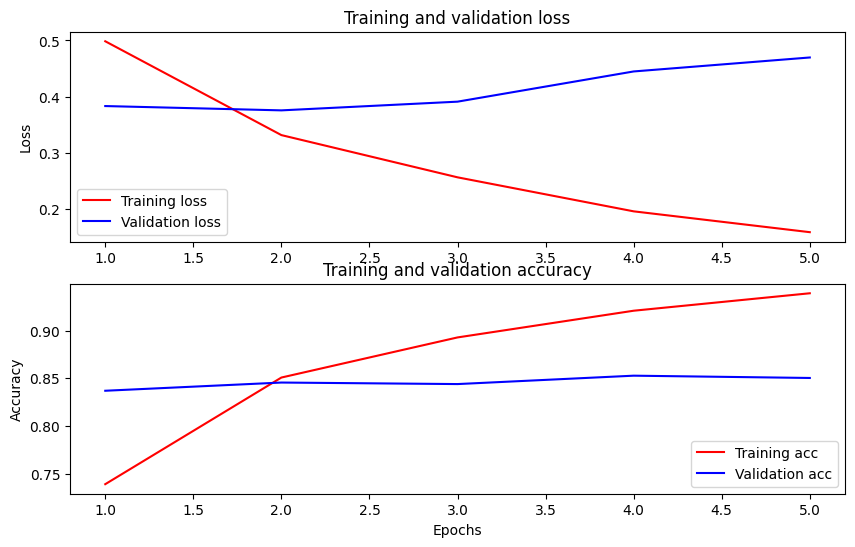

In [21]:
history_dict = history.history
print(history_dict.keys())

acc = history_dict['binary_accuracy']
val_acc = history_dict['val_binary_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)
fig = plt.figure(figsize=(10, 6))
fig.tight_layout()

plt.subplot(2, 1, 1)
# r is for "solid red line"
plt.plot(epochs, loss, 'r', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
# plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

In this plot, the red lines represent the training loss and accuracy, and the blue lines are the validation loss and accuracy.

## Export for inference

Now you just save your fine-tuned model for later use.

In [22]:
dataset_name = 'imdb'
saved_model_path = './{}_bert'.format(dataset_name.replace('/', '_'))

classifier_model.save(saved_model_path, include_optimizer=False)

Let's reload the model, so you can try it side by side with the model that is still in memory.

In [23]:
reloaded_model = tf.saved_model.load(saved_model_path)

Here you can test your model on any sentence you want, just add to the examples variable below.

In [24]:
def print_my_examples(inputs, results):
  result_for_printing = \
    [f'input: {inputs[i]:<30} : score: {results[i][0]:.6f}'
                         for i in range(len(inputs))]
  print(*result_for_printing, sep='\n')
  print()


examples = [
    'this is such an amazing movie!',  # this is the same sentence tried earlier
    'The movie was great!',
    'The movie was meh.',
    'The movie was okish.',
    'The movie was terrible...'
]

reloaded_results = tf.sigmoid(reloaded_model(tf.constant(examples)))
original_results = tf.sigmoid(classifier_model(tf.constant(examples)))

print('Results from the saved model:')
print_my_examples(examples, reloaded_results)
print('Results from the model in memory:')
print_my_examples(examples, original_results)

Results from the saved model:
input: this is such an amazing movie! : score: 0.999361
input: The movie was great!           : score: 0.989547
input: The movie was meh.             : score: 0.856317
input: The movie was okish.           : score: 0.022705
input: The movie was terrible...      : score: 0.001032

Results from the model in memory:
input: this is such an amazing movie! : score: 0.999361
input: The movie was great!           : score: 0.989547
input: The movie was meh.             : score: 0.856317
input: The movie was okish.           : score: 0.022705
input: The movie was terrible...      : score: 0.001032



If you want to use your model on [TF Serving](https://www.tensorflow.org/tfx/guide/serving), remember that it will call your SavedModel through one of its named signatures. In Python, you can test them as follows:

In [25]:
serving_results = reloaded_model \
            .signatures['serving_default'](tf.constant(examples))

serving_results = tf.sigmoid(serving_results['classifier'])

print_my_examples(examples, serving_results)

input: this is such an amazing movie! : score: 0.999361
input: The movie was great!           : score: 0.989547
input: The movie was meh.             : score: 0.856317
input: The movie was okish.           : score: 0.022705
input: The movie was terrible...      : score: 0.001032



## Next steps

As a next step, you can try [Solve GLUE tasks using BERT on a TPU tutorial](https://www.tensorflow.org/text/tutorials/bert_glue), which runs on a TPU and shows you how to work with multiple inputs.